In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer
import matplotlib.pyplot as plt
import  nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from fuzzywuzzy import fuzz
import xgboost
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import gc

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
gc.collect()

7

In [4]:
pd.set_option('display.max_colwidth', -1)
trainFile = pd.read_csv(os.getcwd()+"\\train.csv")

In [5]:
trainFile= trainFile[trainFile['question1'].map(str).apply(len)>8]

In [6]:
trainFile =trainFile[trainFile['question2'].map(str).apply(len)>=10]

In [7]:
trainFile.head(5)

id  qid1  qid2  \
0  0   1     2      
1  1   3     4      
2  2   5     6      
3  3   7     8      
4  4   9     10     

                                                                      question1  \
0  What is the step by step guide to invest in share market in india?             
1  What is the story of Kohinoor (Koh-i-Noor) Diamond?                            
2  How can I increase the speed of my internet connection while using a VPN?      
3  Why am I mentally very lonely? How can I solve it?                             
4  Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?   

                                                                                  question2  \
0  What is the step by step guide to invest in share market?                                  
1  What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?   
2  How can Internet speed be increased by hacking through DNS?                                
3  Find the remainder when [math]23^{24}[/math] is divided by 24,23?                          
4  Which fish would survive in salt water?                                                    

   is_duplicate  
0  0             
1  0             
2  0             
3  0             
4  0

In [8]:

#text = nltk.Text([p_stemmer.stem(i).lower() for i in words if i not in stopwords.words()  ])

#lowercase_words = [word.lower() for word in words
#                  if word not in stopwords.words() and word.isalpha()]

tempDF= trainFile['question1'].apply(lambda x: str(x).lower())
trainFile['Q1Words']= tempDF.apply(WordPunctTokenizer().tokenize)

tempDF= trainFile['question2'].apply(lambda x: str(x).lower())
trainFile['Q2Words']= tempDF.apply(WordPunctTokenizer().tokenize)

In [9]:
def intersection(a,b):
    exclude = set(b)
    sameWords = [x for x in set(a) if x in b]
    return sameWords
    
def union(a,b):
    AllWords= list(set(a)|set(b))
    return AllWords

def differ(a,b):
    exclude = set(b)
    different = [x for x in set(a) if x not in b]
    return different
    

In [10]:



p_stemmer = PorterStemmer()
NotToRemove = ['again','against','before','same','between','further']
stops= differ(stopwords.words(),NotToRemove)
print(stops)
trainFile['Q1WordsStemmed'] = trainFile.apply(lambda x:[p_stemmer.stem(i) for i in x['Q1Words'] if i not in stops ],axis=1 )

['بي', 'ı', 'هو', 'zal', 'und', 'будет', 'ομωσ', 'før', 'va', 'keseluruhannya', 'sugli', 'då', 'dela', 'kedua', 'også', 'μὲν', 'ἐμόσ', 'dirinya', 'nå', 'που', 'pertama', 'dello', 'قد', 'vaan', 'hjå', 'facesse', 'tinha', 'deras', 'eûmes', 'setelah', 'आजको', 'dau', 'beginikah', 'tenidos', 'el', 'något', 'δε', 'benarkah', 'diri', 'jawabnya', 'dort', 'إنما', 'لن', 'avevate', 'tambahnya', 'әйтпесе', 'sitt', 'of', 'noista', 'niille', 'porque', 'or', 'sepantasnyalah', 'jedes', 'तपाई', 'på', 'som', 'sekadar', 'साँच्चै', 'ezzel', 'tanto', 'hayan', 'mukaan', 'terlihat', 'sebenarnya', 'hampir', 'îi', 'decit', 'sejenak', 'facessi', 'notre', 'δὴ', 'आफ्नै', 'soalnya', 'vilken', 'med', 'stessi', 'tendrás', 'een', 'την', 'jangankan', 'coi', 'mungkinkah', 'desselben', 'terakhir', 'nogle', 'setibanya', 'masing-masing', 'üçün', 'unserem', 'ειμαστε', 'voltam', 'più', 'देखेको', 'being', 'pada', 'olisitte', 'sintiendo', 'sesekali', 'padanya', 'dörd', 'meille', 'οὖν', 'minä', 'facessero', 'blivit', 'kecil', 

In [11]:
trainFile['Q2WordsStemmed'] = trainFile.apply(lambda x:[p_stemmer.stem(i) for i in x['Q2Words'] if i not in stops ],axis=1 )

In [12]:
trainFile.head(2)

id  qid1  qid2  \
0  0   1     2      
1  1   3     4      

                                                            question1  \
0  What is the step by step guide to invest in share market in india?   
1  What is the story of Kohinoor (Koh-i-Noor) Diamond?                  

                                                                                  question2  \
0  What is the step by step guide to invest in share market?                                  
1  What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?   

   is_duplicate  \
0  0              
1  0              

                                                                               Q1Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]   
1  [what, is, the, story, of, kohinoor, (, koh, -, i, -, noor, ), diamond, ?]            

                                                                                                                Q2Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, ?]                                               
1  [what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh, -, i, -, noor, ), diamond, back, ?]   

                                         Q1WordsStemmed  \
0  [step, step, guid, invest, share, market, india, ?]    
1  [stori, kohinoor, (, koh, -, -, noor, ), diamond, ?]   

                                                                              Q2WordsStemmed  
0  [step, step, guid, invest, share, market, ?]                                               
1  [would, happen, indian, govern, stole, kohinoor, (, koh, -, -, noor, ), diamond, back, ?]

In [13]:

trainFile['SameWords'] = trainFile.apply(lambda row:intersection(row['Q1Words'],row['Q2Words']) , axis=1)


In [14]:
trainFile['DifferentWords'] = trainFile.apply(lambda row:differ(union(row['Q1Words'],row['Q2Words']),intersection(row['Q1Words'],row['Q2Words'])) , axis=1)
trainFile['DifferentWordsStopped'] = trainFile.apply(lambda row:differ(union(row['Q1WordsStemmed'],row['Q2WordsStemmed']),intersection(row['Q1WordsStemmed'],row['Q2WordsStemmed'])) , axis=1)

In [15]:
trainFile['cosineSimiliarity'] = trainFile.apply(lambda row:len(row['SameWords'])/(len(union(row['Q1Words'],row['Q2Words']))) ,axis=1)

In [17]:
trainFile['POS'] = trainFile['DifferentWords'].apply(nltk.pos_tag)

In [18]:
#trainFile['PartOfSpeech'] = trainFile['POS'].map('list').apply() if len(z)>1]
trainFile['PartOfSpeech'] = trainFile.apply(lambda x: [y[1] for y in x["POS"]],axis = 1)




In [19]:
def count(lst):
    #print (i)
    #lst = b[a].loc[i]
    
    c=0
    #print(lst)
    if not lst:
        return 0
    #print(lst)
    for j in lst:
        if j in ['NN','NNS','NNP','NNPS']:
            c+=1
    return c        
#count (['VBZ','IN','JJ','NN','NN','NNPS','MS'])        
trainFile['NoOfNouns'] = trainFile.apply(lambda x: count(x['PartOfSpeech']) ,axis = 1)
#trainFile['NoOfNouns'] = trainFile.apply(count('PartOfSpeech' ))

In [25]:
def count(lst):    
    c=0
   
    if not lst:
        return 0
    #print(lst)
    for j in lst:
        if j in ['JJ','JJR','JJS']:
            c+=1
    return c        
#count (['VBZ','IN','JJ','NN','NN','NNPS','MS'])        
trainFile['NoOfAdjective'] = trainFile.apply(lambda x: count(x['PartOfSpeech']) ,axis = 1)

In [26]:
def count(lst):    
    c=0
   
    if not lst:
        return 0
    #print(lst)
    for j in lst:
        if j in ['RBR','RBS']:
            c+=1
    return c        
#count (['VBZ','IN','JJ','NN','NN','NNPS','MS'])        
trainFile['NoOfAdverb'] = trainFile.apply(lambda x: count(x['PartOfSpeech']) ,axis = 1)

In [20]:
trainFile["tk_set_ratio"] = trainFile.apply(lambda x: fuzz.token_set_ratio(str(x["question1"]),str(x["question2"])),axis = 1)

In [29]:
trainFile['fuzz_qratio'] = trainFile.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
trainFile['fuzz_WRatio'] = trainFile.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
trainFile['fuzz_partial_ratio'] = trainFile.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
trainFile['fuzz_partial_token_set_ratio'] = trainFile.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
trainFile['fuzz_partial_token_sort_ratio'] = trainFile.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

In [21]:
trainFile["ratio"] = trainFile.apply(lambda x: fuzz.ratio(str(x["question1"]),str(x["question2"])),axis = 1)

In [22]:
trainFile["DiffLength"] = trainFile.apply(lambda x: abs(len(x["question1"])-len(x["question2"])), axis = 1)

In [31]:
trainFile['Diff_len_word'] = trainFile.apply(lambda x: abs(len(str(x["question1"]).split())-len(str(x["question2"]).split())), axis = 1)

In [32]:
trainFile = trainFile.drop(['id', 'qid1', 'qid2'], axis=1)

In [33]:
trainFile.head(2)


question1  \
0  What is the step by step guide to invest in share market in india?   
1  What is the story of Kohinoor (Koh-i-Noor) Diamond?                  

                                                                                  question2  \
0  What is the step by step guide to invest in share market?                                  
1  What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?   

   is_duplicate  \
0  0              
1  0              

                                                                               Q1Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]   
1  [what, is, the, story, of, kohinoor, (, koh, -, i, -, noor, ), diamond, ?]            

                                                                                                                Q2Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, ?]                                               
1  [what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh, -, i, -, noor, ), diamond, back, ?]   

                                         Q1WordsStemmed  \
0  [step, step, guid, invest, share, market, india, ?]    
1  [stori, kohinoor, (, koh, -, -, noor, ), diamond, ?]   

                                                                              Q2WordsStemmed  \
0  [step, step, guid, invest, share, market, ?]                                                
1  [would, happen, indian, govern, stole, kohinoor, (, koh, -, -, noor, ), diamond, back, ?]   

                                                            SameWords  \
0  [guide, invest, share, is, in, to, what, ?, the, by, market, step]   
1  [noor, (, i, -, kohinoor, diamond, koh, what, the, ), ?]             

                                                        DifferentWords  \
0  [india]                                                               
1  [if, story, happen, back, government, of, stole, would, indian, is]   

                                 DifferentWordsStopped      ...        ratio  \
0  [india]                                                  ...        93      
1  [stori, indian, govern, happen, back, stole, would]      ...        65      

  DiffLength NoOfAdjective  NoOfAdverb  fuzz_qratio  fuzz_WRatio  \
0  9          0             0           93           95            
1  37         0             0           66           86            

   fuzz_partial_ratio  fuzz_partial_token_set_ratio  \
0  98                  100                            
1  73                  100                            

   fuzz_partial_token_sort_ratio  Diff_len_word  
0  88                             2              
1  73                             5              

[2 rows x 25 columns]

In [28]:
trainFile.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'Q1Words', 'Q2Words', 'Q1WordsStemmed', 'Q2WordsStemmed', 'SameWords',
       'DifferentWords', 'DifferentWordsStopped', 'cosineSimiliarity', 'POS',
       'PartOfSpeech', 'NoOfNouns', 'tk_set_ratio', 'ratio', 'DiffLength',
       'NoOfAdjective', 'NoOfAdverb'],
      dtype='object')

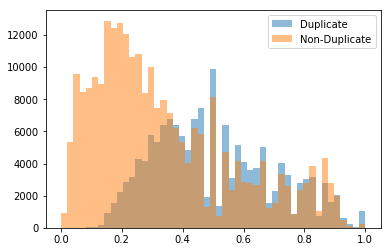

In [18]:
bins = np.linspace(0,1,50)
plt.hist(trainFile[trainFile["is_duplicate"] == 1]["cosineSimiliarity"],bins,alpha = 0.5,label = 'Duplicate')
plt.hist(trainFile[trainFile["is_duplicate"] == 0]["cosineSimiliarity"],bins,alpha = 0.5,label = 'Non-Duplicate')
plt.legend(loc='upper right')
plt.show()

In [105]:
fuzz.ratio("When can I expect my Cognizant confirmation mail?","When can I expect Cognizant confirmation mail?")

97

In [101]:
fuzz.ratio("What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?","What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?")

96

In [19]:
grouped= trainFile.groupby(trainFile['SameWords'].str.len())['is_duplicate'].sum()

In [257]:
grouped.describe()

count    42.000000   
mean     9625.952381 
std      17623.100839
min      1.000000    
25%      12.500000   
50%      429.000000  
75%      7493.750000 
max      59942.000000
Name: is_duplicate, dtype: float64

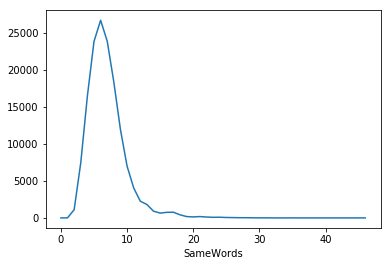

In [20]:
grouped.plot()

In [28]:

grouped2 = trainFile.groupby(['NoOfNouns'])['is_duplicate']
#[grouped2.sum(),grouped2.count()]

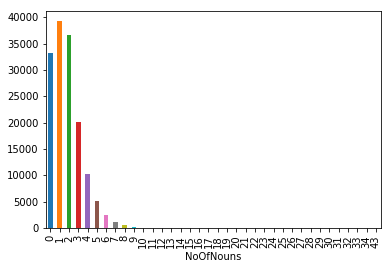

In [25]:
grouped2.sum().plot(kind="bar")

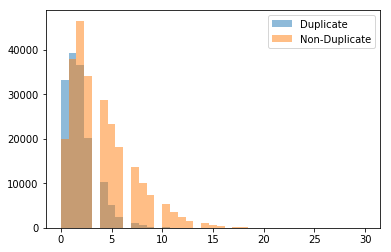

In [64]:
bins = np.linspace(0,30,40)
plt.hist(trainFile[trainFile["is_duplicate"] == 1]["NoOfNouns"],bins,alpha = 0.5,label = 'Duplicate')
plt.hist(trainFile[trainFile["is_duplicate"] == 0]["NoOfNouns"],bins,alpha = 0.5,label = 'Non-Duplicate')
plt.legend(loc='upper right')
plt.show()

In [47]:
Y=trainFile['is_duplicate'].as_matrix()
Y.shape

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(404191,)

In [36]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [65]:
len(model['ran'])

300

In [48]:
np.sum(np.array(model['ran']),axis=0)

3.2634392

In [63]:
def sent2vec(s):
    words = str(s).lower()
    words = WordPunctTokenizer().tokenize(words)
    words = [w for w in words if not w in stops]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(model[w])
        except:
            continue
    M = np.array(M)  #M is of shape (no.of words * 300)
    v = M.sum(axis=0) #sum over rows so to make 1*300
    #print(M.shape)
    return v / np.sqrt((v ** 2).sum()) #normalize to get values between -1 to 1. 

In [69]:
from tqdm import tqdm

In [70]:
question1_vectors = np.zeros((trainFile.shape[0], 300))
error_count = 0

for i, q in tqdm(enumerate(trainFile.question1.values)):
    question1_vectors[i, :] = sent2vec(q)

0it [00:00, ?it/s]

(7, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)


19it [00:00, 183.98it/s]

(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(1, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)


48it [00:00, 205.42it/s]

(5, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)


75it [00:00, 220.04it/s]

(10, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(12, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(15, 300)
(4, 300)
(7, 300)


101it [00:00, 227.18it/s]

(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)


137it [00:00, 254.23it/s]

(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(12, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(17, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)


170it [00:00, 271.51it/s]

(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)


204it [00:00, 284.06it/s]

(9, 300)
(7, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(12, 300)
(21, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)


233it [00:00, 282.66it/s]

(4, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)


261it [00:00, 270.58it/s]

(4, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(11, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)


292it [00:01, 280.72it/s]

(0,)


C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(8, 300)
(10, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(20, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)


325it [00:01, 292.50it/s]

(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(15, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)


355it [00:01, 292.32it/s]

(5, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)


387it [00:01, 295.30it/s]

(4, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)


419it [00:01, 302.08it/s]

(3, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)


450it [00:01, 298.02it/s]

(3, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(11, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)


487it [00:01, 315.87it/s]

(5, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)


526it [00:01, 333.02it/s]

(4, 300)
(6, 300)
(12, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)


563it [00:01, 338.33it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(13, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(16, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)


598it [00:01, 339.50it/s]

(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)


634it [00:02, 342.67it/s]

(3, 300)
(3, 300)
(4, 300)
(11, 300)
(13, 300)
(12, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(1, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)


669it [00:02, 337.08it/s]

(4, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)


705it [00:02, 342.40it/s]

(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(16, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(10, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)


743it [00:02, 350.17it/s]

(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(13, 300)


779it [00:02, 336.42it/s]

(2, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(1, 300)


813it [00:02, 328.40it/s]

(6, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)


856it [00:02, 351.49it/s]

(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(14, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)


892it [00:02, 344.55it/s]

(5, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(0,)
(6, 300)
(12, 300)
(10, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)


927it [00:02, 331.60it/s]

(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(15, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)


965it [00:03, 342.66it/s]

(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)


1000it [00:03, 343.54it/s]

(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)


1036it [00:03, 346.54it/s]

(13, 300)
(14, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(9, 300)


1071it [00:03, 304.17it/s]

(6, 300)
(9, 300)
(4, 300)
(15, 300)
(5, 300)
(6, 300)
(17, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)


1103it [00:03, 290.80it/s]

(2, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(0,)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)


1137it [00:03, 303.78it/s]

(5, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(15, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)


1169it [00:03, 297.46it/s]

(13, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)


1200it [00:03, 260.48it/s]

(3, 300)
(11, 300)
(0,)
(7, 300)
(4, 300)
(17, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(9, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)


1228it [00:04, 236.47it/s]

(4, 300)
(9, 300)
(11, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(17, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(7, 300)
(2, 300)
(8, 300)
(9, 300)
(6, 300)
(8, 300)
(9, 300)


1253it [00:04, 239.33it/s]

(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)


1278it [00:04, 235.39it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(15, 300)
(11, 300)
(5, 300)
(13, 300)
(4, 300)


1303it [00:04, 233.80it/s]

(5, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)


1327it [00:04, 231.32it/s]

(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(8, 300)
(3, 300)


1351it [00:04, 216.33it/s]

(12, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(8, 300)
(10, 300)
(12, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)


1374it [00:04, 217.27it/s]

(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)


1397it [00:04, 211.61it/s]

(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(5, 300)


1422it [00:04, 221.53it/s]

(2, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(12, 300)


1451it [00:04, 238.24it/s]

(3, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)


1487it [00:05, 265.00it/s]

(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(0,)
(8, 300)
(9, 300)
(3, 300)
(4, 300)


1515it [00:05, 257.22it/s]

(9, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(1, 300)
(12, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)


1542it [00:05, 233.13it/s]

(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(14, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)


1567it [00:05, 237.43it/s]

(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(8, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)


1595it [00:05, 247.75it/s]

(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(15, 300)
(9, 300)
(5, 300)
(9, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(39, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


1621it [00:05, 240.96it/s]

(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(14, 300)
(9, 300)


1652it [00:05, 257.07it/s]

(8, 300)
(4, 300)
(17, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(10, 300)
(11, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)


1684it [00:05, 269.55it/s]

(11, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(12, 300)
(10, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)


1712it [00:05, 260.93it/s]

(3, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)


1743it [00:06, 273.02it/s]

(12, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)


1776it [00:06, 284.80it/s]

(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(10, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)


1805it [00:06, 277.47it/s]

(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(10, 300)


1834it [00:06, 259.71it/s]

(5, 300)
(9, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)


1861it [00:06, 258.81it/s]

(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(0,)
(6, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)


1888it [00:06, 259.97it/s]

(4, 300)
(7, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)


1917it [00:06, 264.67it/s]

(7, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)


1944it [00:06, 258.74it/s]

(7, 300)
(2, 300)
(6, 300)
(11, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(8, 300)
(12, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)


1971it [00:06, 243.71it/s]

(7, 300)
(4, 300)
(2, 300)
(9, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)


1996it [00:07, 237.31it/s]

(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(1, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)


2027it [00:07, 251.68it/s]

(3, 300)
(15, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)


2061it [00:07, 272.44it/s]

(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


2090it [00:07, 275.68it/s]

(6, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(14, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)


2127it [00:07, 290.23it/s]

(2, 300)
(3, 300)
(3, 300)
(11, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)


2160it [00:07, 300.07it/s]

(5, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(1, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(10, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)


2204it [00:07, 330.77it/s]

(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)


2247it [00:07, 352.94it/s]

(5, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(0,)
(5, 300)
(3, 300)
(3, 300)
(17, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(18, 300)


2287it [00:07, 365.57it/s]

(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)


2329it [00:08, 379.03it/s]

(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)


2370it [00:08, 386.97it/s]

(11, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)


2413it [00:08, 398.65it/s]

(7, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)


2454it [00:08, 381.98it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)


2502it [00:08, 405.60it/s]

(3, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(10, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)


2547it [00:08, 413.62it/s]

(3, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(13, 300)
(9, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)


2589it [00:08, 369.58it/s]

(6, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(11, 300)
(2, 300)
(10, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(11, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


2632it [00:08, 384.01it/s]

(10, 300)
(6, 300)
(11, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(1, 300)
(3, 300)


2672it [00:08, 378.42it/s]

(5, 300)
(3, 300)
(10, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(13, 300)
(3, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)


2711it [00:09, 372.22it/s]

(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(12, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)


2760it [00:09, 396.49it/s]

(7, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(12, 300)
(2, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(14, 300)
(6, 300)
(6, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)


2801it [00:09, 362.37it/s]

(7, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(7, 300)
(2, 300)
(10, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(2, 300)


2839it [00:09, 360.90it/s]

(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)


2889it [00:09, 390.75it/s]

(8, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(15, 300)
(12, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)


2930it [00:09, 380.01it/s]

(4, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)


2977it [00:09, 400.31it/s]

(7, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(0,)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)


3027it [00:09, 422.78it/s]

(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(16, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(0,)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)


3071it [00:09, 386.75it/s]

(7, 300)
(6, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(13, 300)
(24, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(14, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


3112it [00:10, 391.96it/s]

(5, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(0,)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(13, 300)


3159it [00:10, 411.67it/s]

(5, 300)
(8, 300)
(5, 300)
(8, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)


3202it [00:10, 369.31it/s]

(2, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(14, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(13, 300)


3247it [00:10, 387.01it/s]

(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)


3293it [00:10, 403.39it/s]

(9, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)


3342it [00:10, 420.19it/s]

(7, 300)
(5, 300)
(7, 300)
(9, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(8, 300)
(6, 300)
(5, 300)
(10, 300)
(8, 300)
(7, 300)
(6, 300)
(13, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)


3385it [00:10, 420.27it/s]

(4, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)


3428it [00:10, 416.65it/s]

(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(9, 300)
(7, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)


3477it [00:10, 434.19it/s]

(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(15, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(13, 300)
(2, 300)
(11, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(20, 300)
(9, 300)
(9, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(24, 300)


3521it [00:10, 427.27it/s]

(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(13, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)


3565it [00:11, 429.41it/s]

(12, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(14, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)


3615it [00:11, 446.87it/s]

(3, 300)
(6, 300)
(5, 300)
(7, 300)
(15, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(12, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)


3662it [00:11, 415.83it/s]

(0,)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(10, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)


3707it [00:11, 425.20it/s]

(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)


3753it [00:11, 434.13it/s]

(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(0,)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(1, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)


3797it [00:11, 428.51it/s]

(4, 300)
(6, 300)
(8, 300)
(9, 300)
(18, 300)
(12, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)


3850it [00:11, 452.57it/s]

(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(9, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(15, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(15, 300)
(9, 300)
(16, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(13, 300)
(2, 300)
(6, 300)
(5, 300)


3896it [00:11, 442.58it/s]

(4, 300)
(5, 300)
(2, 300)
(6, 300)
(12, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(13, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(11, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(8, 300)
(7, 300)
(8, 300)
(12, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)


3941it [00:11, 418.91it/s]

(7, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(22, 300)
(9, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(8, 300)
(11, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)


3987it [00:12, 430.13it/s]

(13, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)


4031it [00:12, 423.31it/s]

(1, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(11, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(13, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(20, 300)
(7, 300)
(6, 300)
(9, 300)


4087it [00:12, 454.78it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(15, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(13, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)


4134it [00:12, 437.06it/s]

(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(13, 300)
(8, 300)
(4, 300)
(6, 300)


4179it [00:12, 414.29it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(14, 300)
(7, 300)
(13, 300)
(1, 300)
(10, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)


4222it [00:12, 410.15it/s]

(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(14, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(10, 300)
(5, 300)


4264it [00:12, 411.52it/s]

(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)


4306it [00:12, 395.53it/s]

(2, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(12, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)


4358it [00:12, 424.81it/s]

(7, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(14, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)


4402it [00:13, 404.04it/s]

(7, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(9, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(13, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(12, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(10, 300)


4451it [00:13, 426.19it/s]

(2, 300)
(6, 300)
(7, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(8, 300)
(13, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)


4495it [00:13, 429.27it/s]

(6, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(11, 300)
(8, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)


4539it [00:13, 412.60it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)


4590it [00:13, 437.37it/s]

(6, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(28, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(15, 300)
(5, 300)
(1, 300)
(14, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)


4636it [00:13, 441.64it/s]

(4, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(0,)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(14, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)


4681it [00:13, 427.28it/s]

(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(13, 300)
(15, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(23, 300)
(10, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)


4729it [00:13, 439.09it/s]

(10, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(30, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)


4774it [00:13, 426.83it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(5, 300)
(7, 300)


4825it [00:14, 445.52it/s]

(4, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(9, 300)
(5, 300)
(24, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(6, 300)


4872it [00:14, 452.25it/s]

(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(8, 300)
(11, 300)


4918it [00:14, 447.54it/s]

(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(15, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)


4969it [00:14, 463.00it/s]

(8, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(5, 300)
(9, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(12, 300)
(6, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)


5016it [00:14, 428.40it/s]

(3, 300)
(2, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(7, 300)
(2, 300)
(10, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)


5066it [00:14, 447.13it/s]

(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(14, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(9, 300)


5115it [00:14, 456.90it/s]

(10, 300)
(1, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(12, 300)
(6, 300)
(8, 300)
(1, 300)
(7, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)


5162it [00:14, 431.77it/s]

(5, 300)
(12, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)


5212it [00:14, 449.27it/s]

(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(8, 300)
(8, 300)
(9, 300)
(2, 300)
(12, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)


5261it [00:14, 458.47it/s]

(5, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(13, 300)
(10, 300)
(1, 300)
(7, 300)
(1, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)


5308it [00:15, 445.71it/s]

(4, 300)
(12, 300)
(6, 300)
(10, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(10, 300)
(2, 300)
(2, 300)
(10, 300)
(12, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(13, 300)
(2, 300)
(4, 300)


5356it [00:15, 455.12it/s]

(4, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)


5402it [00:15, 442.36it/s]

(1, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(14, 300)
(3, 300)
(14, 300)
(7, 300)
(1, 300)
(6, 300)
(9, 300)
(6, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)


5447it [00:15, 441.00it/s]

(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(14, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)


5495it [00:15, 450.40it/s]

(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)


5541it [00:15, 422.81it/s]

(10, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(13, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(8, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)


5595it [00:15, 451.95it/s]

(4, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)


5642it [00:15, 448.34it/s]

(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(12, 300)
(13, 300)
(3, 300)
(7, 300)
(4, 300)


5696it [00:15, 472.06it/s]

(7, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(21, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(17, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)


5745it [00:16, 476.94it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(14, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)


5794it [00:16, 456.19it/s]

(8, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(15, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)


5841it [00:16, 453.22it/s]

(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(6, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(12, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)


5887it [00:16, 441.09it/s]

(9, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)


5932it [00:16, 430.62it/s]

(3, 300)
(12, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)


5986it [00:16, 458.17it/s]

(8, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


6033it [00:16, 440.48it/s]

(1, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(0,)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)


6089it [00:16, 469.11it/s]

(7, 300)
(7, 300)
(3, 300)
(14, 300)
(9, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(1, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)


6137it [00:16, 431.72it/s]

(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(8, 300)
(10, 300)
(2, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(5, 300)


6185it [00:17, 444.82it/s]

(4, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(9, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)


6238it [00:17, 467.02it/s]

(2, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(10, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(10, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)


6286it [00:17, 441.82it/s]

(3, 300)
(14, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)


6332it [00:17, 443.53it/s]

(5, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(2, 300)
(2, 300)
(13, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)


6378it [00:17, 421.43it/s]

(6, 300)
(6, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)


6429it [00:17, 444.28it/s]

(4, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(13, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)


6477it [00:17, 452.79it/s]

(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(16, 300)
(12, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(15, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


6523it [00:17, 432.66it/s]

(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)


6573it [00:17, 448.12it/s]

(4, 300)
(2, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(15, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)


6619it [00:18, 429.71it/s]

(6, 300)
(10, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(15, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(12, 300)
(8, 300)
(2, 300)
(8, 300)


6672it [00:18, 453.50it/s]

(3, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(15, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)


6719it [00:18, 455.97it/s]

(3, 300)
(4, 300)
(12, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)


6766it [00:18, 427.06it/s]

(4, 300)
(1, 300)
(6, 300)
(17, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(14, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(0,)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(17, 300)
(5, 300)
(13, 300)


6815it [00:18, 439.66it/s]

(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)


6862it [00:18, 439.80it/s]

(4, 300)
(3, 300)
(2, 300)
(17, 300)
(2, 300)
(5, 300)
(16, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(12, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)


6910it [00:18, 448.90it/s]

(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(13, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(17, 300)
(3, 300)
(4, 300)
(4, 300)


6959it [00:18, 458.20it/s]

(7, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(12, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)


7006it [00:18, 443.00it/s]

(8, 300)
(6, 300)
(6, 300)
(5, 300)
(12, 300)
(9, 300)
(4, 300)
(12, 300)
(6, 300)
(1, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(17, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(8, 300)
(5, 300)
(13, 300)
(11, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)


7053it [00:18, 449.78it/s]

(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(15, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)


7104it [00:19, 465.95it/s]

(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(11, 300)
(0,)
(3, 300)
(6, 300)
(19, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)


7151it [00:19, 417.52it/s]

(7, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


7204it [00:19, 442.81it/s]

(3, 300)
(7, 300)
(16, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(0,)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)


7250it [00:19, 416.41it/s]

(7, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(15, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(17, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)


7293it [00:19, 415.60it/s]

(4, 300)
(3, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(1, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(12, 300)


7340it [00:19, 426.13it/s]

(5, 300)
(3, 300)
(8, 300)
(6, 300)
(10, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(0,)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)


7384it [00:19, 415.22it/s]

(2, 300)
(0,)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)
(14, 300)
(9, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(8, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)


7432it [00:19, 428.94it/s]

(2, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(1, 300)
(11, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(11, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(16, 300)
(2, 300)
(6, 300)


7477it [00:19, 408.03it/s]

(9, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(0,)
(5, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)


7524it [00:20, 424.51it/s]

(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(14, 300)
(2, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)


7574it [00:20, 442.56it/s]

(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(15, 300)


7619it [00:20, 443.10it/s]

(8, 300)
(4, 300)
(9, 300)
(8, 300)
(13, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(15, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)


7666it [00:20, 449.20it/s]

(5, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(15, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)


7715it [00:20, 459.04it/s]

(8, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(9, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)


7762it [00:20, 427.77it/s]

(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(12, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(12, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)


7814it [00:20, 450.90it/s]

(6, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(0,)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)


7860it [00:20, 438.93it/s]

(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(0,)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)


7909it [00:20, 450.88it/s]

(0,)
(8, 300)
(7, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(15, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)


7962it [00:21, 471.66it/s]

(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(0,)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)


8010it [00:21, 454.85it/s]

(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(0,)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(0,)


8065it [00:21, 479.42it/s]

(14, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(13, 300)


8114it [00:21, 426.60it/s]

(2, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(13, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)


8160it [00:21, 434.53it/s]

(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(15, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(11, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(6, 300)
(12, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)


8208it [00:21, 446.28it/s]

(4, 300)
(8, 300)
(7, 300)
(6, 300)
(8, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)


8254it [00:21, 434.00it/s]

(4, 300)
(7, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(12, 300)
(0,)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)


8307it [00:21, 458.02it/s]

(2, 300)
(13, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(21, 300)
(3, 300)
(10, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(16, 300)
(4, 300)
(2, 300)
(4, 300)


8354it [00:21, 416.89it/s]

(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(15, 300)
(9, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(12, 300)
(7, 300)
(6, 300)
(7, 300)
(15, 300)


8407it [00:22, 441.21it/s]

(12, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(7, 300)
(7, 300)
(15, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(9, 300)
(10, 300)
(7, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(13, 300)
(10, 300)
(6, 300)


8453it [00:22, 433.04it/s]

(8, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)


8500it [00:22, 441.89it/s]

(5, 300)
(8, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)


8553it [00:22, 464.73it/s]

(5, 300)
(9, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)


8601it [00:22, 430.80it/s]

(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(10, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(12, 300)
(0,)
(1, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)


8646it [00:22, 430.40it/s]

(7, 300)
(19, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(12, 300)
(14, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)


8690it [00:22, 430.35it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(13, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)


8734it [00:22, 403.60it/s]

(5, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(18, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(14, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)


8776it [00:22, 399.88it/s]

(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(11, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)


8826it [00:23, 424.07it/s]

(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)


8870it [00:23, 413.85it/s]

(4, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(12, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)


8918it [00:23, 431.38it/s]

(2, 300)
(2, 300)
(7, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)


8962it [00:23, 403.68it/s]

(5, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(1, 300)
(14, 300)
(11, 300)
(4, 300)
(8, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)


9014it [00:23, 430.28it/s]

(8, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(1, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(17, 300)


9062it [00:23, 438.27it/s]

(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(13, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(13, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)


9107it [00:23, 422.67it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)


9155it [00:23, 436.26it/s]

(3, 300)
(5, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


9200it [00:23, 419.59it/s]

(9, 300)
(3, 300)
(10, 300)
(3, 300)
(11, 300)
(5, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(15, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(9, 300)
(12, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)


9245it [00:24, 426.72it/s]

(4, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(8, 300)
(10, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)


9299it [00:24, 455.08it/s]

(4, 300)
(2, 300)
(1, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(1, 300)
(7, 300)
(13, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(14, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


9346it [00:24, 436.03it/s]

(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(19, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(11, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(14, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)


9391it [00:24, 439.11it/s]

(7, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(12, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)


9436it [00:24, 437.45it/s]

(5, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(16, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)


9481it [00:24, 400.66it/s]

(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(9, 300)
(5, 300)
(10, 300)
(6, 300)
(15, 300)
(13, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)


9531it [00:24, 425.76it/s]

(5, 300)
(3, 300)
(12, 300)
(12, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(6, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)


9575it [00:24, 419.14it/s]

(6, 300)
(9, 300)
(7, 300)
(4, 300)
(10, 300)
(0,)
(1, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(9, 300)
(20, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(11, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)


9629it [00:24, 447.89it/s]

(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(16, 300)
(10, 300)
(5, 300)
(8, 300)
(5, 300)
(8, 300)
(10, 300)
(7, 300)
(0,)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(1, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)


9679it [00:24, 460.72it/s]

(1, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(14, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)


9726it [00:25, 429.38it/s]

(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(20, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(16, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)


9773it [00:25, 440.48it/s]

(13, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)


9818it [00:25, 422.31it/s]

(7, 300)
(7, 300)
(7, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(15, 300)
(2, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)


9865it [00:25, 435.25it/s]

(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(7, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)


9911it [00:25, 442.05it/s]

(4, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(11, 300)
(11, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)


9956it [00:25, 422.13it/s]

(10, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(11, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(13, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(19, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)


10002it [00:25, 432.49it/s]

(7, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(8, 300)


10053it [00:25, 450.42it/s]

(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(13, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)


10099it [00:25, 418.79it/s]

(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(13, 300)
(1, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(14, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)


10150it [00:26, 441.07it/s]

(2, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)


10195it [00:26, 392.74it/s]

(5, 300)
(6, 300)
(7, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(10, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)


10247it [00:26, 423.58it/s]

(3, 300)
(7, 300)
(3, 300)
(8, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)


10294it [00:26, 435.56it/s]

(9, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(23, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)


10339it [00:26, 404.92it/s]

(6, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(12, 300)
(1, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(11, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)


10381it [00:26, 397.37it/s]

(2, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(15, 300)
(9, 300)


10426it [00:26, 410.39it/s]

(5, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(12, 300)
(2, 300)
(9, 300)
(5, 300)


10468it [00:26, 385.01it/s]

(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(2, 300)
(13, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(9, 300)
(13, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(14, 300)
(3, 300)


10512it [00:26, 398.63it/s]

(5, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)


10553it [00:27, 374.09it/s]

(7, 300)
(3, 300)
(7, 300)
(3, 300)
(13, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(15, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)


10600it [00:27, 397.71it/s]

(6, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(0,)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)


10644it [00:27, 407.50it/s]

(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)


10686it [00:27, 387.98it/s]

(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)


10732it [00:27, 402.53it/s]

(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(12, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(13, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(12, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)


10778it [00:27, 415.63it/s]

(10, 300)
(7, 300)
(2, 300)
(8, 300)
(1, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(12, 300)
(14, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(0,)
(6, 300)
(22, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)


10821it [00:27, 386.61it/s]

(4, 300)
(6, 300)
(6, 300)
(10, 300)
(7, 300)
(13, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(11, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)


10866it [00:27, 403.38it/s]

(8, 300)
(8, 300)
(14, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(13, 300)
(7, 300)
(4, 300)


10912it [00:27, 417.97it/s]

(9, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(14, 300)
(3, 300)
(10, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(2, 300)


10955it [00:28, 392.28it/s]

(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)


10996it [00:28, 394.83it/s]

(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)


11040it [00:28, 407.07it/s]

(3, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)


11082it [00:28, 396.55it/s]

(4, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(11, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(12, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(10, 300)
(19, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(15, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)


11123it [00:28, 370.79it/s]

(3, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(14, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(11, 300)
(1, 300)


11168it [00:28, 360.55it/s]

(4, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)


11214it [00:28, 383.83it/s]

(7, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(2, 300)
(6, 300)
(11, 300)
(12, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)


11268it [00:28, 419.05it/s]

(3, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(14, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)


11312it [00:29, 384.06it/s]

(6, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(10, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(9, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(0,)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)


11363it [00:29, 414.02it/s]

(4, 300)
(4, 300)
(7, 300)
(14, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(10, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)


11408it [00:29, 422.65it/s]

(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(19, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(7, 300)
(13, 300)
(10, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)


11452it [00:29, 382.66it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(16, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(14, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)


11493it [00:29, 388.51it/s]

(7, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(11, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)


11537it [00:29, 374.05it/s]

(4, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(10, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)


11582it [00:29, 392.18it/s]

(3, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(10, 300)
(12, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(18, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)


11630it [00:29, 411.99it/s]

(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(15, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(17, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(18, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(25, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)


11673it [00:29, 385.94it/s]

(4, 300)
(12, 300)
(5, 300)
(7, 300)
(13, 300)
(6, 300)
(12, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(17, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)


11716it [00:30, 397.88it/s]

(4, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(21, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(9, 300)
(3, 300)
(15, 300)


11760it [00:30, 409.34it/s]

(4, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(13, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(14, 300)
(19, 300)
(3, 300)


11802it [00:30, 382.26it/s]

(3, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(13, 300)
(5, 300)
(14, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(15, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)


11848it [00:30, 401.86it/s]

(2, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(9, 300)
(11, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)


11895it [00:30, 418.71it/s]

(3, 300)
(7, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(0,)
(3, 300)
(6, 300)
(15, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)


11938it [00:30, 392.71it/s]

(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(13, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(27, 300)


11983it [00:30, 405.25it/s]

(5, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(16, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)


12027it [00:30, 414.18it/s]

(3, 300)
(19, 300)
(5, 300)
(9, 300)
(16, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(15, 300)
(11, 300)
(4, 300)
(6, 300)
(20, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)


12069it [00:30, 366.98it/s]

(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(14, 300)
(5, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)


12115it [00:31, 390.41it/s]

(4, 300)
(4, 300)
(10, 300)
(12, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(15, 300)
(5, 300)
(3, 300)
(0,)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)


12156it [00:31, 377.16it/s]

(3, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(0,)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)
(9, 300)
(7, 300)
(7, 300)


12203it [00:31, 400.65it/s]

(9, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(10, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)


12251it [00:31, 420.15it/s]

(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(10, 300)
(13, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(13, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(16, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(10, 300)
(6, 300)
(12, 300)
(5, 300)
(14, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(6, 300)


12295it [00:31, 379.72it/s]

(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(10, 300)
(8, 300)
(8, 300)
(12, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(7, 300)


12340it [00:31, 396.52it/s]

(5, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(11, 300)
(10, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(9, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)


12387it [00:31, 414.09it/s]

(4, 300)
(4, 300)
(12, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(12, 300)
(12, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


12430it [00:31, 391.48it/s]

(4, 300)
(4, 300)
(14, 300)
(7, 300)
(10, 300)
(9, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)


12474it [00:31, 404.58it/s]

(5, 300)
(9, 300)
(9, 300)
(1, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(12, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(0,)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)


12517it [00:32, 409.21it/s]

(5, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(16, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)


12559it [00:32, 386.94it/s]

(3, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(15, 300)
(15, 300)
(5, 300)
(6, 300)
(8, 300)
(24, 300)
(3, 300)
(1, 300)
(6, 300)


12607it [00:32, 409.50it/s]

(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(0,)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(1, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(1, 300)
(10, 300)
(5, 300)
(4, 300)
(9, 300)
(11, 300)
(4, 300)
(5, 300)
(10, 300)
(1, 300)
(4, 300)


12649it [00:32, 380.27it/s]

(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(17, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)


12696it [00:32, 401.03it/s]

(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(18, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)


12744it [00:32, 421.55it/s]

(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(3, 300)
(11, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(11, 300)
(11, 300)


12788it [00:32, 395.45it/s]

(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(0,)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(8, 300)
(9, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)


12834it [00:32, 411.42it/s]

(4, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)
(7, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)


12885it [00:32, 435.29it/s]

(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)


12930it [00:33, 401.53it/s]

(7, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(0,)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(14, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)


12975it [00:33, 412.92it/s]

(2, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)


13018it [00:33, 371.94it/s]

(2, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(16, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(11, 300)


13070it [00:33, 406.43it/s]

(6, 300)
(11, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)


13116it [00:33, 420.25it/s]

(6, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(2, 300)
(21, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)


13160it [00:33, 381.26it/s]

(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(17, 300)
(9, 300)
(8, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)


13201it [00:33, 389.15it/s]

(8, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)


13248it [00:33, 410.02it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(24, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)


13291it [00:33, 395.93it/s]

(4, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(8, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)


13337it [00:34, 412.90it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)


13381it [00:34, 385.97it/s]

(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)


13430it [00:34, 411.95it/s]

(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(14, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)


13477it [00:34, 426.90it/s]

(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(20, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(21, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(14, 300)
(4, 300)


13521it [00:34, 381.57it/s]

(8, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(9, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)


13571it [00:34, 409.48it/s]

(2, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)


13617it [00:34, 421.95it/s]

(1, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(13, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(13, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)


13661it [00:34, 386.29it/s]

(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)


13710it [00:34, 412.21it/s]

(3, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(12, 300)
(8, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)


13753it [00:35, 388.71it/s]

(3, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(13, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(13, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)


13800it [00:35, 409.16it/s]

(3, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(15, 300)


13850it [00:35, 432.43it/s]

(2, 300)
(11, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(20, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(15, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)


13895it [00:35, 403.59it/s]

(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(11, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)


13942it [00:35, 420.59it/s]

(10, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(9, 300)
(10, 300)
(10, 300)
(4, 300)
(17, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)


13986it [00:35, 424.67it/s]

(4, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(1, 300)
(14, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)


14030it [00:35, 380.32it/s]

(6, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)


14073it [00:35, 393.69it/s]

(3, 300)
(3, 300)
(4, 300)
(1, 300)
(9, 300)
(17, 300)
(5, 300)
(5, 300)
(17, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(13, 300)
(7, 300)
(1, 300)
(10, 300)
(4, 300)
(2, 300)
(2, 300)


14119it [00:35, 369.91it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(7, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)


14170it [00:36, 402.40it/s]

(11, 300)
(2, 300)
(1, 300)
(12, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(13, 300)
(5, 300)
(8, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(11, 300)
(11, 300)
(7, 300)
(3, 300)
(6, 300)
(0,)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(6, 300)
(11, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)


14214it [00:36, 412.68it/s]

(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)


14257it [00:36, 385.86it/s]

(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(9, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(9, 300)


14307it [00:36, 411.39it/s]

(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(15, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)


14357it [00:36, 432.41it/s]

(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(15, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(20, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(15, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)


14402it [00:36, 390.42it/s]

(6, 300)
(3, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(0,)
(3, 300)
(11, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)


14451it [00:36, 415.49it/s]

(7, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(11, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(12, 300)
(7, 300)
(6, 300)
(2, 300)


14495it [00:36, 384.49it/s]

(2, 300)
(6, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(12, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(17, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)


14536it [00:37, 388.71it/s]

(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(10, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(16, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)


14583it [00:37, 409.16it/s]

(1, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(15, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)


14625it [00:37, 383.72it/s]

(5, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(16, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)


14669it [00:37, 398.74it/s]

(25, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)


14710it [00:37, 398.22it/s]

(4, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)


14751it [00:37, 351.21it/s]

(7, 300)
(4, 300)
(7, 300)
(10, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(14, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)


14789it [00:37, 358.60it/s]

(8, 300)
(7, 300)
(6, 300)
(14, 300)
(3, 300)
(11, 300)
(7, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)


14831it [00:37, 374.78it/s]

(7, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(11, 300)
(7, 300)
(8, 300)


14870it [00:37, 355.06it/s]

(5, 300)
(6, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(10, 300)
(6, 300)
(10, 300)
(7, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(15, 300)
(2, 300)
(6, 300)
(9, 300)


14913it [00:38, 372.43it/s]

(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)


14961it [00:38, 398.01it/s]

(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(14, 300)
(10, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(23, 300)


15002it [00:38, 373.72it/s]

(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(13, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(0,)
(9, 300)
(14, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(14, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)


15045it [00:38, 388.15it/s]

(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(15, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(8, 300)
(2, 300)


15093it [00:38, 410.98it/s]

(4, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(15, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)


15136it [00:38, 381.73it/s]

(3, 300)
(9, 300)
(6, 300)
(10, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)


15184it [00:38, 405.40it/s]

(10, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(11, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)


15226it [00:38, 386.09it/s]

(10, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(8, 300)
(7, 300)
(18, 300)
(11, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)


15266it [00:38, 388.15it/s]

(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(11, 300)
(7, 300)
(8, 300)
(12, 300)


15311it [00:39, 401.30it/s]

(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)


15352it [00:39, 383.13it/s]

(2, 300)
(2, 300)
(12, 300)
(9, 300)
(10, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(8, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)


15399it [00:39, 405.34it/s]

(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(15, 300)


15447it [00:39, 424.88it/s]

(6, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)


15491it [00:39, 400.77it/s]

(4, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)


15537it [00:39, 411.52it/s]

(5, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(13, 300)
(15, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(10, 300)
(6, 300)
(1, 300)


15583it [00:39, 424.06it/s]

(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)


15626it [00:39, 396.02it/s]

(5, 300)
(7, 300)
(2, 300)
(5, 300)
(13, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)


15673it [00:39, 413.69it/s]

(2, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(0,)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(15, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)


15717it [00:40, 382.91it/s]

(4, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(15, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(8, 300)
(12, 300)
(7, 300)
(6, 300)
(8, 300)
(8, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)


15765it [00:40, 405.81it/s]

(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(8, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)


15814it [00:40, 427.57it/s]

(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(0,)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)


15858it [00:40, 395.36it/s]

(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(14, 300)
(3, 300)
(2, 300)
(0,)
(6, 300)
(10, 300)
(3, 300)
(0,)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)


15905it [00:40, 413.20it/s]

(1, 300)
(4, 300)
(7, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(9, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)


15952it [00:40, 427.26it/s]

(4, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(7, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)


15996it [00:40, 395.18it/s]

(9, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(14, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(19, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)


16037it [00:40, 390.56it/s]

(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(23, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)


16083it [00:40, 406.09it/s]

(2, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(18, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(13, 300)
(8, 300)
(9, 300)
(11, 300)
(7, 300)
(3, 300)
(5, 300)


16125it [00:41, 387.12it/s]

(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(10, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)


16173it [00:41, 410.16it/s]

(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(0,)
(16, 300)


16215it [00:41, 390.25it/s]

(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(14, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)


16258it [00:41, 398.84it/s]

(7, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(16, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(6, 300)


16306it [00:41, 418.21it/s]

(6, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)


16349it [00:41, 390.82it/s]

(1, 300)
(5, 300)
(9, 300)
(2, 300)
(1, 300)
(0,)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)


16398it [00:41, 415.80it/s]

(8, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(1, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(14, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)


16444it [00:41, 427.83it/s]

(1, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)


16488it [00:41, 399.30it/s]

(4, 300)
(4, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(15, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)


16529it [00:41, 395.71it/s]

(5, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(11, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(22, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)


16573it [00:42, 407.73it/s]

(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(10, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)


16615it [00:42, 386.02it/s]

(13, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)


16663it [00:42, 409.83it/s]

(3, 300)
(1, 300)
(4, 300)
(2, 300)
(15, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(2, 300)
(7, 300)
(7, 300)
(10, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(1, 300)
(6, 300)
(2, 300)


16705it [00:42, 397.25it/s]

(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(0,)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)


16751it [00:42, 411.67it/s]

(6, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(10, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)


16799it [00:42, 428.57it/s]

(4, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(13, 300)
(4, 300)
(14, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(1, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(12, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)


16843it [00:42, 401.40it/s]

(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(10, 300)
(3, 300)
(5, 300)
(16, 300)
(1, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(12, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(16, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(8, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)


16890it [00:42, 417.80it/s]

(7, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(8, 300)
(8, 300)
(3, 300)
(14, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(11, 300)
(5, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)


16933it [00:42, 417.96it/s]

(7, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(13, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


16976it [00:43, 390.13it/s]

(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(15, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)


17026it [00:43, 416.34it/s]

(6, 300)
(15, 300)
(3, 300)
(4, 300)
(17, 300)
(8, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(18, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(10, 300)
(5, 300)


17069it [00:43, 412.13it/s]

(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(17, 300)
(8, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)


17111it [00:43, 368.74it/s]

(8, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(14, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(15, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)


17158it [00:43, 393.96it/s]

(2, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(17, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)


17199it [00:43, 376.33it/s]

(4, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(13, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(16, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(12, 300)


17247it [00:43, 402.13it/s]

(9, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(14, 300)
(5, 300)
(2, 300)
(9, 300)
(8, 300)
(8, 300)
(6, 300)
(16, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)


17295it [00:43, 420.72it/s]

(3, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(10, 300)
(7, 300)
(4, 300)
(2, 300)
(15, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(10, 300)
(7, 300)


17339it [00:44, 383.55it/s]

(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(6, 300)
(12, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)


17386it [00:44, 404.09it/s]

(4, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(10, 300)
(8, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)


17432it [00:44, 419.08it/s]

(14, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(13, 300)
(12, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(14, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)


17475it [00:44, 391.89it/s]

(5, 300)
(5, 300)
(3, 300)
(10, 300)
(11, 300)
(2, 300)
(6, 300)
(8, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(11, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(0,)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)


17519it [00:44, 403.76it/s]

(12, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)


17561it [00:44, 376.28it/s]

(4, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)


17610it [00:44, 403.68it/s]

(2, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)


17659it [00:44, 424.24it/s]

(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(14, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(11, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)


17703it [00:44, 405.92it/s]

(9, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(10, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)


17747it [00:44, 414.68it/s]

(10, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(11, 300)
(12, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(10, 300)
(10, 300)
(2, 300)


17794it [00:45, 428.95it/s]

(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)


17838it [00:45, 398.35it/s]

(7, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(10, 300)
(12, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)


17886it [00:45, 419.48it/s]

(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)


17930it [00:45, 394.71it/s]

(8, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)


17980it [00:45, 419.97it/s]

(13, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(11, 300)
(2, 300)
(7, 300)
(11, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(11, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(10, 300)
(14, 300)
(8, 300)
(1, 300)
(2, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)


18024it [00:45, 424.22it/s]

(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(14, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(16, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)


18068it [00:45, 381.56it/s]

(6, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(1, 300)
(5, 300)
(8, 300)
(1, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(0,)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)


18118it [00:45, 409.97it/s]

(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)


18162it [00:45, 417.03it/s]

(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)


18205it [00:46, 390.63it/s]

(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(15, 300)
(12, 300)
(2, 300)
(0,)
(13, 300)
(5, 300)
(7, 300)
(2, 300)
(11, 300)
(2, 300)
(7, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)


18252it [00:46, 411.19it/s]

(5, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(13, 300)
(21, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)


18298it [00:46, 422.05it/s]

(6, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(10, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(13, 300)


18342it [00:46, 386.35it/s]

(9, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(37, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(16, 300)
(3, 300)
(2, 300)
(3, 300)


18382it [00:46, 389.47it/s]

(3, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(10, 300)
(2, 300)
(7, 300)
(7, 300)
(10, 300)
(10, 300)
(4, 300)(7, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(7, 300)
(8, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)


18469it [00:46, 398.93it/s]

(3, 300)
(6, 300)
(2, 300)
(11, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)


18518it [00:46, 421.65it/s]

(6, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)


18562it [00:47, 385.10it/s]

(6, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(9, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)


18605it [00:47, 396.16it/s]

(4, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)


18652it [00:47, 413.81it/s]

(5, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(13, 300)
(2, 300)
(2, 300)
(13, 300)
(4, 300)
(11, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)


18695it [00:47, 391.31it/s]

(10, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(13, 300)
(6, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


18745it [00:47, 418.33it/s]

(6, 300)
(13, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(12, 300)
(12, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(1, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)


18789it [00:47, 421.83it/s]

(3, 300)
(11, 300)
(4, 300)
(5, 300)
(9, 300)
(1, 300)
(3, 300)
(2, 300)
(1, 300)
(14, 300)
(6, 300)
(3, 300)
(5, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)


18832it [00:47, 400.18it/s]

(5, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(15, 300)
(2, 300)
(12, 300)
(4, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(11, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)


18880it [00:47, 418.69it/s]

(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)


18923it [00:47, 401.55it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)


18971it [00:47, 419.18it/s]

(4, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(0,)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(13, 300)
(1, 300)
(4, 300)
(11, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)


19018it [00:48, 431.73it/s]

(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(11, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)


19062it [00:48, 400.01it/s]

(3, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(9, 300)
(4, 300)
(9, 300)


19103it [00:48, 396.20it/s]

(7, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)


19153it [00:48, 421.69it/s]

(5, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(10, 300)
(9, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(15, 300)
(6, 300)
(6, 300)


19197it [00:48, 407.10it/s]

(8, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(8, 300)
(10, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)


19247it [00:48, 429.72it/s]

(3, 300)
(7, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


19291it [00:48, 407.14it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(10, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)


19335it [00:48, 414.97it/s]

(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)


19384it [00:48, 434.65it/s]

(12, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)


19429it [00:49, 400.61it/s]

(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(12, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)


19478it [00:49, 422.96it/s]

(6, 300)
(6, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(11, 300)
(10, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(9, 300)
(16, 300)
(6, 300)


19522it [00:49, 426.98it/s]

(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(13, 300)
(9, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)
(7, 300)
(4, 300)
(13, 300)


19566it [00:49, 379.63it/s]

(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(23, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(9, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)


19611it [00:49, 394.36it/s]

(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(12, 300)
(8, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(6, 300)
(0,)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(9, 300)


19652it [00:49, 367.95it/s]

(5, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(13, 300)
(9, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)


19702it [00:49, 397.92it/s]

(4, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(15, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)


19750it [00:49, 416.41it/s]

(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)


19793it [00:50, 390.25it/s]

(6, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)


19841it [00:50, 413.16it/s]

(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(13, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)


19891it [00:50, 435.00it/s]

(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(11, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(8, 300)


19936it [00:50, 402.98it/s]

(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(9, 300)
(10, 300)
(3, 300)


19988it [00:50, 431.33it/s]

(5, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)


20033it [00:50, 393.91it/s]

(10, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(8, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)


20080it [00:50, 413.73it/s]

(6, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)


20128it [00:50, 430.71it/s]

(4, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(7, 300)(6, 300)


20173it [00:50, 383.95it/s]

(10, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(0,)
(2, 300)
(6, 300)
(4, 300)


20220it [00:51, 405.98it/s]

(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)


20267it [00:51, 389.26it/s]

(7, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(14, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(12, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(14, 300)
(12, 300)
(15, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)


20312it [00:51, 404.30it/s]

(3, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(1, 300)
(1, 300)
(11, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(12, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(7, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)


20359it [00:51, 421.69it/s]

(3, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(11, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)


20403it [00:51, 404.28it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)


20456it [00:51, 434.97it/s]

(7, 300)
(9, 300)
(4, 300)
(5, 300)
(0,)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(8, 300)
(8, 300)


20505it [00:51, 448.57it/s]

(2, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(10, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)


20551it [00:51, 415.40it/s]

(3, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)


20599it [00:51, 430.81it/s]

(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)


20644it [00:52, 394.64it/s]

(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)


20776it [00:52, 399.38it/s]

(7, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(7, 300)
(15, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(15, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(13, 300)
(9, 300)
(4, 300)


20824it [00:52, 419.14it/s]

(10, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(26, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)


20874it [00:52, 438.46it/s]

(4, 300)
(1, 300)
(9, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)


20919it [00:52, 412.88it/s]

(26, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(0,)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)


20967it [00:52, 430.07it/s]

(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(10, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)


21011it [00:52, 403.98it/s]

(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)


21059it [00:53, 423.27it/s]

(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)


21109it [00:53, 441.03it/s]

(3, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(9, 300)
(12, 300)
(7, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)


21154it [00:53, 407.14it/s]

(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(13, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)


21199it [00:53, 418.80it/s]

(3, 300)
(1, 300)
(10, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)


21249it [00:53, 438.17it/s]

(4, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(15, 300)
(9, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)


21386it [00:53, 397.10it/s]

(2, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)


21437it [00:53, 424.53it/s]

(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)


21485it [00:54, 439.46it/s]

(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(20, 300)
(7, 300)
(11, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(14, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(15, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)


21530it [00:54, 408.42it/s]

(6, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(10, 300)
(8, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(15, 300)
(4, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(13, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)


21574it [00:54, 415.90it/s]

(6, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)


21618it [00:54, 421.31it/s]

(9, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(9, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(17, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(1, 300)
(12, 300)
(3, 300)


21661it [00:54, 379.63it/s]

(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(8, 300)
(8, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)


21707it [00:54, 399.83it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)


21749it [00:54, 371.89it/s]

(7, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(9, 300)
(7, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(11, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)


21798it [00:54, 399.63it/s]

(11, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(0,)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(14, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)


21844it [00:54, 414.59it/s]

(7, 300)
(6, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(18, 300)
(5, 300)
(2, 300)

(5, 300)
(8, 300)
(10, 300)
(8, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)


21983it [00:55, 431.94it/s]

(4, 300)
(8, 300)
(14, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)


22027it [00:55, 394.75it/s]

(5, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(1, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(13, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)


22073it [00:55, 410.89it/s]

(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)


22116it [00:55, 403.78it/s]

(5, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(15, 300)
(4, 300)
(12, 300)
(3, 300)
(12, 300)
(10, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(17, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)


22166it [00:55, 427.13it/s]

(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(19, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)


22218it [00:55, 450.99it/s]

(4, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(0,)
(7, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(16, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)


22265it [00:55, 388.66it/s]

(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(16, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)


22310it [00:56, 404.94it/s]

(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)


22358it [00:56, 400.59it/s]

(2, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(15, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)


22407it [00:56, 423.50it/s]

(2, 300)
(10, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(2, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(14, 300)
(2, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(12, 300)


22456it [00:56, 439.37it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)


22553it [00:56, 424.29it/s]

(2, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(1, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(16, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)


22599it [00:56, 432.24it/s]

(11, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(14, 300)
(12, 300)
(2, 300)
(9, 300)
(9, 300)
(2, 300)
(4, 300)
(10, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)


22644it [00:56, 394.44it/s]

(2, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(15, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)


22696it [00:56, 424.44it/s]

(11, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(8, 300)
(6, 300)
(6, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(1, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)


22741it [00:57, 388.85it/s]

(3, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(11, 300)
(9, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)


22782it [00:57, 392.39it/s]

(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(15, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)


22831it [00:57, 416.51it/s]

(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)


22874it [00:57, 392.46it/s]

(5, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(8, 300)
(5, 300)
(13, 300)
(2, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(11, 300)
(7, 300)
(1, 300)
(4, 300)
(8, 300)
(13, 300)
(2, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(11, 300)


22918it [00:57, 403.07it/s]

(3, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(17, 300)
(8, 300)
(7, 300)
(9, 300)
(4, 300)


22969it [00:57, 429.84it/s]

(2, 300)
(19, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)


23014it [00:57, 397.74it/s]

(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(12, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(9, 300)
(8, 300)
(10, 300)
(6, 300)
(13, 300)
(4, 300)


23159it [00:58, 421.35it/s]

(7, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(9, 300)
(9, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)


23207it [00:58, 435.28it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(7, 300)
(11, 300)
(11, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)


23252it [00:58, 390.52it/s]

(6, 300)
(6, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(15, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)


23297it [00:58, 405.25it/s]

(7, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(15, 300)
(4, 300)
(2, 300)
(6, 300)
(13, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(17, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)


23343it [00:58, 391.46it/s]

(6, 300)
(7, 300)
(5, 300)
(15, 300)
(5, 300)
(1, 300)
(13, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(15, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)


23390it [00:58, 411.29it/s]

(6, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(0,)
(10, 300)
(5, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)


23442it [00:58, 436.85it/s]

(7, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(12, 300)


23487it [00:58, 401.92it/s]

(5, 300)
(5, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(10, 300)
(14, 300)
(10, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)


23538it [00:58, 428.38it/s]

(3, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(1, 300)
(11, 300)
(5, 300)
(1, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(10, 300)
(4, 300)
(10, 300)
(11, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)


23583it [00:59, 432.42it/s]

(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)
(12, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)(6, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)


23719it [00:59, 403.93it/s]

(6, 300)
(4, 300)
(8, 300)
(12, 300)
(5, 300)
(14, 300)
(5, 300)
(5, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


23764it [00:59, 415.27it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(11, 300)
(7, 300)
(15, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(15, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)


23810it [00:59, 423.27it/s]

(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(14, 300)
(4, 300)
(5, 300)
(15, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)


23853it [00:59, 395.53it/s]

(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(9, 300)
(10, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(12, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)


23904it [00:59, 423.81it/s]

(6, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(14, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(5, 300)
(0,)
(3, 300)
(7, 300)
(8, 300)


23950it [00:59, 431.89it/s]

(6, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(1, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(9, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(10, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)


23994it [01:00, 383.84it/s]

(3, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(18, 300)


24048it [01:00, 416.62it/s]

(8, 300)
(2, 300)
(4, 300)
(12, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(14, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(8, 300)
(18, 300)
(4, 300)
(6, 300)


24092it [01:00, 385.17it/s]

(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(8, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)


24143it [01:00, 414.91it/s]

(7, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(20, 300)
(6, 300)
(4, 300)
(12, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)


24192it [01:00, 431.72it/s]

(5, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(12, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)


24612it [01:01, 388.89it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(13, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)


24665it [01:01, 421.37it/s]

(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(8, 300)
(11, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(9, 300)


24710it [01:01, 390.58it/s]

(6, 300)
(6, 300)
(8, 300)
(4, 300)
(10, 300)
(11, 300)
(11, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)


24754it [01:01, 403.32it/s]

(7, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)


24803it [01:02, 424.52it/s]

(7, 300)
(4, 300)
(11, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)


24847it [01:02, 408.37it/s]

(6, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(12, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(6, 300)
(0,)
(5, 300)
(13, 300)
(6, 300)
(5, 300)


24893it [01:02, 422.29it/s]

(8, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(12, 300)
(5, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)


24941it [01:02, 435.98it/s]

(6, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(1, 300)
(13, 300)
(1, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(11, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(14, 300)
(4, 300)


24986it [01:02, 400.33it/s]

(3, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)


25036it [01:02, 423.87it/s]

(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(13, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(10, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(6, 300)
(12, 300)
(2, 300)
(3, 300)
(5, 300)


25230it [01:03, 397.99it/s]

(3, 300)
(10, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(11, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(28, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)


25272it [01:03, 398.27it/s]

(12, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(17, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)


25314it [01:03, 382.64it/s]

(6, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(9, 300)
(11, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(17, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(16, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(15, 300)


25357it [01:03, 393.22it/s]

(6, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(12, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)


25406it [01:03, 416.64it/s]

(7, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(13, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)


25449it [01:03, 393.62it/s]

(4, 300)
(4, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)


25497it [01:03, 414.71it/s]

(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)


25547it [01:03, 436.75it/s]

(2, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(15, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)


25592it [01:03, 399.18it/s]

(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)


25634it [01:04, 371.97it/s]

(3, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(13, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(15, 300)
(7, 300)
(7, 300)


25680it [01:04, 366.92it/s]

(4, 300)(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(16, 300)
(7, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(15, 300)


25775it [01:04, 414.52it/s]

(4, 300)
(1, 300)
(6, 300)
(2, 300)
(1, 300)
(6, 300)
(9, 300)
(17, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)


25818it [01:04, 383.35it/s]

(2, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(13, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


25861it [01:04, 395.95it/s]

(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(16, 300)
(3, 300)
(10, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)


25910it [01:04, 418.78it/s]

(14, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(13, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(11, 300)
(9, 300)
(7, 300)
(2, 300)
(7, 300)
(13, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)


25953it [01:04, 388.51it/s]

(3, 300)
(3, 300)
(10, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(1, 300)
(7, 300)
(2, 300)
(2, 300)


26004it [01:04, 418.14it/s]

(5, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)


26049it [01:05, 403.30it/s]

(4, 300)
(5, 300)
(2, 300)
(1, 300)
(10, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(18, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)


26094it [01:05, 415.37it/s]

(4, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)


26146it [01:05, 441.76it/s]

(8, 300)
(9, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(14, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)


26192it [01:05, 415.19it/s]

(5, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(1, 300)
(8, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(8, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)


26236it [01:05, 420.19it/s]

(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(9, 300)(1, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(13, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(12, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(7, 300)
(12, 300)


26376it [01:05, 426.25it/s]

(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(9, 300)
(5, 300)
(14, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(18, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)


26420it [01:06, 389.32it/s]

(4, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(20, 300)
(10, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(14, 300)


26468it [01:06, 411.36it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(13, 300)
(9, 300)
(14, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)


26517it [01:06, 431.86it/s]

(7, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)


26562it [01:06, 414.98it/s]

(10, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(27, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(11, 300)
(4, 300)
(15, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)


26612it [01:06, 434.70it/s]

(7, 300)
(7, 300)
(3, 300)
(15, 300)
(14, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(14, 300)
(1, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(1, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(7, 300)


26657it [01:06, 438.17it/s]

(5, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)


26702it [01:06, 402.70it/s]

(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(9, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(11, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(13, 300)
(8, 300)
(6, 300)
(2, 300)


26752it [01:06, 427.35it/s]

(7, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(13, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(7, 300)
(9, 300)
(9, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(0,)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


26796it [01:06, 404.52it/s]

(5, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(13, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)


26930it [01:07, 398.77it/s]

(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(15, 300)
(7, 300)


26976it [01:07, 412.81it/s]

(5, 300)
(11, 300)
(7, 300)
(11, 300)
(0,)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)


27024it [01:07, 428.84it/s]

(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(14, 300)
(6, 300)
(3, 300)
(1, 300)
(6, 300)
(8, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)


27068it [01:07, 407.72it/s]

(9, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)
(15, 300)
(10, 300)
(8, 300)
(2, 300)
(5, 300)
(9, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)


27114it [01:07, 421.22it/s]

(1, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(17, 300)
(6, 300)
(7, 300)
(9, 300)
(10, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(6, 300)


27157it [01:07, 398.68it/s]

(9, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(14, 300)
(10, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)


27207it [01:07, 424.20it/s]

(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)


27257it [01:07, 443.50it/s]

(3, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)


27303it [01:08, 417.41it/s]

(4, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)


27350it [01:08, 431.59it/s]

(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(15, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(14, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(7, 300)


27395it [01:08, 435.32it/s]

(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)(4, 300)
(6, 300)
(4, 300)
(3, 300)


27529it [01:08, 391.10it/s]

(5, 300)
(9, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(15, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(12, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(8, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)


27574it [01:08, 405.13it/s]

(6, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(12, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)


27624it [01:08, 427.63it/s]

(5, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(5, 300)
(2, 300)
(2, 300)


27668it [01:08, 391.68it/s]

(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(2, 300)
(0,)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)


27716it [01:09, 414.25it/s]

(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(16, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)


27765it [01:09, 431.79it/s]

(3, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(15, 300)
(13, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)


27810it [01:09, 403.21it/s]

(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(3, 300)
(10, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(7, 300)
(13, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)


27860it [01:09, 426.67it/s]

(6, 300)
(9, 300)
(10, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(1, 300)
(9, 300)
(4, 300)
(6, 300)
(10, 300)
(1, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(2, 300)
(9, 300)
(13, 300)
(8, 300)
(4, 300)


27904it [01:09, 400.78it/s]

(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(14, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)


27950it [01:09, 415.99it/s]

(2, 300)
(4, 300)
(0,)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(19, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(13, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)


27993it [01:09, 406.03it/s]

(5, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)


28130it [01:10, 435.71it/s]

(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(16, 300)
(5, 300)


28175it [01:10, 413.38it/s]

(4, 300)
(8, 300)
(2, 300)
(9, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(16, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)


28220it [01:10, 423.40it/s]

(1, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)


28263it [01:10, 400.61it/s]

(3, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(11, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)


28310it [01:10, 418.32it/s]

(5, 300)
(2, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(9, 300)


28357it [01:10, 429.89it/s]

(9, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(10, 300)
(9, 300)
(1, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)


28401it [01:10, 392.49it/s]

(3, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(13, 300)


28452it [01:10, 420.31it/s]

(3, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(1, 300)
(9, 300)
(8, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(1, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(7, 300)


28502it [01:10, 441.11it/s]

(2, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)


28548it [01:11, 398.06it/s]

(4, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)


28596it [01:11, 418.70it/s]

(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)


28739it [01:11, 438.77it/s]

(4, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(14, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(7, 300)


28785it [01:11, 407.29it/s]

(6, 300)
(8, 300)
(11, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(14, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(16, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)


28831it [01:11, 418.60it/s]

(9, 300)
(5, 300)
(5, 300)
(10, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(13, 300)
(6, 300)
(10, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)


28878it [01:11, 396.28it/s]

(6, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(11, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)


28923it [01:11, 410.14it/s]

(4, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(14, 300)
(8, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(6, 300)
(9, 300)
(2, 300)
(1, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)


28971it [01:12, 425.13it/s]

(7, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(12, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)


29015it [01:12, 403.63it/s]

(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(0,)
(8, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(12, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)


29061it [01:12, 417.58it/s]

(11, 300)
(5, 300)
(9, 300)
(7, 300)
(12, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)


29108it [01:12, 430.53it/s]

(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(9, 300)
(12, 300)
(11, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)


29152it [01:12, 403.71it/s]

(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(12, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(10, 300)
(4, 300)
(8, 300)
(3, 300)


29196it [01:12, 412.48it/s]

(5, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(12, 300)
(13, 300)


29333it [01:12, 417.40it/s]

(4, 300)
(9, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(1, 300)
(6, 300)
(11, 300)
(10, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)


29376it [01:13, 394.59it/s]

(5, 300)
(1, 300)
(6, 300)
(12, 300)
(2, 300)
(2, 300)
(10, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)


29424it [01:13, 416.55it/s]

(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(14, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(14, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)


29474it [01:13, 436.47it/s]

(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(12, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(15, 300)
(4, 300)
(4, 300)
(3, 300)


29519it [01:13, 408.27it/s]

(9, 300)
(8, 300)
(8, 300)
(3, 300)
(9, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(13, 300)
(16, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)


29562it [01:13, 413.64it/s]

(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(0,)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(6, 300)


29607it [01:13, 423.00it/s]

(7, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)


29650it [01:13, 383.18it/s]

(12, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(16, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(7, 300)
(8, 300)
(14, 300)


29701it [01:13, 405.39it/s]

(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(1, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)


29743it [01:13, 392.66it/s]

(4, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(12, 300)
(7, 300)
(4, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)

(5, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)


29890it [01:14, 416.30it/s]

(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)


29943it [01:14, 444.07it/s]

(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)


29989it [01:14, 421.21it/s]

(2, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(17, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(8, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)


30035it [01:14, 430.61it/s]

(14, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(15, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)


30079it [01:14, 431.13it/s]

(12, 300)
(9, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)


30123it [01:14, 387.47it/s]

(8, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(9, 300)


30169it [01:14, 403.74it/s]

(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)


30213it [01:15, 413.66it/s]

(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(19, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(7, 300)
(10, 300)
(3, 300)


30256it [01:15, 379.78it/s]

(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(15, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(6, 300)
(5, 300)
(2, 300)
(9, 300)


30298it [01:15, 390.18it/s]

(8, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(11, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(12, 300)
(7, 300)
(4, 300)
(14, 300)
(3, 300)
(12, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)


30341it [01:15, 400.47it/s]

(4, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)


30477it [01:15, 390.68it/s]

(4, 300)
(6, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(0,)
(6, 300)
(4, 300)
(0,)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)


30531it [01:15, 424.25it/s]

(4, 300)
(11, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)


30577it [01:15, 432.21it/s]

(5, 300)
(15, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(11, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)


30622it [01:16, 383.80it/s]

(9, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(17, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)


30670it [01:16, 407.55it/s]

(10, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)


30714it [01:16, 415.86it/s]

(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(12, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)


30757it [01:16, 402.52it/s]

(6, 300)
(5, 300)
(9, 300)
(10, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(14, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)


30799it [01:16, 399.72it/s]

(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(8, 300)
(18, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)


30846it [01:16, 383.78it/s]

(2, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(15, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)


30888it [01:16, 393.68it/s]

(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(14, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(12, 300)


30938it [01:16, 417.58it/s]

(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)


31082it [01:17, 447.15it/s]

(4, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(9, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(10, 300)
(11, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)


31128it [01:17, 397.31it/s]

(7, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(15, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)


31171it [01:17, 404.55it/s]

(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(15, 300)
(3, 300)
(19, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


31215it [01:17, 394.17it/s]

(4, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)


31264it [01:17, 417.91it/s]

(1, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(8, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)


31311it [01:17, 430.77it/s]

(9, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(16, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)


31355it [01:17, 398.90it/s]

(2, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)


31405it [01:17, 422.76it/s]

(9, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)


31453it [01:18, 437.52it/s]

(9, 300)
(6, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)


31498it [01:18, 398.56it/s]

(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(15, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)


31546it [01:18, 417.45it/s]

(5, 300)
(9, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)

(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(25, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)


31682it [01:18, 428.21it/s]

(4, 300)
(6, 300)
(14, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)


31726it [01:18, 400.63it/s]

(3, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(0,)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)


31777it [01:18, 426.27it/s]

(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(12, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(13, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(0,)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(13, 300)


31825it [01:18, 440.72it/s]

(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)


31870it [01:19, 403.11it/s]

(2, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(13, 300)
(17, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)


31918it [01:19, 423.16it/s]

(2, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)


31962it [01:19, 401.89it/s]

(5, 300)
(7, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(13, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)


32012it [01:19, 425.64it/s]

(11, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(13, 300)
(10, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(11, 300)
(2, 300)
(14, 300)
(2, 300)
(7, 300)


32058it [01:19, 434.39it/s]

(4, 300)
(5, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(7, 300)
(8, 300)
(14, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)


32103it [01:19, 405.32it/s]

(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(16, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)


32239it [01:19, 405.07it/s]

(12, 300)
(5, 300)
(2, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(11, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(15, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)


32287it [01:20, 422.99it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(0,)
(5, 300)
(4, 300)
(6, 300)
(4, 300)


32331it [01:20, 389.48it/s]

(10, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(17, 300)


32376it [01:20, 402.29it/s]

(6, 300)
(3, 300)
(14, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(1, 300)
(7, 300)
(9, 300)
(11, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)


32426it [01:20, 424.87it/s]

(4, 300)
(3, 300)
(1, 300)
(3, 300)
(13, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)


32470it [01:20, 409.16it/s]

(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)


32519it [01:20, 427.90it/s]

(3, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(15, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)


32568it [01:20, 403.73it/s]

(9, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(14, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)


32617it [01:20, 425.38it/s]

(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(9, 300)
(12, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(12, 300)
(10, 300)
(12, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(6, 300)


32661it [01:20, 428.07it/s]

(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(15, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(0,)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(22, 300)
(6, 300)


32705it [01:21, 382.72it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(14, 300)
(2, 300)
(10, 300)
(6, 300)
(15, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)


32853it [01:21, 405.38it/s]

(6, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(0,)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)


32905it [01:21, 433.80it/s]

(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(14, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)


32950it [01:21, 399.04it/s]

(8, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(15, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(1, 300)
(15, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)


32999it [01:21, 421.73it/s]

(9, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(16, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(15, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)


33050it [01:21, 444.50it/s]

(3, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)


33096it [01:22, 399.99it/s]

(7, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)


33146it [01:22, 424.15it/s]

(10, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(16, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)


33191it [01:22, 406.09it/s]

(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(41, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(0,)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)


33239it [01:22, 424.89it/s]

(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(11, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)


33287it [01:22, 439.72it/s]

(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(18, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(14, 300)


33428it [01:22, 438.18it/s]

(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(18, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)


33473it [01:22, 408.20it/s]

(3, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(15, 300)
(8, 300)


33524it [01:23, 432.25it/s]

(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(8, 300)
(8, 300)
(9, 300)
(2, 300)
(4, 300)
(1, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)


33569it [01:23, 400.25it/s]

(11, 300)
(5, 300)
(10, 300)
(10, 300)
(10, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(2, 300)
(13, 300)


33614it [01:23, 413.68it/s]

(11, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)
(6, 300)
(11, 300)
(9, 300)
(10, 300)
(4, 300)
(3, 300)
(10, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(12, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)


33657it [01:23, 418.11it/s]

(2, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(11, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(12, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(14, 300)
(2, 300)


33700it [01:23, 393.45it/s]

(8, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(12, 300)
(9, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)


33742it [01:23, 400.75it/s]

(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)


33789it [01:23, 417.86it/s]

(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(1, 300)
(8, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(10, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)


33832it [01:23, 396.57it/s]

(9, 300)
(9, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(17, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)


33878it [01:23, 410.61it/s]

(6, 300)
(4, 300)
(6, 300)
(6, 300)
(0,)
(12, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)(3, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(15, 300)
(9, 300)
(3, 300)
(5, 300)


34026it [01:24, 442.07it/s]

(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(15, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)


34072it [01:24, 404.94it/s]

(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(9, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(10, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)


34121it [01:24, 426.33it/s]

(4, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)


34168it [01:24, 406.85it/s]

(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(7, 300)
(7, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(13, 300)
(4, 300)
(3, 300)
(9, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)


34216it [01:24, 424.34it/s]

(5, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(16, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(0,)
(2, 300)
(13, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)


34262it [01:24, 434.12it/s]

(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(14, 300)
(15, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(10, 300)
(8, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)


34307it [01:24, 392.41it/s]

(2, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(23, 300)
(8, 300)
(4, 300)


34353it [01:25, 409.12it/s]

(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(8, 300)
(4, 300)
(9, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(8, 300)


34402it [01:25, 430.13it/s]

(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(9, 300)
(13, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)


34447it [01:25, 408.79it/s]

(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(12, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(11, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(9, 300)
(12, 300)
(14, 300)
(3, 300)


34490it [01:25, 413.37it/s]

(3, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)(4, 300)
(4, 300)
(9, 300)


34582it [01:25, 409.73it/s]

(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(1, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)


34636it [01:25, 439.23it/s]

(2, 300)
(4, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(8, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(13, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)


34681it [01:25, 411.08it/s]

(4, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(14, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(12, 300)


34731it [01:25, 430.58it/s]

(7, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(16, 300)
(4, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(13, 300)
(4, 300)
(3, 300)
(7, 300)


34777it [01:26, 435.54it/s]

(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)


34822it [01:26, 392.72it/s]

(13, 300)
(8, 300)
(7, 300)
(4, 300)
(11, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)


34869it [01:26, 411.72it/s]

(3, 300)
(4, 300)
(8, 300)
(6, 300)
(10, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)


34912it [01:26, 401.47it/s]

(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)


34965it [01:26, 432.16it/s]

(5, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(0,)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)


35010it [01:26, 433.83it/s]

(3, 300)
(12, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(16, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)


35055it [01:26, 399.06it/s]

(11, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(13, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(50, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)


35107it [01:26, 427.12it/s]

(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)


35152it [01:26, 406.88it/s]

(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(21, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)


35194it [01:27, 405.05it/s]

(4, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(15, 300)
(4, 300)
(3, 300)


35242it [01:27, 424.09it/s]

(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)


35286it [01:27, 416.81it/s]

(11, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(9, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)


35329it [01:27, 420.35it/s]

(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)


35380it [01:27, 442.87it/s]

(2, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)


35425it [01:27, 406.57it/s]

(7, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)


35471it [01:27, 420.94it/s]

(12, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(9, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)


35521it [01:27, 404.02it/s]

(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(0,)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)


35570it [01:27, 424.51it/s]

(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(14, 300)
(3, 300)
(21, 300)
(8, 300)
(5, 300)
(2, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(13, 300)
(11, 300)


35615it [01:28, 428.43it/s]

(4, 300)
(0,)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(0,)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(1, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)


35659it [01:28, 411.47it/s]

(6, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(8, 300)
(10, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)


35706it [01:28, 423.65it/s]

(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(8, 300)
(2, 300)
(9, 300)
(2, 300)
(7, 300)
(5, 300)
(12, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)


35754it [01:28, 438.19it/s]

(3, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)


35799it [01:28, 412.14it/s]

(3, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(8, 300)
(7, 300)
(1, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)


35848it [01:28, 430.75it/s]

(7, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(15, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)


35892it [01:28, 401.08it/s]

(1, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(11, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(11, 300)
(14, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)


35940it [01:28, 420.48it/s]

(10, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)


35992it [01:28, 442.37it/s]

(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)


36038it [01:29, 384.25it/s]

(2, 300)
(5, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)


36091it [01:29, 417.04it/s]

(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(1, 300)
(3, 300)
(8, 300)
(10, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(11, 300)
(2, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)


36136it [01:29, 388.98it/s]

(11, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(16, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)


36191it [01:29, 426.17it/s]

(7, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(14, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(25, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(9, 300)


36240it [01:29, 441.38it/s]

(7, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(13, 300)
(1, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(14, 300)
(6, 300)
(3, 300)
(5, 300)


36286it [01:29, 405.04it/s]

(7, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(0,)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)


36426it [01:29, 409.88it/s]

(4, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(20, 300)
(15, 300)
(3, 300)
(8, 300)


36471it [01:30, 419.06it/s]

(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(13, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(14, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(13, 300)
(7, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)


36514it [01:30, 392.96it/s]

(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)


36563it [01:30, 414.84it/s]

(4, 300)
(5, 300)
(9, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(15, 300)


36611it [01:30, 430.39it/s]

(6, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)


36655it [01:30, 416.83it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(1, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)


36698it [01:30, 418.52it/s]

(5, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(19, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)


36748it [01:30, 436.83it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(0,)
(4, 300)
(1, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)


36793it [01:30, 410.74it/s]

(6, 300)
(4, 300)
(0,)
(6, 300)
(6, 300)
(7, 300)
(19, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(18, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(9, 300)


36844it [01:30, 435.35it/s]

(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(24, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)


37026it [01:31, 394.38it/s]

(3, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(5, 300)
(13, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(7, 300)
(12, 300)
(9, 300)
(14, 300)


37075it [01:31, 415.94it/s]

(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(11, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)


37121it [01:31, 398.91it/s]

(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)


37171it [01:31, 423.83it/s]

(3, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(20, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)


37219it [01:31, 437.73it/s]

(5, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(14, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)


37264it [01:31, 404.62it/s]

(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(16, 300)
(3, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(11, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)


37313it [01:32, 426.08it/s]

(12, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(15, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


37363it [01:32, 443.16it/s]

(7, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(0,)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(9, 300)
(7, 300)
(1, 300)
(2, 300)
(2, 300)


37409it [01:32, 414.37it/s]

(8, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)


37455it [01:32, 424.98it/s]

(2, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(12, 300)
(8, 300)
(2, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(11, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)

(8, 300)
(9, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)


37598it [01:32, 425.29it/s]

(6, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(19, 300)
(11, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)


37643it [01:32, 407.37it/s]

(2, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)


37694it [01:32, 432.70it/s]

(8, 300)
(8, 300)
(9, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(5, 300)
(8, 300)
(1, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(12, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(14, 300)
(4, 300)


37739it [01:33, 387.03it/s]

(2, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(11, 300)


37787it [01:33, 408.00it/s]

(3, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)


37839it [01:33, 435.34it/s]

(3, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(14, 300)
(6, 300)
(4, 300)
(14, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)


37885it [01:33, 401.49it/s]

(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(9, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)


37935it [01:33, 425.87it/s]

(5, 300)
(8, 300)
(11, 300)
(12, 300)
(6, 300)
(5, 300)
(8, 300)
(10, 300)
(10, 300)
(10, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(15, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(7, 300)


37980it [01:33, 422.72it/s]

(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(13, 300)
(5, 300)
(13, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(16, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)


38024it [01:33, 419.47it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)


38212it [01:34, 436.54it/s]

(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(25, 300)
(4, 300)
(7, 300)
(10, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(18, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(15, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)


38257it [01:34, 409.43it/s]

(3, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(10, 300)
(2, 300)
(11, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(0,)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(15, 300)


38303it [01:34, 422.50it/s]

(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(13, 300)
(4, 300)
(3, 300)
(13, 300)
(6, 300)
(2, 300)
(8, 300)
(9, 300)
(11, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)


38351it [01:34, 397.07it/s]

(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(13, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)


38403it [01:34, 426.04it/s]

(4, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(0,)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(9, 300)
(8, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)


38450it [01:34, 436.18it/s]

(3, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(13, 300)
(8, 300)
(6, 300)
(0,)
(4, 300)
(2, 300)


38495it [01:34, 396.20it/s]

(8, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(1, 300)
(10, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(7, 300)
(14, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)


38541it [01:35, 411.99it/s]

(4, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(11, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)


38594it [01:35, 438.97it/s]

(5, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(10, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)


38640it [01:35, 404.18it/s]

(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)


38769it [01:35, 396.20it/s]

(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(8, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(10, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(17, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)


38817it [01:35, 416.17it/s]

(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)


38860it [01:35, 405.60it/s]

(8, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(12, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(0,)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(22, 300)
(2, 300)
(4, 300)
(3, 300)


38908it [01:35, 425.08it/s]

(2, 300)
(11, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(23, 300)


38958it [01:36, 442.38it/s]

(8, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(11, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(9, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)


39003it [01:36, 409.62it/s]

(3, 300)
(3, 300)
(5, 300)
(13, 300)
(5, 300)
(8, 300)
(1, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(15, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(13, 300)


39046it [01:36, 414.60it/s]

(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(12, 300)
(5, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)


39089it [01:36, 381.84it/s]

(3, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)


39139it [01:36, 408.68it/s]

(5, 300)
(3, 300)
(7, 300)
(10, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(16, 300)
(2, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)


39189it [01:36, 430.40it/s]

(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(13, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)


39379it [01:37, 414.94it/s]

(6, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(0,)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)


39431it [01:37, 440.85it/s]

(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)


39477it [01:37, 413.51it/s]

(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)


39530it [01:37, 441.84it/s]

(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(14, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(12, 300)


39579it [01:37, 451.14it/s]

(4, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(16, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(1, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)


39626it [01:37, 415.62it/s]

(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(14, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)


39675it [01:37, 433.41it/s]

(4, 300)
(13, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(12, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)


39720it [01:37, 407.50it/s]

(4, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(12, 300)


39773it [01:37, 435.41it/s]

(5, 300)
(6, 300)
(9, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)


39821it [01:38, 446.93it/s]

(2, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)


39958it [01:38, 390.39it/s]

(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(8, 300)
(9, 300)
(5, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(0,)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)


40009it [01:38, 418.62it/s]

(1, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)


40060it [01:38, 442.10it/s]

(3, 300)
(2, 300)
(3, 300)
(13, 300)
(1, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(14, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(10, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)


40106it [01:38, 400.68it/s]

(6, 300)
(5, 300)
(13, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(12, 300)
(13, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(9, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(4, 300)


40154it [01:38, 420.17it/s]

(3, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(12, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(15, 300)
(6, 300)
(4, 300)
(7, 300)
(16, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)


40198it [01:38, 394.07it/s]

(4, 300)
(9, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)


40248it [01:39, 420.49it/s]

(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)


40295it [01:39, 433.25it/s]

(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(16, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(16, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)


40340it [01:39, 404.10it/s]

(6, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(19, 300)
(12, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(11, 300)
(8, 300)


40382it [01:39, 406.64it/s]

(5, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(13, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(12, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)


40430it [01:39, 424.75it/s]

(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)(4, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(14, 300)
(1, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)


40598it [01:40, 345.06it/s]

(4, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(12, 300)
(8, 300)
(8, 300)
(3, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


40646it [01:40, 374.40it/s]

(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)


40689it [01:40, 349.28it/s]

(7, 300)
(5, 300)
(15, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(17, 300)
(5, 300)
(2, 300)
(5, 300)
(13, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)


40731it [01:40, 367.61it/s]

(9, 300)
(6, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(14, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(13, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)


40779it [01:40, 395.12it/s]

(2, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)


40821it [01:40, 371.98it/s]

(7, 300)
(6, 300)
(8, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)
(5, 300)
(5, 300)


40870it [01:40, 398.73it/s]

(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(11, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(13, 300)


40917it [01:40, 416.32it/s]

(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(8, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(16, 300)
(6, 300)


40960it [01:40, 373.38it/s]

(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(15, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(13, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)


41006it [01:41, 393.90it/s]

(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)


41052it [01:41, 411.35it/s]

(2, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)


41452it [01:42, 416.92it/s]

(4, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(9, 300)
(11, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(1, 300)


41502it [01:42, 437.90it/s]

(4, 300)
(9, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(19, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(16, 300)
(15, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(11, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)


41547it [01:42, 433.45it/s]

(3, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(13, 300)
(4, 300)
(0,)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)


41591it [01:42, 386.74it/s]

(3, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(2, 300)
(5, 300)
(6, 300)
(0,)
(2, 300)
(9, 300)
(14, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(12, 300)


41631it [01:42, 376.51it/s]

(5, 300)
(12, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(12, 300)


41672it [01:42, 347.34it/s]

(4, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)


41720it [01:42, 378.06it/s]

(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(23, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)


41769it [01:42, 405.10it/s]

(5, 300)
(5, 300)
(14, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(15, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(0,)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(16, 300)
(7, 300)
(11, 300)
(14, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)


41812it [01:43, 361.43it/s]

(3, 300)
(3, 300)
(4, 300)
(9, 300)
(11, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(22, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(9, 300)


41854it [01:43, 376.43it/s]

(3, 300)
(4, 300)
(8, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)


41899it [01:43, 394.51it/s]

(5, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)(5, 300)
(2, 300)
(16, 300)
(4, 300)
(13, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(14, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(2, 300)
(1, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)


42123it [01:43, 387.36it/s]

(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(14, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(15, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)


42164it [01:43, 359.34it/s]

(2, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(11, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(6, 300)
(8, 300)
(9, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(11, 300)
(8, 300)
(8, 300)


42214it [01:44, 389.00it/s]

(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(16, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(10, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(13, 300)
(6, 300)
(9, 300)
(15, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


42258it [01:44, 402.17it/s]

(3, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(10, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(14, 300)
(12, 300)
(7, 300)
(8, 300)
(3, 300)


42300it [01:44, 351.24it/s]

(3, 300)
(1, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(11, 300)
(5, 300)
(8, 300)
(12, 300)
(13, 300)
(13, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)


42345it [01:44, 372.91it/s]

(4, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(13, 300)
(9, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(15, 300)
(10, 300)
(7, 300)
(9, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)


42392it [01:44, 396.78it/s]

(4, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)


42434it [01:44, 373.50it/s]

(5, 300)
(9, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(9, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)


42477it [01:44, 388.02it/s]

(3, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(12, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)


42525it [01:44, 411.40it/s]

(3, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)


42568it [01:45, 380.46it/s]

(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)(14, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(14, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)


42692it [01:45, 355.08it/s]

(8, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(7, 300)


42739it [01:45, 382.45it/s]

(12, 300)
(4, 300)
(2, 300)
(8, 300)
(11, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)


42779it [01:45, 354.71it/s]

(5, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(8, 300)


42819it [01:45, 365.91it/s]

(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(13, 300)
(7, 300)
(9, 300)
(6, 300)
(25, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)


42861it [01:45, 379.82it/s]

(4, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)


42901it [01:45, 374.49it/s]

(4, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(10, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(13, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(6, 300)
(9, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)


42948it [01:46, 397.01it/s]

(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(10, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)


43000it [01:46, 426.00it/s]

(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(15, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(14, 300)


43044it [01:46, 377.62it/s]

(11, 300)
(2, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(11, 300)
(6, 300)


43089it [01:46, 395.44it/s]

(7, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(14, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(11, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)


43132it [01:46, 404.31it/s]

(9, 300)
(10, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(8, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)


43268it [01:46, 413.99it/s]

(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)


43311it [01:46, 386.66it/s]

(3, 300)
(2, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(14, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)


43356it [01:47, 402.87it/s]

(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(13, 300)
(13, 300)
(4, 300)


43398it [01:47, 359.77it/s]

(14, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)


43447it [01:47, 389.73it/s]

(12, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(12, 300)
(7, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(7, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)


43495it [01:47, 411.16it/s]

(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(0,)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)


43538it [01:47, 377.80it/s]

(9, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(23, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(10, 300)


43578it [01:47, 382.80it/s]

(5, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)


43618it [01:47, 385.82it/s]

(7, 300)
(7, 300)
(10, 300)
(2, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)


43658it [01:47, 366.06it/s]

(12, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)


43707it [01:47, 395.38it/s]

(4, 300)
(2, 300)
(9, 300)
(2, 300)
(7, 300)
(15, 300)
(6, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)


43750it [01:48, 404.86it/s]

(1, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)(5, 300)
(4, 300)
(4, 300)
(3, 300)
(16, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(1, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)


43884it [01:48, 405.98it/s]

(6, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)


43926it [01:48, 376.61it/s]

(8, 300)
(1, 300)
(3, 300)
(3, 300)
(0,)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(14, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)


43975it [01:48, 402.94it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(14, 300)


44017it [01:48, 368.33it/s]

(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(11, 300)
(11, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(10, 300)
(11, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)


44066it [01:48, 395.30it/s]

(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(14, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)


44108it [01:48, 398.08it/s]

(7, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(12, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)


44149it [01:49, 369.71it/s]

(8, 300)
(8, 300)
(6, 300)
(1, 300)
(13, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(9, 300)
(9, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(13, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)


44195it [01:49, 390.54it/s]

(6, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(0,)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)


44244it [01:49, 413.47it/s]

(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(17, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)


44287it [01:49, 382.72it/s]

(8, 300)
(9, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(10, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(9, 300)
(13, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)


44331it [01:49, 395.30it/s]

(5, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)(4, 300)
(11, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(12, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)


44516it [01:50, 377.38it/s]

(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(1, 300)
(2, 300)
(11, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(13, 300)
(8, 300)
(9, 300)


44560it [01:50, 391.82it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(19, 300)
(1, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(12, 300)
(13, 300)
(8, 300)


44601it [01:50, 391.67it/s]

(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(1, 300)
(11, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(13, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(9, 300)
(8, 300)


44642it [01:50, 367.29it/s]

(5, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)


44692it [01:50, 397.38it/s]

(9, 300)
(2, 300)
(16, 300)
(1, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(15, 300)
(12, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)


44734it [01:50, 397.85it/s]

(8, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(12, 300)
(3, 300)
(15, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)


44775it [01:50, 351.46it/s]

(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)


44819it [01:50, 372.34it/s]

(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(13, 300)


44868it [01:50, 374.26it/s]

(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(14, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(13, 300)


44916it [01:51, 397.99it/s]

(3, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(14, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(2, 300)
(7, 300)
(9, 300)
(6, 300)
(1, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)


44964it [01:51, 417.55it/s]

(3, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(10, 300)
(7, 300)
(9, 300)(5, 300)
(4, 300)
(12, 300)
(5, 300)


45052it [01:51, 396.62it/s]

(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(9, 300)
(11, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(20, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)


45093it [01:51, 395.58it/s]

(3, 300)
(6, 300)
(1, 300)
(3, 300)
(1, 300)
(22, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(14, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


45134it [01:51, 354.78it/s]

(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(13, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(12, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)


45178it [01:51, 375.92it/s]

(5, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)


45225it [01:51, 398.65it/s]

(5, 300)
(3, 300)
(5, 300)
(1, 300)
(9, 300)
(2, 300)
(11, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(12, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(15, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)


45267it [01:51, 368.24it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(11, 300)
(1, 300)
(5, 300)
(10, 300)
(4, 300)
(13, 300)
(3, 300)


45312it [01:52, 389.20it/s]

(2, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(17, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)


45360it [01:52, 377.69it/s]

(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)


45408it [01:52, 402.20it/s]

(3, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(13, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(12, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)


45458it [01:52, 426.98it/s]

(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(1, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)


45502it [01:52, 379.14it/s]

(2, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(14, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)(3, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(12, 300)
(5, 300)


45632it [01:52, 363.81it/s]

(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)


45681it [01:52, 394.02it/s]

(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(11, 300)
(5, 300)
(6, 300)
(17, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(20, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)


45726it [01:53, 408.98it/s]

(9, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(9, 300)
(0,)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)


45769it [01:53, 372.10it/s]

(5, 300)
(2, 300)
(10, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(1, 300)
(1, 300)
(5, 300)
(9, 300)
(10, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(15, 300)
(10, 300)
(4, 300)
(7, 300)


45809it [01:53, 379.77it/s]

(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)


45852it [01:53, 371.31it/s]

(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(9, 300)
(4, 300)
(9, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(0,)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)


45900it [01:53, 393.69it/s]

(3, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)


45951it [01:53, 420.23it/s]

(5, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(10, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)


45995it [01:53, 381.76it/s]

(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(9, 300)
(10, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(1, 300)
(5, 300)


46044it [01:53, 407.56it/s]

(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)


46090it [01:53, 420.52it/s]

(5, 300)
(12, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(10, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)


46221it [01:54, 370.24it/s]

(12, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(4, 300)


46266it [01:54, 388.73it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(15, 300)
(2, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(11, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(0,)


46313it [01:54, 409.16it/s]

(1, 300)
(4, 300)
(14, 300)
(1, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(14, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(15, 300)
(10, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)


46355it [01:54, 367.07it/s]

(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(12, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(15, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)


46403it [01:54, 393.23it/s]

(7, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(9, 300)
(7, 300)
(12, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(7, 300)


46448it [01:54, 407.85it/s]

(4, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(11, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(13, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)


46491it [01:55, 368.57it/s]

(8, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(10, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(9, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(0,)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)


46534it [01:55, 383.25it/s]

(12, 300)
(7, 300)
(14, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(9, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)


46574it [01:55, 378.98it/s]

(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(12, 300)
(7, 300)
(1, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)


46613it [01:55, 366.79it/s]

(4, 300)
(2, 300)
(14, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(14, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)


46660it [01:55, 391.42it/s]

(11, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)


46709it [01:55, 415.17it/s]

(11, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)


46796it [01:55, 393.46it/s]

(5, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)


46837it [01:55, 362.03it/s]

(5, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(5, 300)
(0,)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)


46888it [01:56, 396.30it/s]

(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(15, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(14, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(12, 300)
(8, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(16, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)


46932it [01:56, 405.34it/s]

(2, 300)
(5, 300)
(7, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(1, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)


46974it [01:56, 366.39it/s]

(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(13, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(12, 300)


47023it [01:56, 393.74it/s]

(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(8, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)


47069it [01:56, 410.12it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(12, 300)
(6, 300)
(7, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(13, 300)
(8, 300)
(5, 300)
(5, 300)


47112it [01:56, 365.61it/s]

(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(0,)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)


47163it [01:56, 398.34it/s]

(15, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(11, 300)
(10, 300)


47206it [01:56, 365.41it/s]

(3, 300)
(3, 300)
(13, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(10, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(10, 300)


47251it [01:56, 384.50it/s]

(4, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(13, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(17, 300)
(9, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(9, 300)(8, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(13, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)


47384it [01:57, 394.55it/s]

(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(12, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(14, 300)
(7, 300)
(2, 300)
(4, 300)


47430it [01:57, 405.30it/s]

(5, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(13, 300)
(13, 300)
(0,)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(9, 300)
(2, 300)
(2, 300)
(2, 300)
(0,)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)


47472it [01:57, 369.23it/s]

(2, 300)
(8, 300)
(2, 300)
(4, 300)
(16, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)
(14, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)


47518it [01:57, 391.19it/s]

(6, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(11, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)


47560it [01:57, 391.82it/s]

(3, 300)
(5, 300)
(11, 300)
(6, 300)
(7, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)


47601it [01:57, 366.87it/s]

(3, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(0,)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(14, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)


47652it [01:58, 398.45it/s]

(7, 300)
(4, 300)
(7, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(14, 300)
(5, 300)
(4, 300)
(10, 300)
(1, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)


47696it [01:58, 374.13it/s]

(2, 300)
(2, 300)
(3, 300)
(0,)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)


47742it [01:58, 394.52it/s]

(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)


47794it [01:58, 425.00it/s]

(5, 300)
(4, 300)
(9, 300)
(2, 300)
(10, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)


47839it [01:58, 381.73it/s]

(3, 300)
(6, 300)
(6, 300)
(5, 300)(9, 300)
(7, 300)
(4, 300)
(1, 300)
(8, 300)


47976it [01:58, 377.68it/s]

(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(10, 300)
(9, 300)


48017it [01:58, 378.48it/s]

(12, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(2, 300)


48056it [01:59, 353.48it/s]

(7, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)


48093it [01:59, 315.33it/s]

(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)


48134it [01:59, 337.73it/s]

(5, 300)
(10, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(9, 300)
(11, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)


48177it [01:59, 358.92it/s]

(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)


48215it [01:59, 336.09it/s]

(1, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(16, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(11, 300)


48259it [01:59, 361.03it/s]

(7, 300)
(3, 300)
(6, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


48307it [01:59, 389.30it/s]

(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)


48348it [01:59, 375.40it/s]

(2, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(13, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)


48387it [01:59, 365.98it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(14, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)


48426it [02:00, 372.59it/s]

(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(11, 300)
(10, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)


48464it [02:00, 345.78it/s]

(5, 300)(7, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)


48997it [02:01, 393.45it/s]

(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(14, 300)
(7, 300)
(5, 300)
(10, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(14, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)


49040it [02:01, 402.88it/s]

(4, 300)
(7, 300)
(14, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(16, 300)
(2, 300)
(1, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)


49081it [02:01, 378.80it/s]

(3, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(14, 300)
(12, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(10, 300)
(11, 300)
(8, 300)


49131it [02:01, 407.74it/s]

(5, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)


49173it [02:02, 373.63it/s]

(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(10, 300)
(11, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)


49221it [02:02, 399.47it/s]

(4, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(16, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(8, 300)
(11, 300)
(4, 300)
(9, 300)
(7, 300)
(8, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)


49273it [02:02, 428.51it/s]

(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(10, 300)
(9, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)


49318it [02:02, 399.06it/s]

(3, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(11, 300)
(6, 300)
(6, 300)
(7, 300)
(1, 300)
(6, 300)


49371it [02:02, 429.67it/s]

(4, 300)
(13, 300)
(7, 300)
(2, 300)
(5, 300)
(11, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(19, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(12, 300)
(2, 300)
(1, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)


49417it [02:02, 390.97it/s]

(2, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)


49465it [02:02, 412.66it/s]

(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)(5, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(11, 300)
(3, 300)


49555it [02:02, 366.01it/s]

(6, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(15, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)


49600it [02:03, 386.95it/s]

(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)


49651it [02:03, 416.87it/s]

(5, 300)
(14, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(10, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)


49695it [02:03, 375.91it/s]

(3, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(14, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)


49739it [02:03, 391.23it/s]

(10, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(10, 300)
(7, 300)
(2, 300)
(10, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(15, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)


49786it [02:03, 373.30it/s]

(3, 300)
(6, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(13, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(9, 300)
(14, 300)
(4, 300)


49828it [02:03, 384.30it/s]

(6, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)


49875it [02:03, 405.73it/s]

(5, 300)
(6, 300)
(4, 300)
(13, 300)
(10, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(14, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)
(3, 300)


49917it [02:03, 364.66it/s]

(7, 300)
(15, 300)
(6, 300)
(8, 300)
(6, 300)
(12, 300)
(2, 300)
(16, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)


49960it [02:03, 380.28it/s]

(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(10, 300)


50012it [02:04, 412.85it/s]

(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(14, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(11, 300)
(13, 300)(7, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(9, 300)


50147it [02:04, 407.13it/s]

(5, 300)
(2, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(13, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(13, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)


50190it [02:04, 377.90it/s]

(2, 300)
(5, 300)
(3, 300)
(10, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(12, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)


50235it [02:04, 395.13it/s]

(7, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)


50277it [02:04, 373.47it/s]

(5, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)


50318it [02:04, 382.88it/s]

(6, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(6, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)


50366it [02:04, 406.31it/s]

(3, 300)
(8, 300)
(4, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)


50408it [02:05, 379.37it/s]

(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)


50455it [02:05, 400.84it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


50503it [02:05, 420.30it/s]

(2, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(16, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


50547it [02:05, 390.98it/s]

(3, 300)
(8, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(8, 300)


50593it [02:05, 406.95it/s]

(7, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(15, 300)
(11, 300)(4, 300)
(2, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(8, 300)
(8, 300)


50724it [02:05, 385.44it/s]

(2, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(6, 300)
(8, 300)
(9, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)


50769it [02:06, 376.17it/s]

(8, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)


50816it [02:06, 399.35it/s]

(5, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(9, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(10, 300)
(5, 300)
(11, 300)
(6, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(10, 300)
(3, 300)
(14, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(4, 300)
(10, 300)


50859it [02:06, 406.01it/s]

(4, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)


50901it [02:06, 381.26it/s]

(5, 300)
(11, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(12, 300)
(2, 300)
(1, 300)
(2, 300)
(2, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(21, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)


50946it [02:06, 399.29it/s]

(4, 300)
(1, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(13, 300)
(14, 300)
(11, 300)


50987it [02:06, 400.94it/s]

(2, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(12, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)


51028it [02:06, 360.14it/s]

(7, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)


51073it [02:06, 379.90it/s]

(6, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(15, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(17, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)


51122it [02:06, 406.07it/s]

(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(10, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(13, 300)
(6, 300)
(5, 300)


51164it [02:07, 367.25it/s]

(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)(5, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)


51387it [02:07, 371.32it/s]

(3, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(9, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)


51435it [02:07, 397.12it/s]

(7, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(14, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(5, 300)
(9, 300)
(8, 300)


51482it [02:07, 415.10it/s]

(7, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)


51525it [02:07, 358.66it/s]

(2, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(8, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(12, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(17, 300)
(14, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)


51571it [02:08, 381.87it/s]

(16, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(19, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)


51612it [02:08, 387.38it/s]

(7, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(2, 300)
(10, 300)
(3, 300)
(7, 300)


51653it [02:08, 366.61it/s]

(7, 300)
(1, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(12, 300)
(6, 300)
(14, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)


51696it [02:08, 382.27it/s]

(4, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(10, 300)


51744it [02:08, 403.26it/s]

(3, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(11, 300)
(6, 300)
(6, 300)
(0,)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)


51786it [02:08, 374.47it/s]

(11, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(19, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(0,)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(14, 300)
(3, 300)
(1, 300)
(8, 300)
(7, 300)
(15, 300)
(10, 300)
(4, 300)
(4, 300)
(12, 300)


51830it [02:08, 391.16it/s]

(5, 300)
(1, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)


51919it [02:08, 387.51it/s]

(7, 300)
(4, 300)
(8, 300)
(9, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(1, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(8, 300)
(0,)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(13, 300)


51965it [02:09, 402.70it/s]

(3, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(10, 300)
(6, 300)
(12, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)


52006it [02:09, 377.10it/s]

(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)


52049it [02:09, 387.56it/s]

(3, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(15, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(11, 300)
(3, 300)
(6, 300)


52093it [02:09, 401.64it/s]

(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)


52134it [02:09, 373.37it/s]

(3, 300)
(1, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(8, 300)
(19, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)


52180it [02:09, 393.91it/s]

(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(1, 300)
(5, 300)
(6, 300)
(13, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(9, 300)
(2, 300)


52226it [02:09, 410.81it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)


52268it [02:09, 387.94it/s]

(4, 300)
(5, 300)
(13, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(7, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(15, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)


52317it [02:09, 412.41it/s]

(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(14, 300)
(2, 300)
(4, 300)
(2, 300)
(16, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)


52364it [02:10, 427.84it/s]

(5, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)


52408it [02:10, 378.12it/s]

(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)


52452it [02:10, 394.50it/s]

(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)


52493it [02:10, 341.70it/s]

(8, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(6, 300)
(7, 300)
(2, 300)
(8, 300)


52533it [02:10, 356.59it/s]

(4, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(9, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)


52571it [02:10, 360.95it/s]

(7, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(8, 300)
(19, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)


52613it [02:10, 335.82it/s]

(2, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(16, 300)


52655it [02:10, 354.79it/s]

(5, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)


52697it [02:11, 371.86it/s]

(5, 300)
(1, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)


52736it [02:11, 343.40it/s]

(1, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(10, 300)
(11, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(7, 300)
(13, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(0,)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(9, 300)


52783it [02:11, 372.89it/s]

(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)


52830it [02:11, 397.26it/s]

(12, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(0,)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)


52872it [02:11, 375.81it/s]

(7, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)


52913it [02:11, 385.16it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(20, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(11, 300)
(13, 300)
(4, 300)
(1, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)


52960it [02:11, 406.41it/s]

(5, 300)
(5, 300)
(10, 300)
(11, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(20, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)


53002it [02:11, 370.86it/s]

(6, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(8, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)


53048it [02:11, 392.98it/s]

(4, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(18, 300)
(3, 300)
(1, 300)
(6, 300)
(12, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)


53095it [02:12, 412.46it/s]

(6, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)


53138it [02:12, 385.20it/s]

(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(1, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(0,)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(1, 300)
(1, 300)
(5, 300)


53188it [02:12, 410.87it/s]

(6, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)


53231it [02:12, 393.73it/s]

(5, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(9, 300)
(10, 300)
(12, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(12, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)


53275it [02:12, 405.69it/s]

(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)


53325it [02:12, 428.62it/s]

(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(10, 300)


53369it [02:12, 387.60it/s]

(4, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(8, 300)
(14, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)


53416it [02:12, 407.21it/s]

(8, 300)
(2, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(19, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)


53463it [02:12, 422.19it/s]

(5, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(15, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(11, 300)


53507it [02:13, 380.40it/s]

(6, 300)
(11, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(10, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)


53555it [02:13, 403.33it/s]

(5, 300)
(13, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(1, 300)
(5, 300)
(1, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)


53597it [02:13, 379.60it/s]

(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(16, 300)
(7, 300)
(4, 300)
(2, 300)
(15, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(14, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


53639it [02:13, 390.59it/s]

(3, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)(10, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(16, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)


53727it [02:13, 376.63it/s]

(0,)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)


53774it [02:13, 399.18it/s]

(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(16, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)


53819it [02:13, 412.88it/s]

(4, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(2, 300)
(1, 300)
(10, 300)
(9, 300)
(8, 300)
(2, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(1, 300)


53862it [02:13, 378.82it/s]

(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)


53909it [02:14, 401.44it/s]

(7, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(10, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)


53957it [02:14, 420.76it/s]

(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(9, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)


54001it [02:14, 379.10it/s]

(3, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(6, 300)
(9, 300)
(11, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)


54045it [02:14, 395.24it/s]

(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(12, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(11, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)


54088it [02:14, 374.53it/s]

(5, 300)
(1, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(12, 300)
(0,)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(7, 300)
(15, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)


54136it [02:14, 400.19it/s]

(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(13, 300)
(7, 300)
(4, 300)
(11, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)


54184it [02:14, 419.80it/s]

(3, 300)
(3, 300)(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)


54269it [02:14, 395.75it/s]

(3, 300)
(5, 300)
(1, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(15, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)


54319it [02:15, 420.25it/s]

(3, 300)
(4, 300)
(2, 300)
(15, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(15, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)


54363it [02:15, 392.53it/s]

(2, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(15, 300)


54407it [02:15, 403.69it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)


54454it [02:15, 420.66it/s]

(4, 300)
(2, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(12, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(15, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(9, 300)


54497it [02:15, 386.48it/s]

(9, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)


54540it [02:15, 398.28it/s]

(15, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(6, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(11, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)


54581it [02:15, 374.92it/s]

(5, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)


54626it [02:15, 393.88it/s]

(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(0,)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)


54677it [02:15, 421.95it/s]

(5, 300)
(13, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(9, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)


54721it [02:16, 379.28it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(6, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(14, 300)
(22, 300)
(9, 300)
(2, 300)


54865it [02:16, 377.35it/s]

(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)


54916it [02:16, 405.11it/s]

(8, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(14, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(6, 300)


54959it [02:16, 386.35it/s]

(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(0,)
(1, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(0,)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)


55004it [02:16, 402.10it/s]

(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(18, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)


55046it [02:16, 406.40it/s]

(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(9, 300)
(6, 300)
(6, 300)
(9, 300)
(9, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)


55088it [02:17, 383.06it/s]

(4, 300)
(7, 300)
(1, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)


55138it [02:17, 411.19it/s]

(4, 300)
(10, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(12, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(15, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)


55189it [02:17, 436.24it/s]

(4, 300)
(5, 300)
(13, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(9, 300)
(9, 300)
(4, 300)
(4, 300)
(14, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)


55234it [02:17, 388.52it/s]

(10, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(9, 300)


55284it [02:17, 414.54it/s]

(2, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)


55328it [02:17, 366.60it/s]

(2, 300)
(1, 300)
(6, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)

(5, 300)
(4, 300)
(4, 300)


55505it [02:18, 410.57it/s]

(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(16, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(11, 300)
(8, 300)
(5, 300)
(13, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)


55549it [02:18, 418.06it/s]

(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(14, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(6, 300)
(9, 300)
(1, 300)
(2, 300)
(8, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)


55592it [02:18, 395.60it/s]

(7, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(11, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(12, 300)


55644it [02:18, 424.32it/s]

(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)


55688it [02:18, 389.74it/s]

(6, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(16, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)


55736it [02:18, 412.23it/s]

(3, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(11, 300)
(4, 300)
(9, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(13, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)


55784it [02:18, 427.85it/s]

(9, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(14, 300)
(8, 300)
(1, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(27, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)


55828it [02:18, 385.62it/s]

(4, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(13, 300)
(5, 300)
(2, 300)
(10, 300)
(8, 300)
(3, 300)
(1, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


55877it [02:18, 410.10it/s]

(10, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(0,)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(10, 300)
(14, 300)
(6, 300)
(3, 300)
(9, 300)
(1, 300)
(7, 300)
(4, 300)
(1, 300)
(12, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)


55926it [02:19, 430.30it/s]

(8, 300)
(11, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(17, 300)
(4, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(10, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)


55971it [02:19, 391.25it/s]

(3, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)


56114it [02:19, 403.84it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(1, 300)
(1, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(13, 300)
(13, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)


56162it [02:19, 423.72it/s]

(1, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(14, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(11, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(15, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(11, 300)


56206it [02:19, 399.50it/s]

(9, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)


56252it [02:19, 414.48it/s]

(1, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(1, 300)
(4, 300)
(17, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(8, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)


56302it [02:19, 396.50it/s]

(3, 300)
(11, 300)
(3, 300)
(6, 300)
(9, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(1, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(8, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)


56343it [02:20, 398.39it/s]

(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(15, 300)
(9, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)


56389it [02:20, 413.08it/s]

(3, 300)
(5, 300)
(9, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)


56431it [02:20, 376.25it/s]

(5, 300)
(8, 300)
(5, 300)
(0,)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(9, 300)
(7, 300)
(2, 300)
(10, 300)
(10, 300)
(1, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(8, 300)
(10, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)


56480it [02:20, 404.14it/s]

(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(9, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(12, 300)
(3, 300)
(4, 300)
(12, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(0,)


56528it [02:20, 422.84it/s]

(8, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)


56572it [02:20, 384.78it/s]

(4, 300)
(8, 300)
(2, 300)
(6, 300)
(1, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(11, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(14, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)


56711it [02:21, 373.22it/s]

(5, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(7, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)


56761it [02:21, 403.68it/s]

(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(12, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(10, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)


56804it [02:21, 368.54it/s]

(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(12, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)


56851it [02:21, 393.30it/s]

(8, 300)
(4, 300)
(8, 300)
(17, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(23, 300)
(4, 300)
(2, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(11, 300)
(8, 300)


56894it [02:21, 403.33it/s]

(4, 300)
(6, 300)
(5, 300)
(1, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(11, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)


56936it [02:21, 380.64it/s]

(6, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(9, 300)
(4, 300)
(7, 300)
(2, 300)


56985it [02:21, 407.17it/s]

(3, 300)
(5, 300)
(2, 300)
(17, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(13, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(12, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)


57034it [02:21, 426.38it/s]

(10, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(0,)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)


57078it [02:21, 390.96it/s]

(3, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)


57121it [02:22, 401.02it/s]

(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(13, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)


57163it [02:22, 378.16it/s]

(5, 300)
(9, 300)
(9, 300)
(16, 300)
(15, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(9, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)


57298it [02:22, 390.15it/s]

(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)


57350it [02:22, 420.45it/s]

(5, 300)
(15, 300)
(5, 300)
(17, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(12, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)


57394it [02:22, 423.95it/s]

(2, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)


57438it [02:22, 378.93it/s]

(3, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(14, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(13, 300)
(3, 300)
(6, 300)
(14, 300)


57483it [02:22, 396.97it/s]

(2, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(9, 300)
(12, 300)
(5, 300)
(5, 300)
(7, 300)
(13, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(9, 300)
(7, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(12, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)


57528it [02:23, 410.65it/s]

(3, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(1, 300)


57571it [02:23, 374.05it/s]

(9, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(1, 300)
(11, 300)
(3, 300)
(4, 300)
(1, 300)
(9, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(16, 300)
(14, 300)
(9, 300)
(17, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(19, 300)
(3, 300)
(3, 300)
(5, 300)


57615it [02:23, 391.38it/s]

(2, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)


57656it [02:23, 366.62it/s]

(11, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(12, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(16, 300)
(6, 300)
(2, 300)
(14, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(8, 300)


57702it [02:23, 388.15it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(6, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(8, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(12, 300)
(4, 300)


57750it [02:23, 410.98it/s]

(11, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(13, 300)
(3, 300)
(6, 300)(4, 300)
(0,)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(13, 300)
(6, 300)
(2, 300)
(8, 300)
(8, 300)
(8, 300)


57884it [02:23, 412.73it/s]

(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(8, 300)
(9, 300)
(14, 300)
(8, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(13, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)


57927it [02:24, 388.48it/s]

(5, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(11, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(15, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)


57976it [02:24, 412.38it/s]

(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(8, 300)
(13, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)


58023it [02:24, 390.40it/s]

(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)


58067it [02:24, 402.08it/s]

(3, 300)
(4, 300)
(7, 300)
(11, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(14, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(9, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)


58113it [02:24, 417.56it/s]

(8, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(14, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(1, 300)
(9, 300)


58156it [02:24, 396.93it/s]

(13, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(1, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)


58205it [02:24, 420.08it/s]

(4, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(7, 300)
(13, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(15, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(22, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)


58248it [02:24, 419.58it/s]

(4, 300)
(6, 300)
(10, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)


58291it [02:24, 394.90it/s]

(11, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(9, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(10, 300)
(5, 300)


58727it [02:26, 406.12it/s]

(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)


58769it [02:26, 305.42it/s]

(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)


58804it [02:26, 316.03it/s]

(4, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(14, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(2, 300)
(15, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(7, 300)
(1, 300)


58839it [02:26, 309.27it/s]

(2, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(13, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)


58875it [02:26, 320.09it/s]

(15, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(1, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(14, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(11, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)


58909it [02:26, 281.74it/s]

(9, 300)
(9, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(18, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)


58944it [02:26, 297.14it/s]

(8, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(13, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(16, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)


58981it [02:26, 315.17it/s]

(4, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(2, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)


59014it [02:27, 286.32it/s]

(11, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(10, 300)
(20, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)


59047it [02:27, 297.14it/s]

(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(10, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(17, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)


59088it [02:27, 322.92it/s]

(2, 300)
(12, 300)
(10, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)


59128it [02:27, 312.33it/s]

(5, 300)
(3, 300)
(13, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(11, 300)
(13, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)


59167it [02:27, 331.25it/s]

(2, 300)
(8, 300)
(6, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(7, 300)
(10, 300)
(13, 300)
(13, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)


59374it [02:28, 342.34it/s]

(3, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(15, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)


59412it [02:28, 352.57it/s]

(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(22, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)


59462it [02:28, 385.63it/s]

(5, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(11, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)


59503it [02:28, 376.61it/s]

(10, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(14, 300)
(7, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(0,)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)


59559it [02:28, 416.46it/s]

(3, 300)
(3, 300)
(2, 300)
(8, 300)
(11, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(1, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(8, 300)
(3, 300)


59611it [02:28, 442.62it/s]

(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(11, 300)
(8, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(10, 300)
(6, 300)
(3, 300)


59658it [02:28, 408.38it/s]

(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(16, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(8, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)


59707it [02:28, 428.43it/s]

(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(0,)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(11, 300)
(2, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(2, 300)
(13, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)


59752it [02:29, 393.23it/s]

(10, 300)
(1, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)


59804it [02:29, 423.98it/s]

(10, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(14, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(14, 300)
(12, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(14, 300)


59849it [02:29, 429.90it/s]

(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(12, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(16, 300)
(4, 300)
(11, 300)
(3, 300)


59984it [02:29, 417.17it/s]

(10, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(10, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)


60027it [02:29, 373.83it/s]

(3, 300)
(9, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(1, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(10, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(15, 300)


60070it [02:29, 386.69it/s]

(10, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)


60112it [02:29, 371.59it/s]

(4, 300)
(2, 300)
(6, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)


60163it [02:30, 403.31it/s]

(0,)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)


60216it [02:30, 434.18it/s]

(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(12, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)


60262it [02:30, 399.23it/s]

(3, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(15, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)


60310it [02:30, 418.50it/s]

(8, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(15, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)


60358it [02:30, 397.54it/s]

(6, 300)
(7, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)


60406it [02:30, 418.85it/s]

(3, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(20, 300)
(7, 300)
(10, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)


60545it [02:30, 417.29it/s]

(2, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(3, 300)
(7, 300)
(13, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(5, 300)


60594it [02:31, 434.68it/s]

(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(17, 300)


60639it [02:31, 390.18it/s]

(2, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(11, 300)
(3, 300)
(11, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)


60689it [02:31, 415.86it/s]

(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(19, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)


60733it [02:31, 387.25it/s]

(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(13, 300)
(15, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)


60776it [02:31, 398.31it/s]

(7, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(12, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(11, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(1, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)


60825it [02:31, 421.16it/s]

(1, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(14, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)


60869it [02:31, 375.92it/s]

(4, 300)
(13, 300)
(10, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)


60917it [02:31, 401.80it/s]

(9, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)


60965it [02:31, 421.04it/s]

(14, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)


61009it [02:32, 385.76it/s]

(7, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)

(7, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(17, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)


61145it [02:32, 405.09it/s]

(11, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(14, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(9, 300)
(11, 300)
(7, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)


61190it [02:32, 416.70it/s]

(12, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(14, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(19, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)


61233it [02:32, 366.88it/s]

(3, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(18, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(13, 300)


61278it [02:32, 387.14it/s]

(1, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(1, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(12, 300)
(9, 300)
(3, 300)
(9, 300)
(1, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)


61329it [02:32, 417.02it/s]

(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)


61373it [02:32, 391.60it/s]

(3, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)


61426it [02:33, 424.10it/s]

(3, 300)
(7, 300)
(7, 300)
(9, 300)
(2, 300)
(14, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(1, 300)
(11, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(14, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)


61471it [02:33, 386.64it/s]

(5, 300)
(6, 300)
(3, 300)
(12, 300)
(6, 300)
(3, 300)
(11, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)


61517it [02:33, 405.25it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)


61565it [02:33, 423.68it/s]

(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(16, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(8, 300)
(13, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(12, 300)


61747it [02:33, 395.65it/s]

(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)


61794it [02:34, 414.52it/s]

(7, 300)
(2, 300)
(2, 300)
(0,)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)


61837it [02:34, 385.94it/s]

(5, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(14, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(14, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)


61882it [02:34, 402.30it/s]

(7, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(10, 300)
(12, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(12, 300)
(11, 300)
(4, 300)
(5, 300)
(8, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)


61925it [02:34, 407.00it/s]

(1, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(14, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(0,)
(14, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)


61967it [02:34, 384.49it/s]

(10, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(9, 300)


62014it [02:34, 404.30it/s]

(5, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(22, 300)
(5, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(1, 300)
(15, 300)
(4, 300)
(13, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(12, 300)
(3, 300)
(13, 300)


62058it [02:34, 411.75it/s]

(10, 300)
(12, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(12, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)


62100it [02:34, 369.50it/s]

(7, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(15, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)


62153it [02:34, 405.68it/s]

(5, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(15, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(25, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)


62196it [02:35, 405.93it/s]

(4, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)


62326it [02:35, 379.74it/s]

(2, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(15, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)


62374it [02:35, 404.86it/s]

(14, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)


62424it [02:35, 428.52it/s]

(5, 300)
(13, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)


62468it [02:35, 391.15it/s]

(4, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(1, 300)
(15, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(15, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


62512it [02:35, 402.66it/s]

(6, 300)
(8, 300)
(12, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)


62557it [02:35, 414.33it/s]

(10, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)


62600it [02:36, 378.66it/s]

(5, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(1, 300)
(5, 300)
(10, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)


62649it [02:36, 404.58it/s]

(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(12, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)


62695it [02:36, 380.33it/s]

(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(14, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(13, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)


62741it [02:36, 399.84it/s]

(9, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(6, 300)


62784it [02:36, 408.13it/s]

(2, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(11, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(13, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(11, 300)
(1, 300)
(5, 300)
(7, 300)


62927it [02:36, 431.11it/s]

(12, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(16, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(8, 300)
(6, 300)
(14, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)


62972it [02:36, 384.67it/s]

(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(14, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(2, 300)
(11, 300)
(8, 300)
(5, 300)
(20, 300)
(6, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)


63014it [02:37, 392.10it/s]

(8, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(21, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(7, 300)
(5, 300)
(5, 300)
(14, 300)
(11, 300)
(5, 300)
(13, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)


63063it [02:37, 415.75it/s]

(4, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(13, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(7, 300)
(9, 300)
(5, 300)


63106it [02:37, 367.78it/s]

(8, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(17, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(13, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)


63152it [02:37, 388.57it/s]

(11, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(0,)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(23, 300)
(7, 300)
(9, 300)
(7, 300)
(4, 300)
(11, 300)


63193it [02:37, 370.34it/s]

(9, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(25, 300)
(1, 300)
(1, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(10, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)


63238it [02:37, 390.33it/s]

(6, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(1, 300)
(5, 300)
(11, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)


63283it [02:37, 405.65it/s]

(2, 300)
(3, 300)
(9, 300)
(5, 300)
(19, 300)
(8, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)


63325it [02:37, 382.08it/s]

(4, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)


63370it [02:37, 398.85it/s]

(7, 300)
(12, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)


63464it [02:38, 392.45it/s]

(11, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(14, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(0,)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)


63509it [02:38, 406.12it/s]

(4, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(13, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)


63555it [02:38, 381.28it/s]

(4, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(12, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(15, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)


63599it [02:38, 395.29it/s]

(2, 300)
(0,)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


63643it [02:38, 405.70it/s]

(13, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(1, 300)
(5, 300)
(8, 300)
(13, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)


63685it [02:38, 371.43it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(14, 300)
(2, 300)
(9, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)


63728it [02:38, 386.98it/s]

(2, 300)
(13, 300)
(1, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)


63782it [02:38, 422.17it/s]

(5, 300)
(4, 300)
(6, 300)
(5, 300)
(14, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(11, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)


63826it [02:39, 385.40it/s]

(2, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(9, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)


63873it [02:39, 406.59it/s]

(2, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(14, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(14, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)


63919it [02:39, 419.80it/s]

(8, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(2, 300)
(7, 300)
(7, 300)
(15, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)(11, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)


64094it [02:39, 390.41it/s]

(3, 300)
(8, 300)
(16, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(11, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(16, 300)
(5, 300)


64140it [02:39, 408.68it/s]

(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(10, 300)
(15, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(0,)


64182it [02:40, 384.48it/s]

(6, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(8, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)


64229it [02:40, 405.34it/s]

(13, 300)
(17, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(14, 300)
(4, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(9, 300)


64277it [02:40, 422.63it/s]

(2, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(10, 300)
(10, 300)
(5, 300)
(17, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(9, 300)


64321it [02:40, 384.66it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(14, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)


64371it [02:40, 412.99it/s]

(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(15, 300)
(6, 300)
(9, 300)
(10, 300)
(3, 300)
(12, 300)
(5, 300)
(9, 300)
(1, 300)
(11, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)


64416it [02:40, 370.23it/s]

(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(11, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(14, 300)
(10, 300)
(6, 300)
(4, 300)
(11, 300)
(1, 300)
(8, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(1, 300)
(11, 300)
(5, 300)
(6, 300)
(15, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)


64464it [02:40, 397.23it/s]

(1, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(12, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(11, 300)
(10, 300)
(3, 300)


64512it [02:40, 417.51it/s]

(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(1, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)


64556it [02:40, 386.21it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(10, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)(7, 300)
(8, 300)
(13, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)


64695it [02:41, 385.09it/s]

(7, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)


64743it [02:41, 408.05it/s]

(4, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(11, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(7, 300)
(5, 300)
(15, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)


64786it [02:41, 373.02it/s]

(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)
(11, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)


64832it [02:41, 394.16it/s]

(3, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(10, 300)
(5, 300)
(15, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(11, 300)


64880it [02:41, 416.22it/s]

(7, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(12, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(1, 300)


64923it [02:41, 372.83it/s]

(4, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(1, 300)
(8, 300)
(1, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(27, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(1, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)


64971it [02:41, 398.83it/s]

(2, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(13, 300)
(7, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(7, 300)
(7, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)


65013it [02:42, 402.31it/s]

(3, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(15, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)


65055it [02:42, 367.01it/s]

(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)


65103it [02:42, 394.64it/s]

(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(13, 300)
(14, 300)
(3, 300)
(11, 300)
(13, 300)
(9, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)


65147it [02:42, 406.34it/s]

(8, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)(14, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)


65279it [02:42, 381.81it/s]

(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)


65321it [02:42, 392.22it/s]

(4, 300)
(2, 300)
(1, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)


65368it [02:42, 410.80it/s]

(7, 300)
(3, 300)
(3, 300)
(5, 300)
(14, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(13, 300)
(14, 300)
(9, 300)
(5, 300)
(13, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)


65410it [02:43, 370.93it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(14, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)


65456it [02:43, 392.53it/s]

(5, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(13, 300)
(6, 300)
(1, 300)
(1, 300)
(4, 300)
(2, 300)
(18, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(11, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)


65500it [02:43, 403.68it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(11, 300)
(7, 300)
(8, 300)


65542it [02:43, 378.78it/s]

(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(11, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(15, 300)
(11, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)


65593it [02:43, 409.21it/s]

(6, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(15, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(11, 300)


65642it [02:43, 429.07it/s]

(4, 300)
(7, 300)
(5, 300)
(12, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)


65687it [02:43, 393.10it/s]

(5, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(14, 300)
(9, 300)
(12, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(16, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)


65735it [02:43, 414.26it/s]

(3, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(15, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)(7, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(10, 300)
(6, 300)
(5, 300)
(17, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)


65871it [02:44, 417.06it/s]

(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)


65914it [02:44, 394.43it/s]

(7, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)


65958it [02:44, 405.65it/s]

(8, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(9, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(0,)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)


66010it [02:44, 434.01it/s]

(3, 300)
(5, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(16, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(0,)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)


66055it [02:44, 395.44it/s]

(2, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(13, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(14, 300)
(4, 300)
(6, 300)
(9, 300)
(9, 300)
(1, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)


66103it [02:44, 416.67it/s]

(6, 300)
(4, 300)
(2, 300)
(13, 300)
(8, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(15, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(11, 300)


66146it [02:44, 373.58it/s]

(9, 300)
(5, 300)
(5, 300)
(8, 300)
(18, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(15, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(9, 300)
(7, 300)
(3, 300)


66193it [02:45, 397.30it/s]

(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)


66245it [02:45, 425.18it/s]

(3, 300)
(7, 300)
(3, 300)
(15, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(7, 300)
(9, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)


66290it [02:45, 385.28it/s]

(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(1, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)


66429it [02:45, 400.44it/s]

(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(17, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(13, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(21, 300)


66476it [02:45, 413.75it/s]

(10, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(15, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)


66519it [02:45, 386.51it/s]

(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(11, 300)


66562it [02:45, 397.21it/s]

(2, 300)
(7, 300)
(5, 300)
(13, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)


66610it [02:46, 418.59it/s]

(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(11, 300)
(4, 300)
(9, 300)
(17, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)


66653it [02:46, 376.63it/s]

(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(14, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)


66703it [02:46, 405.48it/s]

(7, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(1, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)


66751it [02:46, 424.99it/s]

(4, 300)
(2, 300)
(10, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(11, 300)
(3, 300)
(2, 300)
(7, 300)


66795it [02:46, 400.28it/s]

(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(10, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(12, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)


66842it [02:46, 418.63it/s]

(3, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(8, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)


66885it [02:46, 376.15it/s]

(4, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(22, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(24, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(1, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)(5, 300)
(2, 300)
(9, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(24, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)


67025it [02:47, 384.09it/s]

(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)


67073it [02:47, 407.78it/s]

(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(12, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


67121it [02:47, 426.18it/s]

(5, 300)
(11, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)


67165it [02:47, 378.19it/s]

(3, 300)
(2, 300)
(9, 300)
(5, 300)
(14, 300)
(4, 300)
(17, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(0,)
(5, 300)
(3, 300)
(10, 300)
(1, 300)
(8, 300)
(4, 300)


67216it [02:47, 406.77it/s]

(5, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(10, 300)
(9, 300)
(13, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)


67259it [02:47, 364.65it/s]

(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(15, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(9, 300)


67309it [02:47, 394.72it/s]

(6, 300)
(5, 300)
(9, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)


67358it [02:47, 416.21it/s]

(3, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(11, 300)


67402it [02:48, 379.43it/s]

(3, 300)
(9, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(14, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(10, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)


67449it [02:48, 398.31it/s]

(4, 300)
(9, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(13, 300)
(13, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)


67491it [02:48, 375.46it/s]

(8, 300)
(6, 300)(2, 300)


67582it [02:48, 411.39it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(6, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)


67625it [02:48, 375.46it/s]

(10, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(1, 300)
(2, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)


67674it [02:48, 403.51it/s]

(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(11, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)


67723it [02:48, 424.66it/s]

(7, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)


67767it [02:48, 375.43it/s]

(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)
(11, 300)
(11, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(6, 300)


67814it [02:49, 397.25it/s]

(2, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(6, 300)


67860it [02:49, 379.02it/s]

(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)


67905it [02:49, 396.46it/s]

(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(15, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(12, 300)


67954it [02:49, 418.10it/s]

(3, 300)
(9, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)


67997it [02:49, 392.36it/s]

(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(15, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)


68046it [02:49, 415.96it/s]

(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)(5, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(13, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)


68180it [02:49, 402.49it/s]

(5, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(15, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(0,)
(2, 300)
(6, 300)
(10, 300)
(3, 300)


68226it [02:50, 417.87it/s]

(3, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(17, 300)
(10, 300)
(7, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(10, 300)
(15, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


68269it [02:50, 390.61it/s]

(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)


68317it [02:50, 411.26it/s]

(13, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)


68360it [02:50, 373.42it/s]

(7, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


68411it [02:50, 405.30it/s]

(4, 300)
(9, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(16, 300)
(15, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(5, 300)
(14, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)


68460it [02:50, 426.05it/s]

(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)
(3, 300)
(11, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(12, 300)
(2, 300)
(4, 300)


68505it [02:50, 391.80it/s]

(2, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)


68556it [02:50, 420.80it/s]

(4, 300)
(12, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)


68600it [02:51, 367.69it/s]

(8, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(10, 300)


68643it [02:51, 383.61it/s]

(3, 300)
(12, 300)
(7, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)(4, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)


68782it [02:51, 404.43it/s]

(11, 300)
(6, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)


68830it [02:51, 423.06it/s]

(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(14, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)


68874it [02:51, 387.45it/s]

(2, 300)
(12, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(12, 300)
(8, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(17, 300)


68917it [02:51, 397.35it/s]

(8, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)


68958it [02:51, 400.16it/s]

(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(10, 300)
(2, 300)
(15, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)


68999it [02:52, 355.01it/s]

(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(12, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(14, 300)
(11, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)


69045it [02:52, 378.95it/s]

(2, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(14, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(15, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)


69088it [02:52, 392.66it/s]

(3, 300)
(4, 300)
(6, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)


69129it [02:52, 359.65it/s]

(5, 300)
(1, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)


69168it [02:52, 367.97it/s]

(5, 300)
(8, 300)
(5, 300)
(4, 300)
(16, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)


69206it [02:52, 362.68it/s]

(3, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)


69243it [02:52, 329.85it/s]

(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(5, 300)
(8, 300)
(11, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(16, 300)
(6, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)


69283it [02:52, 347.01it/s]

(4, 300)
(4, 300)
(12, 300)
(6, 300)
(12, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(6, 300)


69331it [02:52, 376.86it/s]

(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(10, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(11, 300)
(14, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(0,)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)


69371it [02:53, 341.85it/s]

(8, 300)
(5, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(9, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)


69422it [02:53, 379.14it/s]

(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)


69463it [02:53, 360.45it/s]

(6, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(15, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(13, 300)
(7, 300)
(6, 300)
(8, 300)
(9, 300)
(13, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)


69508it [02:53, 383.07it/s]

(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)


69552it [02:53, 397.71it/s]

(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(10, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(2, 300)


69594it [02:53, 370.61it/s]

(6, 300)
(4, 300)
(6, 300)
(16, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(1, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(17, 300)
(6, 300)
(7, 300)
(11, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)


69638it [02:53, 388.70it/s]

(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(10, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(11, 300)


69686it [02:53, 411.94it/s]

(1, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(13, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(8, 300)
(6, 300)
(9, 300)
(7, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)


69729it [02:53, 377.77it/s]

(5, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(16, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(23, 300)
(6, 300)
(5, 300)
(8, 300)


69769it [02:54, 383.88it/s]

(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)


69819it [02:54, 411.31it/s]

(4, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)


69862it [02:54, 383.98it/s]

(3, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(11, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(9, 300)
(4, 300)


69908it [02:54, 403.73it/s]

(5, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(18, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)


69950it [02:54, 377.79it/s]

(9, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(5, 300)
(11, 300)
(6, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)


70044it [02:54, 413.48it/s]

(4, 300)
(1, 300)
(17, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(0,)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(15, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(13, 300)
(7, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)


70087it [02:54, 386.87it/s]

(1, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)


70140it [02:54, 418.21it/s]

(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)


70184it [02:55, 423.58it/s]

(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)


70228it [02:55, 393.50it/s]

(6, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(16, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(13, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)


70276it [02:55, 414.62it/s]

(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(1, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(14, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)


70319it [02:55, 382.89it/s]

(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)


70366it [02:55, 405.15it/s]

(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(12, 300)
(1, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(2, 300)
(12, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)


70412it [02:55, 418.13it/s]

(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)


70455it [02:55, 393.46it/s]

(5, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(13, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)


70503it [02:55, 415.67it/s]

(5, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(15, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(1, 300)
(9, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)


70641it [02:56, 407.39it/s]

(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(18, 300)
(1, 300)


70688it [02:56, 383.46it/s]

(6, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(3, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)


70733it [02:56, 400.44it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(11, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)


70782it [02:56, 422.28it/s]

(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(14, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)


70826it [02:56, 403.55it/s]

(10, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(14, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(10, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)


70874it [02:56, 422.94it/s]

(6, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(0,)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)


70920it [02:56, 432.47it/s]

(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)


70964it [02:56, 388.25it/s]

(3, 300)
(3, 300)
(16, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(10, 300)
(13, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)


71018it [02:57, 422.73it/s]

(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(15, 300)
(9, 300)
(11, 300)
(2, 300)
(3, 300)
(8, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)


71063it [02:57, 383.37it/s]

(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(13, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)(5, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)


71202it [02:57, 394.42it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(17, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(14, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)


71251it [02:57, 415.44it/s]

(3, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(14, 300)
(11, 300)
(2, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(8, 300)
(4, 300)
(13, 300)
(17, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)


71297it [02:57, 425.77it/s]

(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(14, 300)
(6, 300)
(3, 300)
(9, 300)
(10, 300)
(10, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(8, 300)
(12, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)


71341it [02:57, 382.94it/s]

(17, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(9, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)


71386it [02:58, 398.97it/s]

(4, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(12, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(12, 300)
(7, 300)
(4, 300)


71428it [02:58, 381.52it/s]

(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(15, 300)


71481it [02:58, 415.28it/s]

(15, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(0,)
(4, 300)


71531it [02:58, 436.64it/s]

(4, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)


71577it [02:58, 389.96it/s]

(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)


71626it [02:58, 414.59it/s]

(4, 300)
(12, 300)
(4, 300)
(2, 300)
(17, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)


71672it [02:58, 384.04it/s]

(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)


71811it [02:59, 391.14it/s]

(7, 300)
(2, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(16, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)


71857it [02:59, 408.69it/s]

(8, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(8, 300)
(10, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(15, 300)
(4, 300)


71904it [02:59, 423.30it/s]

(5, 300)
(7, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(1, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)


71948it [02:59, 397.61it/s]

(7, 300)
(4, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(14, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)


71996it [02:59, 415.60it/s]

(1, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(2, 300)
(2, 300)
(14, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(8, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)


72041it [02:59, 392.17it/s]

(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(14, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(14, 300)


72088it [02:59, 411.84it/s]

(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)


72134it [02:59, 423.11it/s]

(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(12, 300)
(1, 300)
(5, 300)
(12, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)


72178it [02:59, 392.69it/s]

(8, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(14, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(9, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(12, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(13, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)


72225it [03:00, 411.15it/s]

(5, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(1, 300)
(14, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)


72272it [03:00, 424.57it/s]

(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(15, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)


72406it [03:00, 416.47it/s]

(4, 300)
(8, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(12, 300)
(14, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(7, 300)


72449it [03:00, 381.44it/s]

(6, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)


72497it [03:00, 405.17it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(10, 300)
(13, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)


72539it [03:00, 383.35it/s]

(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)


72584it [03:00, 400.89it/s]

(1, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)


72626it [03:01, 396.89it/s]

(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)


72667it [03:01, 382.44it/s]

(2, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(17, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(7, 300)
(16, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)


72715it [03:01, 405.45it/s]

(10, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(11, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)


72763it [03:01, 424.40it/s]

(7, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(9, 300)
(0,)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)


72807it [03:01, 393.99it/s]

(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(0,)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(0,)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)

(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)


72956it [03:01, 421.39it/s]

(1, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)


73006it [03:01, 436.71it/s]

(1, 300)
(8, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)


73051it [03:02, 405.10it/s]

(3, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)


73100it [03:02, 425.90it/s]

(5, 300)
(9, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)


73144it [03:02, 427.81it/s]

(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(16, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)


73188it [03:02, 389.20it/s]

(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)


73236it [03:02, 411.80it/s]

(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(10, 300)
(4, 300)
(14, 300)


73279it [03:02, 388.99it/s]

(1, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(13, 300)
(3, 300)
(8, 300)
(8, 300)
(11, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)


73326it [03:02, 408.84it/s]

(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(11, 300)
(5, 300)
(11, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(7, 300)
(1, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)


73376it [03:02, 431.07it/s]

(4, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(13, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(20, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)


73421it [03:02, 379.77it/s]

(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(11, 300)
(2, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)

(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)


73559it [03:03, 380.35it/s]

(4, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(17, 300)
(5, 300)
(9, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)


73608it [03:03, 405.42it/s]

(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(7, 300)
(5, 300)
(3, 300)
(18, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)


73651it [03:03, 378.36it/s]

(8, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(22, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(15, 300)
(8, 300)
(1, 300)


73701it [03:03, 405.86it/s]

(3, 300)
(10, 300)
(9, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)


73744it [03:03, 410.13it/s]

(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)


73787it [03:03, 386.37it/s]

(14, 300)
(5, 300)
(9, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(7, 300)
(14, 300)
(7, 300)
(13, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(10, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)


73827it [03:04, 382.19it/s]

(8, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)


73877it [03:04, 410.99it/s]

(3, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)


73920it [03:04, 393.29it/s]

(7, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(0,)
(3, 300)
(4, 300)
(4, 300)


73968it [03:04, 413.92it/s]

(7, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(14, 300)
(10, 300)
(14, 300)
(3, 300)
(3, 300)
(1, 300)


74011it [03:04, 378.93it/s]

(6, 300)
(5, 300)
(1, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)

(10, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)


74149it [03:04, 384.45it/s]

(11, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(14, 300)
(4, 300)
(2, 300)
(13, 300)
(7, 300)
(13, 300)
(2, 300)


74197it [03:04, 408.07it/s]

(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(14, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(10, 300)


74245it [03:05, 426.97it/s]

(14, 300)
(10, 300)
(8, 300)
(9, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(14, 300)
(8, 300)
(5, 300)
(17, 300)
(5, 300)
(4, 300)
(11, 300)
(7, 300)
(0,)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)


74289it [03:05, 383.61it/s]

(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(10, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)


74340it [03:05, 413.15it/s]

(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(0,)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(14, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(15, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)


74384it [03:05, 389.20it/s]

(10, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)


74434it [03:05, 415.60it/s]

(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)


74479it [03:05, 423.83it/s]

(8, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)


74523it [03:05, 396.85it/s]

(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(2, 300)
(8, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(14, 300)
(1, 300)
(15, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)


74572it [03:05, 420.02it/s]

(1, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)(4, 300)
(11, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)


74711it [03:06, 411.75it/s]

(12, 300)
(3, 300)
(7, 300)
(14, 300)
(7, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)


74754it [03:06, 389.48it/s]

(1, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)


74799it [03:06, 405.02it/s]

(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)


74850it [03:06, 431.34it/s]

(5, 300)
(6, 300)
(8, 300)
(6, 300)
(10, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)


74895it [03:06, 407.88it/s]

(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(6, 300)
(13, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)


74942it [03:06, 423.26it/s]

(4, 300)
(4, 300)
(6, 300)
(6, 300)
(14, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)


74990it [03:06, 437.30it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(13, 300)
(13, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)


75035it [03:06, 382.64it/s]

(7, 300)
(6, 300)
(26, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)


75086it [03:07, 412.35it/s]

(6, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(8, 300)
(3, 300)
(10, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)


75130it [03:07, 376.69it/s]

(2, 300)
(7, 300)
(12, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)


75174it [03:07, 393.41it/s]

(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)(2, 300)
(3, 300)
(4, 300)
(5, 300)


75685it [03:08, 445.04it/s]

(1, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(0,)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)


75731it [03:08, 392.08it/s]

(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(16, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(8, 300)
(11, 300)
(11, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(1, 300)
(3, 300)


75781it [03:08, 418.95it/s]

(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(0,)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(0,)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(22, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


75829it [03:08, 435.25it/s]

(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(7, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(18, 300)
(2, 300)
(3, 300)
(9, 300)


75874it [03:09, 385.97it/s]

(8, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(14, 300)
(8, 300)
(7, 300)
(4, 300)


75918it [03:09, 398.80it/s]

(6, 300)
(1, 300)
(10, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)


75967it [03:09, 422.09it/s]

(6, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(8, 300)
(7, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)


76011it [03:09, 396.32it/s]

(3, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(1, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(15, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)


76061it [03:09, 421.26it/s]

(10, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(14, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(11, 300)
(21, 300)
(8, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)


76105it [03:09, 374.04it/s]

(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(14, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(10, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(13, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)


76151it [03:09, 394.96it/s]

(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(13, 300)
(2, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(0,)
(5, 300)
(3, 300)
(3, 300)
(4, 300)(3, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(13, 300)
(8, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)


76288it [03:10, 402.73it/s]

(6, 300)
(5, 300)
(1, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(11, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)


76338it [03:10, 425.75it/s]

(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(6, 300)
(14, 300)
(3, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)


76382it [03:10, 388.00it/s]

(4, 300)
(10, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(0,)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(10, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)


76432it [03:10, 415.16it/s]

(2, 300)
(3, 300)
(3, 300)
(10, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(18, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)


76476it [03:10, 380.30it/s]

(4, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)


76524it [03:10, 404.78it/s]

(8, 300)
(7, 300)
(1, 300)
(8, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(9, 300)
(8, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(14, 300)


76570it [03:10, 419.60it/s]

(5, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(1, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)


76614it [03:10, 392.66it/s]

(13, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(10, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(11, 300)
(3, 300)


76665it [03:10, 418.89it/s]

(9, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)


76713it [03:11, 433.43it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(0,)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)


76758it [03:11, 401.50it/s]

(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(14, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)


76890it [03:11, 402.05it/s]

(4, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(13, 300)
(8, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)


76937it [03:11, 419.41it/s]

(6, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(2, 300)
(9, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(13, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)


76980it [03:11, 383.16it/s]

(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)


77028it [03:11, 407.57it/s]

(2, 300)
(6, 300)
(1, 300)
(11, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(13, 300)
(8, 300)
(5, 300)
(9, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)


77078it [03:11, 430.64it/s]

(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(14, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(14, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)


77123it [03:12, 400.35it/s]

(10, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(15, 300)
(10, 300)
(2, 300)
(9, 300)
(4, 300)
(12, 300)
(8, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)


77172it [03:12, 422.76it/s]

(1, 300)
(9, 300)
(6, 300)
(3, 300)
(15, 300)
(5, 300)
(9, 300)
(12, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(7, 300)
(4, 300)
(7, 300)
(16, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)


77216it [03:12, 371.07it/s]

(8, 300)
(5, 300)
(13, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(16, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(1, 300)
(10, 300)
(8, 300)
(3, 300)
(4, 300)


77262it [03:12, 393.65it/s]

(1, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(11, 300)
(8, 300)
(12, 300)
(6, 300)
(1, 300)
(3, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(14, 300)
(5, 300)
(11, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)


77304it [03:12, 391.89it/s]

(2, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(0,)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(9, 300)
(5, 300)
(1, 300)
(11, 300)
(4, 300)
(6, 300)
(8, 300)
(13, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)(4, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)


77440it [03:12, 410.95it/s]

(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(15, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)


77483it [03:12, 391.11it/s]

(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(11, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)


77528it [03:13, 406.25it/s]

(11, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(15, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(12, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(11, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(13, 300)
(6, 300)


77575it [03:13, 422.60it/s]

(5, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(15, 300)
(2, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)


77619it [03:13, 368.18it/s]

(0,)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(2, 300)
(15, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(13, 300)
(7, 300)
(8, 300)
(4, 300)


77667it [03:13, 395.10it/s]

(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)


77709it [03:13, 372.44it/s]

(5, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(19, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)


77760it [03:13, 403.52it/s]

(6, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(10, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(10, 300)
(12, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)


77806it [03:13, 418.65it/s]

(3, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)


77850it [03:13, 391.55it/s]

(9, 300)
(2, 300)
(13, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(12, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(15, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)


77895it [03:13, 406.03it/s]

(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(12, 300)
(9, 300)(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(12, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)


78026it [03:14, 403.17it/s]

(9, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(10, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(13, 300)


78068it [03:14, 377.96it/s]

(5, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)


78112it [03:14, 394.37it/s]

(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(18, 300)
(9, 300)
(4, 300)
(2, 300)


78161it [03:14, 418.07it/s]

(8, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(19, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)


78204it [03:14, 394.51it/s]

(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(15, 300)
(2, 300)
(7, 300)


78250it [03:14, 411.26it/s]

(3, 300)
(7, 300)
(9, 300)
(13, 300)
(11, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(12, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)


78292it [03:14, 413.52it/s]

(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(17, 300)
(15, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)


78334it [03:15, 367.09it/s]

(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)


78383it [03:15, 396.23it/s]

(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(1, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(17, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)


78430it [03:15, 415.51it/s]

(3, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(15, 300)
(3, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(5, 300)


78473it [03:15, 387.58it/s]

(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(13, 300)
(10, 300)
(4, 300)
(22, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)(9, 300)
(8, 300)
(5, 300)
(12, 300)
(5, 300)
(6, 300)
(16, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(18, 300)


78607it [03:15, 398.09it/s]

(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(16, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)


78658it [03:15, 425.86it/s]

(8, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(14, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)


78702it [03:16, 394.34it/s]

(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(9, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(15, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)


78751it [03:16, 417.51it/s]

(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)


78800it [03:16, 436.01it/s]

(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(15, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(11, 300)
(12, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)
(8, 300)


78845it [03:16, 389.39it/s]

(10, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(14, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)


78894it [03:16, 414.67it/s]

(12, 300)
(6, 300)
(12, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)


78938it [03:16, 387.05it/s]

(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)


78987it [03:16, 412.81it/s]

(7, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(11, 300)
(14, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)


79040it [03:16, 440.74it/s]

(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(16, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(15, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(14, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)


79224it [03:17, 413.63it/s]

(7, 300)
(3, 300)
(2, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)


79267it [03:17, 417.42it/s]

(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(13, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)


79310it [03:17, 375.97it/s]

(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(12, 300)
(6, 300)


79356it [03:17, 396.98it/s]

(5, 300)
(4, 300)
(8, 300)
(5, 300)
(12, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(17, 300)
(4, 300)
(2, 300)


79409it [03:17, 428.50it/s]

(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(1, 300)
(12, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(20, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)


79454it [03:17, 393.29it/s]

(4, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(0,)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(14, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)


79506it [03:17, 424.03it/s]

(3, 300)
(7, 300)
(9, 300)
(0,)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(9, 300)
(7, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)


79551it [03:18, 386.58it/s]

(3, 300)
(6, 300)
(1, 300)
(3, 300)
(10, 300)
(4, 300)
(9, 300)
(7, 300)
(0,)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(8, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(1, 300)
(10, 300)
(8, 300)
(12, 300)


79599it [03:18, 407.65it/s]

(16, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)


79645it [03:18, 421.17it/s]

(4, 300)
(6, 300)
(7, 300)
(10, 300)
(12, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(11, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(9, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)


79786it [03:18, 423.80it/s]

(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(0,)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(15, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)


79830it [03:18, 396.84it/s]

(9, 300)
(8, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(13, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(15, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(1, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)


79877it [03:18, 414.33it/s]

(3, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(16, 300)


79920it [03:18, 373.23it/s]

(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)


79970it [03:19, 402.72it/s]

(3, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(18, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)


80017it [03:19, 419.36it/s]

(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(14, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(7, 300)
(8, 300)
(12, 300)
(2, 300)
(4, 300)


80061it [03:19, 380.76it/s]

(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)


80107it [03:19, 399.66it/s]

(7, 300)
(6, 300)
(9, 300)
(8, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(12, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(12, 300)
(4, 300)
(1, 300)
(3, 300)
(15, 300)


80156it [03:19, 422.95it/s]

(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(14, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)


80200it [03:19, 397.93it/s]

(3, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(14, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(13, 300)


80246it [03:19, 412.72it/s]

(6, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)


80375it [03:20, 399.81it/s]

(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(15, 300)


80416it [03:20, 371.25it/s]

(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)


80464it [03:20, 394.12it/s]

(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(9, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)


80515it [03:20, 422.12it/s]

(3, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(11, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(1, 300)
(7, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)


80559it [03:20, 388.96it/s]

(4, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)


80607it [03:20, 411.62it/s]

(8, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)


80651it [03:20, 389.28it/s]

(3, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(8, 300)
(13, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(13, 300)


80696it [03:20, 403.23it/s]

(11, 300)
(9, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(9, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)


80739it [03:20, 410.59it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(8, 300)
(7, 300)
(4, 300)
(12, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(13, 300)
(10, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


80781it [03:21, 379.37it/s]

(3, 300)
(13, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(19, 300)
(6, 300)
(3, 300)
(22, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)


80826it [03:21, 397.31it/s]

(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(16, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(14, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(1, 300)
(1, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)


80963it [03:21, 401.99it/s]

(2, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(16, 300)
(3, 300)
(7, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(15, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)


81010it [03:21, 419.37it/s]

(5, 300)
(7, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(15, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)


81053it [03:21, 388.84it/s]

(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(18, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)


81100it [03:21, 409.26it/s]

(8, 300)
(6, 300)
(9, 300)
(1, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(14, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


81143it [03:22, 386.88it/s]

(7, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(0,)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(9, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)


81193it [03:22, 414.77it/s]

(6, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(10, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(7, 300)
(8, 300)
(5, 300)
(12, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)


81236it [03:22, 417.67it/s]

(3, 300)
(7, 300)
(4, 300)
(15, 300)
(11, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(5, 300)
(9, 300)
(1, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)


81279it [03:22, 385.75it/s]

(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(11, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(16, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(13, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)


81321it [03:22, 394.57it/s]

(16, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(14, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)


81367it [03:22, 411.31it/s]

(5, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(0,)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)


81409it [03:22, 398.22it/s]

(6, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)

(20, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(10, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(29, 300)
(12, 300)
(8, 300)


81546it [03:23, 383.38it/s]

(10, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(15, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(10, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)


81592it [03:23, 403.26it/s]

(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)


81634it [03:23, 376.99it/s]

(2, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(9, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(13, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)


81684it [03:23, 400.40it/s]

(10, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(8, 300)
(8, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)


81736it [03:23, 429.79it/s]

(3, 300)
(6, 300)
(5, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(19, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)


81781it [03:23, 395.61it/s]

(3, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)


81836it [03:23, 431.72it/s]

(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(13, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(20, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(13, 300)
(13, 300)
(3, 300)


81882it [03:23, 391.66it/s]

(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(15, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)


81932it [03:23, 417.55it/s]

(3, 300)
(3, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(14, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)


81976it [03:24, 422.49it/s]

(3, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)(10, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(9, 300)
(4, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)


82159it [03:24, 393.39it/s]

(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)


82212it [03:24, 425.04it/s]

(6, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(12, 300)
(2, 300)
(6, 300)


82257it [03:24, 381.70it/s]

(3, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(7, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(18, 300)
(4, 300)
(12, 300)
(6, 300)
(2, 300)
(5, 300)
(13, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(13, 300)
(11, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)


82305it [03:24, 406.41it/s]

(2, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(15, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(0,)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)


82355it [03:24, 428.63it/s]

(8, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(3, 300)
(12, 300)
(6, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)


82400it [03:25, 387.75it/s]

(2, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)


82445it [03:25, 404.25it/s]

(2, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(8, 300)
(5, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(15, 300)
(7, 300)
(4, 300)
(25, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)


82492it [03:25, 419.94it/s]

(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(14, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)


82536it [03:25, 393.39it/s]

(7, 300)
(1, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)


82577it [03:25, 396.15it/s]

(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(8, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(24, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)


82859it [03:26, 436.34it/s]

(3, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(12, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)


82904it [03:26, 384.58it/s]

(5, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(0,)
(4, 300)
(8, 300)
(3, 300)
(4, 300)


82950it [03:26, 403.12it/s]

(9, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)


82992it [03:26, 384.17it/s]

(10, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)


83044it [03:26, 415.51it/s]

(4, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(1, 300)
(12, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(12, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(7, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)


83088it [03:26, 421.03it/s]

(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(14, 300)
(5, 300)
(7, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)


83132it [03:26, 395.13it/s]

(15, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)


83187it [03:26, 429.80it/s]

(5, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(13, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(12, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(10, 300)
(2, 300)
(4, 300)
(1, 300)
(13, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)


83234it [03:27, 394.09it/s]

(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(10, 300)
(13, 300)
(4, 300)
(11, 300)
(5, 300)
(12, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)


83279it [03:27, 408.49it/s]

(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(12, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(0,)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)


83419it [03:27, 423.37it/s]

(3, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(8, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)


83468it [03:27, 439.27it/s]

(4, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(13, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(24, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)


83513it [03:27, 380.76it/s]

(12, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)


83561it [03:27, 404.64it/s]

(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(17, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(17, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)


83604it [03:28, 373.93it/s]

(5, 300)
(10, 300)
(17, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(14, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)


83645it [03:28, 383.75it/s]

(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(1, 300)
(12, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)


83692it [03:28, 404.78it/s]

(6, 300)
(3, 300)
(9, 300)
(10, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(9, 300)
(7, 300)
(9, 300)


83734it [03:28, 382.58it/s]

(4, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(10, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)


83784it [03:28, 410.29it/s]

(6, 300)
(3, 300)
(28, 300)
(10, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(10, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)


83833it [03:28, 431.04it/s]

(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(1, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(12, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


83878it [03:28, 401.13it/s]

(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(10, 300)


83973it [03:28, 392.71it/s]

(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(5, 300)


84014it [03:29, 397.43it/s]

(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(11, 300)
(1, 300)
(5, 300)
(11, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)


84062it [03:29, 417.12it/s]

(7, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


84105it [03:29, 392.84it/s]

(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(0,)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(9, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)


84154it [03:29, 417.38it/s]

(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(15, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)


84201it [03:29, 430.38it/s]

(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(10, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(8, 300)
(10, 300)
(4, 300)


84245it [03:29, 389.64it/s]

(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(15, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)


84295it [03:29, 415.94it/s]

(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(11, 300)
(11, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(1, 300)
(2, 300)
(4, 300)


84341it [03:29, 390.26it/s]

(10, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(1, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(12, 300)
(2, 300)
(11, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)


84390it [03:29, 413.77it/s]

(4, 300)
(10, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)


84433it [03:30, 416.97it/s]

(10, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(19, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(14, 300)


84575it [03:30, 429.87it/s]

(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)


84620it [03:30, 404.21it/s]

(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(1, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(8, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(15, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(9, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)


84670it [03:30, 427.46it/s]

(2, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(12, 300)
(7, 300)
(3, 300)
(5, 300)


84714it [03:30, 386.42it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(10, 300)
(2, 300)
(3, 300)
(17, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(7, 300)
(16, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)


84762it [03:30, 409.10it/s]

(9, 300)
(3, 300)
(5, 300)
(3, 300)
(15, 300)
(12, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)


84809it [03:30, 425.33it/s]

(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(13, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)


84853it [03:31, 394.03it/s]

(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(10, 300)
(10, 300)
(14, 300)
(9, 300)
(5, 300)
(0,)
(13, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(21, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)


84897it [03:31, 405.35it/s]

(4, 300)
(2, 300)
(9, 300)
(13, 300)
(3, 300)
(4, 300)
(0,)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(12, 300)
(8, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)


84943it [03:31, 418.87it/s]

(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(11, 300)
(12, 300)
(3, 300)
(6, 300)


84986it [03:31, 385.95it/s]

(12, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(1, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)


85033it [03:31, 407.01it/s]

(3, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(20, 300)
(5, 300)
(3, 300)
(3, 300)
(18, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(21, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)


85174it [03:31, 420.46it/s]

(2, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)


85217it [03:31, 385.32it/s]

(10, 300)
(13, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(12, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(15, 300)
(11, 300)
(14, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(13, 300)
(8, 300)


85261it [03:32, 398.86it/s]

(6, 300)
(10, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(10, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(13, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)


85306it [03:32, 411.48it/s]

(6, 300)
(3, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(0,)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)


85348it [03:32, 373.80it/s]

(7, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)


85402it [03:32, 411.09it/s]

(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(16, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)


85448it [03:32, 384.81it/s]

(1, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(14, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(12, 300)


85494it [03:32, 401.70it/s]

(7, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(20, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)


85546it [03:32, 430.30it/s]

(3, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(13, 300)
(3, 300)


85591it [03:32, 393.26it/s]

(5, 300)
(9, 300)
(8, 300)
(6, 300)
(2, 300)
(13, 300)
(1, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(10, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(8, 300)
(11, 300)
(8, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(19, 300)
(9, 300)
(4, 300)


85636it [03:32, 408.38it/s]

(5, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)


85685it [03:33, 427.87it/s]

(3, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(16, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)


85729it [03:33, 407.10it/s]

(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)


85773it [03:33, 416.13it/s]

(2, 300)
(6, 300)
(4, 300)
(15, 300)
(3, 300)
(8, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(9, 300)
(6, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)


85817it [03:33, 388.45it/s]

(3, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(2, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(10, 300)
(10, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)


85864it [03:33, 408.96it/s]

(3, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(12, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(7, 300)
(1, 300)
(3, 300)


85914it [03:33, 431.17it/s]

(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(14, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(10, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(13, 300)
(6, 300)
(6, 300)


85959it [03:33, 397.48it/s]

(2, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)


86007it [03:33, 417.68it/s]

(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)


86052it [03:33, 425.95it/s]

(2, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(11, 300)
(7, 300)
(7, 300)


86096it [03:34, 387.60it/s]

(4, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(15, 300)
(6, 300)
(24, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(10, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)


86143it [03:34, 408.84it/s]

(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(13, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(10, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(13, 300)
(7, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)


86186it [03:34, 375.93it/s]

(4, 300)
(4, 300)
(4, 300)
(10, 300)
(11, 300)
(9, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(10, 300)
(7, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)


86238it [03:34, 409.75it/s]

(3, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(12, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)


86290it [03:34, 436.19it/s]

(5, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)


86336it [03:34, 412.85it/s]

(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(15, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(11, 300)
(6, 300)
(3, 300)
(7, 300)


86382it [03:34, 425.04it/s]

(9, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(13, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)


86430it [03:34, 439.83it/s]

(3, 300)
(3, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)


86475it [03:35, 391.02it/s]

(4, 300)
(12, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)
(1, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)


86522it [03:35, 411.49it/s]

(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(0,)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)


86565it [03:35, 365.91it/s]

(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(12, 300)
(8, 300)
(7, 300)
(2, 300)
(1, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)


86609it [03:35, 385.11it/s]

(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(11, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(15, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(0,)
(4, 300)
(4, 300)
(4, 300)
(19, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(14, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)


86659it [03:35, 412.32it/s]

(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(0,)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(6, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)


86702it [03:35, 390.37it/s]

(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(11, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(10, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)


86751it [03:35, 415.45it/s]

(12, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(9, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)


86794it [03:35, 419.38it/s]

(3, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(2, 300)
(8, 300)
(14, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)


86837it [03:35, 391.54it/s]

(4, 300)
(12, 300)
(7, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)


86929it [03:36, 392.91it/s]

(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(1, 300)
(9, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)


86978it [03:36, 415.86it/s]

(5, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(15, 300)
(2, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)


87028it [03:36, 435.36it/s]

(4, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(13, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(16, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(12, 300)


87073it [03:36, 383.56it/s]

(3, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(0,)
(15, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)


87120it [03:36, 403.04it/s]

(4, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(12, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(15, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(11, 300)
(11, 300)
(2, 300)
(3, 300)


87168it [03:36, 423.11it/s]

(3, 300)
(14, 300)
(8, 300)
(3, 300)
(7, 300)
(13, 300)
(4, 300)
(8, 300)
(11, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(6, 300)
(10, 300)
(6, 300)
(11, 300)
(3, 300)
(6, 300)
(11, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(15, 300)


87212it [03:36, 386.46it/s]

(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)


87258it [03:36, 403.50it/s]

(11, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(14, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(14, 300)


87300it [03:37, 384.41it/s]

(5, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(6, 300)
(4, 300)
(10, 300)
(12, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(13, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(13, 300)
(2, 300)
(4, 300)


87349it [03:37, 410.68it/s]

(6, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(12, 300)
(2, 300)
(5, 300)
(7, 300)


87482it [03:37, 400.00it/s]

(13, 300)
(9, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)


87528it [03:37, 415.99it/s]

(4, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)


87571it [03:37, 381.16it/s]

(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(8, 300)
(4, 300)
(3, 300)
(29, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)


87613it [03:37, 391.19it/s]

(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(12, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)


87662it [03:37, 377.96it/s]

(4, 300)
(2, 300)
(5, 300)
(6, 300)
(13, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(11, 300)
(4, 300)


87703it [03:38, 386.20it/s]

(5, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(1, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)


87754it [03:38, 414.22it/s]

(3, 300)
(4, 300)
(5, 300)
(13, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(8, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)


87797it [03:38, 387.32it/s]

(11, 300)
(2, 300)
(6, 300)
(10, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(0,)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(18, 300)
(5, 300)
(13, 300)


87845it [03:38, 409.80it/s]

(5, 300)
(8, 300)
(5, 300)
(11, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(2, 300)
(3, 300)
(8, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)


87894it [03:38, 430.09it/s]

(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(2, 300)
(10, 300)
(0,)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(6, 300)
(5, 300)
(2, 300)


87939it [03:38, 398.42it/s]

(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)


88031it [03:38, 404.54it/s]

(3, 300)
(9, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(17, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(11, 300)
(2, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(7, 300)
(4, 300)


88075it [03:38, 413.08it/s]

(3, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(0,)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)


88121it [03:39, 425.80it/s]

(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(15, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(11, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)


88165it [03:39, 392.19it/s]

(4, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(1, 300)
(11, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(15, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)


88215it [03:39, 419.01it/s]

(5, 300)
(3, 300)
(8, 300)
(18, 300)
(5, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)


88264it [03:39, 435.40it/s]

(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(16, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)


88309it [03:39, 385.55it/s]

(6, 300)
(7, 300)
(8, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)


88359it [03:39, 413.71it/s]

(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(13, 300)
(8, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(15, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)


88403it [03:39, 377.95it/s]

(6, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(11, 300)
(7, 300)
(14, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(13, 300)
(1, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(13, 300)
(1, 300)
(6, 300)
(11, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(15, 300)


88449it [03:39, 396.97it/s]

(8, 300)
(9, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)


88497it [03:40, 417.31it/s]

(4, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(13, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)


88671it [03:40, 352.22it/s]

(5, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(11, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)


88709it [03:40, 358.31it/s]

(12, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(10, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)


88757it [03:40, 387.55it/s]

(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)


88798it [03:40, 365.71it/s]

(4, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)


88849it [03:40, 397.50it/s]

(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(15, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)


88891it [03:41, 378.00it/s]

(4, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)


88941it [03:41, 407.09it/s]

(3, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)


88986it [03:41, 417.60it/s]

(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(14, 300)
(1, 300)
(5, 300)
(7, 300)
(11, 300)
(6, 300)
(11, 300)
(17, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)


89029it [03:41, 385.19it/s]

(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(12, 300)
(10, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)


89073it [03:41, 399.85it/s]

(3, 300)
(8, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)


89126it [03:41, 430.30it/s]

(7, 300)
(2, 300)
(4, 300)
(8, 300)(3, 300)
(7, 300)
(4, 300)
(3, 300)


89221it [03:41, 417.75it/s]

(3, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(14, 300)
(2, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)


89265it [03:41, 395.23it/s]

(12, 300)
(8, 300)
(4, 300)
(10, 300)
(8, 300)
(1, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)


89311it [03:42, 412.37it/s]

(8, 300)
(11, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)


89368it [03:42, 447.25it/s]

(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(13, 300)


89415it [03:42, 381.96it/s]

(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)
(13, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(13, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)
(16, 300)
(3, 300)
(6, 300)


89457it [03:42, 380.06it/s]

(6, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(14, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)


89498it [03:42, 388.28it/s]

(7, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(25, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)


89539it [03:42, 331.45it/s]

(6, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(17, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)


89575it [03:42, 334.06it/s]

(3, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(2, 300)
(10, 300)
(6, 300)
(9, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(7, 300)


89617it [03:42, 354.31it/s]

(10, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(20, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(9, 300)
(10, 300)
(4, 300)
(2, 300)


89654it [03:43, 330.20it/s]

(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)


89697it [03:43, 352.93it/s]

(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)

(5, 300)
(8, 300)
(12, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)


89817it [03:43, 336.18it/s]

(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(1, 300)
(6, 300)
(1, 300)
(4, 300)
(18, 300)
(2, 300)
(1, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)


89858it [03:43, 355.13it/s]

(5, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)


89895it [03:43, 331.14it/s]

(10, 300)
(5, 300)
(6, 300)
(5, 300)
(12, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(14, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(9, 300)
(13, 300)


89939it [03:43, 354.43it/s]

(6, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)


89980it [03:43, 369.19it/s]

(2, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)


90019it [03:44, 328.79it/s]

(7, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)


90060it [03:44, 347.53it/s]

(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(14, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(12, 300)
(2, 300)
(5, 300)
(17, 300)
(2, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)


90101it [03:44, 363.92it/s]

(5, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(11, 300)
(7, 300)
(5, 300)
(5, 300)
(9, 300)
(12, 300)


90139it [03:44, 337.78it/s]

(5, 300)
(6, 300)
(7, 300)
(16, 300)
(1, 300)
(3, 300)
(11, 300)
(2, 300)
(13, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(14, 300)
(7, 300)
(3, 300)
(2, 300)
(12, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)


90181it [03:44, 357.22it/s]

(8, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)


90223it [03:44, 372.23it/s]

(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(8, 300)


90262it [03:44, 337.80it/s]

(1, 300)
(13, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)(3, 300)
(15, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(11, 300)
(13, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)


90421it [03:45, 352.90it/s]

(7, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(7, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


90458it [03:45, 357.59it/s]

(4, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)


90495it [03:45, 323.45it/s]

(7, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(23, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


90541it [03:45, 353.62it/s]

(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)


90583it [03:45, 369.49it/s]

(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(14, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)


90622it [03:45, 343.79it/s]

(2, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(0,)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(9, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)


90663it [03:45, 357.72it/s]

(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(14, 300)
(5, 300)
(5, 300)
(10, 300)
(11, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)


90704it [03:45, 369.65it/s]

(7, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(15, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)


90742it [03:46, 341.22it/s]

(9, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)


90786it [03:46, 365.62it/s]

(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(14, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)


90829it [03:46, 382.54it/s]

(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(11, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)


90869it [03:46, 336.37it/s]

(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)
(13, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)


91113it [03:47, 331.56it/s]

(4, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(15, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)


91154it [03:47, 349.70it/s]

(5, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)


91197it [03:47, 369.72it/s]

(6, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)


91236it [03:47, 337.66it/s]

(11, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)


91281it [03:47, 364.32it/s]

(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)


91330it [03:47, 394.43it/s]

(3, 300)
(5, 300)
(3, 300)
(16, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(1, 300)
(0,)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(0,)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(7, 300)
(0,)
(5, 300)
(7, 300)
(4, 300)


91372it [03:47, 333.77it/s]

(8, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(16, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(21, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(12, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(8, 300)
(1, 300)


91413it [03:47, 352.79it/s]

(4, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(14, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)


91451it [03:48, 354.70it/s]

(20, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(1, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(13, 300)
(15, 300)
(9, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)


91489it [03:48, 308.26it/s]

(7, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(1, 300)
(6, 300)
(3, 300)
(13, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(8, 300)
(9, 300)
(5, 300)


91536it [03:48, 342.04it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(12, 300)
(4, 300)
(9, 300)
(2, 300)


91579it [03:48, 362.29it/s]

(2, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(14, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)


206608it [09:25, 404.02it/s]

(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(13, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(5, 300)
(6, 300)
(0,)
(3, 300)
(4, 300)
(6, 300)
(10, 300)


206650it [09:25, 354.91it/s]

(8, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(16, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


206690it [09:25, 367.06it/s]

(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)


206729it [09:25, 343.68it/s]

(2, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)


206766it [09:25, 349.41it/s]

(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(0,)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)


206813it [09:25, 377.39it/s]

(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(19, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)


206863it [09:25, 406.10it/s]

(7, 300)
(2, 300)
(4, 300)
(15, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(11, 300)


206906it [09:26, 380.79it/s]

(6, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(9, 300)
(1, 300)
(6, 300)


207098it [09:26, 427.20it/s]

(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(20, 300)
(1, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)


207142it [09:26, 373.46it/s]

(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(0,)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)


207190it [09:26, 398.83it/s]

(13, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(16, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(17, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)


207240it [09:26, 422.16it/s]

(7, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(7, 300)
(11, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)


207284it [09:27, 384.89it/s]

(6, 300)
(6, 300)
(8, 300)
(7, 300)
(6, 300)
(14, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)


207333it [09:27, 410.57it/s]

(8, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(14, 300)
(3, 300)
(7, 300)
(7, 300)


207376it [09:27, 374.45it/s]

(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(14, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(10, 300)


207425it [09:27, 402.69it/s]

(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)


207479it [09:27, 433.04it/s]

(8, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(13, 300)
(2, 300)
(6, 300)
(3, 300)


207525it [09:27, 399.07it/s]

(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(13, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)

(7, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(15, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)


207698it [09:28, 417.34it/s]

(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(8, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)


207743it [09:28, 386.14it/s]

(4, 300)
(6, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(0,)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(2, 300)
(14, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)


207790it [09:28, 406.64it/s]

(3, 300)
(11, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)


207837it [09:28, 422.90it/s]

(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)


207881it [09:28, 394.68it/s]

(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(7, 300)
(8, 300)
(12, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(14, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(12, 300)
(12, 300)


207927it [09:28, 411.94it/s]

(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(0,)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(10, 300)


207975it [09:28, 429.36it/s]

(2, 300)
(16, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)


208019it [09:28, 371.75it/s]

(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)


208065it [09:28, 393.67it/s]

(4, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(11, 300)


208107it [09:29, 393.01it/s]

(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(1, 300)
(1, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(7, 300)


208148it [09:29, 373.16it/s]

(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)

(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(14, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)


208287it [09:29, 401.15it/s]

(16, 300)
(5, 300)
(15, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(12, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)


208334it [09:29, 418.73it/s]

(9, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(15, 300)
(7, 300)
(3, 300)
(9, 300)
(13, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)


208378it [09:29, 375.03it/s]

(8, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(18, 300)
(6, 300)
(13, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)


208423it [09:29, 394.49it/s]

(4, 300)
(3, 300)
(8, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(13, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(14, 300)
(3, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)


208471it [09:29, 416.47it/s]

(8, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)


208515it [09:30, 391.79it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)


208561it [09:30, 408.64it/s]

(7, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(15, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)


208603it [09:30, 406.86it/s]

(4, 300)
(2, 300)
(4, 300)
(10, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)


208645it [09:30, 351.92it/s]

(7, 300)
(5, 300)
(12, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(12, 300)
(5, 300)
(6, 300)


208683it [09:30, 351.61it/s]

(2, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(2, 300)
(8, 300)
(9, 300)
(9, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(11, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)


208720it [09:30, 350.56it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(21, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)

(7, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)


209300it [09:32, 301.36it/s]

(5, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)


209338it [09:32, 297.99it/s]

(8, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(11, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)


209372it [09:32, 308.82it/s]

(11, 300)
(15, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(19, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)


209413it [09:32, 332.48it/s]

(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(10, 300)
(11, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(11, 300)
(1, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(15, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)


209455it [09:33, 353.07it/s]

(2, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(17, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(22, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


209492it [09:33, 325.95it/s]

(4, 300)
(13, 300)
(3, 300)
(0,)
(6, 300)
(4, 300)
(4, 300)
(14, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(17, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(10, 300)
(6, 300)


209535it [09:33, 349.94it/s]

(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(13, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)


209577it [09:33, 367.46it/s]

(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)


209615it [09:33, 330.57it/s]

(4, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(0,)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(1, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)


209657it [09:33, 351.56it/s]

(5, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(18, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(13, 300)
(8, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(14, 300)
(12, 300)
(7, 300)
(2, 300)
(10, 300)
(5, 300)
(5, 300)
(10, 300)
(8, 300)
(11, 300)
(2, 300)
(2, 300)


209694it [09:33, 355.08it/s]

(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)


209731it [09:33, 323.70it/s]

(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(11, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(16, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)


209769it [09:34, 336.71it/s]

(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(1, 300)
(15, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)


284591it [12:22, 473.96it/s]

(4, 300)
(8, 300)
(5, 300)
(9, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)


284640it [12:22, 422.47it/s]

(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)


284692it [12:22, 446.77it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)


284739it [12:23, 404.99it/s]

(11, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(7, 300)
(6, 300)


284785it [12:23, 419.75it/s]

(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


284837it [12:23, 444.64it/s]

(6, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(15, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)


284883it [12:23, 410.26it/s]

(3, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(10, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)


284931it [12:23, 428.08it/s]

(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)


284976it [12:23, 393.55it/s]

(4, 300)
(5, 300)
(4, 300)
(1, 300)
(17, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(12, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(12, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)


285029it [12:23, 424.68it/s]

(8, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(16, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)


285080it [12:23, 446.93it/s]

(6, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)


285127it [12:23, 410.40it/s]

(6, 300)
(5, 300)
(2, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(11, 300)


285180it [12:24, 439.91it/s]

(6, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)


285226it [12:24, 402.07it/s]

(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(11, 300)
(0,)
(3, 300)
(1, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(18, 300)


285277it [12:24, 429.04it/s]

(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(10, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(12, 300)
(5, 300)


285332it [12:24, 457.89it/s]

(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(12, 300)
(8, 300)
(1, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(18, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(13, 300)
(8, 300)
(6, 300)


285380it [12:24, 416.15it/s]

(2, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(11, 300)


285436it [12:24, 447.90it/s]

(5, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)
(1, 300)
(0,)
(8, 300)
(7, 300)
(6, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(12, 300)
(1, 300)
(5, 300)


285483it [12:24, 410.98it/s]

(9, 300)
(1, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(9, 300)
(11, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)


285529it [12:24, 421.89it/s]

(3, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)


285577it [12:24, 436.88it/s]

(2, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)


285622it [12:25, 391.42it/s]

(9, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)


285674it [12:25, 421.95it/s]

(5, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(13, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)


285719it [12:25, 387.89it/s]

(5, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(22, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


285770it [12:25, 416.60it/s]

(4, 300)
(4, 300)
(10, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(0,)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(14, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(9, 300)
(10, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(14, 300)


285819it [12:25, 434.73it/s]

(3, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)


285865it [12:25, 396.45it/s]

(8, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(1, 300)
(6, 300)
(5, 300)


285919it [12:25, 428.99it/s]

(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(13, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)


285964it [12:25, 398.82it/s]

(3, 300)
(5, 300)
(3, 300)
(15, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(10, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)


286009it [12:26, 411.47it/s]

(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(14, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(0,)
(9, 300)
(3, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)


286052it [12:26, 364.96it/s]

(3, 300)
(7, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)


286091it [12:26, 286.10it/s]

(10, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(21, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(16, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)


286124it [12:26, 290.68it/s]

(7, 300)
(6, 300)
(4, 300)
(1, 300)
(13, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(11, 300)


286159it [12:26, 304.43it/s]

(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(17, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(21, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(10, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(13, 300)


286193it [12:26, 314.07it/s]

(4, 300)
(11, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(19, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(10, 300)


286226it [12:26, 287.93it/s]

(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(17, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)


286269it [12:26, 318.35it/s]

(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(15, 300)
(11, 300)
(6, 300)
(9, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)


286313it [12:27, 346.93it/s]

(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)


286350it [12:27, 340.08it/s]

(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(8, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(17, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)


286401it [12:27, 376.37it/s]

(8, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(0,)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)


286447it [12:27, 355.29it/s]

(3, 300)
(12, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(9, 300)
(8, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(0,)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(12, 300)
(12, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)


286493it [12:27, 375.01it/s]

(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(16, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(5, 300)


286540it [12:27, 396.91it/s]

(5, 300)
(3, 300)
(7, 300)
(7, 300)
(9, 300)
(4, 300)
(1, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(12, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(4, 300)
(8, 300)
(6, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


286582it [12:27, 369.14it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(16, 300)
(4, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(1, 300)
(13, 300)
(5, 300)
(10, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(6, 300)
(4, 300)
(6, 300)


286627it [12:27, 386.88it/s]

(5, 300)
(8, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(11, 300)
(7, 300)
(8, 300)
(3, 300)
(10, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(17, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)


286667it [12:27, 354.98it/s]

(2, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(16, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)


286704it [12:28, 279.52it/s]

(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(6, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(16, 300)
(5, 300)
(12, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(0,)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(10, 300)
(8, 300)
(2, 300)


286755it [12:28, 322.89it/s]

(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(8, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)


286805it [12:28, 360.68it/s]

(13, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(13, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)


286846it [12:28, 349.47it/s]

(4, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(7, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)


286899it [12:28, 388.15it/s]

(5, 300)
(4, 300)
(5, 300)
(15, 300)
(8, 300)
(14, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(14, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)


286942it [12:28, 337.71it/s]

(4, 300)
(5, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(1, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(14, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(4, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)


286984it [12:28, 358.56it/s]

(8, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)


287024it [12:28, 369.78it/s]

(10, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)


287064it [12:29, 322.98it/s]

(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(12, 300)
(6, 300)
(5, 300)
(12, 300)
(7, 300)
(3, 300)
(6, 300)
(12, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(19, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)


287113it [12:29, 358.37it/s]

(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(11, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)


287166it [12:29, 395.80it/s]

(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(14, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)


287209it [12:29, 378.36it/s]

(3, 300)
(6, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(16, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(9, 300)
(2, 300)
(1, 300)


287258it [12:29, 405.34it/s]

(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(18, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)


287308it [12:29, 383.39it/s]

(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)


287358it [12:29, 411.96it/s]

(13, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)


287402it [12:29, 413.15it/s]

(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)


287445it [12:30, 349.77it/s]

(4, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(1, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(7, 300)
(15, 300)
(5, 300)
(7, 300)
(4, 300)


287492it [12:30, 378.14it/s]

(4, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)


287542it [12:30, 407.70it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)


287586it [12:30, 387.79it/s]

(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(9, 300)
(2, 300)
(18, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)


287640it [12:30, 421.85it/s]

(6, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(12, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)


287685it [12:30, 387.83it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(10, 300)
(3, 300)
(14, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)


287736it [12:30, 417.07it/s]

(8, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(1, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)


287788it [12:30, 441.36it/s]

(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(1, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(12, 300)
(2, 300)
(2, 300)
(8, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(14, 300)
(7, 300)
(4, 300)
(15, 300)
(10, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(1, 300)


287834it [12:30, 404.52it/s]

(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(14, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(16, 300)
(2, 300)
(11, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(7, 300)
(21, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)


287881it [12:31, 420.73it/s]

(16, 300)
(16, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(8, 300)
(13, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)


287925it [12:31, 372.33it/s]

(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)


287974it [12:31, 399.99it/s]

(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(12, 300)
(2, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(14, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)


288028it [12:31, 431.88it/s]

(10, 300)
(6, 300)
(11, 300)
(2, 300)
(15, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)


288074it [12:31, 388.76it/s]

(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)


288123it [12:31, 412.08it/s]

(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)


288169it [12:31, 391.84it/s]

(9, 300)
(6, 300)
(10, 300)
(7, 300)
(8, 300)
(11, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)


288217it [12:31, 413.86it/s]

(5, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)


288267it [12:32, 434.97it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)


288312it [12:32, 396.03it/s]

(8, 300)
(9, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(18, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)


288364it [12:32, 425.21it/s]

(1, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(10, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(18, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)


288416it [12:32, 406.64it/s]

(8, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(1, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)


288462it [12:32, 420.42it/s]

(4, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(14, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(8, 300)
(9, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)


288509it [12:32, 433.84it/s]

(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(3, 300)
(10, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)


288554it [12:32, 386.18it/s]

(14, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)


288605it [12:32, 414.21it/s]

(6, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(13, 300)
(10, 300)
(14, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(0,)
(7, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(23, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)


288649it [12:32, 418.89it/s]

(5, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(10, 300)
(8, 300)
(12, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)


288693it [12:33, 397.02it/s]

(6, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(13, 300)
(13, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)


288743it [12:33, 421.27it/s]

(5, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(10, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(8, 300)
(2, 300)
(14, 300)
(5, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)


288787it [12:33, 386.40it/s]

(4, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(12, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(1, 300)
(4, 300)
(2, 300)
(12, 300)
(10, 300)


288834it [12:33, 406.27it/s]

(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(13, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(12, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(7, 300)
(5, 300)


288886it [12:33, 434.51it/s]

(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)


288931it [12:33, 372.60it/s]

(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)


288973it [12:33, 383.79it/s]

(1, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(9, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(17, 300)


289021it [12:33, 407.02it/s]

(3, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(14, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)


289064it [12:34, 365.75it/s]

(7, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(14, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)


289111it [12:34, 391.07it/s]

(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)


289154it [12:34, 362.47it/s]

(3, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)


289205it [12:34, 395.74it/s]

(4, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(10, 300)


289254it [12:34, 418.08it/s]

(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(14, 300)
(5, 300)
(2, 300)


289298it [12:34, 376.08it/s]

(5, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(7, 300)
(5, 300)
(9, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(9, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)


289344it [12:34, 397.10it/s]

(5, 300)
(4, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(6, 300)
(5, 300)
(13, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(9, 300)
(2, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)


289394it [12:34, 421.87it/s]

(5, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(10, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


289438it [12:34, 384.22it/s]

(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)


289482it [12:35, 396.95it/s]

(5, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(1, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(12, 300)
(21, 300)
(3, 300)
(3, 300)
(9, 300)
(13, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)


289524it [12:35, 365.30it/s]

(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(28, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)


289569it [12:35, 385.90it/s]

(5, 300)
(5, 300)
(9, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(14, 300)
(7, 300)
(6, 300)
(13, 300)
(1, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(12, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)


289618it [12:35, 411.89it/s]

(4, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(0,)
(3, 300)


289661it [12:35, 336.01it/s]

(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(14, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(16, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)


289698it [12:35, 338.62it/s]

(11, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(17, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)


289742it [12:35, 363.07it/s]

(7, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(19, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)


289781it [12:35, 346.23it/s]

(0,)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(13, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(13, 300)
(3, 300)


289828it [12:36, 374.79it/s]

(8, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(10, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(13, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)


289876it [12:36, 400.40it/s]

(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(25, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(0,)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)


289918it [12:36, 346.81it/s]

(4, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(13, 300)
(3, 300)
(7, 300)
(13, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(1, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)


289969it [12:36, 382.11it/s]

(6, 300)
(6, 300)
(5, 300)
(12, 300)
(5, 300)
(7, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(7, 300)
(9, 300)
(15, 300)
(4, 300)
(4, 300)
(17, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(0,)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)


290014it [12:36, 360.87it/s]

(12, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)


290064it [12:36, 392.56it/s]

(4, 300)
(7, 300)
(7, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)


290109it [12:36, 406.24it/s]

(3, 300)
(16, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)


290152it [12:36, 383.43it/s]

(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(11, 300)
(11, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(16, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)


290203it [12:36, 412.99it/s]

(6, 300)
(2, 300)
(12, 300)
(6, 300)
(9, 300)
(10, 300)
(1, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(16, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


290248it [12:37, 422.52it/s]

(9, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)


290292it [12:37, 403.70it/s]

(3, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)


290343it [12:37, 428.71it/s]

(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(9, 300)
(13, 300)
(4, 300)
(11, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(1, 300)
(11, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)


290388it [12:37, 394.44it/s]

(6, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)


290432it [12:37, 406.22it/s]

(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(8, 300)


290478it [12:37, 418.95it/s]

(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)


290521it [12:37, 387.04it/s]

(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(12, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(14, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)


290568it [12:37, 407.33it/s]

(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(9, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)


290610it [12:37, 407.13it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(13, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)


290652it [12:38, 345.56it/s]

(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(14, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(1, 300)
(5, 300)
(9, 300)
(6, 300)
(9, 300)
(10, 300)
(12, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(12, 300)


290703it [12:38, 381.04it/s]

(2, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(12, 300)
(3, 300)
(6, 300)


290747it [12:38, 396.72it/s]

(5, 300)
(9, 300)
(1, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)


290789it [12:38, 380.07it/s]

(5, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(14, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)


290841it [12:38, 412.69it/s]

(2, 300)
(16, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)


290885it [12:38, 349.43it/s]

(5, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)


290923it [12:38, 345.10it/s]

(3, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)


290963it [12:38, 358.69it/s]

(5, 300)
(16, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)
(14, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(10, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)


291001it [12:39, 308.47it/s]

(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)


291045it [12:39, 338.26it/s]

(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(15, 300)
(7, 300)
(7, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)


291088it [12:39, 359.78it/s]

(3, 300)
(11, 300)
(12, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(14, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(15, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)


291127it [12:39, 323.92it/s]

(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(9, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(10, 300)


291169it [12:39, 345.83it/s]

(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(1, 300)
(14, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(13, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)


291209it [12:39, 358.43it/s]

(4, 300)
(3, 300)
(3, 300)
(13, 300)
(10, 300)
(2, 300)
(6, 300)
(2, 300)
(11, 300)
(5, 300)
(14, 300)
(4, 300)
(8, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)


291247it [12:39, 323.33it/s]

(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(7, 300)
(9, 300)
(2, 300)


291291it [12:39, 349.79it/s]

(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)


291332it [12:39, 362.25it/s]

(2, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)


291370it [12:40, 328.46it/s]

(4, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(0,)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(9, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)


291418it [12:40, 361.78it/s]

(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(11, 300)
(8, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


291469it [12:40, 395.61it/s]

(4, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(1, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)


291511it [12:40, 344.71it/s]

(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(1, 300)
(8, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)


291554it [12:40, 365.80it/s]

(6, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)


291602it [12:40, 393.17it/s]

(6, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)


291644it [12:40, 373.74it/s]

(7, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)


291696it [12:40, 407.93it/s]

(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(17, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)


291739it [12:41, 378.88it/s]

(3, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(19, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(12, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)


291793it [12:41, 415.39it/s]

(6, 300)
(1, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)


291842it [12:41, 434.38it/s]

(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(10, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(12, 300)
(1, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)


291888it [12:41, 396.76it/s]

(4, 300)
(7, 300)
(0,)
(3, 300)
(9, 300)
(5, 300)
(9, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)


291943it [12:41, 431.65it/s]

(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(13, 300)
(8, 300)
(5, 300)
(7, 300)
(13, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(27, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)


291989it [12:41, 391.12it/s]

(6, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)


292032it [12:41, 401.16it/s]

(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(10, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(11, 300)
(5, 300)
(15, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(8, 300)


292077it [12:41, 412.64it/s]

(7, 300)
(13, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)


292120it [12:41, 384.23it/s]

(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(15, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(6, 300)
(8, 300)
(6, 300)


292172it [12:42, 415.61it/s]

(6, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(0,)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(13, 300)
(7, 300)
(12, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(0,)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)


292223it [12:42, 438.04it/s]

(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)


292269it [12:42, 416.26it/s]

(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(0,)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(8, 300)
(7, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(1, 300)


292316it [12:42, 430.14it/s]

(9, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)


292361it [12:42, 400.58it/s]

(2, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(13, 300)
(5, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)


292410it [12:42, 420.75it/s]

(6, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(30, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(8, 300)
(8, 300)
(2, 300)
(14, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)


292461it [12:42, 442.02it/s]

(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)


292507it [12:42, 415.36it/s]

(4, 300)
(11, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)


292564it [12:42, 451.33it/s]

(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(8, 300)
(8, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(16, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(15, 300)
(4, 300)


292611it [12:43, 414.09it/s]

(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(0,)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)


292667it [12:43, 448.91it/s]

(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(10, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(14, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)

(4, 300)


298795it [12:57, 358.92it/s]

(7, 300)
(15, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)


298840it [12:57, 376.58it/s]

(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(0,)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)


298881it [12:57, 360.24it/s]

(9, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)


298930it [12:57, 388.75it/s]

(6, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)
(8, 300)
(4, 300)
(11, 300)
(13, 300)


298977it [12:58, 408.12it/s]

(2, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(9, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)


299020it [12:58, 364.96it/s]

(10, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(18, 300)
(3, 300)
(5, 300)
(3, 300)
(19, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)


299065it [12:58, 385.63it/s]

(7, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(10, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(11, 300)


299107it [12:58, 394.48it/s]

(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)


299148it [12:58, 375.10it/s]

(6, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(7, 300)
(2, 300)


299196it [12:58, 401.15it/s]

(4, 300)
(6, 300)
(6, 300)
(11, 300)
(12, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)


299245it [12:58, 378.61it/s]

(2, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(12, 300)
(8, 300)
(6, 300)
(11, 300)
(4, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(7, 300)
(2, 300)


299707it [12:59, 415.33it/s]

(8, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)


299750it [13:00, 373.31it/s]

(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(1, 300)
(3, 300)
(2, 300)
(20, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)


299798it [13:00, 399.72it/s]

(7, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(14, 300)
(1, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)


299848it [13:00, 425.02it/s]

(9, 300)
(2, 300)
(13, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(9, 300)
(11, 300)
(1, 300)
(6, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)


299893it [13:00, 389.19it/s]

(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(12, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(18, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)


299943it [13:00, 415.07it/s]

(8, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(10, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)


299987it [13:00, 370.14it/s]

(7, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(12, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)


300034it [13:00, 394.58it/s]

(2, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(14, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(0,)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(8, 300)
(7, 300)


300078it [13:00, 406.87it/s]

(1, 300)
(5, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(13, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)


300121it [13:00, 371.36it/s]

(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(19, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(20, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(9, 300)
(1, 300)


300167it [13:01, 392.86it/s]

(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)


300214it [13:01, 410.75it/s]

(9, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(8, 300)


300257it [13:01, 365.49it/s]

(5, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(1, 300)
(8, 300)
(7, 300)
(8, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)


300304it [13:01, 389.89it/s]

(3, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)


300352it [13:01, 370.67it/s]

(1, 300)
(4, 300)
(0,)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)


300405it [13:01, 405.76it/s]

(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(14, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)


300459it [13:01, 437.11it/s]

(2, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


300505it [13:01, 394.24it/s]

(3, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(12, 300)
(5, 300)
(9, 300)
(4, 300)


300547it [13:02, 398.44it/s]

(4, 300)
(6, 300)
(0,)
(1, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)


300593it [13:02, 413.12it/s]

(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(13, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(0,)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(11, 300)
(5, 300)
(15, 300)
(2, 300)
(3, 300)
(5, 300)


300636it [13:02, 388.22it/s]

(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(13, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(9, 300)
(9, 300)
(15, 300)


300687it [13:02, 415.86it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(0,)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)


300730it [13:02, 393.13it/s]

(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)


300778it [13:02, 415.41it/s]

(6, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)


300827it [13:02, 434.98it/s]

(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)


300872it [13:02, 377.98it/s]

(9, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(12, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(0,)
(3, 300)
(5, 300)
(4, 300)


300923it [13:02, 409.54it/s]

(11, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(7, 300)


300967it [13:03, 381.40it/s]

(6, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(13, 300)
(5, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(12, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)


301015it [13:03, 406.18it/s]

(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(16, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)


301058it [13:03, 411.54it/s]

(9, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(10, 300)
(8, 300)
(9, 300)
(6, 300)
(11, 300)
(2, 300)
(9, 300)
(5, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(16, 300)
(3, 300)
(4, 300)


301101it [13:03, 368.29it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(10, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(2, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)


301151it [13:03, 398.20it/s]

(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(18, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)


301203it [13:03, 426.95it/s]

(6, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(7, 300)
(1, 300)
(1, 300)
(8, 300)
(8, 300)
(4, 300)
(13, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)


301248it [13:03, 379.41it/s]

(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(17, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)


301298it [13:03, 408.23it/s]

(6, 300)
(6, 300)
(4, 300)
(11, 300)
(9, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)


301342it [13:04, 377.17it/s]

(5, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(14, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)


301389it [13:04, 400.14it/s]

(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(1, 300)


301440it [13:04, 426.42it/s]

(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)


301485it [13:04, 399.38it/s]

(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(11, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)


301533it [13:04, 418.62it/s]

(4, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(3, 300)
(5, 300)
(2, 300)
(9, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(17, 300)
(5, 300)
(10, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(15, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(18, 300)
(10, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)


301990it [13:05, 394.48it/s]

(5, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(14, 300)
(6, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(15, 300)
(6, 300)
(5, 300)
(3, 300)


302035it [13:05, 408.78it/s]

(2, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(0,)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)


302077it [13:05, 366.86it/s]

(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(10, 300)
(7, 300)
(9, 300)
(7, 300)
(11, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(12, 300)


302123it [13:05, 388.34it/s]

(3, 300)
(6, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(11, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(11, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(12, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)


302172it [13:06, 412.26it/s]

(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)


302215it [13:06, 376.46it/s]

(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(16, 300)


302265it [13:06, 403.38it/s]

(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)


302317it [13:06, 432.19it/s]

(4, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)


302362it [13:06, 389.28it/s]

(7, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(10, 300)
(13, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(9, 300)
(11, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)


302413it [13:06, 418.04it/s]

(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(11, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)


302457it [13:06, 387.04it/s]

(5, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)


302509it [13:06, 418.93it/s]

(1, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(17, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(0,)
(5, 300)
(14, 300)
(4, 300)
(13, 300)
(3, 300)


302558it [13:06, 437.08it/s]

(4, 300)
(7, 300)
(15, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)


302604it [13:07, 389.21it/s]

(4, 300)
(3, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)


302654it [13:07, 415.60it/s]

(7, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(1, 300)


302698it [13:07, 384.06it/s]

(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(9, 300)
(13, 300)
(2, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)


302746it [13:07, 407.76it/s]

(4, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(13, 300)
(2, 300)
(6, 300)
(2, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(9, 300)
(8, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)


302792it [13:07, 420.67it/s]

(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)


302836it [13:07, 390.13it/s]

(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)


302882it [13:07, 407.96it/s]

(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(15, 300)
(11, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(0,)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)


302929it [13:07, 424.45it/s]

(4, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)


302973it [13:08, 384.70it/s]

(10, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(11, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)


303025it [13:08, 416.50it/s]

(3, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(13, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)


303069it [13:08, 370.47it/s]

(5, 300)
(3, 300)
(11, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(11, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(7, 300)
(8, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)


303111it [13:08, 383.25it/s]

(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)


303163it [13:08, 415.81it/s]

(5, 300)
(13, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(15, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)


303207it [13:08, 382.17it/s]

(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(13, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)


303259it [13:08, 413.43it/s]

(7, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)
(6, 300)
(12, 300)
(1, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)


303304it [13:08, 384.28it/s]

(7, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(18, 300)
(4, 300)
(11, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)


303354it [13:08, 412.17it/s]

(2, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(14, 300)
(5, 300)
(12, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)


303401it [13:09, 427.66it/s]

(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)


303446it [13:09, 385.70it/s]

(2, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)


303491it [13:09, 401.60it/s]

(11, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)


303537it [13:09, 415.50it/s]

(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(15, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)


303580it [13:09, 388.63it/s]

(2, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)


303624it [13:09, 401.34it/s]

(4, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(8, 300)
(6, 300)
(3, 300)
(11, 300)
(0,)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)


303670it [13:09, 415.30it/s]

(4, 300)
(3, 300)
(0,)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(16, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(17, 300)
(12, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(11, 300)
(5, 300)


303713it [13:09, 383.82it/s]

(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(12, 300)
(14, 300)
(5, 300)
(8, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(14, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


303762it [13:09, 410.23it/s]

(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)


303805it [13:10, 376.76it/s]

(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(16, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)


303856it [13:10, 407.55it/s]

(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(15, 300)
(1, 300)
(6, 300)
(1, 300)
(4, 300)
(1, 300)
(12, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)


303905it [13:10, 428.36it/s]

(6, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(12, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(0,)
(5, 300)
(8, 300)
(4, 300)
(15, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)


303950it [13:10, 381.66it/s]

(5, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(10, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(14, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(7, 300)
(12, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)


303999it [13:10, 406.97it/s]

(6, 300)
(4, 300)
(3, 300)
(16, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(14, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)


304042it [13:10, 362.93it/s]

(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(10, 300)
(3, 300)
(12, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(10, 300)
(12, 300)


304087it [13:10, 382.57it/s]

(3, 300)
(6, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(19, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)


304132it [13:10, 399.76it/s]

(3, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(0,)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)


304174it [13:11, 365.52it/s]

(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(12, 300)
(9, 300)
(15, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


304223it [13:11, 395.42it/s]

(5, 300)
(0,)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(9, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(2, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(11, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(0,)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)


304673it [13:12, 370.69it/s]

(4, 300)
(4, 300)
(4, 300)
(17, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(8, 300)
(6, 300)
(13, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)


304719it [13:12, 393.35it/s]

(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(11, 300)
(4, 300)
(11, 300)
(1, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(11, 300)
(13, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)


304768it [13:12, 416.21it/s]

(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(15, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(12, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(10, 300)
(9, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)


304812it [13:12, 385.86it/s]

(8, 300)
(7, 300)
(9, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(13, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)


304859it [13:12, 407.48it/s]

(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(2, 300)
(9, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)


304903it [13:12, 379.16it/s]

(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(7, 300)
(13, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(16, 300)
(15, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)


304952it [13:12, 405.99it/s]

(2, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(9, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(13, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)


304996it [13:13, 412.32it/s]

(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(0,)
(5, 300)
(3, 300)


305039it [13:13, 354.55it/s]

(8, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(7, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(8, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(9, 300)
(15, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)


305084it [13:13, 376.96it/s]

(4, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(11, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)


305125it [13:13, 384.38it/s]

(7, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(14, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(1, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)


305165it [13:13, 359.24it/s]

(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(0,)
(19, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(2, 300)
(1, 300)
(6, 300)
(7, 300)
(5, 300)
(15, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(3, 300)


305213it [13:13, 388.31it/s]

(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)


305258it [13:13, 403.04it/s]

(8, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(7, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)


305300it [13:13, 378.88it/s]

(5, 300)
(3, 300)
(1, 300)
(7, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(17, 300)


365753it [15:43, 434.98it/s]

(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(10, 300)
(6, 300)
(13, 300)
(8, 300)
(13, 300)
(2, 300)
(8, 300)
(14, 300)
(7, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)


365799it [15:43, 394.04it/s]

(3, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)


365851it [15:43, 424.12it/s]

(7, 300)
(4, 300)
(15, 300)
(9, 300)
(8, 300)
(9, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(0,)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)


365896it [15:43, 431.23it/s]

(4, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)(8, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(11, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(3, 300)


366039it [15:44, 434.00it/s]

(8, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)


366084it [15:44, 398.62it/s]

(10, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(15, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)


366127it [15:44, 406.59it/s]

(15, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(8, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(18, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(16, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(9, 300)
(6, 300)


366169it [15:44, 375.96it/s]

(5, 300)
(9, 300)
(12, 300)
(6, 300)
(3, 300)
(4, 300)
(19, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(1, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)


366217it [15:44, 401.84it/s]

(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)


366272it [15:44, 436.89it/s]

(11, 300)
(9, 300)
(2, 300)
(4, 300)
(14, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(10, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(14, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)


366318it [15:44, 397.70it/s]

(11, 300)
(4, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(17, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)


366365it [15:44, 414.99it/s]

(3, 300)
(1, 300)
(5, 300)
(6, 300)
(13, 300)
(4, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(2, 300)


366412it [15:45, 393.52it/s]

(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(18, 300)
(6, 300)
(1, 300)
(10, 300)
(4, 300)


366459it [15:45, 413.42it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(14, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)


366502it [15:45, 416.11it/s]

(5, 300)
(3, 300)
(3, 300)
(15, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)(8, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(4, 300)
(7, 300)
(9, 300)
(13, 300)
(2, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)


366640it [15:45, 421.79it/s]

(4, 300)
(13, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(22, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(7, 300)
(9, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)


366683it [15:45, 377.94it/s]

(1, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(11, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)


366732it [15:45, 405.51it/s]

(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(0,)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(11, 300)


366781it [15:45, 387.21it/s]

(4, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(2, 300)
(12, 300)
(0,)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(5, 300)
(4, 300)


366831it [15:46, 413.49it/s]

(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(0,)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(10, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)


366880it [15:46, 432.93it/s]

(10, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(13, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)


366925it [15:46, 403.36it/s]

(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)


366976it [15:46, 428.94it/s]

(4, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(16, 300)
(3, 300)
(12, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(10, 300)
(26, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)


367027it [15:46, 449.54it/s]

(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(0,)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)


367074it [15:46, 408.17it/s]

(6, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(13, 300)
(9, 300)
(2, 300)
(2, 300)


367211it [15:46, 392.62it/s]

(2, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)


367259it [15:47, 412.86it/s]

(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(1, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(0,)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)


367302it [15:47, 390.18it/s]

(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


367355it [15:47, 422.94it/s]

(4, 300)
(7, 300)
(9, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(16, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)


367399it [15:47, 391.01it/s]

(5, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(29, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(12, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)


367448it [15:47, 414.89it/s]

(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(8, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)


369360it [15:52, 376.49it/s]

(6, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(9, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)


369399it [15:53, 334.97it/s]

(8, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(12, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(0,)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(0,)
(6, 300)
(9, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


369452it [15:53, 375.52it/s]

(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)


369493it [15:53, 358.62it/s]

(3, 300)
(3, 300)
(20, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(8, 300)
(10, 300)
(6, 300)
(5, 300)


369541it [15:53, 382.21it/s]

(4, 300)
(10, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)


369592it [15:53, 413.01it/s]

(3, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(9, 300)
(3, 300)
(6, 300)
(12, 300)
(8, 300)
(3, 300)
(3, 300)


369636it [15:53, 403.06it/s]

(6, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)
(11, 300)
(15, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


369684it [15:53, 422.56it/s]

(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)


In [75]:
len(question1_vectors[1000])

300

In [76]:
question2_vectors  = np.zeros((trainFile.shape[0], 300))
for i, q in tqdm(enumerate(trainFile.question2.values)):
    question2_vectors[i, :] = sent2vec(q)

0it [00:00, ?it/s]

(6, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(13, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)


60it [00:00, 595.71it/s]

(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(12, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(11, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(15, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(12, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)


125it [00:00, 609.70it/s]

(2, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(11, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)


189it [00:00, 616.22it/s]

(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(15, 300)
(9, 300)
(5, 300)
(17, 300)
(7, 300)
(2, 300)
(5, 300)
(13, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(14, 300)
(5, 300)
(2, 300)
(0,)


C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(3, 300)
(7, 300)
(6, 300)
(9, 300)
(8, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(13, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)


245it [00:00, 514.31it/s]

(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(0,)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(1, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)


311it [00:00, 549.04it/s]

(3, 300)
(11, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(15, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(12, 300)
(8, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)


369it [00:00, 485.89it/s]

(5, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(17, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(1, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)


425it [00:00, 504.24it/s]

(5, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(15, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(2, 300)
(8, 300)
(8, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)


485it [00:00, 528.53it/s]

(3, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(20, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)


537it [00:01, 436.59it/s]

(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(12, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)


588it [00:01, 454.74it/s]

(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(16, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)


635it [00:01, 414.99it/s]

(7, 300)
(2, 300)
(11, 300)
(11, 300)
(11, 300)
(13, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(14, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(6, 300)
(14, 300)
(5, 300)
(10, 300)


685it [00:01, 435.27it/s]

(5, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)


739it [00:01, 416.81it/s]

(4, 300)
(7, 300)
(6, 300)
(11, 300)
(14, 300)
(3, 300)
(12, 300)
(4, 300)
(14, 300)
(9, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(13, 300)
(5, 300)
(9, 300)
(14, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)


782it [00:01, 413.06it/s]

(6, 300)
(11, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(1, 300)
(9, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(19, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(18, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)


836it [00:01, 444.11it/s]

(7, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(9, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(16, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(2, 300)
(10, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(15, 300)
(10, 300)


882it [00:01, 392.08it/s]

(7, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(0,)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)


938it [00:02, 429.58it/s]

(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)


985it [00:02, 393.96it/s]

(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(13, 300)
(5, 300)
(13, 300)
(2, 300)
(14, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)


1035it [00:02, 420.45it/s]

(6, 300)
(9, 300)
(14, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(16, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(7, 300)


1081it [00:02, 430.04it/s]

(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(15, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(13, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(11, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)


1126it [00:02, 395.76it/s]

(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(18, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(10, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(22, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(11, 300)
(10, 300)
(2, 300)


1184it [00:02, 437.18it/s]

(8, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(13, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(0,)
(5, 300)
(5, 300)
(9, 300)
(11, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)


1231it [00:02, 407.77it/s]

(5, 300)
(11, 300)
(10, 300)
(9, 300)
(8, 300)
(12, 300)
(17, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(17, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)


1284it [00:02, 436.70it/s]

(5, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(15, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)


1337it [00:02, 458.33it/s]

(11, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(12, 300)
(5, 300)
(11, 300)
(11, 300)
(1, 300)
(3, 300)
(13, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)


1385it [00:03, 422.48it/s]

(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(14, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)


1438it [00:03, 448.98it/s]

(6, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(13, 300)
(4, 300)


1485it [00:03, 425.04it/s]

(14, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(14, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)


1534it [00:03, 441.73it/s]

(4, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(11, 300)
(15, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)


1580it [00:03, 445.40it/s]

(0,)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(14, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(12, 300)
(10, 300)
(14, 300)
(4, 300)
(3, 300)


1626it [00:03, 402.61it/s]

(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(15, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(2, 300)
(26, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(11, 300)


1683it [00:03, 441.23it/s]

(6, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)


1730it [00:03, 408.08it/s]

(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(22, 300)
(11, 300)
(6, 300)
(9, 300)
(8, 300)
(2, 300)
(12, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)


1783it [00:03, 437.50it/s]

(7, 300)
(8, 300)
(10, 300)
(12, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(14, 300)
(8, 300)
(12, 300)
(14, 300)
(1, 300)


1836it [00:04, 460.14it/s]

(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(13, 300)
(6, 300)
(5, 300)
(11, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(0,)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)


1884it [00:04, 429.82it/s]

(12, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(23, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)


1929it [00:04, 435.35it/s]

(3, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(9, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(15, 300)
(3, 300)
(6, 300)
(2, 300)
(14, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)


1974it [00:04, 408.69it/s]

(9, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(16, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(12, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(19, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(14, 300)
(9, 300)
(4, 300)
(8, 300)
(16, 300)
(12, 300)


2020it [00:04, 422.53it/s]

(2, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(9, 300)
(15, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)


2078it [00:04, 458.61it/s]

(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(26, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)


2126it [00:04, 437.11it/s]

(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(16, 300)
(5, 300)
(9, 300)


2172it [00:04, 442.75it/s]

(10, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(19, 300)
(15, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(8, 300)
(3, 300)


2218it [00:04, 408.59it/s]

(3, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(16, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(16, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(12, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(1, 300)
(5, 300)
(1, 300)


2273it [00:05, 441.38it/s]

(9, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(11, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(13, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(14, 300)


2322it [00:05, 454.59it/s]

(9, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(25, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(1, 300)
(13, 300)


2369it [00:05, 441.88it/s]

(3, 300)
(8, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(25, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(6, 300)
(7, 300)


2416it [00:05, 449.61it/s]

(8, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(12, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)


2462it [00:05, 426.46it/s]

(7, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(11, 300)
(11, 300)
(4, 300)
(9, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(18, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)


2515it [00:05, 452.12it/s]

(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)


2568it [00:05, 472.61it/s]

(4, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(22, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(17, 300)
(4, 300)
(17, 300)
(4, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)


2617it [00:05, 415.80it/s]

(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(24, 300)
(8, 300)
(11, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)


2662it [00:05, 423.97it/s]

(10, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(0,)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(17, 300)
(7, 300)
(4, 300)
(11, 300)


2706it [00:06, 360.28it/s]

(3, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(23, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(8, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(11, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


2745it [00:06, 329.98it/s]

(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(17, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(5, 300)


2803it [00:06, 378.05it/s]

(13, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(19, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(18, 300)
(5, 300)
(4, 300)
(5, 300)


2845it [00:06, 369.84it/s]

(7, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(19, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)


2902it [00:06, 413.15it/s]

(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)


2955it [00:06, 408.31it/s]

(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)


3009it [00:06, 438.10it/s]

(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(1, 300)
(6, 300)


3070it [00:06, 476.57it/s]

(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(10, 300)
(12, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(1, 300)


3121it [00:07, 439.20it/s]

(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(15, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(0,)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


3175it [00:07, 464.94it/s]

(1, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)


3224it [00:07, 438.19it/s]

(1, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)


3281it [00:07, 469.84it/s]

(2, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(0,)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)


3330it [00:07, 425.10it/s]

(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(9, 300)
(10, 300)
(11, 300)
(4, 300)
(11, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)


3381it [00:07, 446.55it/s]

(3, 300)
(3, 300)
(20, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(14, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)


3428it [00:07, 439.60it/s]

(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(11, 300)
(7, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)


3474it [00:07, 378.05it/s]

(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(10, 300)
(5, 300)
(11, 300)
(11, 300)
(3, 300)
(9, 300)
(3, 300)
(11, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(14, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)


3519it [00:08, 396.82it/s]

(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(16, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(13, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(10, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)


3571it [00:08, 392.04it/s]

(5, 300)
(12, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(1, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)


3618it [00:08, 410.66it/s]

(5, 300)
(13, 300)
(1, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(13, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(17, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)
(0,)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)


3674it [00:08, 446.08it/s]

(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(10, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)


3721it [00:08, 424.37it/s]

(4, 300)
(7, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(1, 300)
(12, 300)


3777it [00:08, 455.65it/s]

(6, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(15, 300)


3825it [00:08, 424.22it/s]

(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(28, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)


3878it [00:08, 450.36it/s]

(11, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(13, 300)
(8, 300)
(5, 300)
(2, 300)
(11, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(0,)
(10, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)


3933it [00:08, 475.29it/s]

(8, 300)
(12, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(7, 300)
(10, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(13, 300)
(22, 300)
(10, 300)
(11, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)


3982it [00:09, 436.24it/s]

(2, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(17, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(7, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)


4040it [00:09, 470.41it/s]

(4, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(23, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)


4089it [00:09, 433.35it/s]

(12, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)


4147it [00:09, 468.05it/s]

(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(5, 300)
(13, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(13, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(14, 300)
(2, 300)
(21, 300)
(6, 300)


4196it [00:09, 427.92it/s]

(2, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(12, 300)
(2, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)


4242it [00:09, 436.73it/s]

(7, 300)
(4, 300)
(4, 300)
(21, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(14, 300)
(2, 300)
(7, 300)
(10, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(15, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(13, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)


4293it [00:09, 454.85it/s]

(12, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(1, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(94, 300)
(9, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)


4340it [00:09, 413.40it/s]

(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(9, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(15, 300)
(11, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(10, 300)
(10, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)


4388it [00:09, 429.89it/s]

(2, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(19, 300)
(2, 300)
(20, 300)
(5, 300)
(2, 300)
(10, 300)
(7, 300)
(7, 300)
(6, 300)
(13, 300)
(1, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)


4433it [00:10, 410.31it/s]

(6, 300)
(7, 300)
(9, 300)
(17, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(10, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(15, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(14, 300)
(8, 300)
(6, 300)
(1, 300)
(13, 300)
(6, 300)
(15, 300)
(7, 300)
(7, 300)
(6, 300)


4479it [00:10, 422.57it/s]

(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)


4534it [00:10, 452.70it/s]

(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(1, 300)
(6, 300)
(14, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(25, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(12, 300)
(3, 300)


4581it [00:10, 423.89it/s]

(2, 300)
(1, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)


4640it [00:10, 459.46it/s]

(1, 300)
(0,)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


4688it [00:10, 414.89it/s]

(3, 300)
(6, 300)
(6, 300)
(6, 300)
(12, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(14, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(7, 300)
(2, 300)


4732it [00:10, 420.58it/s]

(1, 300)
(5, 300)
(10, 300)
(0,)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(0,)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(20, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)


4794it [00:10, 464.70it/s]

(5, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(14, 300)
(1, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)


4843it [00:10, 445.83it/s]

(11, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(12, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)


4897it [00:11, 468.89it/s]

(5, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(26, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(19, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)


4946it [00:11, 430.16it/s]

(2, 300)
(7, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)


5001it [00:11, 459.94it/s]

(2, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(9, 300)
(1, 300)
(9, 300)
(1, 300)
(12, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)


5049it [00:11, 432.61it/s]

(5, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(16, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)


5101it [00:11, 454.07it/s]

(13, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(9, 300)
(5, 300)
(8, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)


5156it [00:11, 478.80it/s]

(11, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(18, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)


5206it [00:11, 454.15it/s]

(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)


5260it [00:11, 475.92it/s]

(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(7, 300)
(7, 300)
(10, 300)
(0,)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)


5309it [00:12, 434.29it/s]

(6, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(2, 300)
(21, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)


5367it [00:12, 468.24it/s]

(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(1, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)


5419it [00:12, 439.95it/s]

(15, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)


5469it [00:12, 454.81it/s]

(2, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(13, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(13, 300)


5526it [00:12, 483.22it/s]

(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(0,)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)


5576it [00:12, 453.18it/s]

(14, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(17, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(1, 300)


5629it [00:12, 472.81it/s]

(2, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(15, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)


5678it [00:12, 446.08it/s]

(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(11, 300)
(7, 300)
(7, 300)
(18, 300)
(9, 300)
(9, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(14, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(11, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(12, 300)
(6, 300)
(8, 300)


5735it [00:12, 476.89it/s]

(2, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(13, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(16, 300)
(5, 300)
(3, 300)
(5, 300)


5789it [00:13, 443.25it/s]

(5, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(2, 300)
(12, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(11, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(12, 300)
(4, 300)
(2, 300)


5843it [00:13, 466.89it/s]

(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(12, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(13, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(12, 300)


5896it [00:13, 482.51it/s]

(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(14, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(14, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(23, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(13, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)


5946it [00:13, 433.27it/s]

(3, 300)
(3, 300)
(19, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)


6007it [00:13, 473.66it/s]

(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(31, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(11, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


6057it [00:13, 436.11it/s]

(2, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(10, 300)
(6, 300)


6103it [00:13, 405.14it/s]

(3, 300)
(6, 300)
(11, 300)
(15, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(14, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(1, 300)
(25, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)


6149it [00:13, 419.87it/s]

(3, 300)
(3, 300)
(16, 300)
(2, 300)
(2, 300)
(22, 300)
(8, 300)
(10, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(15, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)


6193it [00:13, 378.59it/s]

(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(1, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)


6256it [00:14, 429.40it/s]

(7, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)
(2, 300)
(13, 300)
(4, 300)
(13, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)


6303it [00:14, 402.48it/s]

(5, 300)
(4, 300)
(9, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(21, 300)
(3, 300)


6359it [00:14, 438.27it/s]

(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(7, 300)
(3, 300)
(11, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(22, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(15, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)


6406it [00:14, 422.80it/s]

(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(14, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)


6465it [00:14, 458.55it/s]

(2, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(15, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)


6524it [00:14, 489.84it/s]

(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(28, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(9, 300)


6576it [00:14, 456.67it/s]

(3, 300)
(4, 300)
(8, 300)
(13, 300)
(3, 300)
(3, 300)
(21, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(10, 300)
(6, 300)
(8, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(11, 300)


6627it [00:14, 471.11it/s]

(3, 300)
(12, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(2, 300)
(8, 300)
(13, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)


6676it [00:15, 448.08it/s]

(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(13, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(15, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(14, 300)


6729it [00:15, 467.05it/s]

(3, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)


6777it [00:15, 443.67it/s]

(7, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(8, 300)
(5, 300)
(2, 300)
(11, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(0,)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(19, 300)


6834it [00:15, 473.18it/s]

(8, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(13, 300)
(10, 300)
(10, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(10, 300)


6885it [00:15, 481.23it/s]

(6, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(21, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(15, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


6935it [00:15, 436.52it/s]

(7, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(11, 300)
(6, 300)
(4, 300)
(13, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(18, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)


6993it [00:15, 469.49it/s]

(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(10, 300)
(8, 300)


7042it [00:15, 437.45it/s]

(5, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(18, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(12, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)


7088it [00:15, 439.18it/s]

(2, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(10, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(0,)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(0,)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(13, 300)
(4, 300)
(2, 300)


7134it [00:16, 437.88it/s]

(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(12, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(12, 300)
(8, 300)
(9, 300)
(7, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(13, 300)
(6, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)


7179it [00:16, 405.23it/s]

(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(0,)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(15, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(13, 300)


7239it [00:16, 448.68it/s]

(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(14, 300)
(10, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)


7287it [00:16, 428.44it/s]

(7, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(13, 300)
(9, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(16, 300)
(7, 300)
(4, 300)


7342it [00:16, 457.98it/s]

(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(16, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(0,)
(6, 300)
(8, 300)
(13, 300)
(5, 300)
(18, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(9, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)


7390it [00:16, 434.93it/s]

(12, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(1, 300)
(11, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)


7446it [00:16, 465.85it/s]

(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(1, 300)
(16, 300)
(14, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(14, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)


7495it [00:16, 461.11it/s]

(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(14, 300)
(0,)
(4, 300)
(3, 300)
(11, 300)
(9, 300)
(4, 300)
(7, 300)
(2, 300)
(13, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(1, 300)
(9, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)


7543it [00:16, 408.38it/s]

(6, 300)
(6, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)


7595it [00:17, 435.10it/s]

(5, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(7, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(24, 300)


7641it [00:17, 403.47it/s]

(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)


7701it [00:17, 447.17it/s]

(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(1, 300)
(10, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(19, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)


7749it [00:17, 442.89it/s]

(3, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(20, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(13, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(1, 300)
(2, 300)


7796it [00:17, 364.26it/s]

(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(23, 300)
(14, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(14, 300)


7847it [00:17, 397.23it/s]

(5, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(10, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(0,)
(4, 300)
(3, 300)
(24, 300)
(3, 300)
(10, 300)


7891it [00:17, 389.79it/s]

(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(7, 300)
(10, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(8, 300)
(2, 300)
(13, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)


7950it [00:17, 432.76it/s]

(1, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(11, 300)
(0,)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(19, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)


8006it [00:18, 428.34it/s]

(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(16, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(13, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)


8063it [00:18, 462.54it/s]

(8, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(14, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(15, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(16, 300)
(13, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(15, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)


8116it [00:18, 480.50it/s]

(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(16, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)


8166it [00:18, 456.46it/s]

(4, 300)
(18, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(11, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(9, 300)
(7, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)


8218it [00:18, 473.49it/s]

(3, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)


8267it [00:18, 461.04it/s]

(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(13, 300)
(0,)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)


8315it [00:18, 433.29it/s]

(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(1, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(20, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(23, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)


8360it [00:18, 428.43it/s]

(2, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(11, 300)
(9, 300)


8404it [00:18, 383.43it/s]

(6, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(16, 300)
(13, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(11, 300)


8457it [00:19, 417.36it/s]

(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(9, 300)
(9, 300)
(9, 300)
(7, 300)
(3, 300)
(16, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)


8501it [00:19, 408.21it/s]

(6, 300)
(8, 300)
(10, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)


8555it [00:19, 440.17it/s]

(9, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(12, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(12, 300)
(7, 300)
(4, 300)
(3, 300)


8603it [00:19, 449.80it/s]

(3, 300)
(4, 300)
(10, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(16, 300)
(0,)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)


8650it [00:19, 415.38it/s]

(5, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(16, 300)
(6, 300)


8706it [00:19, 449.97it/s]

(2, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(14, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(14, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)


8753it [00:19, 419.95it/s]

(14, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)


8808it [00:19, 451.16it/s]

(3, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(11, 300)
(17, 300)
(6, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(17, 300)
(10, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)


8857it [00:19, 461.80it/s]

(3, 300)
(11, 300)
(2, 300)
(4, 300)
(16, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(14, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(9, 300)
(16, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(13, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)


8905it [00:20, 423.97it/s]

(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(9, 300)
(8, 300)
(5, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)


8959it [00:20, 452.30it/s]

(6, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(11, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(1, 300)
(11, 300)
(9, 300)
(5, 300)
(13, 300)
(4, 300)
(12, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)


9006it [00:20, 428.88it/s]

(1, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(15, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(19, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


9058it [00:20, 451.78it/s]

(2, 300)
(14, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(20, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)


9109it [00:20, 464.89it/s]

(6, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(10, 300)
(11, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)


9157it [00:20, 436.26it/s]

(5, 300)
(13, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)


9215it [00:20, 471.00it/s]

(4, 300)
(13, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(10, 300)
(8, 300)
(4, 300)
(7, 300)
(13, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)


9264it [00:20, 438.96it/s]

(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(10, 300)
(10, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)


9319it [00:20, 466.94it/s]

(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)


9368it [00:21, 432.43it/s]

(7, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(16, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(0,)
(9, 300)


9420it [00:21, 455.12it/s]

(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(2, 300)
(10, 300)
(1, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)


9472it [00:21, 471.83it/s]

(7, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(9, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(11, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(8, 300)
(2, 300)
(14, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(14, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)


9521it [00:21, 455.44it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(11, 300)
(13, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(18, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


9568it [00:21, 441.82it/s]

(8, 300)
(2, 300)
(8, 300)
(2, 300)
(9, 300)
(1, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(26, 300)
(0,)
(1, 300)
(12, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(7, 300)
(9, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(9, 300)
(13, 300)


9613it [00:21, 414.38it/s]

(5, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(0,)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(7, 300)


9665it [00:21, 438.73it/s]

(3, 300)
(3, 300)
(7, 300)
(5, 300)
(16, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)


9716it [00:21, 456.98it/s]

(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(17, 300)
(3, 300)
(9, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(0,)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)


9763it [00:21, 418.52it/s]

(2, 300)
(1, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(0,)
(5, 300)
(8, 300)
(15, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(1, 300)


9815it [00:22, 443.67it/s]

(14, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(15, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(13, 300)


9861it [00:22, 421.54it/s]

(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)


9916it [00:22, 452.44it/s]

(2, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)


9973it [00:22, 481.35it/s]

(3, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(10, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(7, 300)


10023it [00:22, 455.74it/s]

(8, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(19, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(13, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)


10078it [00:22, 478.23it/s]

(6, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(10, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(13, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)


10128it [00:22, 445.87it/s]

(8, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(14, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)


10180it [00:22, 465.46it/s]

(5, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(15, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)


10228it [00:22, 429.56it/s]

(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(9, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)


10277it [00:23, 445.13it/s]

(7, 300)
(5, 300)
(3, 300)
(18, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(8, 300)
(9, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(16, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(13, 300)
(5, 300)
(12, 300)


10328it [00:23, 461.83it/s]

(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(8, 300)
(2, 300)
(23, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)


10376it [00:23, 419.52it/s]

(7, 300)
(2, 300)
(7, 300)
(15, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(13, 300)
(6, 300)
(14, 300)


10422it [00:23, 429.37it/s]

(8, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)


10470it [00:23, 398.29it/s]

(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(2, 300)
(16, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)


10522it [00:23, 428.08it/s]

(3, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(6, 300)
(7, 300)


10573it [00:23, 448.84it/s]

(1, 300)
(12, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(10, 300)
(6, 300)
(7, 300)
(1, 300)
(11, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(16, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)


10620it [00:23, 413.71it/s]

(4, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)


10673it [00:23, 442.01it/s]

(14, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(13, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)


10719it [00:24, 417.05it/s]

(3, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(5, 300)


10773it [00:24, 446.22it/s]

(5, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(12, 300)
(0,)
(5, 300)
(12, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(1, 300)
(3, 300)
(7, 300)
(9, 300)
(15, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(6, 300)


10821it [00:24, 452.91it/s]

(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(19, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)


10868it [00:24, 413.91it/s]

(15, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(14, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(22, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)


10915it [00:24, 427.79it/s]

(3, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(0,)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(9, 300)
(13, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)


10962it [00:24, 394.40it/s]

(5, 300)
(4, 300)
(2, 300)
(13, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(12, 300)
(7, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(14, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)


11008it [00:24, 411.18it/s]

(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(9, 300)
(2, 300)
(9, 300)
(12, 300)


11052it [00:24, 418.50it/s]

(7, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(8, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(0,)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)


11095it [00:25, 359.98it/s]

(6, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(17, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)


11135it [00:25, 370.33it/s]

(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(13, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)


11184it [00:25, 398.37it/s]

(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(10, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)


11226it [00:25, 382.18it/s]

(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(11, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(11, 300)


11273it [00:25, 404.59it/s]

(14, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)


11319it [00:25, 416.03it/s]

(3, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(9, 300)
(4, 300)


11362it [00:25, 365.12it/s]

(6, 300)
(4, 300)
(5, 300)
(7, 300)
(14, 300)
(11, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(15, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)


11403it [00:25, 376.19it/s]

(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(14, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)


11448it [00:25, 394.34it/s]

(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(14, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)


11489it [00:26, 362.55it/s]

(4, 300)
(10, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)


11532it [00:26, 378.68it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)


11577it [00:26, 357.43it/s]

(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(10, 300)
(6, 300)
(23, 300)
(4, 300)
(10, 300)
(13, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(7, 300)
(8, 300)
(5, 300)


11623it [00:26, 382.80it/s]

(3, 300)
(6, 300)
(17, 300)
(9, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(8, 300)
(1, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)


11671it [00:26, 405.21it/s]

(4, 300)
(3, 300)
(4, 300)
(26, 300)
(7, 300)
(3, 300)
(17, 300)
(10, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(14, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)


11713it [00:26, 378.19it/s]

(6, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(1, 300)
(13, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)


11761it [00:26, 402.09it/s]

(9, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(1, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(24, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(1, 300)
(7, 300)


11808it [00:26, 419.44it/s]

(2, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(15, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(12, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(21, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)


11852it [00:27, 377.37it/s]

(10, 300)
(5, 300)
(5, 300)
(12, 300)
(17, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)


11892it [00:27, 383.59it/s]

(5, 300)
(2, 300)
(6, 300)
(4, 300)
(16, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(15, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)


11934it [00:27, 391.88it/s]

(3, 300)
(3, 300)
(1, 300)
(5, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(13, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)


11975it [00:27, 347.29it/s]

(5, 300)
(5, 300)
(7, 300)
(4, 300)
(17, 300)
(12, 300)
(5, 300)
(26, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)


12022it [00:27, 375.66it/s]

(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(12, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(17, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)


12068it [00:27, 356.92it/s]

(7, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(12, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)


12117it [00:27, 388.33it/s]

(13, 300)
(12, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(16, 300)
(1, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)


12167it [00:27, 414.39it/s]

(10, 300)
(12, 300)
(9, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(0,)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)


12211it [00:27, 361.54it/s]

(4, 300)
(5, 300)
(8, 300)
(4, 300)
(0,)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)


12253it [00:28, 377.02it/s]

(3, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)


12293it [00:28, 378.43it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(13, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(10, 300)


12333it [00:28, 331.64it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(6, 300)
(8, 300)
(11, 300)
(9, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)


12369it [00:28, 337.02it/s]

(2, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)


12405it [00:28, 338.96it/s]

(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(2, 300)
(2, 300)
(10, 300)
(6, 300)
(8, 300)


12440it [00:28, 300.05it/s]

(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(12, 300)
(9, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)


12485it [00:28, 332.44it/s]

(3, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(14, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(18, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(22, 300)


12534it [00:28, 364.01it/s]

(4, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(17, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(12, 300)
(11, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(13, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)


12573it [00:29, 329.22it/s]

(3, 300)
(11, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(17, 300)
(3, 300)
(9, 300)
(8, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(0,)
(2, 300)
(6, 300)


12623it [00:29, 366.59it/s]

(10, 300)
(16, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(14, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)


12669it [00:29, 390.10it/s]

(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


12711it [00:29, 357.06it/s]

(3, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(1, 300)
(2, 300)
(10, 300)
(11, 300)
(9, 300)
(6, 300)


12755it [00:29, 377.71it/s]

(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(10, 300)


12802it [00:29, 400.57it/s]

(3, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(15, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)


12844it [00:29, 373.83it/s]

(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(10, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)


12898it [00:29, 411.13it/s]

(10, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(14, 300)
(6, 300)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)


12942it [00:29, 372.63it/s]

(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(15, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)


12989it [00:30, 396.55it/s]

(6, 300)
(10, 300)
(3, 300)
(15, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(14, 300)


13041it [00:30, 426.68it/s]

(3, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(12, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)


13086it [00:30, 390.16it/s]

(6, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(13, 300)
(3, 300)
(7, 300)


13141it [00:30, 425.18it/s]

(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(14, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)


13186it [00:30, 383.30it/s]

(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)


13236it [00:30, 409.85it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(22, 300)
(4, 300)
(10, 300)


13286it [00:30, 432.99it/s]

(6, 300)
(2, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)


13332it [00:30, 390.39it/s]

(7, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)


13380it [00:30, 413.26it/s]

(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(0,)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(22, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)


13424it [00:31, 390.83it/s]

(6, 300)
(12, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(13, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(10, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(12, 300)


13471it [00:31, 411.35it/s]

(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(12, 300)
(9, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


13519it [00:31, 423.21it/s]

(11, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(7, 300)
(1, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)


13563it [00:31, 388.58it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(24, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(12, 300)
(4, 300)
(6, 300)
(7, 300)


13611it [00:31, 411.84it/s]

(8, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(14, 300)
(8, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(1, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)


13662it [00:31, 436.22it/s]

(11, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)


13707it [00:31, 390.54it/s]

(4, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(10, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)


13757it [00:31, 416.66it/s]

(3, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(0,)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(1, 300)


13801it [00:32, 386.21it/s]

(4, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(17, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)


13849it [00:32, 408.93it/s]

(13, 300)
(3, 300)
(7, 300)
(2, 300)
(12, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(13, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(0,)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)


13898it [00:32, 427.73it/s]

(6, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(10, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(0,)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(8, 300)


13943it [00:32, 398.05it/s]

(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(22, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(2, 300)
(4, 300)
(2, 300)
(0,)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)


13992it [00:32, 419.34it/s]

(11, 300)
(3, 300)
(8, 300)
(17, 300)
(7, 300)
(23, 300)
(2, 300)
(10, 300)
(9, 300)
(12, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(13, 300)
(4, 300)
(2, 300)
(11, 300)
(27, 300)


14036it [00:32, 364.62it/s]

(5, 300)
(3, 300)
(13, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)


14083it [00:32, 390.65it/s]

(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(11, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)


14134it [00:32, 415.75it/s]

(17, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(12, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(11, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)


14178it [00:32, 380.65it/s]

(3, 300)
(16, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(15, 300)
(4, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)


14223it [00:33, 397.76it/s]

(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(11, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)


14273it [00:33, 422.93it/s]

(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(16, 300)
(10, 300)
(3, 300)


14317it [00:33, 403.40it/s]

(3, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(16, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)


14367it [00:33, 426.83it/s]

(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(13, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)


14411it [00:33, 397.61it/s]

(2, 300)
(2, 300)
(6, 300)
(6, 300)
(9, 300)
(11, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(0,)
(3, 300)
(14, 300)
(8, 300)
(13, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(14, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)


14458it [00:33, 416.57it/s]

(3, 300)
(12, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(12, 300)
(7, 300)
(4, 300)
(10, 300)
(14, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(7, 300)
(8, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)


14504it [00:33, 426.01it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)


14548it [00:33, 372.34it/s]

(5, 300)
(7, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(14, 300)
(8, 300)
(2, 300)
(6, 300)
(1, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(13, 300)
(15, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)


14595it [00:33, 395.32it/s]

(7, 300)
(3, 300)
(6, 300)
(14, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)


14642it [00:34, 414.26it/s]

(2, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)


14685it [00:34, 367.44it/s]

(6, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)


14729it [00:34, 385.78it/s]

(6, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)


14774it [00:34, 370.34it/s]

(5, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(10, 300)
(10, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)


14826it [00:34, 404.61it/s]

(4, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(1, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(11, 300)
(22, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)


14875it [00:34, 425.52it/s]

(4, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(10, 300)
(9, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)


14920it [00:34, 365.68it/s]

(6, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)


14960it [00:34, 355.03it/s]

(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(8, 300)
(5, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(11, 300)
(8, 300)
(16, 300)
(4, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)


14998it [00:35, 354.78it/s]

(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(0,)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)


15035it [00:35, 321.84it/s]

(8, 300)
(1, 300)
(15, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(1, 300)
(8, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)


15073it [00:35, 337.09it/s]

(5, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(17, 300)
(4, 300)
(8, 300)


15120it [00:35, 367.67it/s]

(3, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(13, 300)
(5, 300)
(13, 300)
(7, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(19, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)


15159it [00:35, 351.52it/s]

(11, 300)
(2, 300)
(7, 300)
(4, 300)
(14, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(1, 300)
(2, 300)
(16, 300)
(1, 300)
(22, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(7, 300)
(5, 300)


15205it [00:35, 377.10it/s]

(9, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(13, 300)
(2, 300)
(6, 300)
(7, 300)
(14, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(12, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(10, 300)
(6, 300)
(7, 300)
(8, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(22, 300)
(2, 300)


15253it [00:35, 401.73it/s]

(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(22, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)


15295it [00:35, 377.58it/s]

(9, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(16, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(12, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)


15345it [00:35, 407.25it/s]

(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(10, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)


15389it [00:36, 370.39it/s]

(6, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)


15430it [00:36, 380.10it/s]

(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(9, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(12, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)


15470it [00:36, 382.79it/s]

(4, 300)
(9, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(15, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)


15511it [00:36, 357.04it/s]

(5, 300)
(10, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(11, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)
(14, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)


15555it [00:36, 378.19it/s]

(6, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(9, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(8, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)


15603it [00:36, 402.60it/s]

(7, 300)
(5, 300)
(3, 300)
(10, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)


15645it [00:36, 370.59it/s]

(7, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(13, 300)
(2, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(15, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)


15692it [00:36, 395.43it/s]

(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(13, 300)


15743it [00:36, 422.14it/s]

(4, 300)
(5, 300)
(6, 300)
(8, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)


15787it [00:37, 393.15it/s]

(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(16, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)


15834it [00:37, 412.60it/s]

(6, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(13, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(11, 300)
(8, 300)
(3, 300)


15880it [00:37, 384.29it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(0,)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(14, 300)
(5, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


15936it [00:37, 422.52it/s]

(4, 300)
(8, 300)
(8, 300)
(15, 300)
(11, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)


15981it [00:37, 422.19it/s]

(5, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(13, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)


16025it [00:37, 396.92it/s]

(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(14, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)


16078it [00:37, 428.97it/s]

(3, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(11, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(13, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(10, 300)
(13, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


16127it [00:37, 399.93it/s]

(5, 300)
(3, 300)
(3, 300)
(12, 300)
(8, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)


16178it [00:38, 427.33it/s]

(2, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(0,)
(6, 300)
(9, 300)
(8, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)


16225it [00:38, 438.97it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(6, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(12, 300)
(4, 300)
(12, 300)
(8, 300)
(3, 300)
(12, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(13, 300)
(13, 300)
(8, 300)
(7, 300)
(2, 300)
(11, 300)
(13, 300)
(4, 300)
(7, 300)


16271it [00:38, 391.75it/s]

(2, 300)
(3, 300)
(3, 300)
(9, 300)
(14, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(1, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)


16315it [00:38, 403.11it/s]

(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(15, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(8, 300)
(2, 300)
(1, 300)
(0,)
(6, 300)
(1, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)


16364it [00:38, 424.35it/s]

(9, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(18, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(13, 300)
(2, 300)
(8, 300)


16408it [00:38, 398.25it/s]

(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)


16462it [00:38, 429.95it/s]

(4, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(11, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)


16507it [00:38, 380.60it/s]

(12, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)


16559it [00:38, 412.64it/s]

(12, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(10, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(19, 300)
(4, 300)
(3, 300)


16606it [00:39, 426.84it/s]

(8, 300)
(4, 300)
(3, 300)
(10, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(20, 300)
(3, 300)
(4, 300)
(15, 300)
(8, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)


16651it [00:39, 395.94it/s]

(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(13, 300)
(13, 300)
(5, 300)
(6, 300)
(6, 300)
(9, 300)


16701it [00:39, 419.36it/s]

(4, 300)
(9, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(12, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(6, 300)
(13, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(9, 300)
(8, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(9, 300)


16745it [00:39, 382.75it/s]

(4, 300)
(10, 300)
(10, 300)
(3, 300)
(9, 300)
(10, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(19, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)


16791it [00:39, 402.25it/s]

(8, 300)
(2, 300)
(6, 300)
(10, 300)
(11, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(1, 300)
(13, 300)
(5, 300)
(5, 300)(14, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)


16836it [00:39, 413.45it/s]

(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(21, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(14, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(15, 300)
(10, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)


16879it [00:39, 388.43it/s]

(6, 300)
(8, 300)
(8, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(11, 300)
(11, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(25, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)


16930it [00:39, 417.04it/s]

(3, 300)
(2, 300)
(3, 300)
(13, 300)
(7, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(7, 300)
(6, 300)
(11, 300)
(4, 300)
(7, 300)
(12, 300)
(2, 300)
(7, 300)
(4, 300)
(12, 300)
(2, 300)
(6, 300)
(12, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)


16979it [00:39, 435.06it/s]

(4, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(1, 300)
(8, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(14, 300)
(4, 300)


17024it [00:40, 378.54it/s]

(5, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(18, 300)
(17, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(8, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)


17070it [00:40, 397.94it/s]

(2, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)


17112it [00:40, 365.89it/s]

(2, 300)
(7, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(21, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(13, 300)
(5, 300)
(0,)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)


17166it [00:40, 403.46it/s]

(3, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(16, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(12, 300)
(3, 300)
(1, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)


17219it [00:40, 433.77it/s]

(4, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(14, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)


17265it [00:40, 397.88it/s]

(6, 300)
(15, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)


17319it [00:40, 430.67it/s]

(4, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)


17458it [00:41, 433.37it/s]

(7, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(1, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(8, 300)
(4, 300)
(0,)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(20, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)


17503it [00:41, 401.46it/s]

(3, 300)
(4, 300)
(5, 300)
(13, 300)
(11, 300)
(6, 300)
(3, 300)
(0,)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(1, 300)
(12, 300)
(5, 300)
(2, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)


17549it [00:41, 415.39it/s]

(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(19, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(9, 300)
(8, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)


17599it [00:41, 436.15it/s]

(3, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)


17644it [00:41, 415.44it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(11, 300)
(1, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)


17696it [00:41, 441.25it/s]

(6, 300)
(5, 300)
(4, 300)
(13, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(28, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)


17742it [00:41, 399.70it/s]

(5, 300)
(9, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(1, 300)
(11, 300)
(11, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)


17791it [00:41, 421.16it/s]

(5, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(19, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(22, 300)
(3, 300)
(13, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(22, 300)
(13, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(13, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)


17842it [00:42, 441.18it/s]

(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(8, 300)
(4, 300)
(12, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)


17888it [00:42, 407.65it/s]

(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(17, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(12, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)(9, 300)
(8, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(24, 300)
(4, 300)
(3, 300)
(7, 300)


18025it [00:42, 381.43it/s]

(3, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(91, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(12, 300)
(6, 300)
(6, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)


18066it [00:42, 387.07it/s]

(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)


18106it [00:42, 358.44it/s]

(11, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(13, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)


18153it [00:42, 384.21it/s]

(6, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(15, 300)
(4, 300)
(2, 300)
(3, 300)


18206it [00:42, 418.50it/s]

(7, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(17, 300)
(11, 300)
(6, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)


18250it [00:43, 400.03it/s]

(7, 300)
(5, 300)
(14, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(22, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(13, 300)
(7, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)


18295it [00:43, 413.51it/s]

(5, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(21, 300)
(4, 300)
(2, 300)
(26, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)


18340it [00:43, 422.30it/s]

(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(18, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(12, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)


18384it [00:43, 391.15it/s]

(1, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(11, 300)
(9, 300)
(10, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(10, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(10, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(12, 300)
(1, 300)
(3, 300)
(13, 300)


18432it [00:43, 412.26it/s]

(5, 300)
(5, 300)
(8, 300)
(0,)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)
(7, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)


18475it [00:43, 384.05it/s]

(5, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(9, 300)
(15, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)


18618it [00:43, 402.83it/s]

(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(0,)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(2, 300)
(3, 300)


18671it [00:44, 432.73it/s]

(6, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(14, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)


18716it [00:44, 397.87it/s]

(5, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)


18761it [00:44, 411.90it/s]

(7, 300)
(8, 300)
(6, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(12, 300)
(19, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)


18811it [00:44, 433.45it/s]

(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(18, 300)
(3, 300)
(13, 300)
(4, 300)
(7, 300)
(14, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(9, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)


18856it [00:44, 404.77it/s]

(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(8, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)


18914it [00:44, 443.30it/s]

(2, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(11, 300)
(8, 300)
(6, 300)
(13, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(15, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(14, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)


18961it [00:44, 408.79it/s]

(3, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(0,)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)


19013it [00:44, 436.52it/s]

(5, 300)
(24, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(14, 300)
(1, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(12, 300)


19061it [00:44, 445.25it/s]

(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)


19207it [00:45, 410.71it/s]

(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)


19258it [00:45, 435.33it/s]

(7, 300)
(8, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)


19309it [00:45, 454.39it/s]

(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(24, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)


19356it [00:45, 385.61it/s]

(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(2, 300)
(14, 300)
(10, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)


19410it [00:45, 419.55it/s]

(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(15, 300)


19455it [00:45, 362.58it/s]

(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(6, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(6, 300)


19500it [00:46, 384.75it/s]

(6, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(13, 300)
(5, 300)
(13, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)


19550it [00:46, 412.04it/s]

(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(2, 300)


19594it [00:46, 395.87it/s]

(1, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(1, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(8, 300)
(0,)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(17, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)


19641it [00:46, 414.69it/s]

(2, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(7, 300)
(15, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)


19694it [00:46, 442.79it/s]

(4, 300)
(13, 300)
(2, 300)

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)


19837it [00:46, 393.49it/s]

(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(22, 300)
(12, 300)
(1, 300)
(4, 300)
(13, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(0,)
(7, 300)
(8, 300)
(12, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)


19882it [00:46, 408.04it/s]

(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(11, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)


19935it [00:47, 436.38it/s]

(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)


19981it [00:47, 392.81it/s]

(4, 300)
(9, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(14, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(13, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(16, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)


20033it [00:47, 422.61it/s]

(15, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(8, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(17, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)


20078it [00:47, 327.14it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(14, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(15, 300)
(9, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)


20116it [00:47, 282.74it/s]

(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(12, 300)
(11, 300)
(8, 300)
(2, 300)
(4, 300)


20149it [00:47, 253.59it/s]

(3, 300)
(9, 300)
(3, 300)
(11, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(11, 300)
(24, 300)
(7, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(16, 300)
(10, 300)
(4, 300)
(12, 300)


20181it [00:47, 266.19it/s]

(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)


20211it [00:48, 262.61it/s]

(3, 300)
(3, 300)
(2, 300)
(9, 300)
(11, 300)
(0,)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)


20250it [00:48, 290.64it/s]

(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(23, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(11, 300)
(5, 300)
(7, 300)
(5, 300)
(17, 300)
(6, 300)
(5, 300)
(11, 300)


20285it [00:48, 305.61it/s]

(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(2, 300)(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)


20458it [00:48, 251.80it/s]

(7, 300)
(8, 300)
(1, 300)
(2, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)


20487it [00:49, 256.40it/s]

(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(0,)
(4, 300)
(14, 300)
(4, 300)
(10, 300)
(9, 300)
(1, 300)
(12, 300)


20520it [00:49, 272.89it/s]

(4, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(17, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(13, 300)


20554it [00:49, 251.50it/s]

(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(7, 300)
(5, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(16, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)


20594it [00:49, 281.66it/s]

(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(1, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(8, 300)
(13, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)


20641it [00:49, 318.99it/s]

(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(12, 300)
(2, 300)
(10, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)


20677it [00:49, 326.88it/s]

(4, 300)
(5, 300)
(5, 300)
(41, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(11, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(13, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)


20725it [00:49, 360.85it/s]

(3, 300)
(4, 300)
(3, 300)
(9, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(6, 300)


20780it [00:49, 402.13it/s]

(2, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(0,)
(6, 300)
(3, 300)
(16, 300)
(4, 300)
(5, 300)


20824it [00:49, 363.30it/s]

(12, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)


20864it [00:50, 370.19it/s]

(6, 300)
(7, 300)
(8, 300)
(3, 300)
(13, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(5, 300)
(7, 300)
(7, 300)
(10, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)


20904it [00:50, 343.66it/s]

(6, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(15, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(16, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(17, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)


21398it [00:51, 405.21it/s]

(5, 300)
(19, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(18, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(8, 300)
(15, 300)
(5, 300)


21441it [00:51, 368.01it/s]

(5, 300)
(2, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(1, 300)
(7, 300)
(25, 300)
(5, 300)
(7, 300)
(6, 300)


21480it [00:51, 371.38it/s]

(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(15, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(9, 300)
(7, 300)
(11, 300)
(6, 300)
(17, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(14, 300)
(5, 300)
(9, 300)
(7, 300)


21519it [00:51, 375.94it/s]

(10, 300)
(14, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)


21558it [00:52, 348.61it/s]

(4, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)


21609it [00:52, 384.51it/s]

(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(15, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(13, 300)
(6, 300)
(14, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)


21659it [00:52, 378.11it/s]

(4, 300)
(3, 300)
(16, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(9, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(19, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)


21707it [00:52, 403.56it/s]

(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(12, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(9, 300)
(9, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)


21759it [00:52, 430.18it/s]

(6, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(17, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)


21804it [00:52, 407.70it/s]

(2, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(11, 300)
(11, 300)


21849it [00:52, 415.73it/s]

(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(7, 300)
(8, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)


21982it [00:53, 388.91it/s]

(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(11, 300)
(8, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)


22027it [00:53, 402.94it/s]

(3, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(19, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)


22069it [00:53, 367.38it/s]

(2, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(15, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(17, 300)
(3, 300)


22124it [00:53, 407.33it/s]

(3, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(15, 300)
(22, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(18, 300)
(2, 300)
(4, 300)
(4, 300)
(14, 300)
(15, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)


22167it [00:53, 343.09it/s]

(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(13, 300)
(5, 300)
(7, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(7, 300)
(9, 300)
(3, 300)
(12, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)


22206it [00:53, 354.70it/s]

(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)


22245it [00:53, 363.82it/s]

(4, 300)
(5, 300)
(3, 300)
(11, 300)
(8, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(15, 300)
(6, 300)
(14, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(13, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(4, 300)


22284it [00:53, 328.69it/s]

(11, 300)
(2, 300)
(13, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)


22329it [00:54, 356.53it/s]

(4, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(1, 300)
(13, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)


22377it [00:54, 385.16it/s]

(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(13, 300)
(13, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(1, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)


22418it [00:54, 347.96it/s]

(3, 300)
(1, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(12, 300)
(8, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)(3, 300)
(5, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)


22552it [00:54, 364.28it/s]

(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(2, 300)
(12, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(8, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)


22597it [00:54, 384.61it/s]

(9, 300)
(5, 300)
(17, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(15, 300)
(5, 300)
(2, 300)
(15, 300)
(6, 300)
(2, 300)
(5, 300)
(13, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)


22639it [00:54, 392.07it/s]

(8, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)


22680it [00:54, 367.54it/s]

(6, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(9, 300)
(1, 300)
(7, 300)
(14, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(8, 300)
(7, 300)
(10, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)


22728it [00:55, 394.09it/s]

(3, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)


22769it [00:55, 332.77it/s]

(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(13, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)


22805it [00:55, 324.99it/s]

(3, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)


22841it [00:55, 334.04it/s]

(6, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(8, 300)
(5, 300)


22884it [00:55, 357.77it/s]

(9, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)


22922it [00:55, 349.29it/s]

(4, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(12, 300)


22971it [00:55, 381.54it/s]

(2, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(12, 300)
(11, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)


23011it [00:55, 340.12it/s]

(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(1, 300)
(8, 300)
(12, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)


23149it [00:56, 308.30it/s]

(4, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(7, 300)


23190it [00:56, 332.87it/s]

(4, 300)
(1, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)


23227it [00:56, 339.63it/s]

(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(15, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(11, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)


23262it [00:56, 305.55it/s]

(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(0,)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)


23301it [00:56, 326.15it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)


23335it [00:56, 318.31it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(11, 300)
(8, 300)
(10, 300)
(6, 300)


23368it [00:57, 311.88it/s]

(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(8, 300)
(9, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(16, 300)
(2, 300)
(9, 300)


23400it [00:57, 246.67it/s]

(5, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(24, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(2, 300)
(12, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)


23449it [00:57, 288.69it/s]

(3, 300)
(7, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(20, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(17, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(5, 300)
(3, 300)
(9, 300)


23494it [00:57, 321.21it/s]

(8, 300)
(6, 300)
(17, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(0,)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(10, 300)
(10, 300)
(4, 300)
(6, 300)
(2, 300)


23531it [00:57, 299.24it/s]

(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(25, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)


23580it [00:57, 337.92it/s]

(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)


23624it [00:57, 335.87it/s]

(4, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)


23757it [00:58, 357.80it/s]

(6, 300)
(1, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(39, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(12, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(11, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(15, 300)


23800it [00:58, 375.04it/s]

(6, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(0,)
(3, 300)
(4, 300)
(16, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)


23853it [00:58, 410.36it/s]

(2, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)


23897it [00:58, 360.61it/s]

(5, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(13, 300)
(6, 300)
(11, 300)
(3, 300)
(9, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(10, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)


23943it [00:58, 385.35it/s]

(7, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(10, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(18, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(13, 300)
(10, 300)
(9, 300)
(3, 300)
(12, 300)
(15, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)


23989it [00:58, 404.25it/s]

(7, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(1, 300)
(7, 300)
(2, 300)


24032it [00:58, 386.84it/s]

(4, 300)
(3, 300)
(9, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(1, 300)
(8, 300)
(4, 300)
(17, 300)
(14, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)


24083it [00:58, 415.25it/s]

(7, 300)
(5, 300)
(12, 300)
(4, 300)
(7, 300)
(9, 300)
(7, 300)
(6, 300)
(5, 300)
(14, 300)
(3, 300)
(15, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(17, 300)
(6, 300)
(12, 300)
(4, 300)
(9, 300)
(7, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)


24127it [00:59, 371.65it/s]

(3, 300)
(9, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(10, 300)
(6, 300)
(13, 300)
(13, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)


24172it [00:59, 390.84it/s]

(2, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(15, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(15, 300)
(5, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(12, 300)


24223it [00:59, 419.50it/s]

(4, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(17, 300)
(7, 300)
(8, 300)
(5, 300)
(10, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)


24360it [00:59, 414.72it/s]

(11, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(7, 300)
(12, 300)
(2, 300)
(4, 300)
(11, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(17, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(21, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)


24403it [00:59, 381.42it/s]

(3, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(12, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


24456it [00:59, 416.18it/s]

(1, 300)
(4, 300)
(14, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)


24500it [00:59, 389.00it/s]

(7, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)


24549it [01:00, 413.27it/s]

(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(14, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(15, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(17, 300)
(5, 300)
(5, 300)
(2, 300)
(13, 300)


24595it [01:00, 419.52it/s]

(6, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)


24639it [01:00, 315.20it/s]

(3, 300)
(6, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(6, 300)
(8, 300)
(19, 300)
(4, 300)
(2, 300)
(1, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(13, 300)
(3, 300)


24676it [01:00, 310.48it/s]

(4, 300)
(5, 300)
(8, 300)
(4, 300)
(14, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(13, 300)
(5, 300)
(3, 300)
(19, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(18, 300)
(3, 300)
(16, 300)
(12, 300)


24716it [01:00, 330.13it/s]

(11, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(11, 300)
(10, 300)
(8, 300)
(4, 300)
(10, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(16, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)


24752it [01:00, 317.23it/s]

(7, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)


24801it [01:00, 353.40it/s]

(1, 300)
(3, 300)
(8, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)(7, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)


24941it [01:01, 406.98it/s]

(5, 300)
(16, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(1, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(9, 300)
(9, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(22, 300)
(10, 300)
(3, 300)


24984it [01:01, 351.77it/s]

(12, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(18, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(16, 300)
(4, 300)
(6, 300)


25029it [01:01, 374.76it/s]

(11, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(2, 300)
(2, 300)
(5, 300)
(18, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(10, 300)


25075it [01:01, 393.99it/s]

(8, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(8, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(14, 300)
(12, 300)
(2, 300)
(8, 300)
(4, 300)


25117it [01:01, 363.54it/s]

(5, 300)
(11, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)


25156it [01:01, 370.81it/s]

(3, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)
(5, 300)
(6, 300)
(1, 300)
(2, 300)
(14, 300)
(5, 300)
(8, 300)
(14, 300)
(5, 300)
(4, 300)


25204it [01:01, 397.21it/s]

(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(9, 300)
(12, 300)
(3, 300)
(12, 300)
(16, 300)
(12, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)


25246it [01:02, 369.81it/s]

(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(15, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(13, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(8, 300)
(10, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)


25292it [01:02, 392.66it/s]

(6, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(8, 300)
(10, 300)
(13, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(1, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)


25341it [01:02, 417.26it/s]

(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(12, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(13, 300)
(3, 300)
(11, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(13, 300)


25385it [01:02, 377.59it/s]

(4, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(8, 300)
(5, 300)
(1, 300)
(9, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(9, 300)
(8, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(11, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)


25534it [01:02, 424.01it/s]

(2, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(18, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)


25579it [01:02, 431.15it/s]

(5, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(10, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)


25624it [01:02, 390.72it/s]

(3, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(2, 300)
(14, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(11, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(9, 300)


25671it [01:03, 410.72it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(13, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)


25715it [01:03, 395.55it/s]

(4, 300)
(27, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(15, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(14, 300)
(1, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(8, 300)
(11, 300)
(4, 300)
(22, 300)


25761it [01:03, 407.66it/s]

(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(10, 300)
(8, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)


25811it [01:03, 430.71it/s]

(4, 300)
(5, 300)
(9, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)


25856it [01:03, 404.18it/s]

(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(1, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(14, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(14, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)


25900it [01:03, 413.99it/s]

(3, 300)
(5, 300)
(9, 300)
(10, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(17, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(12, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(13, 300)
(5, 300)


25946it [01:03, 426.48it/s]

(3, 300)
(6, 300)
(16, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(0,)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(11, 300)


25990it [01:03, 375.94it/s]

(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)


26977it [01:06, 355.34it/s]

(35, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)


27025it [01:06, 383.72it/s]

(8, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)


27067it [01:06, 370.16it/s]

(2, 300)
(9, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(21, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(12, 300)
(1, 300)
(2, 300)
(4, 300)


27117it [01:06, 400.69it/s]

(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(17, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)


27166it [01:06, 422.47it/s]

(9, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(15, 300)
(2, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)


27210it [01:07, 388.14it/s]

(7, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)


27263it [01:07, 420.25it/s]

(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)


27310it [01:07, 433.11it/s]

(4, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(16, 300)
(4, 300)
(2, 300)
(4, 300)


27355it [01:07, 386.78it/s]

(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(20, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(9, 300)
(7, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)


27401it [01:07, 405.35it/s]

(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(1, 300)
(5, 300)
(14, 300)
(3, 300)
(8, 300)
(8, 300)


27444it [01:07, 388.07it/s]

(7, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(11, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)


27588it [01:07, 362.96it/s]

(4, 300)
(7, 300)
(8, 300)
(11, 300)
(3, 300)
(5, 300)
(9, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(13, 300)
(4, 300)
(1, 300)
(3, 300)


27627it [01:08, 352.76it/s]

(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)


27665it [01:08, 348.80it/s]

(5, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(0,)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(12, 300)
(11, 300)


27702it [01:08, 299.75it/s]

(2, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(15, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(10, 300)
(11, 300)
(5, 300)
(8, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)


27738it [01:08, 314.13it/s]

(2, 300)
(5, 300)
(5, 300)
(7, 300)
(12, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(21, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)


27776it [01:08, 331.13it/s]

(5, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(15, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)


27811it [01:08, 297.99it/s]

(3, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)


27855it [01:08, 328.63it/s]

(2, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(13, 300)
(7, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(1, 300)
(10, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(11, 300)


27896it [01:08, 347.41it/s]

(2, 300)
(5, 300)
(9, 300)
(3, 300)
(10, 300)
(5, 300)
(20, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(15, 300)
(2, 300)
(6, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(15, 300)
(11, 300)
(6, 300)
(9, 300)
(6, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)


27933it [01:09, 312.32it/s]

(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)
(10, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(1, 300)
(4, 300)
(2, 300)
(16, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(10, 300)


27980it [01:09, 345.53it/s]

(4, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)


28027it [01:09, 373.77it/s]

(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(14, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)


28162it [01:09, 395.05it/s]

(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(12, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)


28204it [01:09, 356.28it/s]

(4, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(15, 300)
(7, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)


28246it [01:09, 373.00it/s]

(8, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(15, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)


28293it [01:09, 395.84it/s]

(4, 300)
(14, 300)
(3, 300)
(18, 300)
(3, 300)
(4, 300)
(6, 300)
(17, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(9, 300)
(12, 300)


28335it [01:10, 363.22it/s]

(10, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(12, 300)
(6, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(2, 300)
(14, 300)
(9, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(18, 300)
(8, 300)


28387it [01:10, 399.10it/s]

(6, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(11, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(13, 300)
(5, 300)
(7, 300)
(3, 300)


28430it [01:10, 367.27it/s]

(2, 300)
(6, 300)
(7, 300)
(15, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)


28472it [01:10, 380.84it/s]

(3, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(13, 300)
(1, 300)
(11, 300)
(11, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


28512it [01:10, 385.54it/s]

(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(9, 300)


28552it [01:10, 367.91it/s]

(2, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(12, 300)


28604it [01:10, 402.11it/s]

(2, 300)
(7, 300)
(1, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)


28734it [01:11, 387.67it/s]

(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)


28787it [01:11, 419.36it/s]

(10, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)


28831it [01:11, 377.33it/s]

(5, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(12, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(12, 300)
(5, 300)


28880it [01:11, 404.51it/s]

(5, 300)
(13, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(11, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)


28923it [01:11, 377.31it/s]

(3, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(15, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)


28971it [01:11, 401.90it/s]

(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(18, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)


29030it [01:11, 444.14it/s]

(0,)
(7, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(14, 300)
(1, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)


29077it [01:11, 386.98it/s]

(4, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(7, 300)
(2, 300)
(9, 300)
(8, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)


29132it [01:12, 424.00it/s]

(3, 300)
(3, 300)
(5, 300)
(12, 300)
(9, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(1, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(10, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)


29178it [01:12, 401.94it/s]

(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(15, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(19, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(12, 300)
(2, 300)
(13, 300)
(6, 300)


29225it [01:12, 419.33it/s]

(6, 300)
(9, 300)
(1, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)


29321it [01:12, 397.47it/s]

(3, 300)
(4, 300)
(7, 300)
(13, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(5, 300)
(16, 300)
(9, 300)
(8, 300)
(5, 300)
(2, 300)
(28, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(1, 300)
(6, 300)
(9, 300)
(17, 300)
(7, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)


29371it [01:12, 423.24it/s]

(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(16, 300)
(6, 300)
(3, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


29416it [01:12, 406.61it/s]

(5, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(11, 300)
(6, 300)
(20, 300)


29462it [01:12, 418.66it/s]

(5, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(16, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)


29511it [01:12, 437.47it/s]

(8, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(6, 300)
(15, 300)
(19, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(4, 300)
(7, 300)


29556it [01:13, 400.13it/s]

(6, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(9, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(2, 300)


29609it [01:13, 431.07it/s]

(8, 300)
(11, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(10, 300)
(7, 300)
(14, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)


29654it [01:13, 399.01it/s]

(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(9, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(15, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(10, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(13, 300)
(6, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(10, 300)


29704it [01:13, 422.84it/s]

(6, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(16, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(15, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(11, 300)
(5, 300)
(14, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)


29750it [01:13, 431.75it/s]

(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(1, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(2, 300)
(1, 300)
(0,)


29795it [01:13, 413.25it/s]

(4, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(10, 300)
(6, 300)
(3, 300)
(14, 300)
(3, 300)


29939it [01:13, 396.76it/s]

(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(22, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)


29987it [01:14, 417.15it/s]

(3, 300)
(5, 300)
(15, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(1, 300)
(10, 300)
(8, 300)
(3, 300)
(4, 300)


30031it [01:14, 397.00it/s]

(2, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)


30085it [01:14, 429.95it/s]

(16, 300)
(7, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(14, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(1, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)


30139it [01:14, 456.48it/s]

(2, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(20, 300)
(8, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)


30187it [01:14, 419.15it/s]

(7, 300)
(8, 300)
(7, 300)
(9, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(15, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(8, 300)


30240it [01:14, 445.78it/s]

(7, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(11, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(10, 300)


30287it [01:14, 403.90it/s]

(3, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)


30334it [01:14, 419.69it/s]

(4, 300)
(8, 300)
(8, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(19, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(15, 300)
(4, 300)
(7, 300)
(2, 300)


30382it [01:14, 434.63it/s]

(20, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(11, 300)
(0,)
(2, 300)


30514it [01:15, 369.46it/s]

(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(16, 300)
(3, 300)
(4, 300)


30561it [01:15, 394.53it/s]

(2, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(16, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)


30610it [01:15, 418.74it/s]

(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(12, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(2, 300)
(13, 300)
(4, 300)
(12, 300)
(13, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)


30654it [01:15, 392.13it/s]

(4, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(23, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(14, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)


30704it [01:15, 416.88it/s]

(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(10, 300)
(5, 300)
(10, 300)
(21, 300)
(7, 300)
(4, 300)
(4, 300)


30748it [01:15, 414.24it/s]

(3, 300)
(3, 300)
(7, 300)
(2, 300)
(16, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(7, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)


30791it [01:16, 366.01it/s]

(5, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)


30835it [01:16, 385.19it/s]

(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(17, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(14, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(4, 300)
(15, 300)
(4, 300)
(7, 300)


30880it [01:16, 369.51it/s]

(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)


30933it [01:16, 405.24it/s]

(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(1, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)


30979it [01:16, 419.37it/s]

(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(12, 300)
(2, 300)


31137it [01:16, 341.63it/s]

(5, 300)
(13, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(7, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


31190it [01:17, 381.77it/s]

(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(18, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(13, 300)


31240it [01:17, 410.14it/s]

(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)


31284it [01:17, 379.79it/s]

(4, 300)
(14, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(9, 300)
(10, 300)
(0,)
(15, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(1, 300)
(2, 300)
(14, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(12, 300)


31337it [01:17, 413.84it/s]

(1, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(12, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(1, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)


31381it [01:17, 384.51it/s]

(9, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(8, 300)
(9, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(15, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)


31433it [01:17, 415.85it/s]

(15, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)


31486it [01:17, 443.16it/s]

(5, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)


31533it [01:17, 412.48it/s]

(11, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(11, 300)
(3, 300)
(4, 300)
(18, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(23, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(16, 300)


31578it [01:17, 420.37it/s]

(3, 300)
(2, 300)
(6, 300)
(8, 300)
(7, 300)
(14, 300)
(11, 300)
(6, 300)
(7, 300)
(8, 300)
(0,)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(0,)
(7, 300)
(5, 300)
(4, 300)
(12, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(17, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)


31727it [01:18, 453.75it/s]

(12, 300)
(5, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(0,)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)


31774it [01:18, 421.67it/s]

(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(11, 300)
(6, 300)
(6, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(0,)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)


31826it [01:18, 446.73it/s]

(8, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(11, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(2, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)


31873it [01:18, 406.54it/s]

(3, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(10, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)


31926it [01:18, 436.80it/s]

(5, 300)
(4, 300)
(16, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(12, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(18, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(10, 300)
(3, 300)
(23, 300)
(7, 300)
(8, 300)
(9, 300)
(10, 300)
(4, 300)
(4, 300)


31972it [01:18, 426.48it/s]

(1, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(9, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)


32016it [01:19, 375.95it/s]

(12, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(8, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(7, 300)
(1, 300)
(5, 300)
(15, 300)
(2, 300)
(15, 300)
(6, 300)
(3, 300)
(14, 300)
(1, 300)
(13, 300)


32058it [01:19, 385.20it/s]

(6, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(11, 300)
(12, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)


32106it [01:19, 408.66it/s]

(6, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(11, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(1, 300)
(6, 300)
(8, 300)
(1, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(0,)
(2, 300)
(4, 300)
(6, 300)


32149it [01:19, 391.79it/s]

(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(16, 300)
(5, 300)
(13, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(23, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)


32193it [01:19, 404.81it/s]

(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(17, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(8, 300)
(9, 300)


32235it [01:19, 381.03it/s]

(7, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(15, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)


32286it [01:19, 412.04it/s]

(14, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)


32329it [01:19, 402.28it/s]

(2, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(15, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(11, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)


32371it [01:19, 372.38it/s]

(3, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(21, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)


32416it [01:20, 391.91it/s]

(2, 300)
(8, 300)
(15, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(17, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(11, 300)
(16, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(12, 300)


32464it [01:20, 411.79it/s]

(7, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(15, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)


32507it [01:20, 375.20it/s]

(3, 300)
(30, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(11, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(21, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(10, 300)
(7, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)


32550it [01:20, 389.30it/s]

(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(13, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(10, 300)
(10, 300)
(4, 300)


32598it [01:20, 411.88it/s]

(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(1, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(13, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)


32641it [01:20, 382.78it/s]

(5, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(7, 300)
(2, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(15, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(12, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(0,)
(2, 300)
(4, 300)


32694it [01:20, 415.84it/s]

(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)


32738it [01:20, 354.84it/s]

(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(18, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)


32777it [01:20, 353.02it/s]

(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(14, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(10, 300)
(1, 300)
(3, 300)
(7, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)


32820it [01:21, 372.80it/s]

(8, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)


32859it [01:21, 346.71it/s]

(9, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)


32904it [01:21, 371.18it/s]

(5, 300)
(3, 300)
(5, 300)
(17, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(9, 300)
(5, 300)
(13, 300)
(5, 300)
(9, 300)
(3, 300)
(11, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)


32953it [01:21, 399.55it/s]

(7, 300)
(16, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(20, 300)
(3, 300)
(1, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(7, 300)
(7, 300)
(3, 300)
(18, 300)
(6, 300)


32995it [01:21, 335.14it/s]

(4, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(14, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(1, 300)
(8, 300)


33039it [01:21, 360.27it/s]

(3, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(13, 300)
(14, 300)
(20, 300)
(3, 300)
(8, 300)


33078it [01:21, 352.40it/s]

(2, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(14, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(11, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(7, 300)
(8, 300)


33116it [01:21, 328.61it/s]

(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(15, 300)
(7, 300)
(16, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)


33168it [01:22, 369.19it/s]

(4, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(15, 300)
(8, 300)
(3, 300)
(13, 300)
(1, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(22, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)


33208it [01:22, 369.25it/s]

(2, 300)
(2, 300)
(0,)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)


33247it [01:22, 346.86it/s]

(3, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(7, 300)
(2, 300)
(11, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(8, 300)


33296it [01:22, 379.50it/s]

(1, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(15, 300)
(3, 300)
(6, 300)
(1, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)


33339it [01:22, 357.22it/s]

(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(10, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(10, 300)
(8, 300)
(9, 300)
(1, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)


33378it [01:22, 365.15it/s]

(4, 300)
(3, 300)
(13, 300)
(4, 300)
(16, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(12, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)


33463it [01:22, 368.38it/s]

(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(16, 300)
(3, 300)
(4, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)


33513it [01:22, 399.71it/s]

(17, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(25, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(16, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)
(3, 300)
(2, 300)


33562it [01:23, 422.26it/s]

(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(14, 300)
(8, 300)
(5, 300)
(7, 300)
(18, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(18, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)


33606it [01:23, 381.94it/s]

(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(19, 300)
(11, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)


33657it [01:23, 411.28it/s]

(2, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(10, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(14, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(15, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)


33707it [01:23, 432.41it/s]

(6, 300)
(6, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)


33752it [01:23, 393.50it/s]

(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(10, 300)
(3, 300)
(9, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)


33804it [01:23, 423.16it/s]

(2, 300)
(6, 300)
(0,)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(15, 300)
(4, 300)


33849it [01:23, 401.64it/s]

(3, 300)
(2, 300)
(9, 300)
(14, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(0,)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(8, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


33900it [01:23, 427.08it/s]

(4, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(11, 300)
(13, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)


33945it [01:23, 433.37it/s]

(11, 300)
(3, 300)
(12, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)(6, 300)
(10, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)


34077it [01:24, 381.21it/s]

(4, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(15, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(8, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)


34126it [01:24, 407.63it/s]

(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(16, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)


34177it [01:24, 432.35it/s]

(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(7, 300)
(7, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)


34222it [01:24, 398.18it/s]

(4, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(16, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(9, 300)
(10, 300)
(2, 300)
(0,)
(4, 300)
(20, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)


34273it [01:24, 425.93it/s]

(12, 300)
(8, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(8, 300)
(9, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(13, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)


34324it [01:24, 405.96it/s]

(10, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(11, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(9, 300)


34374it [01:25, 428.83it/s]

(13, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)


34422it [01:25, 442.06it/s]

(11, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)


34468it [01:25, 382.64it/s]

(7, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(9, 300)
(5, 300)
(19, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)


34512it [01:25, 397.39it/s]

(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(18, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(15, 300)
(19, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)


34559it [01:25, 414.75it/s]

(7, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)


34697it [01:25, 387.39it/s]

(7, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(12, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(0,)
(3, 300)
(5, 300)
(10, 300)


34749it [01:25, 418.71it/s]

(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(14, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(12, 300)
(7, 300)
(3, 300)
(13, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


34800it [01:26, 441.59it/s]

(2, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(11, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)


34846it [01:26, 398.33it/s]

(7, 300)
(8, 300)
(3, 300)
(12, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(12, 300)
(7, 300)
(12, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(16, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(7, 300)
(14, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)


34894it [01:26, 418.91it/s]

(2, 300)
(11, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(12, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)


34939it [01:26, 382.14it/s]

(3, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(8, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)


34979it [01:26, 382.57it/s]

(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(0,)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)


35019it [01:26, 383.99it/s]

(4, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(15, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(10, 300)
(2, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)


35059it [01:26, 388.35it/s]

(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(10, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)


35099it [01:26, 334.38it/s]

(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(18, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(15, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(14, 300)
(5, 300)
(7, 300)
(5, 300)


35141it [01:26, 355.01it/s]

(4, 300)
(4, 300)
(12, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(11, 300)
(2, 300)
(2, 300)


35290it [01:27, 330.94it/s]

(1, 300)
(6, 300)
(5, 300)
(3, 300)
(14, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)


35325it [01:27, 286.51it/s]

(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(11, 300)
(11, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)


35364it [01:27, 309.61it/s]

(3, 300)
(11, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(11, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)


35402it [01:27, 325.49it/s]

(9, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)


35437it [01:27, 297.79it/s]

(3, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)


35489it [01:28, 340.05it/s]

(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)


35539it [01:28, 375.93it/s]

(2, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(16, 300)


35580it [01:28, 368.58it/s]

(4, 300)
(9, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(9, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(13, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)


35623it [01:28, 384.29it/s]

(2, 300)
(4, 300)
(6, 300)
(12, 300)
(22, 300)
(3, 300)
(4, 300)
(3, 300)
(0,)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(13, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)


35667it [01:28, 396.47it/s]

(3, 300)
(2, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(16, 300)
(3, 300)
(2, 300)
(11, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(6, 300)
(10, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(9, 300)
(3, 300)


35709it [01:28, 358.46it/s]

(3, 300)
(2, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(10, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(18, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(22, 300)
(3, 300)
(4, 300)


35753it [01:28, 378.32it/s]

(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(27, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(10, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)


35908it [01:29, 353.34it/s]

(9, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(6, 300)
(13, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(1, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(10, 300)


35944it [01:29, 323.81it/s]

(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(11, 300)
(11, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(0,)
(14, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)


35989it [01:29, 352.09it/s]

(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(13, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(11, 300)
(3, 300)
(15, 300)
(7, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)


36034it [01:29, 375.48it/s]

(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(13, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)


36073it [01:29, 357.46it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(13, 300)
(2, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(0,)
(3, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)


36121it [01:29, 386.39it/s]

(3, 300)
(15, 300)
(23, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(8, 300)
(4, 300)
(7, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)


36166it [01:29, 369.36it/s]

(3, 300)
(8, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(10, 300)
(12, 300)
(4, 300)
(8, 300)
(15, 300)


36210it [01:29, 385.70it/s]

(7, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(12, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(11, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(16, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)


36257it [01:30, 406.86it/s]

(7, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(17, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(10, 300)
(12, 300)
(14, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)


36299it [01:30, 389.77it/s]

(5, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(17, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)


36350it [01:30, 419.16it/s]

(2, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)

(3, 300)
(2, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)


36502it [01:30, 437.98it/s]

(6, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(13, 300)
(2, 300)
(14, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(9, 300)
(11, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)


36548it [01:30, 410.08it/s]

(8, 300)
(12, 300)
(13, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)


36601it [01:30, 439.10it/s]

(9, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(11, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)


36652it [01:30, 457.88it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(14, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)


36700it [01:31, 429.02it/s]

(2, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(12, 300)
(11, 300)
(5, 300)
(2, 300)
(16, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(18, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(9, 300)
(4, 300)
(3, 300)


36750it [01:31, 445.94it/s]

(8, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(0,)


36796it [01:31, 419.53it/s]

(9, 300)
(18, 300)
(7, 300)
(19, 300)
(8, 300)
(3, 300)
(9, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(1, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)


36850it [01:31, 449.32it/s]

(4, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(14, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)


36897it [01:31, 449.10it/s]

(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(9, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)


36943it [01:31, 396.83it/s]

(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(2, 300)
(9, 300)
(1, 300)
(7, 300)
(5, 300)
(8, 300)
(7, 300)
(14, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(9, 300)(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(19, 300)
(4, 300)
(12, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)


37086it [01:31, 425.86it/s]

(8, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(5, 300)
(10, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)


37136it [01:32, 443.00it/s]

(3, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(14, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)


37182it [01:32, 425.81it/s]

(2, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(11, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(17, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)


37229it [01:32, 437.22it/s]

(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(8, 300)
(11, 300)


37274it [01:32, 416.12it/s]

(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(0,)
(3, 300)
(7, 300)
(1, 300)
(12, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(12, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(11, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)


37330it [01:32, 449.50it/s]

(3, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(12, 300)
(14, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)


37382it [01:32, 466.95it/s]

(4, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(11, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(7, 300)


37430it [01:32, 424.16it/s]

(3, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)


37478it [01:32, 437.97it/s]

(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(12, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)


37523it [01:33, 363.02it/s]

(9, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)


37624it [02:27, 16.24s/it] 

(7, 300)
(7, 300)
(15, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)


37641it [02:27, 11.37s/it]

(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)


37657it [02:27,  7.96s/it]

(3, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)


37682it [02:27,  5.57s/it]

(6, 300)
(10, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)


37704it [02:27,  3.90s/it]

(5, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(24, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)


37725it [02:27,  2.73s/it]

(4, 300)
(10, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)


37747it [02:27,  1.92s/it]

(3, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(14, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(12, 300)


37771it [02:28,  1.34s/it]

(7, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(12, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)


37795it [02:28,  1.06it/s]

(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)


37831it [02:28,  1.52it/s]

(2, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(10, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)


37870it [02:28,  2.16it/s]

(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)


37900it [02:28,  3.08it/s]

(5, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(2, 300)
(1, 300)
(9, 300)
(5, 300)


37930it [02:28,  4.38it/s]

(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(12, 300)
(5, 300)
(7, 300)
(5, 300)
(11, 300)
(7, 300)
(13, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)


37962it [02:28,  6.22it/s]

(4, 300)
(6, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(16, 300)
(6, 300)
(1, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)


37993it [02:28,  8.80it/s]

(3, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(22, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(13, 300)
(1, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)


38023it [02:28, 12.41it/s]

(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(1, 300)


38064it [02:29, 17.50it/s]

(5, 300)
(13, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(20, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(12, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(11, 300)


38106it [02:29, 24.56it/s]

(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)


38142it [02:29, 34.05it/s]

(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(12, 300)
(9, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)


38189it [02:29, 47.18it/s]

(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(10, 300)
(8, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(11, 300)


38238it [02:29, 64.67it/s]

(5, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(13, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(13, 300)
(3, 300)
(6, 300)
(16, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(1, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(10, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)


38280it [02:29, 86.33it/s]

(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(0,)
(2, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(16, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)


38325it [02:29, 113.94it/s]

(5, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(12, 300)
(8, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(14, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)


38373it [02:29, 147.70it/s]

(4, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(8, 300)
(8, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)


38417it [02:29, 178.77it/s]

(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(1, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(8, 300)
(1, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(1, 300)
(11, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(10, 300)


38471it [02:29, 223.58it/s]

(6, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(26, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(22, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(5, 300)
(24, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)


38516it [02:30, 239.21it/s]

(8, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(9, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(15, 300)
(7, 300)


38558it [02:30, 274.54it/s]

(5, 300)
(4, 300)
(12, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)


38599it [02:30, 276.74it/s]

(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(1, 300)
(5, 300)
(1, 300)
(10, 300)
(6, 300)
(6, 300)
(13, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(1, 300)
(8, 300)
(2, 300)
(4, 300)
(10, 300)


38636it [02:30, 251.47it/s]

(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(8, 300)


38671it [02:30, 272.57it/s]

(3, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(20, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(15, 300)
(4, 300)
(7, 300)
(9, 300)


38712it [02:30, 302.19it/s]

(4, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)


38747it [02:30, 305.78it/s]

(7, 300)
(5, 300)
(8, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(18, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(15, 300)
(3, 300)
(21, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(16, 300)


38789it [02:30, 331.15it/s]

(6, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(22, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)


38829it [02:31, 348.02it/s]

(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)


38867it [02:31, 315.75it/s]

(11, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(0,)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(4, 300)


38907it [02:31, 336.82it/s]

(3, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)


38952it [02:31, 363.19it/s]

(6, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(18, 300)
(3, 300)
(16, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)


38991it [02:31, 351.47it/s]

(4, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(0,)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(6, 300)


39030it [02:31, 361.94it/s]

(4, 300)
(7, 300)
(15, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(7, 300)
(11, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(14, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(16, 300)
(7, 300)


39068it [02:31, 328.70it/s]

(7, 300)
(10, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(15, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)


39103it [02:31, 324.30it/s]

(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(16, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)


39137it [02:32, 275.70it/s]

(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(9, 300)
(2, 300)
(4, 300)


39173it [02:32, 296.34it/s]

(3, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)


39210it [02:32, 313.34it/s]

(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(15, 300)
(7, 300)
(6, 300)
(6, 300)
(13, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(18, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(14, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)


39243it [02:32, 258.69it/s]

(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(14, 300)
(16, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)


39278it [02:32, 280.48it/s]

(2, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(24, 300)
(15, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(15, 300)
(1, 300)
(4, 300)
(4, 300)
(1, 300)


39309it [02:32, 258.81it/s]

(4, 300)
(9, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(10, 300)


39338it [02:32, 263.59it/s]

(11, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(15, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(1, 300)
(6, 300)
(9, 300)
(2, 300)
(11, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)


39366it [02:32, 232.59it/s]

(4, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)


39395it [02:33, 245.85it/s]

(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(15, 300)
(3, 300)


39422it [02:33, 251.73it/s]

(4, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)


39457it [02:33, 274.07it/s]

(2, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)


39486it [02:33, 267.62it/s]

(9, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)


39532it [02:33, 304.64it/s]

(3, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(11, 300)
(1, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(19, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)


39580it [02:33, 341.21it/s]

(2, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(17, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)


39618it [02:33, 316.48it/s]

(3, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(23, 300)
(3, 300)
(2, 300)
(16, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)


39663it [02:33, 345.59it/s]

(6, 300)
(10, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(18, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)


39709it [02:33, 371.40it/s]

(2, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(12, 300)
(4, 300)
(2, 300)
(14, 300)
(4, 300)


39749it [02:34, 349.36it/s]

(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


39786it [02:34, 347.02it/s]

(2, 300)
(3, 300)
(17, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(12, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)


39823it [02:34, 313.69it/s]

(6, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(15, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(1, 300)
(14, 300)
(11, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)


39856it [02:34, 275.09it/s]

(7, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(14, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)


39886it [02:34, 274.91it/s]

(7, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)


39916it [02:34, 280.98it/s]

(14, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(14, 300)


39954it [02:34, 303.88it/s]

(5, 300)
(1, 300)
(5, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(8, 300)
(14, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)


39986it [02:34, 279.18it/s]

(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)


40026it [02:35, 306.10it/s]

(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(1, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(10, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


40073it [02:35, 341.67it/s]

(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(13, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(12, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(9, 300)


40110it [02:35, 334.24it/s]

(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(14, 300)
(7, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)


40156it [02:35, 363.88it/s]

(3, 300)
(14, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(0,)
(5, 300)
(2, 300)
(14, 300)
(8, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)


40198it [02:35, 378.80it/s]

(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)


40238it [02:35, 370.69it/s]

(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(11, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)


40289it [02:35, 402.56it/s]

(14, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)


40336it [02:35, 420.37it/s]

(4, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(12, 300)
(3, 300)
(17, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(18, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(9, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)


40380it [02:35, 387.40it/s]

(15, 300)
(6, 300)
(5, 300)
(10, 300)
(9, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(13, 300)
(2, 300)
(12, 300)
(2, 300)
(2, 300)
(3, 300)
(12, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)


40427it [02:35, 408.68it/s]

(7, 300)
(1, 300)
(2, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(0,)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(12, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)


40470it [02:36, 382.38it/s]

(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(11, 300)
(2, 300)
(11, 300)
(6, 300)
(7, 300)
(2, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)


40510it [02:36, 386.07it/s]

(13, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(25, 300)
(4, 300)
(8, 300)
(4, 300)
(12, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(12, 300)


40550it [02:36, 352.63it/s]

(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(15, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(30, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(14, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)


40587it [02:36, 314.45it/s]

(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(8, 300)
(12, 300)
(6, 300)
(22, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(15, 300)
(0,)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)


40632it [02:36, 344.68it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)


40674it [02:36, 364.03it/s]

(6, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(12, 300)
(2, 300)
(4, 300)
(8, 300)
(9, 300)
(15, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)


40713it [02:36, 331.33it/s]

(16, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(13, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(15, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(14, 300)
(7, 300)


40757it [02:36, 355.87it/s]

(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(13, 300)
(2, 300)
(6, 300)
(4, 300)


40797it [02:37, 367.78it/s]

(4, 300)
(6, 300)
(9, 300)
(3, 300)
(2, 300)
(14, 300)
(2, 300)
(9, 300)
(13, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)


40836it [02:37, 334.36it/s]

(8, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(12, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)


40883it [02:37, 364.97it/s]

(2, 300)
(6, 300)
(5, 300)
(3, 300)
(13, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(14, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(19, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)


40922it [02:37, 367.63it/s]

(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(23, 300)
(9, 300)
(6, 300)
(5, 300)


40961it [02:37, 318.66it/s]

(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(10, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(15, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(12, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(11, 300)


41000it [02:37, 336.93it/s]

(2, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)


41036it [02:37, 343.27it/s]

(9, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(12, 300)
(4, 300)
(17, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(2, 300)


41072it [02:37, 323.41it/s]

(13, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(1, 300)
(11, 300)
(4, 300)
(2, 300)
(9, 300)


41106it [02:38, 292.34it/s]

(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(23, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(17, 300)
(6, 300)
(6, 300)


41151it [02:38, 326.49it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(15, 300)
(3, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(15, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(10, 300)


41196it [02:38, 355.56it/s]

(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(13, 300)
(20, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)


41234it [02:38, 349.26it/s]

(4, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(9, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)


41280it [02:38, 375.27it/s]

(7, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(8, 300)
(11, 300)
(6, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)


41320it [02:38, 363.29it/s]

(2, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(9, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)


41370it [02:38, 395.50it/s]

(8, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(13, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)


41422it [02:38, 425.82it/s]

(3, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)


41467it [02:38, 376.90it/s]

(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(17, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)


41515it [02:38, 402.59it/s]

(3, 300)
(6, 300)
(2, 300)
(9, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(7, 300)
(1, 300)
(9, 300)
(1, 300)
(2, 300)
(5, 300)
(16, 300)
(2, 300)
(4, 300)


41564it [02:39, 423.95it/s]

(3, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(22, 300)
(5, 300)
(7, 300)
(10, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(0,)
(2, 300)
(4, 300)
(21, 300)
(7, 300)


41609it [02:39, 387.56it/s]

(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(6, 300)
(9, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(15, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)


41654it [02:39, 404.10it/s]

(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(19, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)


41696it [02:39, 377.50it/s]

(3, 300)
(14, 300)
(0,)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


41749it [02:39, 412.91it/s]

(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(5, 300)
(12, 300)
(8, 300)
(19, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)


41799it [02:39, 435.37it/s]

(7, 300)
(7, 300)
(11, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)
(13, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(5, 300)
(22, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)


41845it [02:39, 392.24it/s]

(7, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(18, 300)
(2, 300)
(5, 300)
(12, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(1, 300)
(12, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)


41887it [02:39, 394.22it/s]

(4, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(13, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(21, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)


41933it [02:40, 411.60it/s]

(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)


41976it [02:40, 382.11it/s]

(4, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(20, 300)
(2, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)


42024it [02:40, 404.67it/s]

(5, 300)
(1, 300)
(10, 300)
(7, 300)
(4, 300)
(12, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(7, 300)
(27, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(1, 300)
(3, 300)
(9, 300)
(4, 300)


42066it [02:40, 383.04it/s]

(3, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(10, 300)
(6, 300)
(11, 300)
(7, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(12, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)


42111it [02:40, 398.52it/s]

(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(12, 300)
(7, 300)
(14, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)


42156it [02:40, 412.38it/s]

(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(16, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(14, 300)
(0,)
(7, 300)
(3, 300)
(6, 300)
(9, 300)


42199it [02:40, 377.52it/s]

(6, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(8, 300)
(2, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(16, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)


42238it [02:40, 352.89it/s]

(3, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(4, 300)


42275it [02:40, 337.93it/s]

(2, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(0,)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)


42310it [02:41, 321.41it/s]

(4, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(12, 300)
(13, 300)
(12, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(0,)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)


42353it [02:41, 345.85it/s]

(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)


42399it [02:41, 373.42it/s]

(7, 300)
(2, 300)
(10, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)


42438it [02:41, 357.13it/s]

(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(12, 300)
(6, 300)
(1, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)


42489it [02:41, 391.27it/s]

(7, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(13, 300)
(7, 300)
(0,)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)


42537it [02:41, 413.96it/s]

(2, 300)
(10, 300)
(6, 300)
(7, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(14, 300)
(2, 300)
(4, 300)
(9, 300)


42580it [02:41, 375.47it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(0,)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(10, 300)
(14, 300)
(3, 300)


42626it [02:41, 397.10it/s]

(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(24, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)


42672it [02:41, 380.81it/s]

(8, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(12, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)


42720it [02:42, 405.71it/s]

(5, 300)
(2, 300)
(4, 300)
(15, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(10, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)


42767it [02:42, 422.76it/s]

(2, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(13, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)


42811it [02:42, 354.01it/s]

(8, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)


42850it [02:42, 314.41it/s]

(4, 300)
(12, 300)
(7, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)


42885it [02:42, 321.38it/s]

(4, 300)
(9, 300)
(18, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)


42920it [02:42, 282.80it/s]

(14, 300)
(7, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(9, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(0,)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)


42963it [02:42, 312.92it/s]

(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)


43009it [02:42, 344.35it/s]

(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(11, 300)
(10, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(1, 300)
(11, 300)


43047it [02:43, 295.30it/s]

(2, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)


43088it [02:43, 321.39it/s]

(6, 300)
(10, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(11, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(10, 300)
(13, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(0,)
(4, 300)


43131it [02:43, 347.52it/s]

(12, 300)
(22, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(6, 300)
(11, 300)
(10, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)


43169it [02:43, 314.67it/s]

(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)


43212it [02:43, 340.36it/s]

(12, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(3, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)


43253it [02:43, 356.51it/s]

(3, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(11, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)


43291it [02:43, 336.84it/s]

(2, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(16, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)


43333it [02:43, 356.95it/s]

(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)


43381it [02:44, 386.44it/s]

(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(27, 300)
(5, 300)
(1, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)


43422it [02:44, 373.53it/s]

(11, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)


43469it [02:44, 395.76it/s]

(6, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(5, 300)


43510it [02:44, 397.29it/s]

(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(0,)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(14, 300)
(7, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)


43551it [02:44, 328.31it/s]

(8, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)


43587it [02:44, 318.15it/s]

(6, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(16, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)


43629it [02:44, 342.89it/s]

(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(12, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)


43666it [02:44, 307.43it/s]

(7, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(17, 300)
(5, 300)


43714it [02:44, 343.65it/s]

(1, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(22, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)


43758it [02:45, 366.65it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)


43798it [02:45, 326.03it/s]

(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(8, 300)
(15, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(0,)
(5, 300)
(7, 300)
(15, 300)


43846it [02:45, 358.90it/s]

(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(11, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(11, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(12, 300)


43885it [02:45, 344.02it/s]

(2, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)


43922it [02:45, 301.27it/s]

(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(19, 300)
(3, 300)


43964it [02:45, 328.21it/s]

(1, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)


44010it [02:45, 358.01it/s]

(6, 300)
(4, 300)
(10, 300)
(7, 300)
(1, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(11, 300)
(4, 300)
(10, 300)
(3, 300)
(13, 300)
(9, 300)
(8, 300)
(21, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(20, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)


44049it [02:45, 332.01it/s]

(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)


44099it [02:46, 368.19it/s]

(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(23, 300)
(19, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)


44142it [02:46, 384.51it/s]

(6, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(11, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(12, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(9, 300)
(13, 300)
(3, 300)


44183it [02:46, 354.83it/s]

(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(2, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(12, 300)
(9, 300)
(6, 300)
(6, 300)


44230it [02:46, 381.80it/s]

(3, 300)
(11, 300)
(2, 300)
(9, 300)
(11, 300)
(12, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(14, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)


44271it [02:46, 334.98it/s]

(11, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(16, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(0,)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)


44322it [02:46, 372.39it/s]

(3, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(12, 300)
(9, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)


44375it [02:46, 407.66it/s]

(5, 300)
(2, 300)
(5, 300)
(12, 300)
(6, 300)
(6, 300)
(9, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(12, 300)
(7, 300)
(3, 300)
(4, 300)


44419it [02:46, 389.89it/s]

(3, 300)
(6, 300)
(5, 300)
(1, 300)
(8, 300)
(13, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(14, 300)
(2, 300)
(1, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)


44473it [02:46, 425.10it/s]

(2, 300)
(14, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(13, 300)
(7, 300)
(2, 300)
(11, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)


44519it [02:47, 387.33it/s]

(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(19, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(11, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(16, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)


44568it [02:47, 411.99it/s]

(2, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(21, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(14, 300)
(9, 300)
(5, 300)


44612it [02:47, 354.58it/s]

(3, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(16, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(10, 300)
(9, 300)
(4, 300)
(17, 300)
(5, 300)
(22, 300)
(5, 300)
(19, 300)
(4, 300)
(11, 300)
(11, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)


44651it [02:47, 325.80it/s]

(5, 300)
(2, 300)
(1, 300)
(2, 300)
(10, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(7, 300)
(11, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(17, 300)


44695it [02:47, 350.54it/s]

(1, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(26, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)


44735it [02:47, 363.78it/s]

(3, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)


44774it [02:47, 327.83it/s]

(14, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(10, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)


44818it [02:48, 351.35it/s]

(4, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(10, 300)
(18, 300)
(15, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(12, 300)


44864it [02:48, 377.89it/s]

(7, 300)
(4, 300)
(2, 300)
(5, 300)
(13, 300)
(1, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(27, 300)
(2, 300)
(4, 300)
(12, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)


44904it [02:48, 337.23it/s]

(2, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(16, 300)
(3, 300)
(7, 300)
(6, 300)
(22, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)


44940it [02:48, 325.73it/s]

(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(1, 300)
(6, 300)
(3, 300)
(8, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(13, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(10, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)


44979it [02:48, 341.53it/s]

(4, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(12, 300)
(4, 300)


45015it [02:48, 320.60it/s]

(5, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(19, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(6, 300)


45062it [02:48, 353.38it/s]

(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(1, 300)
(8, 300)
(11, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(15, 300)
(1, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)


45108it [02:48, 379.54it/s]

(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


45148it [02:48, 368.10it/s]

(12, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(16, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(7, 300)
(1, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)


45191it [02:49, 384.44it/s]

(5, 300)
(6, 300)
(11, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(9, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(15, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(12, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)


45238it [02:49, 405.31it/s]

(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(10, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(18, 300)
(6, 300)
(8, 300)
(5, 300)


45280it [02:49, 377.22it/s]

(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(16, 300)
(12, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)


45322it [02:49, 387.74it/s]

(10, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(17, 300)
(4, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(9, 300)
(7, 300)
(15, 300)
(4, 300)
(6, 300)


45370it [02:49, 410.13it/s]

(3, 300)
(13, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(23, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(7, 300)
(1, 300)
(9, 300)
(7, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)


45412it [02:49, 375.03it/s]

(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(1, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(5, 300)
(1, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)


45464it [02:49, 409.00it/s]

(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(1, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(15, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)


45507it [02:49, 384.63it/s]

(2, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(13, 300)
(4, 300)
(6, 300)
(10, 300)
(15, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(14, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)


45552it [02:49, 401.87it/s]

(5, 300)
(6, 300)
(5, 300)
(15, 300)
(4, 300)
(11, 300)
(10, 300)
(3, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(9, 300)
(10, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)


45597it [02:50, 412.60it/s]

(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(16, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(21, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(16, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(2, 300)
(10, 300)
(12, 300)
(4, 300)
(8, 300)


45640it [02:50, 374.68it/s]

(3, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)


45688it [02:50, 399.81it/s]

(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(10, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(24, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)


45733it [02:50, 413.35it/s]

(8, 300)
(6, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(14, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(12, 300)
(4, 300)
(10, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(3, 300)
(10, 300)
(10, 300)
(4, 300)


45776it [02:50, 363.67it/s]

(9, 300)
(3, 300)
(5, 300)
(9, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(10, 300)
(4, 300)
(9, 300)
(5, 300)
(10, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)


45824it [02:50, 390.96it/s]

(3, 300)
(2, 300)
(14, 300)
(3, 300)
(9, 300)
(13, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(23, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(6, 300)
(3, 300)
(1, 300)
(14, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)


45865it [02:50, 379.63it/s]

(3, 300)
(10, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)


45905it [02:50, 363.13it/s]

(8, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)


45949it [02:50, 380.95it/s]

(3, 300)
(10, 300)
(5, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(16, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)


45989it [02:51, 320.94it/s]

(5, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(12, 300)
(9, 300)
(4, 300)
(10, 300)
(1, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)


46034it [02:51, 350.93it/s]

(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(17, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(10, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(13, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)


46083it [02:51, 383.35it/s]

(1, 300)
(3, 300)
(0,)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)


46124it [02:51, 356.91it/s]

(16, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(18, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(12, 300)
(1, 300)
(13, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)


46164it [02:51, 368.56it/s]

(7, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(15, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(10, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(12, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)


46212it [02:51, 395.89it/s]

(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)


46254it [02:51, 377.49it/s]

(9, 300)
(15, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(17, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(16, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(15, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


46303it [02:51, 403.14it/s]

(3, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)


46346it [02:51, 410.53it/s]

(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(8, 300)
(8, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)


46389it [02:52, 368.67it/s]

(7, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(9, 300)
(14, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(12, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(19, 300)
(5, 300)
(4, 300)


46439it [02:52, 399.95it/s]

(9, 300)
(8, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(19, 300)
(2, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(5, 300)


46481it [02:52, 341.07it/s]

(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(12, 300)


46518it [02:52, 341.25it/s]

(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(14, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)


46555it [02:52, 306.51it/s]

(10, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(13, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)


46588it [02:52, 294.48it/s]

(2, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(16, 300)
(4, 300)
(5, 300)
(14, 300)
(13, 300)
(2, 300)
(3, 300)


46619it [02:52, 234.77it/s]

(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(7, 300)
(15, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


46646it [02:53, 242.84it/s]

(4, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(30, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)


46673it [02:53, 247.81it/s]

(3, 300)
(9, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)


46708it [02:53, 270.79it/s]

(4, 300)
(14, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)


46737it [02:53, 259.71it/s]

(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(12, 300)
(10, 300)
(7, 300)


46775it [02:53, 285.49it/s]

(8, 300)
(16, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)


46812it [02:53, 306.29it/s]

(4, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)


46848it [02:53, 292.25it/s]

(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(0,)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(13, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)


46892it [02:53, 324.08it/s]

(4, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(9, 300)
(4, 300)
(12, 300)
(24, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)


46927it [02:53, 324.72it/s]

(7, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(8, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(0,)
(6, 300)
(7, 300)
(3, 300)


46966it [02:54, 339.86it/s]

(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(16, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)


47002it [02:54, 310.45it/s]

(3, 300)
(7, 300)
(12, 300)
(13, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(11, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(15, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)


47039it [02:54, 325.97it/s]

(13, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(10, 300)
(7, 300)


47082it [02:54, 351.25it/s]

(8, 300)
(10, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(13, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(8, 300)
(13, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(9, 300)
(12, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(2, 300)


47119it [02:54, 296.30it/s]

(0,)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)


47152it [02:54, 294.76it/s]

(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)


47184it [02:54, 275.16it/s]

(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)


47213it [02:54, 260.38it/s]

(2, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(10, 300)
(11, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)


47241it [02:55, 233.74it/s]

(18, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(14, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(9, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)


47275it [02:55, 257.18it/s]

(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)


47309it [02:55, 277.24it/s]

(3, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(9, 300)
(9, 300)
(3, 300)
(1, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(14, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(7, 300)


47339it [02:55, 248.83it/s]

(10, 300)
(1, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(14, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(12, 300)
(8, 300)
(6, 300)
(16, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(9, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)


47382it [02:55, 284.68it/s]

(3, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(14, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)


47431it [02:55, 324.78it/s]

(5, 300)
(7, 300)
(4, 300)
(4, 300)
(12, 300)
(12, 300)
(0,)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(12, 300)
(3, 300)
(2, 300)
(9, 300)
(1, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(17, 300)
(7, 300)
(10, 300)
(2, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)


47468it [02:55, 308.20it/s]

(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(22, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(0,)
(5, 300)
(11, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


47512it [02:55, 338.42it/s]

(8, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(12, 300)
(8, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(7, 300)
(13, 300)
(1, 300)
(25, 300)
(6, 300)
(3, 300)
(4, 300)


47549it [02:56, 315.05it/s]

(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)


47583it [02:56, 299.71it/s]

(6, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)


47621it [02:56, 319.78it/s]

(2, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(0,)
(5, 300)
(16, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(12, 300)


47655it [02:56, 319.81it/s]

(8, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(8, 300)
(5, 300)
(1, 300)
(15, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)


47689it [02:56, 305.99it/s]

(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(0,)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(6, 300)
(5, 300)


47721it [02:56, 233.11it/s]

(2, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(15, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(15, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)


47748it [02:56, 237.12it/s]

(5, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(17, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)


47776it [02:56, 247.70it/s]

(4, 300)
(3, 300)
(18, 300)
(7, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(15, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)


47803it [02:56, 250.97it/s]

(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)


47830it [02:57, 231.12it/s]

(3, 300)
(4, 300)
(9, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)


47855it [02:57, 235.63it/s]

(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(15, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)


47880it [02:57, 218.20it/s]

(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)


47908it [02:57, 232.35it/s]

(4, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)


47941it [02:57, 254.24it/s]

(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(12, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)


47968it [02:57, 213.64it/s]

(13, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)


47992it [02:57, 218.34it/s]

(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)


48016it [02:57, 222.38it/s]

(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(15, 300)
(13, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)


48047it [02:58, 242.26it/s]

(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(17, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)


48073it [02:58, 230.03it/s]

(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(16, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(20, 300)


48106it [02:58, 250.56it/s]

(8, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(2, 300)
(2, 300)
(10, 300)


48146it [02:58, 280.25it/s]

(3, 300)
(12, 300)
(9, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(14, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(15, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(12, 300)


48181it [02:58, 295.59it/s]

(2, 300)
(3, 300)
(8, 300)
(14, 300)
(4, 300)
(5, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)


48213it [02:58, 294.75it/s]

(8, 300)
(5, 300)
(1, 300)
(4, 300)
(15, 300)
(13, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(27, 300)
(2, 300)
(1, 300)
(2, 300)
(6, 300)


48254it [02:58, 320.94it/s]

(9, 300)
(1, 300)
(13, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(14, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)


48296it [02:58, 345.15it/s]

(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(13, 300)
(11, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)


48333it [02:58, 326.73it/s]

(7, 300)
(5, 300)
(3, 300)
(2, 300)
(15, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(2, 300)
(2, 300)
(14, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(6, 300)
(8, 300)


48375it [02:59, 349.82it/s]

(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(12, 300)
(7, 300)
(10, 300)
(3, 300)
(12, 300)
(3, 300)
(7, 300)
(21, 300)
(6, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)


48419it [02:59, 371.54it/s]

(10, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(16, 300)
(3, 300)
(6, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(7, 300)


48458it [02:59, 340.05it/s]

(4, 300)
(9, 300)
(8, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(11, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)


48502it [02:59, 364.68it/s]

(6, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(9, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(12, 300)
(6, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)


48545it [02:59, 380.80it/s]

(3, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(14, 300)
(3, 300)
(11, 300)
(4, 300)
(10, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(15, 300)
(6, 300)
(5, 300)
(15, 300)
(9, 300)
(9, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)


48585it [02:59, 358.01it/s]

(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(7, 300)
(7, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(12, 300)
(16, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)


48632it [02:59, 383.42it/s]

(7, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)


48676it [02:59, 398.52it/s]

(1, 300)
(17, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(13, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)


48717it [02:59, 370.98it/s]

(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)


48765it [03:00, 395.87it/s]

(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)


48807it [03:00, 381.60it/s]

(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(16, 300)
(9, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(0,)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)


48851it [03:00, 396.06it/s]

(2, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)


48895it [03:00, 404.61it/s]

(9, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(9, 300)
(7, 300)
(4, 300)
(10, 300)
(8, 300)
(7, 300)
(2, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(1, 300)
(9, 300)
(5, 300)


48937it [03:00, 363.08it/s]

(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(9, 300)
(13, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(16, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)


48977it [03:00, 373.14it/s]

(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(15, 300)
(8, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)


49027it [03:00, 403.62it/s]

(3, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(7, 300)
(1, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(13, 300)
(14, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(15, 300)
(2, 300)
(2, 300)
(1, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


49069it [03:00, 365.37it/s]

(14, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(16, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)


49108it [03:00, 333.81it/s]

(13, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(17, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(7, 300)
(10, 300)
(16, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)


49146it [03:01, 345.25it/s]

(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)


49182it [03:01, 337.46it/s]

(9, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(14, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)


49224it [03:01, 357.44it/s]

(4, 300)
(4, 300)
(14, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(13, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(9, 300)
(13, 300)
(4, 300)
(6, 300)
(4, 300)


49262it [03:01, 362.60it/s]

(9, 300)
(18, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)


49299it [03:01, 344.10it/s]

(3, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(12, 300)
(10, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(10, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)


49336it [03:01, 351.22it/s]

(3, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(16, 300)
(6, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(12, 300)
(10, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)


49372it [03:01, 348.39it/s]

(11, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(12, 300)
(4, 300)
(5, 300)
(0,)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(13, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)


49411it [03:01, 358.65it/s]

(8, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(16, 300)
(9, 300)
(6, 300)
(1, 300)
(9, 300)
(6, 300)
(6, 300)
(11, 300)
(17, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(17, 300)
(2, 300)
(3, 300)
(3, 300)


49448it [03:01, 336.93it/s]

(3, 300)
(7, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(9, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)


49493it [03:02, 364.16it/s]

(2, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(10, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(10, 300)


49539it [03:02, 388.18it/s]

(4, 300)
(9, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(19, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(8, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(7, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)


49579it [03:02, 362.54it/s]

(2, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(15, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)


49627it [03:02, 390.05it/s]

(4, 300)
(5, 300)
(12, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(22, 300)
(4, 300)
(6, 300)
(3, 300)


49668it [03:02, 367.78it/s]

(4, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(8, 300)
(13, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(16, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(13, 300)


49712it [03:02, 383.51it/s]

(3, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(15, 300)
(4, 300)
(11, 300)


49756it [03:02, 396.42it/s]

(5, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(14, 300)
(6, 300)
(11, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)


49797it [03:02, 355.25it/s]

(8, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)


49846it [03:02, 386.03it/s]

(5, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(7, 300)
(8, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)
(8, 300)
(6, 300)
(7, 300)
(26, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)


49887it [03:03, 392.62it/s]

(5, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(12, 300)
(14, 300)
(6, 300)
(8, 300)
(13, 300)
(9, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)


49928it [03:03, 343.32it/s]

(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)


49982it [03:03, 384.39it/s]

(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(18, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)


50032it [03:03, 412.77it/s]

(7, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)


50076it [03:03, 360.23it/s]

(14, 300)
(2, 300)
(8, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(13, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(7, 300)


50116it [03:03, 340.62it/s]

(2, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(15, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)


50153it [03:03, 323.88it/s]

(5, 300)
(3, 300)
(23, 300)
(12, 300)
(2, 300)
(5, 300)
(8, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(8, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(18, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)


50188it [03:04, 268.42it/s]

(2, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(12, 300)
(9, 300)
(15, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(21, 300)
(1, 300)
(4, 300)
(6, 300)


50228it [03:04, 297.63it/s]

(5, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(12, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(12, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)


50274it [03:04, 332.69it/s]

(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)


50311it [03:04, 295.82it/s]

(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(11, 300)
(12, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)


50344it [03:04, 304.24it/s]

(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)


50377it [03:04, 311.30it/s]

(3, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(11, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)


50410it [03:04, 282.25it/s]

(4, 300)
(4, 300)
(3, 300)
(1, 300)
(1, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(9, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)


50452it [03:04, 312.86it/s]

(5, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(15, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(1, 300)
(12, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)


50494it [03:04, 337.75it/s]

(7, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(0,)
(7, 300)
(6, 300)


50530it [03:05, 321.68it/s]

(2, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(1, 300)
(2, 300)
(12, 300)
(2, 300)


50577it [03:05, 354.30it/s]

(9, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(13, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(14, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)


50623it [03:05, 380.28it/s]

(6, 300)
(14, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(15, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)


50664it [03:05, 358.79it/s]

(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(13, 300)
(4, 300)
(10, 300)
(0,)
(1, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(13, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)


50707it [03:05, 377.28it/s]

(14, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)


50749it [03:05, 386.71it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(17, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)


50789it [03:05, 355.84it/s]

(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(15, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)


50831it [03:05, 372.66it/s]

(4, 300)
(5, 300)
(11, 300)
(9, 300)
(1, 300)
(7, 300)
(6, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(7, 300)
(0,)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)


50876it [03:05, 391.62it/s]

(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)


50917it [03:06, 259.31it/s]

(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)


50950it [03:06, 266.18it/s]

(9, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)


50983it [03:06, 282.38it/s]

(4, 300)
(11, 300)
(15, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(19, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)


51015it [03:06, 290.10it/s]

(8, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)


51047it [03:06, 259.66it/s]

(7, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(11, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(11, 300)
(5, 300)


51079it [03:06, 275.04it/s]

(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(15, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)


51109it [03:06, 279.50it/s]

(6, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(26, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)


51139it [03:07, 240.45it/s]

(14, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)


51166it [03:07, 247.06it/s]

(3, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(7, 300)
(12, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(14, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)


51196it [03:07, 260.01it/s]

(6, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(19, 300)
(7, 300)
(4, 300)
(2, 300)
(11, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)


51227it [03:07, 272.31it/s]

(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)


51260it [03:07, 256.32it/s]

(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(8, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(11, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)


51291it [03:07, 269.47it/s]

(4, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)


51323it [03:07, 281.92it/s]

(2, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(0,)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)


51358it [03:07, 299.19it/s]

(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(14, 300)
(5, 300)
(4, 300)
(2, 300)
(16, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)


51389it [03:07, 256.29it/s]

(2, 300)
(6, 300)
(11, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)


51426it [03:08, 281.50it/s]

(6, 300)
(3, 300)
(13, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(16, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)(7, 300)
(20, 300)
(14, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(19, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)


51561it [03:08, 290.27it/s]

(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(19, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(1, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)


51600it [03:08, 312.67it/s]

(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(9, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(9, 300)
(16, 300)
(6, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(10, 300)
(14, 300)
(8, 300)
(8, 300)


51633it [03:08, 289.76it/s]

(7, 300)
(1, 300)
(12, 300)
(7, 300)
(1, 300)
(3, 300)
(5, 300)
(14, 300)
(2, 300)
(11, 300)
(3, 300)
(9, 300)
(9, 300)
(2, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)


51676it [03:08, 319.56it/s]

(12, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(10, 300)
(17, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(17, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(7, 300)


51723it [03:08, 353.29it/s]

(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(13, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(11, 300)


51761it [03:09, 336.60it/s]

(8, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(17, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(13, 300)
(7, 300)
(3, 300)


51801it [03:09, 352.22it/s]

(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(0,)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(8, 300)
(1, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(2, 300)
(8, 300)
(8, 300)


51847it [03:09, 377.67it/s]

(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(7, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)


51887it [03:09, 373.04it/s]

(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(0,)
(8, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(15, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(4, 300)
(91, 300)


51933it [03:09, 383.31it/s]

(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(8, 300)
(1, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(18, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(14, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)


51980it [03:09, 405.48it/s]

(4, 300)
(5, 300)
(16, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(12, 300)
(2, 300)
(14, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)


52022it [03:09, 372.30it/s]

(2, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(7, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)


52113it [03:09, 404.99it/s]

(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(8, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)


52155it [03:10, 361.41it/s]

(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(12, 300)


52195it [03:10, 370.87it/s]

(8, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(18, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(10, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(14, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(16, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)


52234it [03:10, 346.01it/s]

(3, 300)
(6, 300)
(15, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(13, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)


52270it [03:10, 285.54it/s]

(5, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(7, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(10, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)


52312it [03:10, 313.57it/s]

(1, 300)
(6, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(2, 300)
(5, 300)


52361it [03:10, 351.34it/s]

(6, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(13, 300)
(6, 300)
(10, 300)
(3, 300)


52400it [03:10, 337.36it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(17, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(5, 300)


52445it [03:10, 363.63it/s]

(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(6, 300)
(13, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(18, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


52487it [03:11, 356.39it/s]

(6, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)


52536it [03:11, 387.89it/s]

(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)


52582it [03:11, 405.67it/s]

(4, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


52714it [03:11, 398.01it/s]

(5, 300)
(6, 300)
(8, 300)
(6, 300)
(11, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(14, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)


52755it [03:11, 327.08it/s]

(10, 300)
(6, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(0,)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)


52791it [03:11, 316.51it/s]

(9, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(15, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


52835it [03:11, 344.58it/s]

(7, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(0,)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)
(6, 300)


52872it [03:12, 314.69it/s]

(3, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)


52913it [03:12, 338.05it/s]

(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(9, 300)
(1, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(14, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)


52961it [03:12, 369.88it/s]

(6, 300)
(17, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(20, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)


53001it [03:12, 341.26it/s]

(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(12, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(14, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)


53038it [03:12, 349.14it/s]

(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(7, 300)
(11, 300)
(11, 300)
(3, 300)
(1, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)


53075it [03:12, 351.83it/s]

(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)


53112it [03:12, 294.46it/s]

(5, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(14, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)


53147it [03:12, 308.96it/s]

(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(0,)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)


53187it [03:13, 331.38it/s]

(4, 300)
(5, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)(8, 300)
(4, 300)
(15, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)


53308it [03:13, 367.02it/s]

(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)


53346it [03:13, 358.95it/s]

(3, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(1, 300)
(25, 300)
(2, 300)
(2, 300)
(13, 300)
(5, 300)
(13, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(1, 300)
(25, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)


53393it [03:13, 385.13it/s]

(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(12, 300)
(5, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)


53443it [03:13, 413.37it/s]

(2, 300)
(2, 300)
(8, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)


53486it [03:13, 386.28it/s]

(12, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(1, 300)
(3, 300)
(5, 300)
(0,)
(3, 300)
(3, 300)
(10, 300)
(10, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)


53536it [03:13, 414.29it/s]

(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(2, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(12, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(10, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)


53591it [03:13, 447.12it/s]

(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(17, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(14, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)


53638it [03:14, 419.32it/s]

(4, 300)
(3, 300)
(2, 300)
(1, 300)
(10, 300)
(2, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(16, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)


53687it [03:14, 437.98it/s]

(4, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(15, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(0,)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)


53733it [03:14, 379.08it/s]

(2, 300)
(0,)
(11, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(15, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)


53774it [03:14, 307.89it/s]

(9, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(11, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)


53818it [03:14, 337.38it/s]

(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(9, 300)
(9, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(11, 300)
(16, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)


53868it [03:14, 373.64it/s]

(2, 300)
(7, 300)
(6, 300)
(10, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(14, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(13, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(14, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)


53914it [03:14, 393.63it/s]

(13, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(2, 300)
(12, 300)
(1, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)


53959it [03:14, 406.48it/s]

(4, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(10, 300)
(5, 300)
(13, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)


54002it [03:15, 337.81it/s]

(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(8, 300)
(9, 300)
(7, 300)
(11, 300)


54040it [03:15, 348.23it/s]

(2, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(13, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(12, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)


54084it [03:15, 320.75it/s]

(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(1, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(0,)
(11, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(17, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(14, 300)
(13, 300)
(13, 300)


54127it [03:15, 346.15it/s]

(2, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(11, 300)
(11, 300)
(7, 300)
(4, 300)
(0,)
(13, 300)
(8, 300)
(4, 300)
(7, 300)


54178it [03:15, 381.98it/s]

(8, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)


54219it [03:15, 355.16it/s]

(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(1, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(13, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)


54265it [03:15, 380.03it/s]

(5, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(12, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)


54309it [03:15, 395.94it/s]

(5, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(15, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(13, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)


54351it [03:16, 360.00it/s]

(1, 300)
(8, 300)
(4, 300)
(8, 300)
(9, 300)
(2, 300)
(5, 300)
(8, 300)
(13, 300)
(4, 300)
(6, 300)
(13, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(18, 300)
(4, 300)
(10, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(10, 300)
(6, 300)
(5, 300)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)


54402it [03:16, 392.77it/s]

(3, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(4, 300)
(12, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)


54448it [03:16, 410.49it/s]

(3, 300)
(10, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)


54491it [03:16, 381.43it/s]

(5, 300)
(5, 300)
(2, 300)
(11, 300)
(1, 300)
(5, 300)
(10, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(2, 300)
(9, 300)
(8, 300)
(5, 300)


54538it [03:16, 404.01it/s]

(3, 300)
(6, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(17, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(19, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)


54580it [03:16, 353.56it/s]

(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(12, 300)
(13, 300)
(2, 300)
(1, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(17, 300)


54630it [03:16, 383.80it/s]

(4, 300)
(9, 300)
(11, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(13, 300)
(12, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)


54679it [03:16, 410.21it/s]

(7, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(13, 300)
(5, 300)
(9, 300)
(9, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)


54723it [03:17, 374.48it/s]

(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(13, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(1, 300)
(7, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)


54764it [03:17, 383.11it/s]

(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)


54808it [03:17, 397.19it/s]

(6, 300)
(16, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)


54849it [03:17, 357.55it/s]

(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)


54896it [03:17, 378.42it/s]

(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(1, 300)
(5, 300)


54939it [03:17, 391.19it/s]

(13, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(0,)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(16, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)


54980it [03:17, 367.49it/s]

(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(0,)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(13, 300)
(2, 300)
(4, 300)
(10, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)


55031it [03:17, 400.86it/s]

(4, 300)
(9, 300)
(9, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)


55073it [03:17, 350.98it/s]

(2, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(14, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(16, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)


55124it [03:18, 386.96it/s]

(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(10, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(1, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(16, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(27, 300)
(5, 300)
(12, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)


55175it [03:18, 416.88it/s]

(2, 300)
(6, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(10, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(12, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)


55220it [03:18, 370.12it/s]

(6, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(7, 300)
(6, 300)
(1, 300)
(8, 300)
(4, 300)
(15, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)


55260it [03:18, 378.32it/s]

(4, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(20, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)


55307it [03:18, 400.52it/s]

(5, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(2, 300)
(17, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)


55349it [03:18, 366.45it/s]

(1, 300)
(6, 300)
(4, 300)
(12, 300)
(13, 300)
(4, 300)
(12, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(14, 300)
(1, 300)
(1, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(14, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(8, 300)


55399it [03:18, 398.12it/s]

(7, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(9, 300)
(12, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)


55441it [03:18, 379.94it/s]

(10, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


55481it [03:18, 384.33it/s]

(2, 300)
(1, 300)
(10, 300)
(12, 300)
(4, 300)
(16, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(0,)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(15, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(10, 300)
(3, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(13, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)


55605it [03:19, 373.43it/s]

(5, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(18, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)


55655it [03:19, 402.88it/s]

(5, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(16, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)


55697it [03:19, 385.08it/s]

(6, 300)
(12, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(11, 300)
(3, 300)
(26, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(1, 300)
(3, 300)


55745it [03:19, 408.03it/s]

(7, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(13, 300)
(9, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)


55788it [03:19, 391.39it/s]

(8, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(9, 300)
(0,)
(1, 300)
(7, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(19, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)


55829it [03:19, 351.50it/s]

(4, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(24, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(23, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(13, 300)
(4, 300)
(3, 300)
(10, 300)


55868it [03:19, 360.95it/s]

(10, 300)
(3, 300)
(1, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(0,)
(2, 300)
(11, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)


55906it [03:20, 364.07it/s]

(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(15, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)


55944it [03:20, 327.37it/s]

(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(13, 300)
(2, 300)


55987it [03:20, 352.38it/s]

(17, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(7, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(11, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)


56034it [03:20, 380.74it/s]

(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)


56216it [03:20, 369.11it/s]

(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)


56270it [03:21, 407.58it/s]

(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)


56314it [03:21, 384.71it/s]

(8, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(14, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(0,)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(4, 300)


56371it [03:21, 425.07it/s]

(2, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(8, 300)
(9, 300)
(9, 300)
(3, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(15, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(16, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)


56418it [03:21, 436.08it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(0,)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)


56464it [03:21, 413.90it/s]

(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(10, 300)
(6, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(15, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)


56508it [03:21, 413.92it/s]

(11, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)


56551it [03:21, 345.50it/s]

(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(16, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)


56600it [03:21, 378.80it/s]

(6, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(16, 300)
(2, 300)
(4, 300)
(13, 300)
(9, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)


56650it [03:21, 407.24it/s]

(3, 300)
(6, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(13, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)


56790it [03:22, 381.73it/s]

(4, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(1, 300)
(1, 300)
(12, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(14, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(2, 300)
(12, 300)
(10, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)


56841it [03:22, 411.61it/s]

(13, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(10, 300)


56886it [03:22, 420.92it/s]

(5, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)


56930it [03:22, 375.78it/s]

(2, 300)
(12, 300)
(9, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(11, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)


56975it [03:22, 395.06it/s]

(16, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(9, 300)
(2, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(15, 300)
(1, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(7, 300)


57018it [03:22, 403.49it/s]

(9, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(8, 300)
(4, 300)
(10, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(1, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(0,)


57060it [03:22, 397.53it/s]

(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)
(14, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(10, 300)
(9, 300)


57112it [03:23, 427.47it/s]

(8, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(21, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)


57158it [03:23, 395.75it/s]

(7, 300)
(7, 300)
(4, 300)
(15, 300)
(1, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(3, 300)


57202it [03:23, 407.76it/s]

(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(1, 300)
(7, 300)
(8, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)


57245it [03:23, 412.67it/s]

(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(1, 300)
(12, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)


57387it [03:23, 443.01it/s]

(3, 300)
(16, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(14, 300)
(5, 300)
(3, 300)
(6, 300)


57433it [03:23, 414.84it/s]

(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)


57485it [03:23, 441.34it/s]

(3, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(14, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(14, 300)
(6, 300)
(11, 300)
(6, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)


57531it [03:24, 407.20it/s]

(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(23, 300)
(2, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)


57580it [03:24, 428.64it/s]

(3, 300)
(2, 300)
(11, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(18, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(13, 300)
(13, 300)
(6, 300)
(10, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)


57625it [03:24, 431.99it/s]

(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)


57670it [03:24, 398.49it/s]

(7, 300)
(6, 300)
(13, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(1, 300)
(12, 300)
(5, 300)
(12, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)


57716it [03:24, 414.85it/s]

(9, 300)
(1, 300)
(8, 300)
(2, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(16, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(13, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(9, 300)
(13, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)


57760it [03:24, 420.55it/s]

(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)


57803it [03:24, 390.64it/s]

(5, 300)
(6, 300)
(1, 300)
(10, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)


57850it [03:24, 411.20it/s]

(10, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(10, 300)
(6, 300)
(4, 300)


57945it [03:25, 410.04it/s]

(2, 300)
(1, 300)
(5, 300)
(12, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(15, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(22, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(10, 300)
(4, 300)
(8, 300)


57995it [03:25, 429.78it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(16, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(0,)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(10, 300)


58040it [03:25, 358.19it/s]

(7, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)


58083it [03:25, 374.84it/s]

(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)


58133it [03:25, 405.01it/s]

(4, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(16, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(11, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)


58176it [03:25, 383.18it/s]

(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(3, 300)
(10, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(15, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(15, 300)
(1, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(14, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)


58229it [03:25, 416.66it/s]

(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(2, 300)
(4, 300)
(14, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)


58273it [03:25, 393.48it/s]

(5, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(14, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)


58320it [03:26, 413.40it/s]

(7, 300)
(6, 300)
(4, 300)
(10, 300)
(12, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(5, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(6, 300)
(16, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)


58364it [03:26, 420.71it/s]

(2, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(10, 300)
(4, 300)
(8, 300)
(18, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)


58408it [03:26, 407.02it/s]

(2, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(15, 300)
(9, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(9, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)


58540it [03:26, 398.22it/s]

(7, 300)
(4, 300)
(9, 300)
(11, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(0,)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)


58590it [03:26, 423.84it/s]

(2, 300)
(4, 300)
(12, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(14, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(18, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(12, 300)
(2, 300)
(12, 300)
(2, 300)
(5, 300)
(8, 300)


58634it [03:26, 393.66it/s]

(4, 300)
(6, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)


58682it [03:26, 413.67it/s]

(6, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(16, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)


58738it [03:27, 448.56it/s]

(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)


58785it [03:27, 409.21it/s]

(6, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(15, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(11, 300)


58833it [03:27, 425.57it/s]

(6, 300)
(7, 300)
(2, 300)
(6, 300)
(12, 300)
(1, 300)
(3, 300)
(1, 300)
(6, 300)
(11, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(9, 300)
(9, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)


58880it [03:27, 404.78it/s]

(1, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(2, 300)
(14, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(26, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(15, 300)
(5, 300)
(4, 300)
(5, 300)


58931it [03:27, 430.10it/s]

(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(10, 300)
(20, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)


58986it [03:27, 458.74it/s]

(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)(9, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(6, 300)
(2, 300)
(12, 300)
(5, 300)
(11, 300)
(8, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(12, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(17, 300)
(9, 300)
(11, 300)
(4, 300)
(9, 300)


59183it [03:28, 436.07it/s]

(4, 300)
(12, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)


59235it [03:28, 456.72it/s]

(2, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(10, 300)
(10, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(9, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)


59282it [03:28, 413.93it/s]

(7, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(17, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(15, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)


59334it [03:28, 438.38it/s]

(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(10, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(1, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(12, 300)
(2, 300)
(11, 300)
(4, 300)
(9, 300)


59380it [03:28, 397.01it/s]

(4, 300)
(4, 300)
(4, 300)
(9, 300)
(14, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)


59431it [03:28, 424.99it/s]

(8, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(14, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(14, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(14, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)


59482it [03:28, 445.87it/s]

(4, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(11, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(13, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)


59529it [03:28, 421.95it/s]

(5, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(11, 300)
(8, 300)
(9, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(17, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)


59583it [03:28, 450.13it/s]

(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(1, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(14, 300)
(9, 300)
(24, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(8, 300)
(2, 300)


59630it [03:29, 418.92it/s]

(7, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(1, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(20, 300)
(2, 300)
(1, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)


60061it [03:30, 424.80it/s]

(6, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(13, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(12, 300)
(2, 300)
(1, 300)
(6, 300)
(13, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)


60107it [03:30, 434.45it/s]

(6, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(1, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)


60152it [03:30, 409.82it/s]

(4, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(0,)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)


60209it [03:30, 447.27it/s]

(2, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(7, 300)


60256it [03:30, 404.23it/s]

(4, 300)
(3, 300)
(14, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)


60307it [03:30, 430.76it/s]

(6, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(9, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(16, 300)
(12, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)


60354it [03:30, 441.49it/s]

(5, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(2, 300)
(12, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(12, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)


60400it [03:30, 427.80it/s]

(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(17, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(13, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)


60451it [03:30, 445.68it/s]

(3, 300)
(11, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(12, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)


60497it [03:31, 406.51it/s]

(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(8, 300)
(5, 300)


60643it [03:31, 415.78it/s]

(4, 300)
(11, 300)
(8, 300)
(4, 300)
(11, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(18, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(15, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


60694it [03:31, 438.74it/s]

(5, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)


60740it [03:31, 417.84it/s]

(5, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(21, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(11, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)
(6, 300)
(10, 300)
(15, 300)
(5, 300)
(12, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(1, 300)
(4, 300)
(9, 300)


60787it [03:31, 430.72it/s]

(3, 300)
(3, 300)
(18, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(15, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(6, 300)
(4, 300)


60838it [03:31, 451.47it/s]

(2, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(2, 300)
(14, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)


60884it [03:31, 414.31it/s]

(5, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(15, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)


60938it [03:32, 445.12it/s]

(6, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(12, 300)
(8, 300)
(7, 300)
(4, 300)


60984it [03:32, 417.27it/s]

(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(11, 300)
(11, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(15, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)


61028it [03:32, 423.51it/s]

(3, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(12, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(0,)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)


61083it [03:32, 454.59it/s]

(2, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(7, 300)
(13, 300)
(9, 300)
(5, 300)
(7, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)


61234it [03:32, 401.99it/s]

(5, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(1, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)


61284it [03:32, 426.81it/s]

(4, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(20, 300)
(2, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(16, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(20, 300)
(6, 300)
(3, 300)
(2, 300)


61334it [03:33, 446.10it/s]

(8, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(2, 300)
(14, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)


61381it [03:33, 414.26it/s]

(4, 300)
(8, 300)
(14, 300)
(10, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(0,)
(8, 300)
(1, 300)
(8, 300)
(23, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(1, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)


61429it [03:33, 431.70it/s]

(9, 300)
(2, 300)
(4, 300)
(7, 300)
(14, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(4, 300)


61474it [03:33, 419.54it/s]

(13, 300)
(4, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(9, 300)
(4, 300)
(4, 300)


61530it [03:33, 452.29it/s]

(3, 300)
(9, 300)
(6, 300)
(3, 300)
(14, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)


61582it [03:33, 466.53it/s]

(9, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(18, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(10, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)


61630it [03:33, 427.32it/s]

(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(8, 300)
(8, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(2, 300)
(13, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(19, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)


61682it [03:33, 451.14it/s]

(7, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(14, 300)
(2, 300)
(9, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(15, 300)
(6, 300)
(11, 300)
(9, 300)
(4, 300)
(7, 300)
(11, 300)
(2, 300)
(18, 300)
(5, 300)
(4, 300)
(7, 300)
(15, 300)
(21, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(13, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(15, 300)


61835it [03:34, 418.59it/s]

(15, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(14, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(15, 300)


61885it [03:34, 436.31it/s]

(3, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(12, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(1, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(18, 300)
(2, 300)
(5, 300)
(14, 300)
(4, 300)


61938it [03:34, 459.22it/s]

(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)
(4, 300)
(0,)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


61986it [03:34, 398.70it/s]

(8, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(12, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)


62038it [03:34, 428.42it/s]

(8, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(12, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(2, 300)
(7, 300)
(1, 300)
(15, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(13, 300)
(14, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)


62084it [03:34, 393.26it/s]

(5, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(16, 300)
(8, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)


62130it [03:34, 410.86it/s]

(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(7, 300)
(8, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(19, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(11, 300)


62182it [03:34, 437.07it/s]

(7, 300)
(8, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(19, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)


62228it [03:35, 416.78it/s]

(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(27, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(10, 300)
(1, 300)
(5, 300)


62280it [03:35, 441.73it/s]

(2, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(1, 300)
(3, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(10, 300)
(4, 300)
(3, 300)


62427it [03:35, 448.88it/s]

(7, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)


62473it [03:35, 410.56it/s]

(4, 300)
(12, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(14, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(10, 300)


62524it [03:35, 434.65it/s]

(3, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(20, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(16, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(10, 300)
(9, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)


62574it [03:35, 410.73it/s]

(6, 300)
(3, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(15, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(6, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)


62629it [03:36, 444.21it/s]

(4, 300)
(6, 300)
(10, 300)
(6, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(0,)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)


62676it [03:36, 436.18it/s]

(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)


62721it [03:36, 413.17it/s]

(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(10, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)


62764it [03:36, 403.60it/s]

(10, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(12, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)


62808it [03:36, 413.55it/s]

(6, 300)
(3, 300)
(0,)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(11, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)


62850it [03:36, 366.15it/s]

(3, 300)
(13, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)


62903it [03:36, 403.33it/s]

(5, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(13, 300)
(2, 300)(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(17, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)


63043it [03:37, 423.32it/s]

(16, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(10, 300)
(11, 300)
(3, 300)
(3, 300)
(1, 300)
(7, 300)


63087it [03:37, 397.62it/s]

(7, 300)
(14, 300)
(7, 300)
(11, 300)
(11, 300)
(10, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(7, 300)
(2, 300)
(11, 300)
(10, 300)
(7, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)


63131it [03:37, 408.01it/s]

(5, 300)
(5, 300)
(15, 300)
(11, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)


63178it [03:37, 424.50it/s]

(2, 300)
(1, 300)
(16, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(7, 300)
(5, 300)
(11, 300)
(9, 300)
(9, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(13, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)


63222it [03:37, 390.90it/s]

(4, 300)
(7, 300)
(11, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(1, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(1, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)


63271it [03:37, 415.87it/s]

(14, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(13, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(15, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)


63314it [03:37, 383.64it/s]

(5, 300)
(2, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(13, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)


63365it [03:37, 414.18it/s]

(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(15, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)


63415it [03:37, 435.22it/s]

(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(15, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)


63460it [03:38, 405.81it/s]

(2, 300)
(4, 300)
(6, 300)
(8, 300)
(11, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(13, 300)
(5, 300)
(8, 300)
(5, 300)
(17, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(12, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)


63509it [03:38, 425.37it/s]

(3, 300)
(2, 300)
(1, 300)
(14, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)


63611it [03:38, 438.96it/s]

(8, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)


63667it [03:38, 469.08it/s]

(8, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(15, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(2, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(10, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(8, 300)
(6, 300)
(19, 300)


63716it [03:38, 421.92it/s]

(6, 300)
(5, 300)
(17, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(12, 300)
(1, 300)
(8, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(16, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(4, 300)
(5, 300)


63776it [03:38, 462.87it/s]

(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(15, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)


63825it [03:38, 431.69it/s]

(3, 300)
(3, 300)
(6, 300)
(14, 300)
(4, 300)
(9, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(15, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(20, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)


63874it [03:38, 446.12it/s]

(3, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(15, 300)
(10, 300)
(7, 300)
(2, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(10, 300)
(13, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)


63927it [03:39, 466.79it/s]

(3, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(17, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


63976it [03:39, 454.67it/s]

(3, 300)
(9, 300)
(5, 300)
(5, 300)
(18, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(12, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(10, 300)
(4, 300)


64023it [03:39, 452.16it/s]

(11, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(15, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)


64069it [03:39, 428.67it/s]

(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(21, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(10, 300)
(8, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(16, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)


64212it [03:39, 422.88it/s]

(4, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(12, 300)
(10, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)


64263it [03:39, 445.41it/s]

(2, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(8, 300)
(18, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(11, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(21, 300)
(6, 300)
(7, 300)


64309it [03:39, 401.03it/s]

(3, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(23, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)


64361it [03:40, 430.29it/s]

(3, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(11, 300)
(1, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(34, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(12, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)


64413it [03:40, 453.46it/s]

(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(15, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(0,)
(12, 300)
(4, 300)
(2, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(10, 300)
(13, 300)
(1, 300)
(5, 300)
(2, 300)
(1, 300)
(17, 300)
(3, 300)
(6, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)


64460it [03:40, 396.37it/s]

(3, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)


64511it [03:40, 422.37it/s]

(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(21, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)


64556it [03:40, 389.65it/s]

(3, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(21, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)


64610it [03:40, 423.89it/s]

(1, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(15, 300)
(7, 300)
(10, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(16, 300)
(10, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)


64663it [03:40, 450.67it/s]

(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(22, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(13, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)


64804it [03:41, 374.58it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(9, 300)
(11, 300)
(14, 300)
(8, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(1, 300)
(4, 300)
(2, 300)
(15, 300)
(5, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(1, 300)
(3, 300)
(7, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)


64852it [03:41, 399.73it/s]

(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(25, 300)
(2, 300)
(11, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(19, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)


64901it [03:41, 422.82it/s]

(4, 300)
(5, 300)
(13, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(3, 300)
(9, 300)
(6, 300)
(1, 300)
(4, 300)
(1, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(19, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(1, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(19, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)


64946it [03:41, 398.22it/s]

(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(29, 300)
(16, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(13, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(0,)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)


64989it [03:41, 405.79it/s]

(8, 300)
(6, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(14, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(8, 300)
(7, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)


65036it [03:41, 394.03it/s]

(5, 300)
(11, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(14, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)


65084it [03:41, 416.12it/s]

(9, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(19, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(7, 300)
(16, 300)
(3, 300)
(9, 300)
(15, 300)
(8, 300)
(4, 300)
(12, 300)
(5, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)


65133it [03:41, 435.52it/s]

(14, 300)
(7, 300)
(5, 300)
(7, 300)
(15, 300)
(12, 300)
(14, 300)
(7, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(6, 300)


65178it [03:42, 398.46it/s]

(6, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(1, 300)
(15, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)


65230it [03:42, 428.22it/s]

(3, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(23, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(14, 300)
(4, 300)


65282it [03:42, 412.99it/s]

(3, 300)
(10, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)


65367it [03:42, 400.65it/s]

(3, 300)
(17, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(8, 300)
(9, 300)
(5, 300)
(14, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)


65408it [03:42, 360.45it/s]

(7, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(15, 300)
(5, 300)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(9, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(8, 300)
(12, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(17, 300)
(8, 300)
(3, 300)


65457it [03:42, 391.25it/s]

(4, 300)
(4, 300)
(21, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(18, 300)
(4, 300)
(7, 300)
(10, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(9, 300)
(5, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)


65501it [03:42, 403.29it/s]

(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(13, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)


65543it [03:42, 396.27it/s]

(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(18, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)


65596it [03:43, 427.40it/s]

(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)


65651it [03:43, 418.93it/s]

(7, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)


65698it [03:43, 432.73it/s]

(4, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(0,)
(7, 300)
(8, 300)
(6, 300)


65752it [03:43, 459.84it/s]

(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(14, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(17, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)


65799it [03:43, 414.61it/s]

(4, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(14, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(17, 300)
(9, 300)
(1, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)

(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(0,)
(2, 300)
(3, 300)


66002it [03:43, 452.48it/s]

(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(19, 300)
(2, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(18, 300)
(5, 300)
(14, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)


66049it [03:44, 404.04it/s]

(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(0,)
(5, 300)
(2, 300)
(10, 300)
(1, 300)
(14, 300)
(20, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(13, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(13, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)


66092it [03:44, 407.66it/s]

(4, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(2, 300)
(12, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(9, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)


66141it [03:44, 429.00it/s]

(7, 300)
(11, 300)
(12, 300)
(5, 300)
(12, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)


66186it [03:44, 397.76it/s]

(5, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(18, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)


66242it [03:44, 435.36it/s]

(7, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)
(15, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(19, 300)
(12, 300)
(8, 300)
(7, 300)
(7, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(12, 300)


66288it [03:44, 398.36it/s]

(8, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)


66342it [03:44, 432.11it/s]

(7, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)
(13, 300)
(12, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(1, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)


66388it [03:44, 436.02it/s]

(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(10, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(8, 300)
(11, 300)
(23, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)


66434it [03:45, 400.84it/s]

(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(1, 300)
(12, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(16, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)


66483it [03:45, 423.69it/s]

(7, 300)
(8, 300)
(5, 300)
(1, 300)
(9, 300)
(13, 300)
(9, 300)


66576it [03:45, 430.65it/s]

(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)


66623it [03:45, 440.17it/s]

(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(1, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(9, 300)


66668it [03:45, 407.73it/s]

(11, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(11, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)


66718it [03:45, 431.33it/s]

(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(13, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(15, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(17, 300)
(4, 300)
(3, 300)
(7, 300)
(1, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(7, 300)


66763it [03:45, 384.79it/s]

(3, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(13, 300)
(6, 300)


66813it [03:45, 413.09it/s]

(1, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(16, 300)
(5, 300)


66864it [03:46, 437.76it/s]

(6, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(1, 300)
(7, 300)
(13, 300)
(3, 300)
(21, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)


66910it [03:46, 391.58it/s]

(1, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(13, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(13, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)


66954it [03:46, 404.65it/s]

(10, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(17, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(0,)
(4, 300)
(2, 300)
(8, 300)
(7, 300)


67004it [03:46, 428.91it/s]

(3, 300)
(8, 300)
(5, 300)
(3, 300)
(17, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(14, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)


67049it [03:46, 418.87it/s]

(9, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(17, 300)
(3, 300)
(2, 300)
(10, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(15, 300)
(2, 300)
(7, 300)
(5, 300)


67148it [03:46, 409.70it/s]

(5, 300)
(4, 300)
(0,)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(17, 300)
(6, 300)
(5, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(13, 300)
(4, 300)


67199it [03:46, 433.98it/s]

(5, 300)
(2, 300)
(0,)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)


67245it [03:46, 441.13it/s]

(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)


67291it [03:47, 408.17it/s]

(6, 300)
(10, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(2, 300)
(13, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(18, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)


67341it [03:47, 430.55it/s]

(8, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)


67386it [03:47, 406.27it/s]

(9, 300)
(4, 300)
(13, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)


67438it [03:47, 434.51it/s]

(3, 300)
(5, 300)
(18, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(9, 300)
(1, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(25, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)


67488it [03:47, 450.73it/s]

(9, 300)
(15, 300)
(8, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(11, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(9, 300)
(10, 300)
(5, 300)
(7, 300)
(13, 300)


67535it [03:47, 399.96it/s]

(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)


67587it [03:47, 428.37it/s]

(7, 300)
(7, 300)
(1, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)(6, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(13, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(10, 300)
(10, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(16, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)


67777it [03:48, 413.48it/s]

(9, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(13, 300)
(12, 300)
(15, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(15, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)


67827it [03:48, 434.68it/s]

(9, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)


67872it [03:48, 413.36it/s]

(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)


67921it [03:48, 433.40it/s]

(4, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(0,)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(14, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)


67969it [03:48, 446.07it/s]

(2, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)


68015it [03:48, 414.46it/s]

(2, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(14, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(27, 300)


68062it [03:48, 424.71it/s]

(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(12, 300)
(2, 300)
(12, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)


68113it [03:49, 408.11it/s]

(0,)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(11, 300)
(1, 300)
(5, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)


68161it [03:49, 425.86it/s]

(1, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)


68217it [03:49, 458.53it/s]

(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(18, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)
(20, 300)
(13, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)


68367it [03:49, 414.42it/s]

(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(1, 300)
(4, 300)
(16, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(19, 300)
(3, 300)
(3, 300)
(1, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)


68421it [03:49, 444.11it/s]

(5, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(8, 300)
(6, 300)
(14, 300)
(1, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(21, 300)
(3, 300)


68469it [03:49, 453.96it/s]

(9, 300)
(6, 300)
(10, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(13, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)


68516it [03:49, 420.10it/s]

(3, 300)
(6, 300)
(6, 300)
(13, 300)
(7, 300)
(4, 300)
(9, 300)
(7, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)


68563it [03:50, 433.60it/s]

(1, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)


68608it [03:50, 399.45it/s]

(6, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(12, 300)
(6, 300)
(4, 300)
(0,)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)


68657it [03:50, 422.60it/s]

(10, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(10, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(8, 300)
(0,)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)
(12, 300)
(2, 300)
(2, 300)
(8, 300)


68711it [03:50, 451.79it/s]

(3, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(12, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(0,)


68758it [03:50, 425.64it/s]

(2, 300)
(4, 300)
(13, 300)
(8, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(12, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)


68807it [03:50, 441.58it/s]

(8, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)

(5, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(15, 300)


68901it [03:50, 404.24it/s]

(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)


68952it [03:50, 429.68it/s]

(5, 300)
(6, 300)
(6, 300)
(2, 300)
(8, 300)
(12, 300)
(8, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(19, 300)
(3, 300)
(6, 300)
(2, 300)
(16, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(16, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)


68997it [03:51, 396.06it/s]

(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(20, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(7, 300)
(14, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(13, 300)
(9, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)


69046it [03:51, 418.86it/s]

(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(3, 300)
(9, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)


69090it [03:51, 423.43it/s]

(7, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(8, 300)
(9, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)


69134it [03:51, 397.69it/s]

(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)


69188it [03:51, 431.55it/s]

(4, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(20, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)


69233it [03:51, 387.91it/s]

(2, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(12, 300)
(15, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(1, 300)
(5, 300)
(1, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(12, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)


69285it [03:51, 417.60it/s]

(14, 300)
(8, 300)
(16, 300)
(7, 300)
(6, 300)
(10, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(1, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)


69339it [03:51, 447.78it/s]

(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(42, 300)
(6, 300)
(3, 300)
(14, 300)
(3, 300)
(11, 300)
(1, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(14, 300)
(6, 300)
(2, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(15, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)


69484it [03:52, 407.02it/s]

(12, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(7, 300)
(7, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(10, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(6, 300)
(8, 300)
(3, 300)
(10, 300)
(4, 300)
(17, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)


69536it [03:52, 435.10it/s]

(2, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(18, 300)
(17, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)


69582it [03:52, 438.15it/s]

(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(1, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(14, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(8, 300)
(7, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(9, 300)


69628it [03:52, 370.89it/s]

(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(14, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(8, 300)
(14, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(10, 300)
(8, 300)
(7, 300)


69682it [03:52, 408.17it/s]

(4, 300)
(2, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)(5, 300)
(2, 300)
(7, 300)


134832it [06:25, 397.16it/s]

(1, 300)
(5, 300)
(4, 300)
(1, 300)
(10, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(9, 300)(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)


134972it [06:25, 402.04it/s]

(2, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(9, 300)
(12, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)


135027it [06:25, 436.02it/s]

(7, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)


135079it [06:25, 418.03it/s]

(11, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(7, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(9, 300)
(9, 300)
(3, 300)


135134it [06:25, 450.16it/s]

(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(14, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)


135192it [06:25, 481.05it/s]

(3, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(21, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)


135242it [06:25, 455.55it/s]

(6, 300)
(5, 300)
(5, 300)
(3, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(10, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(19, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)


135301it [06:26, 488.66it/s]

(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(14, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(13, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(10, 300)
(2, 300)
(9, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)


135352it [06:26, 443.99it/s]

(0,)
(2, 300)
(7, 300)
(3, 300)
(9, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(0,)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(9, 300)
(11, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(14, 300)
(4, 300)
(10, 300)
(1, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(2, 300)
(7, 300)
(1, 300)
(2, 300)
(6, 300)


135402it [06:26, 457.82it/s]

(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(5, 300)
(2, 300)
(11, 300)
(8, 300)
(5, 300)
(14, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)


135450it [06:26, 430.14it/s]

(9, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)


135552it [06:26, 466.30it/s]

(2, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(12, 300)
(3, 300)
(4, 300)
(1, 300)


135600it [06:26, 413.89it/s]

(17, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(0,)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(15, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(1, 300)
(11, 300)
(6, 300)
(12, 300)
(4, 300)


135648it [06:26, 431.42it/s]

(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(12, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)


135695it [06:27, 412.79it/s]

(5, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(2, 300)
(17, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(0,)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)


135747it [06:27, 439.71it/s]

(5, 300)
(7, 300)
(3, 300)
(10, 300)
(10, 300)
(13, 300)
(12, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(1, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(9, 300)
(13, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)


135800it [06:27, 463.06it/s]

(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(14, 300)
(10, 300)
(3, 300)


135848it [06:27, 416.40it/s]

(6, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(7, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(17, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)


135892it [06:27, 422.88it/s]

(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(1, 300)
(15, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(1, 300)


135941it [06:27, 411.73it/s]

(1, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(12, 300)
(11, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(13, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(14, 300)


135990it [06:27, 432.15it/s]

(8, 300)
(22, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(15, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(9, 300)

(8, 300)


136131it [06:28, 433.57it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(8, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(13, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)


136185it [06:28, 460.50it/s]

(4, 300)
(5, 300)
(5, 300)
(2, 300)
(13, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(11, 300)
(5, 300)
(11, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(12, 300)


136233it [06:28, 426.02it/s]

(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)


136283it [06:28, 440.77it/s]

(11, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(14, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)


136329it [06:28, 400.47it/s]

(4, 300)
(14, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(0,)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(0,)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)


136383it [06:28, 433.20it/s]

(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(15, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(14, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)


136433it [06:28, 407.85it/s]

(3, 300)
(2, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(10, 300)
(1, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(11, 300)


136483it [06:28, 430.31it/s]

(2, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(14, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(12, 300)
(2, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)


136531it [06:28, 442.54it/s]

(2, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(8, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)


136577it [06:29, 420.25it/s]

(3, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(4, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(14, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)

137970it [06:32, 393.48it/s]

(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(17, 300)
(6, 300)
(9, 300)


138013it [06:32, 402.33it/s]

(2, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)


138055it [06:33, 376.42it/s]

(5, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(1, 300)
(12, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(8, 300)
(4, 300)
(4, 300)
(11, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(15, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(11, 300)
(3, 300)
(10, 300)
(7, 300)


138098it [06:33, 390.76it/s]

(4, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(12, 300)
(1, 300)
(10, 300)
(12, 300)
(7, 300)
(5, 300)
(11, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)


138139it [06:33, 391.48it/s]

(4, 300)
(2, 300)
(2, 300)
(8, 300)
(16, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)


138179it [06:33, 357.68it/s]

(4, 300)
(7, 300)
(4, 300)
(3, 300)
(0,)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)


138226it [06:33, 384.11it/s]

(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(12, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)


138273it [06:33, 405.05it/s]

(3, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(12, 300)
(9, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(6, 300)
(8, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(0,)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(7, 300)


138315it [06:33, 359.59it/s]

(5, 300)
(3, 300)
(18, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)


138358it [06:33, 376.90it/s]

(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)


138399it [06:34, 351.16it/s]

(2, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(10, 300)
(8, 300)
(20, 300)
(2, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(11, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(26, 300)
(3, 300)


138443it [06:34, 372.60it/s]

(2, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(9, 300)
(1, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)

(3, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(10, 300)
(12, 300)


174193it [07:48, 424.46it/s]

(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(6, 300)


174243it [07:48, 443.11it/s]

(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(11, 300)
(9, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)


174289it [07:48, 416.03it/s]

(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(11, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(14, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)


174337it [07:48, 431.88it/s]

(7, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(11, 300)
(3, 300)
(13, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)


174391it [07:48, 459.16it/s]

(7, 300)
(11, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(8, 300)
(12, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(10, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)


174439it [07:49, 429.80it/s]

(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(8, 300)
(6, 300)
(20, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)


174488it [07:49, 445.92it/s]

(5, 300)
(3, 300)
(3, 300)
(3, 300)
(22, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(9, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(9, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(10, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(11, 300)
(1, 300)
(6, 300)


174534it [07:49, 402.37it/s]

(19, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(11, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(20, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(11, 300)
(6, 300)
(4, 300)


174583it [07:49, 424.89it/s]

(5, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(10, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)


174632it [07:49, 442.21it/s]

(23, 300)
(7, 300)
(5, 300)
(13, 300)
(12, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(0,)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)


174678it [07:49, 417.74it/s]

(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(20, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)


174732it [07:49, 446.74it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(9, 300)


174779it [07:49, 408.18it/s]

(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(9, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(6, 300)
(13, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(8, 300)
(8, 300)
(2, 300)
(8, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(0,)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)


174829it [07:49, 431.68it/s]

(19, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(11, 300)
(1, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(7, 300)
(12, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(13, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)


174876it [07:50, 442.17it/s]

(4, 300)
(4, 300)
(12, 300)
(5, 300)
(10, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(25, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(10, 300)
(5, 300)


174922it [07:50, 413.20it/s]

(7, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)


174965it [07:50, 410.58it/s]

(7, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)


175016it [07:50, 435.78it/s]

(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(13, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(12, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)


175061it [07:50, 400.75it/s]

(8, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(8, 300)
(11, 300)
(12, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(13, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(15, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)


175111it [07:50, 424.75it/s]

(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(1, 300)
(3, 300)
(11, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)


175155it [07:50, 400.68it/s]

(3, 300)
(2, 300)
(11, 300)
(5, 300)
(7, 300)
(17, 300)
(6, 300)
(11, 300)
(6, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(5, 300)
(5, 300)


175687it [07:51, 410.00it/s]

(6, 300)
(7, 300)
(3, 300)
(12, 300)
(6, 300)
(10, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(15, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)


175740it [07:52, 439.59it/s]

(2, 300)
(8, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(7, 300)
(18, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(14, 300)
(2, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(15, 300)
(7, 300)
(9, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(17, 300)
(7, 300)
(8, 300)
(2, 300)
(11, 300)


175786it [07:52, 394.63it/s]

(3, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(9, 300)
(12, 300)
(5, 300)
(8, 300)
(8, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(1, 300)
(9, 300)
(4, 300)
(17, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)


175837it [07:52, 422.02it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(1, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)


175882it [07:52, 399.85it/s]

(3, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(16, 300)
(27, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(16, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(13, 300)
(7, 300)
(1, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(6, 300)
(11, 300)
(2, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)


175934it [07:52, 429.35it/s]

(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(8, 300)
(8, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)


175982it [07:52, 443.06it/s]

(7, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(1, 300)
(3, 300)
(6, 300)
(11, 300)
(7, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)


176028it [07:52, 414.87it/s]

(5, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)


176078it [07:52, 435.75it/s]

(6, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(15, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)


176126it [07:53, 410.91it/s]

(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(15, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(14, 300)
(13, 300)
(10, 300)
(17, 300)
(5, 300)
(12, 300)
(7, 300)
(1, 300)


176169it [07:53, 412.53it/s]

(4, 300)
(8, 300)
(0,)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(3, 300)
(12, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(11, 300)
(10, 300)
(4, 300)
(6, 300)
(23, 300)
(7, 300)
(6, 300)
(2, 300)


176221it [07:53, 439.50it/s]

(3, 300)
(10, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(14, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)


176266it [07:53, 406.22it/s]

(3, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(15, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(6, 300)
(3, 300)
(14, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)


176317it [07:53, 432.34it/s]

(3, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(17, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)


176372it [07:53, 403.59it/s]

(5, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(15, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(18, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(0,)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)


176417it [07:53, 413.87it/s]

(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(12, 300)
(8, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(14, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)


176462it [07:53, 422.57it/s]

(8, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(9, 300)
(6, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(14, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(12, 300)
(8, 300)
(6, 300)
(15, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)


176505it [07:53, 396.20it/s]

(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(5, 300)
(16, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(0,)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(10, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)


176557it [07:54, 426.40it/s]

(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(0,)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)


176614it [07:54, 459.84it/s]

(2, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(3, 300)
(7, 300)
(15, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)


176662it [07:54, 425.63it/s]

(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(1, 300)
(12, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)


176708it [07:54, 435.06it/s]

(3, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(10, 300)
(1, 300)
(4, 300)
(9, 300)


176753it [07:54, 405.75it/s]

(3, 300)
(0,)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(11, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(15, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)


176805it [07:54, 434.09it/s]

(5, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(13, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(15, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(15, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(9, 300)
(7, 300)


176863it [07:54, 469.22it/s]

(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(14, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(2, 300)
(13, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(1, 300)
(6, 300)
(12, 300)
(18, 300)
(4, 300)
(13, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)


176912it [07:54, 417.67it/s]

(8, 300)
(13, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(0,)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(1, 300)
(6, 300)
(6, 300)
(5, 300)
(10, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(9, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)


176966it [07:54, 447.83it/s]

(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(12, 300)
(5, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(12, 300)
(10, 300)
(9, 300)
(3, 300)
(21, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)


177014it [07:55, 419.46it/s]

(5, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(1, 300)
(12, 300)
(14, 300)
(2, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)


177068it [07:55, 449.27it/s]

(3, 300)
(3, 300)
(7, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(11, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(10, 300)
(6, 300)


177115it [07:55, 409.62it/s]

(3, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(13, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(15, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(10, 300)
(12, 300)
(5, 300)
(16, 300)
(4, 300)


177164it [07:55, 429.38it/s]

(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(14, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)


177220it [07:55, 460.24it/s]

(3, 300)
(10, 300)
(5, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(16, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(9, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(9, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)


177268it [07:55, 407.39it/s]

(4, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(14, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)


177319it [07:55, 433.26it/s]

(4, 300)
(7, 300)
(8, 300)
(10, 300)
(1, 300)
(6, 300)
(10, 300)
(1, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(1, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)


177365it [07:55, 398.16it/s]

(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(8, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(10, 300)
(3, 300)
(14, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)


177414it [07:56, 420.51it/s]

(3, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(4, 300)
(6, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(12, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(5, 300)


178007it [07:57, 421.47it/s]

(1, 300)
(26, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(10, 300)


178057it [07:57, 440.82it/s]

(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(1, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)


178103it [07:57, 402.61it/s]

(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(9, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(10, 300)
(10, 300)
(7, 300)
(5, 300)


178158it [07:57, 436.48it/s]

(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(11, 300)
(9, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(13, 300)
(5, 300)
(13, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)


178207it [07:57, 450.94it/s]

(12, 300)
(5, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(9, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)


178254it [07:57, 417.17it/s]

(4, 300)
(4, 300)
(1, 300)
(2, 300)
(7, 300)
(0,)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(0,)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)


178306it [07:58, 443.17it/s]

(6, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(2, 300)
(8, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(2, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(10, 300)
(3, 300)
(2, 300)
(8, 300)
(1, 300)
(6, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)


178352it [07:58, 400.80it/s]

(6, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(10, 300)
(17, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(16, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(0,)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)


178405it [07:58, 430.04it/s]

(7, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(8, 300)
(21, 300)
(3, 300)
(5, 300)
(7, 300)
(12, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)


178458it [07:58, 454.34it/s]

(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(8, 300)
(18, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)


178506it [07:58, 420.09it/s]

(5, 300)
(1, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(14, 300)
(8, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


178555it [07:58, 438.56it/s]

(4, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(11, 300)
(10, 300)
(12, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(12, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(2, 300)
(3, 300)


178601it [07:58, 408.80it/s]

(4, 300)
(5, 300)
(6, 300)
(21, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(13, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(17, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(13, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)


178652it [07:58, 434.38it/s]

(2, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)
(2, 300)
(14, 300)
(4, 300)
(4, 300)
(8, 300)


178705it [07:58, 457.72it/s]

(5, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(10, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(6, 300)


178753it [07:59, 403.94it/s]

(4, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(9, 300)


178799it [07:59, 417.82it/s]

(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(0,)
(4, 300)
(7, 300)
(9, 300)
(4, 300)
(9, 300)
(2, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(14, 300)
(6, 300)
(2, 300)
(5, 300)
(13, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)


178843it [07:59, 394.21it/s]

(11, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(8, 300)


178889it [07:59, 409.38it/s]

(3, 300)
(11, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(15, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)


178940it [07:59, 434.84it/s]

(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(0,)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(14, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(17, 300)
(8, 300)


178985it [07:59, 407.82it/s]

(7, 300)
(3, 300)
(3, 300)
(13, 300)
(12, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(1, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)


179035it [07:59, 431.40it/s]

(11, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(19, 300)
(7, 300)
(7, 300)


179081it [07:59, 404.42it/s]

(13, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(7, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(18, 300)
(11, 300)
(0,)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(20, 300)


179129it [07:59, 421.93it/s]

(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(15, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)


179184it [08:00, 453.32it/s]

(4, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)


179231it [08:00, 426.59it/s]

(12, 300)
(13, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(22, 300)


179283it [08:00, 448.24it/s]

(10, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(18, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)


179330it [08:00, 406.89it/s]

(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(12, 300)
(7, 300)
(6, 300)
(3, 300)
(1, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(9, 300)


179382it [08:00, 433.91it/s]

(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(14, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(15, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)


179432it [08:00, 451.50it/s]

(5, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(1, 300)
(3, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(2, 300)
(2, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(8, 300)
(2, 300)
(4, 300)


180009it [08:02, 425.33it/s]

(8, 300)
(7, 300)
(13, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(17, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)


180058it [08:02, 442.55it/s]

(8, 300)
(3, 300)
(6, 300)
(12, 300)
(1, 300)
(5, 300)
(13, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(11, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)


180104it [08:02, 404.68it/s]

(7, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(11, 300)
(11, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(15, 300)


180156it [08:02, 431.07it/s]

(5, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(8, 300)
(0,)
(6, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)


180201it [08:02, 400.08it/s]

(3, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(13, 300)
(16, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)


180245it [08:02, 409.81it/s]

(13, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(12, 300)


180296it [08:02, 434.07it/s]

(2, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(14, 300)
(5, 300)
(11, 300)
(3, 300)
(14, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(11, 300)
(5, 300)


180341it [08:02, 398.66it/s]

(3, 300)
(14, 300)
(2, 300)
(16, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)


180395it [08:02, 432.36it/s]

(2, 300)
(3, 300)
(3, 300)
(12, 300)
(4, 300)
(2, 300)
(8, 300)
(15, 300)
(2, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(10, 300)
(2, 300)
(11, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)


180441it [08:03, 401.81it/s]

(7, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(13, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)


180489it [08:03, 422.16it/s]

(2, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)


180538it [08:03, 440.14it/s]

(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(14, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(12, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)


180584it [08:03, 403.27it/s]

(5, 300)
(7, 300)
(4, 300)
(0,)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(14, 300)
(6, 300)
(9, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(10, 300)
(14, 300)
(3, 300)
(7, 300)
(5, 300)
(21, 300)
(4, 300)
(1, 300)
(5, 300)
(11, 300)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(9, 300)
(8, 300)


180633it [08:03, 425.59it/s]

(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(30, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)


180681it [08:03, 392.59it/s]

(6, 300)
(10, 300)
(13, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(10, 300)
(11, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(17, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(9, 300)
(18, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(15, 300)


180731it [08:03, 418.30it/s]

(4, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


180785it [08:03, 447.21it/s]

(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(16, 300)
(6, 300)
(3, 300)
(11, 300)
(4, 300)
(14, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)


180832it [08:03, 416.04it/s]

(3, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(7, 300)
(8, 300)
(4, 300)
(14, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(14, 300)
(7, 300)
(15, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)


180880it [08:04, 433.05it/s]

(5, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(13, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)


180928it [08:04, 409.22it/s]

(4, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(13, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(15, 300)


180980it [08:04, 435.77it/s]

(2, 300)
(11, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(16, 300)
(5, 300)
(21, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)


181025it [08:04, 439.60it/s]

(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)


181070it [08:04, 407.39it/s]

(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(12, 300)
(2, 300)
(10, 300)
(13, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(22, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)


181119it [08:04, 427.67it/s]

(8, 300)
(10, 300)
(2, 300)
(9, 300)
(6, 300)
(1, 300)
(2, 300)
(17, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(10, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)


181164it [08:04, 433.80it/s]

(7, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(8, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(7, 300)
(17, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(1, 300)
(11, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(0,)
(8, 300)
(9, 300)
(3, 300)
(15, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)


181209it [08:04, 407.18it/s]

(7, 300)
(2, 300)
(9, 300)
(7, 300)
(12, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(10, 300)
(9, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(9, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(27, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)


181258it [08:04, 427.50it/s]

(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)


181302it [08:05, 406.87it/s]

(4, 300)
(3, 300)
(1, 300)
(7, 300)
(8, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(8, 300)
(7, 300)
(22, 300)
(3, 300)
(7, 300)


181355it [08:05, 437.06it/s]

(7, 300)
(5, 300)
(6, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(19, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)


181409it [08:05, 463.26it/s]

(4, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(13, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)


181457it [08:05, 410.09it/s]

(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(13, 300)
(6, 300)
(18, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(7, 300)
(8, 300)
(4, 300)


182019it [08:06, 437.52it/s]

(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(16, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(19, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)


182064it [08:06, 398.56it/s]

(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(14, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(7, 300)
(12, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)


182112it [08:07, 419.64it/s]

(8, 300)
(5, 300)
(2, 300)
(7, 300)
(12, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(0,)
(4, 300)


182158it [08:07, 392.02it/s]

(5, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(12, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(2, 300)
(2, 300)
(18, 300)
(4, 300)
(2, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)


182208it [08:07, 418.90it/s]

(2, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(17, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(24, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)


182256it [08:07, 434.03it/s]

(5, 300)
(7, 300)
(14, 300)
(5, 300)
(1, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)


182301it [08:07, 405.12it/s]

(5, 300)
(5, 300)
(6, 300)
(1, 300)
(8, 300)
(10, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(19, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(9, 300)
(6, 300)


182349it [08:07, 424.97it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)


182404it [08:07, 415.39it/s]

(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(9, 300)
(9, 300)
(5, 300)
(6, 300)
(14, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(10, 300)
(5, 300)
(9, 300)
(7, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)


182451it [08:07, 430.07it/s]

(2, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)


182496it [08:07, 433.00it/s]

(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(19, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(12, 300)
(13, 300)
(5, 300)
(6, 300)
(5, 300)


182540it [08:08, 408.06it/s]

(3, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(1, 300)
(0,)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(12, 300)
(16, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(10, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(16, 300)
(4, 300)


182585it [08:08, 418.31it/s]

(0,)
(3, 300)
(8, 300)
(5, 300)
(9, 300)
(19, 300)
(10, 300)
(4, 300)
(9, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)


182638it [08:08, 446.24it/s]

(4, 300)
(5, 300)
(12, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(7, 300)
(5, 300)
(6, 300)


182684it [08:08, 403.62it/s]

(7, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)


182738it [08:08, 435.36it/s]

(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(2, 300)
(1, 300)
(9, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)


182784it [08:08, 402.56it/s]

(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(1, 300)
(13, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)


182838it [08:08, 435.56it/s]

(4, 300)
(2, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(8, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(14, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)


182892it [08:08, 462.07it/s]

(4, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)
(14, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(9, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(14, 300)
(6, 300)
(3, 300)
(1, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)


182941it [08:09, 412.63it/s]

(5, 300)
(6, 300)
(13, 300)
(10, 300)
(1, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(14, 300)
(8, 300)
(14, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(10, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(9, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)


182988it [08:09, 428.01it/s]

(3, 300)
(1, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(14, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(10, 300)
(8, 300)
(2, 300)
(10, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)


183033it [08:09, 399.29it/s]

(6, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(11, 300)
(11, 300)
(6, 300)
(2, 300)
(2, 300)
(10, 300)


183081it [08:09, 418.00it/s]

(7, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(13, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(6, 300)
(9, 300)
(16, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)


183131it [08:09, 439.32it/s]

(8, 300)
(4, 300)
(10, 300)
(1, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(22, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)


183177it [08:09, 409.26it/s]

(7, 300)
(6, 300)
(8, 300)
(10, 300)
(1, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(8, 300)
(10, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(15, 300)


183224it [08:09, 423.15it/s]

(2, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(0,)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)


183268it [08:09, 391.14it/s]

(4, 300)
(13, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(10, 300)
(1, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(8, 300)
(7, 300)
(5, 300)


183315it [08:09, 410.50it/s]

(3, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)


183367it [08:09, 437.89it/s]

(8, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(2, 300)
(6, 300)
(28, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(5, 300)
(14, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)


183413it [08:10, 405.14it/s]

(11, 300)
(2, 300)
(5, 300)
(7, 300)
(9, 300)
(14, 300)
(9, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(21, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)


183460it [08:10, 422.33it/s]

(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(12, 300)
(1, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(10, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)


184057it [08:11, 411.13it/s]

(6, 300)
(6, 300)
(5, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(19, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(0,)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)


184109it [08:11, 438.39it/s]

(3, 300)
(3, 300)
(10, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(14, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)


184155it [08:11, 411.99it/s]

(7, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(18, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(9, 300)
(19, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(12, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)


184209it [08:11, 443.25it/s]

(6, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(5, 300)
(6, 300)
(15, 300)
(2, 300)
(11, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)


184256it [08:12, 397.83it/s]

(5, 300)
(4, 300)
(10, 300)
(6, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(13, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(9, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)


184303it [08:12, 416.74it/s]

(5, 300)
(2, 300)
(11, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(14, 300)
(2, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(6, 300)
(2, 300)
(11, 300)
(7, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)


184350it [08:12, 429.90it/s]

(4, 300)
(7, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(8, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(11, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)


184395it [08:12, 403.68it/s]

(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(14, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)


184446it [08:12, 430.32it/s]

(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(16, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)


184497it [08:12, 415.76it/s]

(4, 300)
(1, 300)
(6, 300)
(16, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(11, 300)
(11, 300)
(13, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)


184542it [08:12, 423.95it/s]

(2, 300)
(8, 300)
(5, 300)
(16, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(11, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)


184592it [08:12, 443.90it/s]

(4, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(10, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)


184638it [08:12, 421.11it/s]

(4, 300)
(9, 300)
(1, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(16, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(1, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(21, 300)
(4, 300)
(5, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)


184684it [08:13, 431.74it/s]

(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(11, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(9, 300)
(10, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)


184735it [08:13, 452.25it/s]

(4, 300)
(10, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(11, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


184781it [08:13, 389.42it/s]

(1, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(11, 300)
(9, 300)
(6, 300)
(13, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)


184826it [08:13, 405.52it/s]

(5, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(6, 300)
(4, 300)
(12, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(1, 300)


184869it [08:13, 378.42it/s]

(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(14, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)


184921it [08:13, 410.84it/s]

(6, 300)
(12, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(12, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(2, 300)
(1, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(6, 300)


184966it [08:13, 421.54it/s]

(4, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(8, 300)
(6, 300)
(15, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(15, 300)
(4, 300)
(2, 300)
(4, 300)
(15, 300)


185010it [08:13, 382.02it/s]

(4, 300)
(3, 300)
(7, 300)
(4, 300)
(12, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(0,)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)


185060it [08:14, 409.84it/s]

(7, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(0,)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(15, 300)
(10, 300)
(5, 300)
(5, 300)
(7, 300)


185112it [08:14, 400.85it/s]

(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(9, 300)
(4, 300)
(10, 300)
(14, 300)
(2, 300)
(2, 300)


185162it [08:14, 425.91it/s]

(4, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(17, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)


185210it [08:14, 438.07it/s]

(4, 300)
(1, 300)
(6, 300)
(4, 300)
(12, 300)
(19, 300)
(11, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)


185255it [08:14, 404.27it/s]

(2, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(0,)
(4, 300)
(10, 300)
(7, 300)


185297it [08:14, 406.17it/s]

(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(15, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(14, 300)
(10, 300)
(4, 300)
(22, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(7, 300)


185339it [08:14, 399.35it/s]

(7, 300)
(5, 300)
(4, 300)
(16, 300)
(10, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)


185380it [08:14, 342.54it/s]

(3, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(12, 300)
(8, 300)
(12, 300)
(6, 300)
(12, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(11, 300)
(4, 300)
(4, 300)


185419it [08:14, 355.26it/s]

(3, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(10, 300)
(5, 300)
(12, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(10, 300)
(8, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)


185462it [08:15, 372.59it/s]

(3, 300)
(11, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(13, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)


185501it [08:15, 338.00it/s]

(13, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(16, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(22, 300)
(3, 300)
(9, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(15, 300)


185553it [08:15, 377.44it/s]

(4, 300)
(6, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)
(8, 300)


185602it [08:15, 404.10it/s]

(5, 300)
(6, 300)
(14, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(3, 300)
(1, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(7, 300)
(9, 300)
(16, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(21, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)


185645it [08:15, 375.57it/s]

(8, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(14, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)


185692it [08:15, 398.37it/s]

(6, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(7, 300)
(12, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)


185734it [08:15, 381.13it/s]

(7, 300)
(4, 300)
(13, 300)
(4, 300)
(10, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(5, 300)
(15, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(13, 300)
(9, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(14, 300)
(9, 300)


185779it [08:15, 398.13it/s]

(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(11, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(0,)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)


185827it [08:15, 419.30it/s]

(5, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(10, 300)
(6, 300)
(2, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)


185871it [08:16, 390.91it/s]

(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(6, 300)
(7, 300)
(14, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)


185923it [08:16, 421.06it/s]

(10, 300)
(11, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(13, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)


185970it [08:16, 434.32it/s]

(6, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(1, 300)
(11, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)


186015it [08:16, 415.43it/s]

(4, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(1, 300)
(2, 300)
(0,)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(14, 300)
(7, 300)
(6, 300)
(7, 300)


186066it [08:16, 439.59it/s]

(4, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(16, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(13, 300)
(4, 300)
(1, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)


186112it [08:16, 399.79it/s]

(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(6, 300)


186162it [08:16, 423.99it/s]

(6, 300)
(6, 300)
(5, 300)
(14, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(14, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(14, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)


186210it [08:16, 437.84it/s]

(3, 300)
(2, 300)
(7, 300)
(2, 300)
(11, 300)
(2, 300)
(6, 300)
(10, 300)
(5, 300)
(14, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(3, 300)
(10, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)


186255it [08:17, 388.40it/s]

(2, 300)
(13, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(12, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)


186306it [08:17, 418.05it/s]

(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(17, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)


186350it [08:17, 378.04it/s]

(5, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(15, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(12, 300)
(1, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)


186399it [08:17, 404.58it/s]

(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(14, 300)
(11, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(8, 300)
(4, 300)(6, 300)
(14, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(16, 300)
(2, 300)
(4, 300)
(11, 300)
(6, 300)
(24, 300)


223715it [09:43, 420.04it/s]

(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(13, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(11, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)


223768it [09:43, 447.62it/s]

(3, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)


223815it [09:44, 412.98it/s]

(8, 300)
(12, 300)
(19, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(1, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(9, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(13, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(21, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(0,)
(2, 300)
(3, 300)
(4, 300)


223865it [09:44, 435.43it/s]

(13, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(15, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(13, 300)
(4, 300)


224020it [09:44, 432.00it/s]

(13, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(0,)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)


224072it [09:44, 451.22it/s]

(2, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(0,)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(17, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)


224121it [09:44, 461.85it/s]

(2, 300)
(5, 300)
(15, 300)
(3, 300)
(2, 300)
(12, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(8, 300)
(14, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)


224168it [09:44, 417.98it/s]

(6, 300)
(2, 300)
(5, 300)
(9, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(25, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)


224214it [09:44, 429.43it/s]

(10, 300)
(8, 300)
(14, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(21, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(13, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(13, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)


224261it [09:45, 440.52it/s]

(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(10, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(9, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)


224306it [09:45, 429.00it/s]

(2, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(9, 300)
(2, 300)
(7, 300)
(9, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(15, 300)
(4, 300)
(1, 300)
(13, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(17, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)


224362it [09:45, 458.80it/s]

(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(15, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)


224409it [09:45, 424.14it/s]

(5, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(17, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)


224463it [09:45, 453.01it/s]

(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(28, 300)
(3, 300)
(9, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)(6, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)


224616it [09:45, 467.16it/s]

(5, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(18, 300)
(7, 300)
(12, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)


224664it [09:45, 413.29it/s]

(8, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(17, 300)
(7, 300)
(4, 300)
(7, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)


224716it [09:46, 440.10it/s]

(2, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(12, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)


224762it [09:46, 408.64it/s]

(8, 300)
(3, 300)
(7, 300)
(8, 300)
(7, 300)
(10, 300)
(22, 300)
(4, 300)
(9, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(1, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(21, 300)
(9, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(14, 300)
(6, 300)
(4, 300)


224807it [09:46, 419.91it/s]

(3, 300)
(9, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(18, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(10, 300)
(4, 300)
(11, 300)
(9, 300)
(13, 300)


224861it [09:46, 447.39it/s]

(3, 300)
(3, 300)
(9, 300)
(0,)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(11, 300)
(11, 300)
(9, 300)
(13, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(3, 300)


224908it [09:46, 389.19it/s]

(5, 300)
(4, 300)
(12, 300)
(5, 300)
(14, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(16, 300)
(8, 300)
(4, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)


224961it [09:46, 422.63it/s]

(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(1, 300)
(6, 300)


225006it [09:46, 405.66it/s]

(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(10, 300)
(4, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)


225060it [09:46, 437.03it/s]

(7, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(14, 300)
(3, 300)
(2, 300)
(21, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)

(7, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(9, 300)


225168it [09:47, 430.27it/s]

(4, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)


225215it [09:47, 441.13it/s]

(5, 300)
(3, 300)
(8, 300)
(6, 300)
(23, 300)
(10, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(23, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(14, 300)
(5, 300)


225261it [09:47, 397.56it/s]

(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(10, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(19, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(15, 300)
(3, 300)
(3, 300)
(4, 300)


225317it [09:47, 435.18it/s]

(9, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(15, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(9, 300)
(9, 300)
(7, 300)
(3, 300)
(11, 300)
(9, 300)
(5, 300)
(4, 300)


225365it [09:47, 446.14it/s]

(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(0,)
(6, 300)
(9, 300)
(7, 300)
(7, 300)
(14, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(11, 300)
(7, 300)
(4, 300)
(9, 300)


225412it [09:47, 409.93it/s]

(5, 300)
(4, 300)
(6, 300)
(4, 300)
(14, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(12, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(12, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(17, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(5, 300)


226294it [09:50, 346.38it/s]

(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(1, 300)
(15, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(13, 300)
(1, 300)
(3, 300)
(8, 300)


226333it [09:50, 357.16it/s]

(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(18, 300)
(2, 300)


226371it [09:50, 322.60it/s]

(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(1, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(13, 300)
(5, 300)
(5, 300)


226413it [09:50, 344.78it/s]

(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(15, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(15, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)


227145it [09:52, 321.49it/s]

(4, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(10, 300)
(15, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(14, 300)
(9, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)


227184it [09:52, 338.25it/s]

(7, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)


227220it [09:52, 312.74it/s]

(8, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(34, 300)
(9, 300)
(5, 300)
(2, 300)
(12, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(3, 300)


227253it [09:53, 312.07it/s]

(3, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(11, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)


227299it [09:53, 344.41it/s]

(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)


227338it [09:53, 344.35it/s]

(3, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(14, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(11, 300)
(8, 300)
(9, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(7, 300)
(4, 300)
(1, 300)
(9, 300)
(17, 300)
(4, 300)
(6, 300)
(10, 300)
(14, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(6, 300)


227385it [09:53, 372.35it/s]

(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)


227443it [09:53, 416.92it/s]

(6, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(9, 300)
(11, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)


227488it [09:53, 374.77it/s]

(2, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(17, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)


227540it [09:53, 408.79it/s]

(10, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(11, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)


227584it [09:53, 391.66it/s]

(3, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(1, 300)
(5, 300)
(16, 300)
(12, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)


248946it [10:40, 432.97it/s]

(3, 300)
(9, 300)
(10, 300)
(5, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(0,)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(13, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(14, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)


249001it [10:40, 461.01it/s]

(5, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)


249049it [10:40, 419.61it/s]

(7, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(10, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(10, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)


249095it [10:40, 429.43it/s]

(7, 300)
(8, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(7, 300)
(2, 300)
(12, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)


249145it [10:40, 446.89it/s]

(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(13, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(12, 300)
(6, 300)
(9, 300)


249191it [10:40, 403.99it/s]

(11, 300)
(1, 300)
(9, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(11, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(8, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(10, 300)


249247it [10:40, 439.51it/s]

(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(8, 300)
(11, 300)
(4, 300)
(1, 300)
(9, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)


249293it [10:41, 409.37it/s]

(8, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(13, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(8, 300)
(9, 300)
(7, 300)
(12, 300)
(3, 300)
(1, 300)
(5, 300)
(7, 300)
(12, 300)
(12, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(11, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)


249346it [10:41, 437.99it/s]

(5, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(14, 300)
(2, 300)
(10, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(15, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)


249399it [10:41, 461.73it/s]

(4, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(13, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(5, 300)
(13, 300)
(2, 300)
(7, 300)
(13, 300)


249447it [10:41, 425.62it/s]

(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(10, 300)
(10, 300)
(2, 300)
(15, 300)
(12, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(8, 300)
(2, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(8, 300)


249496it [10:41, 441.56it/s]

(5, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(1, 300)
(5, 300)


249542it [10:41, 396.77it/s]

(22, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(15, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(13, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)


249585it [10:41, 404.73it/s]

(15, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)


249636it [10:41, 430.06it/s]

(4, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)


249681it [10:41, 405.97it/s]

(8, 300)
(7, 300)
(5, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(12, 300)
(4, 300)
(9, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)


249733it [10:42, 434.27it/s]

(5, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(1, 300)
(18, 300)
(13, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(1, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(10, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)


249780it [10:42, 398.74it/s]

(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(13, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(13, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(1, 300)
(1, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(9, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)


249835it [10:42, 434.32it/s]

(6, 300)
(3, 300)
(14, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(13, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(11, 300)
(10, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(9, 300)
(2, 300)


249887it [10:42, 455.38it/s]

(8, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(6, 300)
(1, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(18, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(16, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(7, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(15, 300)
(12, 300)
(17, 300)
(6, 300)
(5, 300)


249935it [10:42, 403.69it/s]

(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(22, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)


249985it [10:42, 427.05it/s]

(8, 300)
(12, 300)
(2, 300)
(7, 300)
(11, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(14, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(15, 300)


250030it [10:42, 400.84it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(11, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(15, 300)
(19, 300)
(10, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(10, 300)
(7, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)


250081it [10:42, 428.06it/s]

(3, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(10, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(21, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)


250133it [10:42, 450.54it/s]

(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(11, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(9, 300)
(10, 300)
(3, 300)
(14, 300)
(12, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(15, 300)
(10, 300)
(8, 300)
(3, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(19, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)


250180it [10:43, 400.89it/s]

(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(11, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)
(12, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)


250223it [10:43, 404.26it/s]

(6, 300)
(5, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(16, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)


250272it [10:43, 388.72it/s]

(10, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(12, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(15, 300)
(3, 300)
(3, 300)


250318it [10:43, 407.38it/s]

(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(19, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(11, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)


250371it [10:43, 437.48it/s]

(11, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(10, 300)
(8, 300)
(5, 300)
(15, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)


250417it [10:43, 408.13it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(12, 300)
(5, 300)
(5, 300)
(4, 300)
(10, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(12, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)


250462it [10:43, 419.54it/s]

(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)


250514it [10:43, 443.90it/s]

(6, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(13, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(12, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(10, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(14, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(12, 300)


250560it [10:44, 409.82it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(16, 300)
(10, 300)
(5, 300)
(9, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(12, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)


250616it [10:44, 444.33it/s]

(6, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(12, 300)
(10, 300)
(8, 300)
(11, 300)
(11, 300)
(2, 300)


250663it [10:44, 406.73it/s]

(4, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(10, 300)
(9, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(13, 300)
(6, 300)
(4, 300)
(15, 300)
(9, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)
(3, 300)


250716it [10:44, 435.87it/s]

(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(13, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(10, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(1, 300)


250765it [10:44, 395.76it/s]

(12, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(7, 300)


250812it [10:44, 410.79it/s]

(17, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(11, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(12, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(7, 300)


250859it [10:44, 425.45it/s]

(5, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(12, 300)
(6, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)


250903it [10:44, 398.93it/s]

(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(23, 300)
(2, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(14, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(23, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(11, 300)
(11, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)


250950it [10:44, 417.59it/s]

(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)
(6, 300)
(0,)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)


251010it [10:45, 459.22it/s]

(10, 300)
(7, 300)
(2, 300)
(1, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(11, 300)


251058it [10:45, 409.96it/s]

(6, 300)
(11, 300)
(3, 300)
(4, 300)
(13, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(14, 300)
(5, 300)
(3, 300)
(12, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(14, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(17, 300)


251109it [10:45, 431.97it/s]

(5, 300)
(9, 300)
(1, 300)
(8, 300)
(8, 300)
(8, 300)
(1, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)


251155it [10:45, 403.69it/s]

(11, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(9, 300)
(9, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(6, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(12, 300)
(7, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(9, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)


251793it [10:46, 398.55it/s]

(4, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)


251841it [10:47, 419.63it/s]

(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(3, 300)
(10, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)


251885it [10:47, 398.57it/s]

(9, 300)
(8, 300)
(6, 300)
(1, 300)
(9, 300)
(18, 300)
(9, 300)
(4, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)


251930it [10:47, 409.03it/s]

(14, 300)
(7, 300)
(10, 300)
(1, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(6, 300)
(9, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(0,)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)


251985it [10:47, 442.82it/s]

(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)


252031it [10:47, 419.27it/s]

(3, 300)
(3, 300)
(14, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(10, 300)
(12, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(13, 300)
(9, 300)
(8, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(11, 300)


252081it [10:47, 437.94it/s]

(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)


252126it [10:47, 412.03it/s]

(6, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(12, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)


252175it [10:47, 431.23it/s]

(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(15, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(1, 300)
(1, 300)
(2, 300)


252224it [10:47, 445.78it/s]

(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(12, 300)
(7, 300)
(5, 300)
(10, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(24, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(2, 300)


252270it [10:48, 405.49it/s]

(4, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(13, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(1, 300)
(4, 300)
(7, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)


252322it [10:48, 428.51it/s]

(14, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(2, 300)
(10, 300)
(7, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(8, 300)
(20, 300)
(7, 300)
(1, 300)


252367it [10:48, 391.23it/s]

(4, 300)
(3, 300)
(11, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(27, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)


252421it [10:48, 426.21it/s]

(10, 300)
(3, 300)
(10, 300)
(11, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(5, 300)
(12, 300)
(3, 300)
(7, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(14, 300)
(3, 300)
(6, 300)


252473it [10:48, 449.11it/s]

(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(13, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(9, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(12, 300)
(9, 300)
(4, 300)


252520it [10:48, 410.60it/s]

(5, 300)
(7, 300)
(4, 300)
(6, 300)
(14, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(8, 300)
(11, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(9, 300)
(7, 300)
(10, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(12, 300)
(5, 300)


252570it [10:48, 433.57it/s]

(13, 300)
(6, 300)
(8, 300)
(1, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(0,)
(6, 300)
(10, 300)
(2, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(15, 300)
(8, 300)
(2, 300)
(8, 300)


252615it [10:48, 400.51it/s]

(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(19, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(12, 300)
(6, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(15, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(7, 300)
(12, 300)


252658it [10:48, 407.45it/s]

(4, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(12, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)


252706it [10:49, 426.50it/s]

(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(0,)
(8, 300)
(10, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)


252750it [10:49, 409.64it/s]

(5, 300)
(4, 300)
(11, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(2, 300)
(1, 300)
(9, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)


252805it [10:49, 442.25it/s]

(6, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(12, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(15, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(10, 300)
(4, 300)


252855it [10:49, 456.53it/s]

(4, 300)
(4, 300)
(9, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(8, 300)
(4, 300)
(12, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)


252902it [10:49, 395.99it/s]

(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(11, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(16, 300)
(8, 300)
(6, 300)


252944it [10:49, 402.59it/s]

(6, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(11, 300)
(1, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(1, 300)
(10, 300)


252986it [10:49, 383.83it/s]

(7, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)
(24, 300)
(2, 300)
(3, 300)
(13, 300)
(7, 300)
(6, 300)
(6, 300)
(5, 300)
(13, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(13, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)


253035it [10:49, 410.24it/s]

(8, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(10, 300)
(9, 300)
(5, 300)
(0,)
(13, 300)
(12, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)


253085it [10:49, 432.16it/s]

(10, 300)
(8, 300)
(7, 300)
(2, 300)
(9, 300)
(15, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(16, 300)
(8, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(4, 300)
(2, 300)
(1, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(6, 300)
(4, 300)


253130it [10:50, 396.49it/s]

(5, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(9, 300)


253188it [10:50, 435.82it/s]

(3, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(0,)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(2, 300)
(3, 300)
(3, 300)
(0,)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)


253829it [10:51, 466.56it/s]

(8, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(21, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(11, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(13, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(3, 300)
(9, 300)
(9, 300)
(6, 300)
(3, 300)
(6, 300)


253878it [10:51, 422.67it/s]

(7, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(12, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(19, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(8, 300)
(8, 300)


253930it [10:51, 439.55it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(8, 300)
(8, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(12, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)


253976it [10:52, 405.05it/s]

(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(7, 300)
(4, 300)
(9, 300)
(8, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(10, 300)
(5, 300)


254029it [10:52, 434.52it/s]

(3, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)


254080it [10:52, 453.17it/s]

(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(1, 300)
(8, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(0,)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(15, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(10, 300)
(6, 300)
(6, 300)


254127it [10:52, 425.34it/s]

(3, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(3, 300)
(17, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)


254174it [10:52, 436.27it/s]

(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(10, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(10, 300)
(7, 300)
(7, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(14, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)


254219it [10:52, 402.11it/s]

(8, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(9, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)


254261it [10:52, 405.82it/s]

(3, 300)
(8, 300)
(2, 300)
(3, 300)
(16, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(9, 300)


254313it [10:52, 433.06it/s]

(4, 300)
(4, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)


254358it [10:52, 397.01it/s]

(2, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(10, 300)
(8, 300)
(0,)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(14, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)


254410it [10:53, 424.96it/s]

(4, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)


254458it [10:53, 396.11it/s]

(3, 300)
(3, 300)
(3, 300)
(12, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(13, 300)
(14, 300)
(7, 300)
(8, 300)
(9, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(18, 300)
(6, 300)
(16, 300)


254507it [10:53, 416.75it/s]

(11, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(12, 300)
(8, 300)
(7, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(13, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)


254554it [10:53, 431.10it/s]

(2, 300)
(11, 300)
(10, 300)
(4, 300)
(3, 300)
(13, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(15, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)


254599it [10:53, 395.86it/s]

(3, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(10, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)


254649it [10:53, 421.96it/s]

(3, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(12, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)


254701it [10:53, 446.95it/s]

(3, 300)
(2, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(1, 300)
(19, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)


254748it [10:53, 420.35it/s]

(5, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(17, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(12, 300)
(5, 300)
(9, 300)


254800it [10:53, 444.54it/s]

(6, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(9, 300)
(14, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(17, 300)
(7, 300)


254846it [10:54, 418.05it/s]

(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(10, 300)
(12, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)


254898it [10:54, 442.73it/s]

(7, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(11, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(15, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)


254945it [10:54, 448.94it/s]

(5, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(16, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(10, 300)
(10, 300)
(13, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(19, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(24, 300)
(6, 300)


254991it [10:54, 391.67it/s]

(3, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(11, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(0,)


255045it [10:54, 426.57it/s]

(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(14, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(3, 300)


255090it [10:54, 378.27it/s]

(5, 300)
(2, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(15, 300)
(7, 300)
(10, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)


255141it [10:54, 408.79it/s]

(5, 300)
(5, 300)
(6, 300)
(9, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(10, 300)
(8, 300)
(10, 300)
(4, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)


255195it [10:54, 438.49it/s]

(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(15, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(1, 300)
(9, 300)
(2, 300)
(11, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(11, 300)
(14, 300)


255242it [10:55, 409.64it/s]

(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(21, 300)
(3, 300)
(7, 300)
(15, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(1, 300)
(6, 300)
(9, 300)
(5, 300)
(1, 300)
(9, 300)
(3, 300)


255867it [10:56, 423.73it/s]

(5, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(0,)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(13, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)


255919it [10:56, 446.03it/s]

(4, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(9, 300)
(4, 300)
(9, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(26, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)


255965it [10:56, 404.56it/s]

(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(12, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(16, 300)
(11, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)


256014it [10:56, 425.48it/s]

(7, 300)
(4, 300)
(11, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)
(11, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(12, 300)
(3, 300)
(11, 300)
(10, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(17, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(15, 300)
(1, 300)


256058it [10:56, 400.04it/s]

(7, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(7, 300)
(7, 300)
(8, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)


256104it [10:57, 416.02it/s]

(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(15, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(6, 300)


256153it [10:57, 435.45it/s]

(4, 300)
(16, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(8, 300)
(2, 300)
(8, 300)
(5, 300)


256198it [10:57, 404.89it/s]

(7, 300)
(3, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(14, 300)
(3, 300)
(12, 300)
(1, 300)
(11, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(21, 300)
(10, 300)
(4, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)


256248it [10:57, 427.99it/s]

(3, 300)
(5, 300)
(17, 300)
(4, 300)
(14, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)


256292it [10:57, 418.84it/s]

(3, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(13, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)


256335it [10:57, 401.65it/s]

(2, 300)
(7, 300)
(1, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(17, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(15, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)


256390it [10:57, 435.69it/s]

(14, 300)
(4, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(2, 300)
(11, 300)
(9, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)


256435it [10:57, 391.26it/s]

(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(6, 300)
(11, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(14, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)


256489it [10:57, 426.24it/s]

(9, 300)
(2, 300)
(2, 300)
(14, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(8, 300)
(7, 300)
(13, 300)
(7, 300)
(2, 300)
(4, 300)
(13, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(21, 300)
(16, 300)
(5, 300)
(3, 300)
(6, 300)


256541it [10:58, 450.30it/s]

(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(23, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(8, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(9, 300)
(4, 300)
(1, 300)


256588it [10:58, 417.90it/s]

(11, 300)
(3, 300)
(2, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(6, 300)
(11, 300)
(6, 300)
(13, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(1, 300)
(16, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(15, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)


256632it [10:58, 420.31it/s]

(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(6, 300)
(0,)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(10, 300)
(5, 300)


256676it [10:58, 385.33it/s]

(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(14, 300)
(11, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(11, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)


256724it [10:58, 409.28it/s]

(4, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(9, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(12, 300)
(2, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)


256779it [10:58, 441.95it/s]

(7, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(8, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(14, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(10, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(6, 300)
(2, 300)
(10, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)


256825it [10:58, 405.40it/s]

(6, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(13, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(17, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(10, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(9, 300)


256876it [10:58, 431.69it/s]

(4, 300)
(2, 300)
(21, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(2, 300)
(9, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)


256921it [10:58, 411.47it/s]

(3, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(7, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(11, 300)
(0,)
(3, 300)
(11, 300)
(9, 300)
(1, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(11, 300)


256970it [10:59, 428.53it/s]

(9, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(13, 300)
(8, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(12, 300)
(14, 300)
(14, 300)
(6, 300)
(4, 300)
(5, 300)


257018it [10:59, 442.45it/s]

(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(10, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(13, 300)
(5, 300)
(9, 300)
(2, 300)
(4, 300)


257064it [10:59, 407.86it/s]

(1, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(14, 300)
(2, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(9, 300)
(6, 300)


257114it [10:59, 430.32it/s]

(7, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(1, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(13, 300)
(3, 300)
(16, 300)
(2, 300)


257164it [10:59, 448.77it/s]

(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(7, 300)
(15, 300)
(4, 300)
(5, 300)
(2, 300)
(21, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)


257210it [10:59, 410.50it/s]

(4, 300)
(15, 300)
(7, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(9, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(10, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(11, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)


257264it [10:59, 440.95it/s]

(11, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(18, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(13, 300)
(5, 300)


257310it [10:59, 408.05it/s]

(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(8, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(5, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(20, 300)
(2, 300)
(12, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(15, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)


257881it [11:01, 424.10it/s]

(9, 300)
(6, 300)
(9, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(16, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)


257925it [11:01, 398.10it/s]

(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(6, 300)
(10, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(17, 300)
(5, 300)
(2, 300)


257976it [11:01, 425.87it/s]

(4, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(13, 300)
(2, 300)
(8, 300)
(14, 300)
(3, 300)
(14, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(12, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)


258027it [11:01, 411.84it/s]

(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(19, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(1, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(0,)
(7, 300)
(3, 300)
(15, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(3, 300)
(12, 300)
(11, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(2, 300)


258075it [11:01, 429.85it/s]

(12, 300)
(7, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(10, 300)
(11, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(9, 300)
(6, 300)
(2, 300)
(7, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)


258126it [11:01, 449.61it/s]

(3, 300)
(5, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(10, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(9, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(14, 300)
(7, 300)
(4, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)


258172it [11:01, 418.87it/s]

(5, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(6, 300)
(14, 300)
(3, 300)
(10, 300)
(3, 300)
(9, 300)
(16, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(22, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)


258223it [11:02, 441.14it/s]

(2, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(7, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)


258273it [11:02, 408.65it/s]

(2, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(13, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(8, 300)
(2, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(1, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)


258322it [11:02, 429.76it/s]

(7, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(13, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(22, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(13, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(8, 300)
(8, 300)
(5, 300)
(0,)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)


258367it [11:02, 423.00it/s]

(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(12, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


258411it [11:02, 400.68it/s]

(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(13, 300)
(7, 300)
(6, 300)
(15, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(9, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(1, 300)
(5, 300)


258458it [11:02, 417.81it/s]

(12, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(10, 300)
(6, 300)
(4, 300)
(11, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(8, 300)
(4, 300)
(2, 300)
(10, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(10, 300)
(10, 300)
(2, 300)
(9, 300)
(6, 300)
(4, 300)
(10, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)


258509it [11:02, 439.18it/s]

(5, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(1, 300)
(3, 300)
(12, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)


258554it [11:02, 411.62it/s]

(5, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(9, 300)
(5, 300)
(8, 300)
(11, 300)
(12, 300)
(5, 300)
(11, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(10, 300)
(2, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(15, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)


258601it [11:02, 426.07it/s]

(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(15, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)


258645it [11:03, 399.31it/s]

(2, 300)
(2, 300)
(6, 300)
(1, 300)
(10, 300)
(12, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(9, 300)
(8, 300)
(4, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(14, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


258697it [11:03, 428.91it/s]

(1, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(5, 300)
(7, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(14, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(1, 300)
(3, 300)
(6, 300)
(16, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)


258744it [11:03, 440.14it/s]

(13, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(12, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(14, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)


258789it [11:03, 397.95it/s]

(6, 300)
(3, 300)
(9, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(28, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(1, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(13, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(8, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(2, 300)
(7, 300)
(6, 300)
(8, 300)
(8, 300)
(15, 300)
(4, 300)
(9, 300)
(1, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)


258838it [11:03, 421.43it/s]

(7, 300)
(8, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(10, 300)
(3, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(1, 300)
(4, 300)
(13, 300)


258886it [11:03, 435.93it/s]

(4, 300)
(4, 300)
(9, 300)
(12, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(8, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(15, 300)
(3, 300)
(6, 300)


258931it [11:03, 406.27it/s]

(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(5, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(8, 300)
(14, 300)
(1, 300)
(10, 300)
(10, 300)
(5, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)


258985it [11:03, 438.59it/s]

(7, 300)
(7, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(12, 300)
(16, 300)
(6, 300)
(11, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(14, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)


259031it [11:03, 399.21it/s]

(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(14, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(14, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(10, 300)
(3, 300)
(11, 300)


259077it [11:04, 415.39it/s]

(2, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(12, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)


259127it [11:04, 437.30it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(22, 300)
(14, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(0,)
(13, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(7, 300)


259173it [11:04, 404.79it/s]

(2, 300)
(3, 300)
(2, 300)
(13, 300)
(9, 300)
(12, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)


259222it [11:04, 426.77it/s]

(4, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(7, 300)
(3, 300)
(1, 300)
(6, 300)
(4, 300)
(8, 300)


259266it [11:04, 407.54it/s]

(3, 300)
(8, 300)
(7, 300)
(2, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(9, 300)
(6, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(1, 300)
(15, 300)
(4, 300)
(13, 300)
(12, 300)
(5, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(1, 300)
(7, 300)
(12, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(16, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)


259315it [11:04, 428.91it/s]

(3, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(7, 300)
(6, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(11, 300)
(8, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(18, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(16, 300)
(4, 300)
(3, 300)
(11, 300)


259359it [11:04, 429.30it/s]

(10, 300)
(16, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(11, 300)
(10, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(7, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(10, 300)
(11, 300)
(7, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)


259403it [11:04, 384.42it/s]

(4, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(11, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(14, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(11, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(5, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(13, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)


259459it [11:04, 424.08it/s]

(3, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(1, 300)
(3, 300)
(8, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(13, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(10, 300)
(14, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)


259504it [11:05, 403.30it/s]

(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(10, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(6, 300)
(14, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(12, 300)
(10, 300)
(14, 300)
(8, 300)
(3, 300)
(7, 300)


259552it [11:05, 422.19it/s]

(2, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(10, 300)
(4, 300)
(4, 300)
(0,)
(8, 300)
(5, 300)
(2, 300)
(15, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(2, 300)
(11, 300)
(8, 300)
(5, 300)
(4, 300)
(12, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)


259604it [11:05, 447.13it/s]

(1, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(13, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(14, 300)
(2, 300)
(3, 300)
(19, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)


259651it [11:05, 421.60it/s]

(2, 300)
(6, 300)
(1, 300)
(9, 300)
(9, 300)
(9, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(24, 300)
(5, 300)
(11, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(17, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(13, 300)
(9, 300)
(5, 300)


259695it [11:05, 425.38it/s]

(5, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)


259747it [11:05, 447.30it/s]

(3, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(10, 300)
(11, 300)
(2, 300)
(4, 300)
(6, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(10, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(1, 300)
(3, 300)
(11, 300)
(5, 300)


259793it [11:05, 397.92it/s]

(11, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(0,)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(9, 300)
(1, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(2, 300)
(13, 300)
(7, 300)
(24, 300)


259844it [11:05, 420.44it/s]

(7, 300)
(10, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)


259888it [11:06, 379.41it/s]

(5, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(8, 300)
(9, 300)
(5, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(9, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(1, 300)
(5, 300)(5, 300)


297607it [12:35, 435.95it/s]

(11, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(10, 300)
(19, 300)
(2, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(17, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(14, 300)
(2, 300)
(8, 300)
(3, 300)
(9, 300)


297658it [12:35, 455.48it/s]

(3, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(9, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)


297706it [12:35, 432.17it/s]

(7, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)


297762it [12:35, 463.63it/s]

(8, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(12, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(13, 300)
(8, 300)
(9, 300)
(14, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)


297810it [12:36, 418.91it/s]

(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(2, 300)
(14, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(4, 300)
(20, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)


297860it [12:36, 438.86it/s]

(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(16, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(15, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(2, 300)
(12, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)


297907it [12:36, 413.11it/s]

(3, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(14, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(2, 300)
(1, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)


297957it [12:36, 435.53it/s]

(5, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(7, 300)
(9, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)


298005it [12:36, 447.65it/s]

(9, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(11, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(14, 300)
(3, 300)


298051it [12:36, 415.40it/s]

(4, 300)
(2, 300)
(5, 300)
(3, 300)
(21, 300)
(5, 300)
(11, 300)
(9, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(14, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(3, 300)
(2, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(3, 300)
(11, 300)
(1, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(4, 300)
(7, 300)


298205it [12:36, 437.29it/s]

(16, 300)
(10, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(21, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(13, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(15, 300)
(6, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)


298256it [12:37, 456.50it/s]

(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(6, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(0,)


298303it [12:37, 414.90it/s]

(15, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(14, 300)
(7, 300)
(21, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(10, 300)
(1, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(15, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(8, 300)


298353it [12:37, 436.92it/s]

(3, 300)
(10, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(10, 300)
(2, 300)
(3, 300)
(2, 300)
(12, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(6, 300)
(6, 300)


298399it [12:37, 417.82it/s]

(2, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(6, 300)
(8, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)


298449it [12:37, 439.19it/s]

(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(15, 300)
(11, 300)
(4, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(17, 300)
(4, 300)
(3, 300)
(3, 300)
(0,)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)


298494it [12:37, 442.03it/s]

(7, 300)
(5, 300)
(12, 300)
(9, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


298539it [12:37, 423.90it/s]

(7, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(11, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(14, 300)
(2, 300)


298592it [12:37, 450.64it/s]

(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(11, 300)
(13, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(13, 300)
(8, 300)
(12, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)


298645it [12:37, 470.29it/s]

(3, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(14, 300)
(7, 300)
(5, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)


298737it [12:38, 424.13it/s]

(4, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(14, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(5, 300)
(3, 300)


298781it [12:38, 397.04it/s]

(3, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)
(9, 300)
(6, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(21, 300)
(4, 300)
(5, 300)
(7, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(6, 300)


298833it [12:38, 426.02it/s]

(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(8, 300)
(10, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(17, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(1, 300)


298881it [12:38, 440.57it/s]

(5, 300)
(6, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(19, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(1, 300)


298927it [12:38, 421.31it/s]

(3, 300)
(7, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(0,)
(14, 300)
(4, 300)
(2, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(20, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(17, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(16, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)


298976it [12:38, 438.31it/s]

(13, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(9, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(10, 300)
(8, 300)
(19, 300)
(11, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)


299021it [12:38, 405.51it/s]

(2, 300)
(4, 300)
(6, 300)
(1, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(2, 300)
(9, 300)
(12, 300)
(1, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(14, 300)


299066it [12:38, 417.59it/s]

(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(12, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(10, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)


299122it [12:39, 451.79it/s]

(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(9, 300)
(1, 300)
(3, 300)
(3, 300)
(12, 300)
(7, 300)
(8, 300)


299169it [12:39, 426.81it/s]

(4, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(7, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(7, 300)
(11, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(10, 300)
(2, 300)
(5, 300)


299217it [12:39, 439.94it/s]

(6, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(9, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(1, 300)
(12, 300)
(3, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(9, 300)
(0,)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(3, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(2, 300)
(1, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(9, 300)


300527it [12:42, 354.44it/s]

(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(4, 300)
(1, 300)
(10, 300)
(6, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(0,)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(16, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)


300574it [12:42, 381.48it/s]

(7, 300)
(11, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(13, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(24, 300)
(3, 300)
(5, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)
(6, 300)
(15, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(0,)


300614it [12:42, 340.97it/s]

(3, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(9, 300)
(20, 300)
(8, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)


300656it [12:43, 361.12it/s]

(2, 300)
(7, 300)
(2, 300)
(10, 300)
(12, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(2, 300)
(15, 300)
(2, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(3, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)


300700it [12:43, 381.38it/s]

(2, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(11, 300)
(5, 300)
(1, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(2, 300)
(6, 300)


300740it [12:43, 359.33it/s]

(15, 300)
(1, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(7, 300)
(2, 300)
(1, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(11, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)


300787it [12:43, 385.43it/s]

(5, 300)
(14, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(2, 300)
(12, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(11, 300)
(6, 300)
(25, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)


300829it [12:43, 393.78it/s]

(4, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(27, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)


300870it [12:43, 351.03it/s]

(6, 300)
(4, 300)
(9, 300)
(4, 300)
(14, 300)
(10, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(9, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)
(16, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)


300917it [12:43, 379.63it/s]

(6, 300)
(4, 300)
(0,)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)


300967it [12:43, 408.92it/s]

(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(5, 300)(2, 300)
(1, 300)
(4, 300)
(13, 300)
(4, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)


324264it [13:35, 451.76it/s]

(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(13, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(7, 300)


324311it [13:35, 432.70it/s]

(6, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(10, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(12, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)


324365it [13:35, 459.81it/s]

(4, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(12, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(18, 300)
(1, 300)
(8, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(10, 300)


324412it [13:35, 427.06it/s]

(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(25, 300)
(4, 300)
(0,)
(5, 300)
(14, 300)
(13, 300)
(6, 300)


324465it [13:35, 452.01it/s]

(3, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(17, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(14, 300)
(4, 300)
(7, 300)
(3, 300)


324522it [13:35, 437.17it/s]

(2, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(11, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(11, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(14, 300)
(5, 300)
(7, 300)
(1, 300)
(13, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)


324574it [13:35, 458.79it/s]

(5, 300)
(10, 300)
(10, 300)
(8, 300)
(5, 300)
(15, 300)
(10, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(16, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(14, 300)
(13, 300)
(6, 300)
(10, 300)
(3, 300)
(11, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)


324627it [13:36, 470.07it/s]

(6, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(7, 300)
(1, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(11, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(17, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)


324675it [13:36, 429.39it/s]

(14, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(5, 300)
(3, 300)
(13, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(8, 300)
(14, 300)
(11, 300)
(6, 300)
(8, 300)
(10, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)


324725it [13:36, 448.07it/s]

(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(16, 300)
(5, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)


324771it [13:36, 417.93it/s]

(3, 300)
(5, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(7, 300)
(5, 300)
(1, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(15, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)


324820it [13:36, 436.91it/s]

(2, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(13, 300)
(4, 300)
(2, 300)
(13, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(13, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(9, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)


324865it [13:36, 380.97it/s]

(6, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(13, 300)
(1, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(8, 300)
(11, 300)
(11, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)


324906it [13:36, 376.07it/s]

(3, 300)
(10, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(10, 300)
(6, 300)
(8, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(9, 300)
(2, 300)
(10, 300)
(3, 300)
(8, 300)


324946it [13:36, 380.46it/s]

(12, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(0,)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(18, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(16, 300)
(5, 300)
(13, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)


324990it [13:36, 396.27it/s]

(3, 300)
(6, 300)
(5, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)


325031it [13:37, 357.03it/s]

(6, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(14, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(2, 300)
(4, 300)
(13, 300)
(2, 300)
(9, 300)
(10, 300)
(1, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(11, 300)
(3, 300)
(14, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)


325077it [13:37, 382.47it/s]

(9, 300)
(2, 300)
(16, 300)
(6, 300)
(2, 300)
(15, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(2, 300)
(8, 300)
(6, 300)
(6, 300)
(7, 300)
(12, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(9, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)


325119it [13:37, 392.71it/s]

(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(19, 300)
(4, 300)
(12, 300)
(10, 300)
(9, 300)
(2, 300)
(13, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(9, 300)
(6, 300)
(5, 300)
(7, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(15, 300)


325160it [13:37, 363.52it/s]

(12, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(10, 300)
(7, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(16, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(16, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)


325207it [13:37, 388.80it/s]

(5, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(6, 300)
(3, 300)
(11, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(8, 300)
(9, 300)
(8, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(4, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(6, 300)
(11, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(8, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(7, 300)


325839it [13:38, 419.49it/s]

(6, 300)
(3, 300)
(5, 300)
(9, 300)
(1, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(20, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(12, 300)
(4, 300)
(4, 300)
(14, 300)
(2, 300)
(2, 300)
(2, 300)
(11, 300)
(8, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)


325882it [13:39, 385.80it/s]

(8, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(15, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)


325934it [13:39, 415.90it/s]

(4, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(14, 300)
(17, 300)
(5, 300)
(15, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)


325985it [13:39, 439.96it/s]

(3, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(0,)
(5, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)
(1, 300)
(1, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(1, 300)


326031it [13:39, 403.17it/s]

(7, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(13, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)


326085it [13:39, 435.00it/s]

(5, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)


326131it [13:39, 408.80it/s]

(14, 300)
(2, 300)
(6, 300)
(11, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(18, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(18, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(11, 300)
(6, 300)
(5, 300)


326174it [13:39, 409.86it/s]

(6, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(9, 300)
(9, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(1, 300)
(5, 300)
(9, 300)
(22, 300)
(4, 300)
(6, 300)
(13, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)


326225it [13:39, 435.22it/s]

(3, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(11, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(11, 300)
(7, 300)
(5, 300)
(9, 300)
(3, 300)
(2, 300)
(5, 300)


326270it [13:40, 405.84it/s]

(1, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(7, 300)
(3, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)


326331it [13:40, 449.87it/s]

(5, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(14, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(24, 300)
(11, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(3, 300)
(11, 300)
(5, 300)
(17, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)


326379it [13:40, 407.79it/s]

(10, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(7, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(1, 300)
(8, 300)
(3, 300)
(1, 300)
(7, 300)
(5, 300)
(4, 300)
(11, 300)
(6, 300)
(7, 300)
(6, 300)
(10, 300)
(5, 300)
(6, 300)
(11, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(9, 300)


326429it [13:40, 431.40it/s]

(5, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(8, 300)
(2, 300)
(3, 300)
(12, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(11, 300)
(14, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)


326475it [13:40, 438.00it/s]

(4, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(2, 300)
(6, 300)
(17, 300)
(5, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(12, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(2, 300)


326521it [13:40, 393.73it/s]

(8, 300)
(4, 300)
(5, 300)
(0,)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(10, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(10, 300)
(8, 300)
(1, 300)
(2, 300)
(8, 300)
(7, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(19, 300)
(4, 300)
(17, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)


326570it [13:40, 417.03it/s]

(1, 300)
(2, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(6, 300)
(5, 300)
(9, 300)
(11, 300)
(10, 300)
(14, 300)
(6, 300)
(10, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(11, 300)
(5, 300)
(8, 300)
(4, 300)
(8, 300)
(8, 300)
(4, 300)
(9, 300)
(12, 300)
(5, 300)
(3, 300)


326614it [13:40, 381.40it/s]

(3, 300)
(11, 300)
(9, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(14, 300)
(5, 300)
(9, 300)
(13, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(0,)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(5, 300)


326662it [13:40, 406.17it/s]

(6, 300)
(11, 300)
(16, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(7, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(8, 300)
(4, 300)
(4, 300)
(6, 300)
(21, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)


326709it [13:41, 423.12it/s]

(6, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(2, 300)
(13, 300)
(6, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(2, 300)
(18, 300)
(3, 300)
(3, 300)
(6, 300)
(18, 300)
(5, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)


326753it [13:41, 393.87it/s]

(3, 300)
(2, 300)
(5, 300)
(3, 300)
(12, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(0,)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(16, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)


326809it [13:41, 432.02it/s]

(4, 300)
(4, 300)
(3, 300)
(5, 300)
(17, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(14, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(1, 300)
(0,)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)


326860it [13:41, 404.92it/s]

(4, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(6, 300)
(4, 300)
(10, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(14, 300)
(3, 300)
(11, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(11, 300)


326914it [13:41, 437.49it/s]

(4, 300)
(2, 300)
(12, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(12, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)


326964it [13:41, 454.21it/s]

(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(11, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)


327011it [13:41, 415.78it/s]

(2, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)
(14, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(16, 300)
(2, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(5, 300)
(13, 300)
(9, 300)
(5, 300)


327057it [13:41, 426.61it/s]

(6, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(12, 300)
(4, 300)
(6, 300)
(9, 300)
(2, 300)
(6, 300)
(2, 300)
(6, 300)
(5, 300)
(11, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(16, 300)
(12, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(0,)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(7, 300)
(9, 300)
(3, 300)


327102it [13:41, 433.04it/s]

(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(14, 300)
(6, 300)
(5, 300)
(5, 300)
(16, 300)
(3, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(5, 300)
(0,)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)


327147it [13:42, 413.46it/s]

(2, 300)
(3, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(18, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(4, 300)


327200it [13:42, 442.36it/s]

(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(9, 300)
(8, 300)
(8, 300)
(11, 300)
(4, 300)
(10, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)


327246it [13:42, 411.10it/s]

(6, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(11, 300)
(11, 300)
(6, 300)
(9, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(14, 300)
(4, 300)
(7, 300)
(5, 300)
(10, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(5, 300)
(12, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)


327289it [13:42, 399.96it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(5, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)


327836it [13:43, 455.57it/s]

(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(8, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(24, 300)
(7, 300)
(7, 300)
(0,)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)


327884it [13:43, 410.01it/s]

(16, 300)
(3, 300)
(8, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(2, 300)
(1, 300)
(4, 300)
(11, 300)
(13, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)


327938it [13:43, 440.56it/s]

(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(14, 300)
(9, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)


327985it [13:44, 395.30it/s]

(4, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(16, 300)


328037it [13:44, 425.67it/s]

(3, 300)
(0,)
(10, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(1, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(10, 300)
(2, 300)
(10, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(17, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(7, 300)


328087it [13:44, 445.22it/s]

(13, 300)
(3, 300)
(6, 300)
(9, 300)
(12, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(11, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(15, 300)
(8, 300)
(5, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(8, 300)
(3, 300)


328134it [13:44, 392.92it/s]

(3, 300)
(9, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(12, 300)
(7, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(1, 300)
(2, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(2, 300)
(4, 300)


328189it [13:44, 429.47it/s]

(3, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(9, 300)
(3, 300)
(8, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)


328235it [13:44, 410.81it/s]

(11, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(5, 300)


328281it [13:44, 424.11it/s]

(3, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(2, 300)
(16, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(11, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(24, 300)
(3, 300)
(2, 300)
(4, 300)
(17, 300)
(7, 300)
(2, 300)
(2, 300)
(4, 300)


328328it [13:44, 436.59it/s]

(19, 300)
(6, 300)
(7, 300)
(12, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(14, 300)
(5, 300)
(8, 300)
(1, 300)
(2, 300)
(14, 300)
(10, 300)
(7, 300)
(9, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)


328373it [13:45, 386.70it/s]

(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(5, 300)
(5, 300)
(11, 300)
(2, 300)
(15, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(6, 300)
(14, 300)
(14, 300)
(7, 300)
(12, 300)
(3, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)


328426it [13:45, 419.57it/s]

(3, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(11, 300)
(8, 300)


328471it [13:45, 384.98it/s]

(5, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(0,)
(5, 300)
(5, 300)
(10, 300)
(6, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(1, 300)
(10, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(15, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)


328528it [13:45, 426.26it/s]

(7, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(1, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(9, 300)
(5, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)


328580it [13:45, 450.32it/s]

(6, 300)
(6, 300)
(7, 300)
(9, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(6, 300)
(13, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(2, 300)
(12, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(2, 300)
(5, 300)


328628it [13:45, 411.22it/s]

(10, 300)
(8, 300)
(4, 300)
(5, 300)
(11, 300)
(9, 300)
(3, 300)
(5, 300)
(13, 300)
(7, 300)
(11, 300)
(5, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(15, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(2, 300)
(11, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)


328679it [13:45, 436.29it/s]

(2, 300)
(6, 300)
(5, 300)
(11, 300)
(11, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(11, 300)
(2, 300)
(6, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(2, 300)
(2, 300)
(13, 300)
(3, 300)
(3, 300)
(18, 300)
(4, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)


328725it [13:45, 379.13it/s]

(8, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(8, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(0,)
(2, 300)
(9, 300)
(1, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(16, 300)
(3, 300)
(1, 300)
(13, 300)


328777it [13:45, 412.40it/s]

(2, 300)
(3, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(6, 300)
(11, 300)
(7, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(8, 300)
(2, 300)
(2, 300)
(9, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(18, 300)
(10, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)


328827it [13:46, 433.84it/s]

(10, 300)
(6, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(12, 300)
(11, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(11, 300)
(3, 300)
(6, 300)
(9, 300)
(10, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(14, 300)
(8, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)


328873it [13:46, 389.38it/s]

(3, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(14, 300)
(6, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(16, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(17, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)


328923it [13:46, 416.78it/s]

(5, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(9, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)


328967it [13:46, 397.84it/s]

(6, 300)
(3, 300)
(2, 300)
(9, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(12, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(12, 300)
(7, 300)
(3, 300)
(4, 300)
(16, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)


329015it [13:46, 419.08it/s]

(8, 300)
(9, 300)
(4, 300)
(10, 300)
(2, 300)
(2, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(5, 300)
(17, 300)
(11, 300)
(3, 300)
(7, 300)
(2, 300)
(1, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(27, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(5, 300)


329061it [13:46, 429.04it/s]

(3, 300)
(4, 300)
(5, 300)
(2, 300)
(14, 300)
(7, 300)
(6, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)


329106it [13:46, 417.79it/s]

(5, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(1, 300)
(14, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)


329158it [13:46, 443.66it/s]

(1, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(17, 300)
(18, 300)
(4, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(1, 300)
(3, 300)
(7, 300)
(11, 300)
(11, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(14, 300)
(3, 300)
(4, 300)
(3, 300)
(15, 300)
(2, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)


329204it [13:46, 425.64it/s]

(3, 300)
(7, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(9, 300)
(8, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)


329261it [13:47, 459.23it/s]

(6, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(1, 300)
(5, 300)
(16, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(2, 300)
(8, 300)
(1, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(1, 300)
(17, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(9, 300)
(4, 300)
(13, 300)
(7, 300)


329315it [13:47, 480.46it/s]

(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(11, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(0,)
(5, 300)
(6, 300)
(5, 300)
(11, 300)
(2, 300)
(15, 300)
(4, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(7, 300)
(4, 300)
(9, 300)
(5, 300)
(8, 300)
(12, 300)
(15, 300)
(9, 300)
(5, 300)
(3, 300)


329365it [13:47, 440.70it/s]

(6, 300)
(4, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(1, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(1, 300)
(13, 300)
(2, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(14, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(16, 300)


329418it [13:47, 462.62it/s]

(2, 300)
(4, 300)
(6, 300)
(2, 300)
(11, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(9, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)


329466it [13:47, 411.85it/s]

(8, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(2, 300)
(4, 300)
(16, 300)
(9, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(10, 300)
(6, 300)
(7, 300)
(9, 300)
(6, 300)
(1, 300)
(3, 300)


329512it [13:47, 423.71it/s]

(3, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(10, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(8, 300)
(7, 300)
(5, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(12, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(8, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)


329567it [13:47, 454.76it/s]

(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(2, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(1, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)


329615it [13:47, 419.24it/s]

(5, 300)
(9, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(15, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(2, 300)


329671it [13:47, 453.14it/s]

(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(10, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(15, 300)
(8, 300)
(3, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(12, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(10, 300)
(9, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(7, 300)
(3, 300)


329719it [13:48, 416.09it/s]

(5, 300)
(2, 300)
(1, 300)
(8, 300)
(1, 300)
(4, 300)
(3, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(11, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(12, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(3, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(3, 300)
(12, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(12, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(13, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(7, 300)
(3, 300)
(6, 300)


330359it [13:49, 420.05it/s]

(7, 300)
(2, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(14, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(10, 300)
(8, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)
(11, 300)
(5, 300)


330411it [13:49, 445.44it/s]

(6, 300)
(12, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(8, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(12, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(11, 300)
(9, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(11, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)


330458it [13:49, 420.55it/s]

(4, 300)
(11, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(4, 300)
(5, 300)
(10, 300)
(13, 300)
(2, 300)
(2, 300)
(6, 300)
(6, 300)


330505it [13:49, 432.73it/s]

(3, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(15, 300)
(14, 300)
(4, 300)
(5, 300)
(10, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(8, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(14, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(8, 300)
(10, 300)


330553it [13:50, 441.87it/s]

(2, 300)
(4, 300)
(12, 300)
(11, 300)
(7, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(19, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)
(9, 300)
(1, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(7, 300)
(8, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)


330599it [13:50, 404.28it/s]

(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(15, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(5, 300)
(23, 300)
(2, 300)
(10, 300)
(5, 300)
(13, 300)
(7, 300)


330654it [13:50, 437.87it/s]

(6, 300)
(5, 300)
(7, 300)
(5, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(11, 300)
(17, 300)
(4, 300)
(8, 300)
(6, 300)
(10, 300)
(10, 300)
(3, 300)
(14, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(12, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(14, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)


330700it [13:50, 406.20it/s]

(4, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(7, 300)
(10, 300)
(8, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(1, 300)
(3, 300)
(10, 300)
(5, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)


330744it [13:50, 415.47it/s]

(4, 300)
(12, 300)
(1, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(12, 300)
(2, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(13, 300)
(5, 300)


330798it [13:50, 446.05it/s]

(9, 300)
(1, 300)
(6, 300)
(6, 300)
(7, 300)
(6, 300)
(7, 300)
(1, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(8, 300)
(1, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(11, 300)
(7, 300)


330845it [13:50, 410.96it/s]

(2, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(16, 300)
(3, 300)
(3, 300)


330898it [13:50, 439.26it/s]

(4, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(7, 300)
(10, 300)
(4, 300)
(20, 300)
(7, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(12, 300)
(12, 300)
(4, 300)
(13, 300)
(3, 300)
(2, 300)
(10, 300)
(2, 300)
(2, 300)
(2, 300)
(8, 300)
(14, 300)
(8, 300)
(12, 300)
(2, 300)


330944it [13:50, 401.70it/s]

(5, 300)
(5, 300)
(7, 300)
(9, 300)
(6, 300)
(3, 300)
(11, 300)
(7, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(11, 300)
(8, 300)
(5, 300)
(2, 300)
(10, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(6, 300)
(12, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)


330994it [13:51, 425.49it/s]

(4, 300)
(1, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(17, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(1, 300)
(10, 300)
(3, 300)
(8, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(2, 300)
(13, 300)
(7, 300)
(2, 300)
(8, 300)
(2, 300)
(5, 300)


331047it [13:51, 406.10it/s]

(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(1, 300)
(11, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(6, 300)
(8, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(10, 300)
(2, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(13, 300)
(3, 300)
(7, 300)
(7, 300)


331090it [13:51, 411.48it/s]

(6, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(12, 300)
(5, 300)
(2, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(14, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(13, 300)
(4, 300)
(6, 300)
(2, 300)


331143it [13:51, 438.59it/s]

(4, 300)
(6, 300)
(2, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)
(9, 300)
(11, 300)
(7, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(21, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(0,)
(7, 300)
(7, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)


331189it [13:51, 409.91it/s]

(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(1, 300)
(2, 300)
(3, 300)
(7, 300)
(13, 300)
(9, 300)
(6, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(15, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(12, 300)
(4, 300)
(6, 300)
(1, 300)
(3, 300)
(2, 300)
(0,)
(5, 300)
(5, 300)


331243it [13:51, 441.55it/s]

(3, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(13, 300)
(8, 300)
(5, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(8, 300)
(2, 300)
(6, 300)
(2, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)


331292it [13:51, 453.44it/s]

(13, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(9, 300)
(5, 300)
(6, 300)
(14, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(8, 300)
(14, 300)


331339it [13:51, 427.84it/s]

(5, 300)
(3, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(16, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(14, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(1, 300)
(8, 300)


331391it [13:51, 451.55it/s]

(6, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(12, 300)
(11, 300)
(5, 300)
(5, 300)
(10, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(2, 300)


331438it [13:52, 423.18it/s]

(6, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(15, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(0,)
(2, 300)
(9, 300)
(3, 300)
(5, 300)


331494it [13:52, 456.36it/s]

(4, 300)
(7, 300)
(6, 300)
(11, 300)
(7, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(12, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(10, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(6, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)


331542it [13:52, 425.80it/s]

(4, 300)
(3, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(6, 300)
(8, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(13, 300)
(4, 300)
(7, 300)
(8, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(6, 300)
(4, 300)


331591it [13:52, 441.70it/s]

(4, 300)
(13, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(8, 300)
(2, 300)
(15, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(10, 300)
(2, 300)
(4, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(1, 300)
(2, 300)
(3, 300)
(10, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)


331637it [13:52, 445.39it/s]

(5, 300)
(5, 300)
(1, 300)
(1, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(12, 300)
(4, 300)
(13, 300)
(4, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(14, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(8, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(14, 300)
(1, 300)
(1, 300)
(9, 300)
(4, 300)
(3, 300)
(12, 300)
(4, 300)


331683it [13:52, 412.92it/s]

(4, 300)
(4, 300)
(11, 300)
(10, 300)
(5, 300)
(4, 300)
(4, 300)
(2, 300)
(23, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)


331732it [13:52, 433.07it/s]

(5, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(10, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(16, 300)
(7, 300)
(10, 300)
(4, 300)
(11, 300)
(6, 300)
(9, 300)
(4, 300)


331785it [13:52, 418.72it/s]

(2, 300)
(7, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(15, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(8, 300)
(6, 300)
(16, 300)
(14, 300)
(6, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(19, 300)
(3, 300)
(7, 300)
(2, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)


331832it [13:52, 432.57it/s]

(5, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(7, 300)
(8, 300)


331876it [13:53, 391.42it/s]

(6, 300)
(13, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(9, 300)
(9, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(1, 300)
(9, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(13, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)


331917it [13:53, 323.18it/s]

(10, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(6, 300)
(5, 300)
(13, 300)
(3, 300)
(24, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(1, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(12, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(8, 300)
(2, 300)


331956it [13:53, 339.56it/s]

(4, 300)
(4, 300)
(6, 300)
(7, 300)
(5, 300)
(15, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)


331994it [13:53, 348.56it/s]

(9, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(11, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(9, 300)
(13, 300)
(4, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)


332031it [13:53, 312.18it/s]

(15, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(6, 300)
(11, 300)
(7, 300)
(4, 300)
(6, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(5, 300)
(1, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(9, 300)
(11, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)


332070it [13:53, 330.98it/s]

(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(11, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)


332117it [13:53, 362.15it/s]

(5, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(13, 300)
(13, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)


332156it [13:54, 319.65it/s]

(3, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(13, 300)
(6, 300)
(4, 300)
(12, 300)


332199it [13:54, 344.42it/s]

(4, 300)
(11, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(1, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(2, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)


332248it [13:54, 377.02it/s]

(5, 300)
(12, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(0,)
(5, 300)
(7, 300)
(17, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(19, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(3, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)


332289it [13:54, 338.16it/s]

(14, 300)
(9, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(2, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(4, 300)
(13, 300)


332339it [13:54, 374.30it/s]

(3, 300)
(5, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(6, 300)
(7, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(9, 300)
(6, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(8, 300)
(3, 300)
(5, 300)
(6, 300)
(2, 300)


332380it [13:54, 384.06it/s]

(4, 300)
(4, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(11, 300)
(4, 300)
(1, 300)
(1, 300)
(8, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(11, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(7, 300)


332421it [13:54, 352.72it/s]

(7, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(14, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(6, 300)


332463it [13:54, 368.31it/s]

(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(11, 300)
(7, 300)
(10, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(4, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(7, 300)


332506it [13:54, 382.54it/s]

(6, 300)
(3, 300)
(2, 300)
(1, 300)
(9, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(11, 300)
(3, 300)
(3, 300)
(2, 300)
(14, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)


332546it [13:55, 340.68it/s]

(2, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(2, 300)
(2, 300)
(9, 300)
(7, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(1, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(10, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)


332582it [13:55, 342.03it/s]

(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(6, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(12, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(1, 300)


332626it [13:55, 365.36it/s]

(4, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(8, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)


332664it [13:55, 327.25it/s]

(4, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(11, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)


332707it [13:55, 350.56it/s]

(7, 300)
(12, 300)
(6, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(13, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(15, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(3, 300)
(5, 300)


332752it [13:55, 374.26it/s]

(3, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(5, 300)
(16, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(10, 300)
(9, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(11, 300)
(4, 300)
(3, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(14, 300)
(6, 300)
(6, 300)
(6, 300)
(8, 300)


332792it [13:55, 322.20it/s]

(2, 300)
(8, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)
(4, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(1, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(1, 300)
(3, 300)
(10, 300)
(3, 300)
(7, 300)
(4, 300)
(8, 300)
(10, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(7, 300)


332837it [13:55, 351.16it/s]

(2, 300)
(6, 300)
(11, 300)
(5, 300)
(2, 300)
(8, 300)
(5, 300)
(4, 300)
(23, 300)
(7, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(19, 300)
(9, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(12, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)


332877it [13:55, 364.25it/s]

(9, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)
(3, 300)
(10, 300)
(8, 300)
(2, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(12, 300)
(4, 300)
(1, 300)
(6, 300)


332916it [13:56, 331.45it/s]

(4, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(15, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(6, 300)
(19, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(0,)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)


332952it [13:56, 338.32it/s]

(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(1, 300)
(6, 300)
(3, 300)
(5, 300)
(10, 300)
(1, 300)
(2, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(7, 300)
(1, 300)
(2, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(1, 300)
(6, 300)


333000it [13:56, 370.10it/s]

(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(13, 300)
(18, 300)
(4, 300)
(11, 300)
(4, 300)
(2, 300)
(6, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(16, 300)
(3, 300)
(10, 300)
(14, 300)
(5, 300)


333039it [13:56, 320.75it/s]

(7, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(0,)
(5, 300)
(3, 300)
(10, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)


333077it [13:56, 335.36it/s]

(4, 300)
(0,)
(6, 300)
(8, 300)
(9, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(15, 300)
(5, 300)
(15, 300)
(9, 300)
(14, 300)
(8, 300)
(5, 300)
(6, 300)
(14, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)


333113it [13:56, 340.18it/s]

(4, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(12, 300)
(5, 300)
(14, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(9, 300)


333149it [13:56, 317.23it/s]

(4, 300)
(7, 300)
(18, 300)
(3, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(3, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(14, 300)
(11, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(0,)
(1, 300)


333198it [13:56, 354.55it/s]

(4, 300)
(10, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(7, 300)
(4, 300)
(27, 300)
(10, 300)
(5, 300)
(7, 300)
(16, 300)
(3, 300)
(3, 300)
(12, 300)
(8, 300)
(6, 300)
(6, 300)
(5, 300)
(1, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(1, 300)
(9, 300)
(6, 300)
(6, 300)
(3, 300)
(8, 300)
(9, 300)
(4, 300)
(11, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)


333243it [13:57, 378.39it/s]

(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(6, 300)
(6, 300)
(11, 300)
(8, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(8, 300)
(10, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(11, 300)
(10, 300)
(13, 300)
(4, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(9, 300)
(8, 300)


333283it [13:57, 357.47it/s]

(3, 300)
(10, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(15, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(9, 300)
(2, 300)
(12, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(2, 300)
(12, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)


333329it [13:57, 382.83it/s]

(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(8, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(10, 300)
(6, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(9, 300)
(1, 300)
(2, 300)
(6, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(13, 300)
(3, 300)


333382it [13:57, 387.95it/s]

(3, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)
(3, 300)
(14, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(5, 300)
(3, 300)
(7, 300)
(7, 300)
(1, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(14, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(5, 300)
(7, 300)


333433it [13:57, 415.60it/s]

(7, 300)
(3, 300)
(4, 300)
(11, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(8, 300)
(3, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(6, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(3, 300)
(8, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(9, 300)


333488it [13:57, 448.22it/s]

(3, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(20, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(6, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)


333535it [13:57, 394.55it/s]

(7, 300)
(9, 300)
(23, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(10, 300)
(17, 300)
(7, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(2, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(7, 300)
(2, 300)
(8, 300)
(6, 300)
(8, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(9, 300)
(9, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(3, 300)


333586it [13:57, 418.84it/s]

(6, 300)
(3, 300)
(3, 300)
(10, 300)
(8, 300)
(3, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(6, 300)
(4, 300)
(11, 300)
(10, 300)
(3, 300)
(2, 300)
(2, 300)
(7, 300)
(13, 300)
(9, 300)
(3, 300)
(1, 300)
(4, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(4, 300)
(11, 300)
(3, 300)
(7, 300)
(5, 300)
(3, 300)
(11, 300)
(3, 300)
(3, 300)
(3, 300)


333630it [13:57, 399.15it/s]

(5, 300)
(7, 300)
(12, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(1, 300)
(13, 300)
(5, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(14, 300)
(4, 300)
(4, 300)
(7, 300)


333681it [13:58, 424.57it/s]

(2, 300)
(11, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(6, 300)
(4, 300)
(8, 300)
(6, 300)
(8, 300)
(9, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(6, 300)
(18, 300)
(1, 300)
(6, 300)
(4, 300)
(3, 300)


333737it [13:58, 457.48it/s]

(14, 300)
(15, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(8, 300)
(9, 300)
(7, 300)
(2, 300)
(6, 300)
(13, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(6, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(10, 300)
(5, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)


333785it [13:58, 420.86it/s]

(9, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(11, 300)
(6, 300)
(8, 300)
(2, 300)
(0,)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(6, 300)
(6, 300)
(10, 300)
(6, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)


333838it [13:58, 447.13it/s]

(4, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(13, 300)
(9, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(15, 300)
(4, 300)
(5, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(9, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)


333885it [13:58, 411.60it/s]

(7, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(6, 300)
(6, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(8, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(13, 300)
(6, 300)
(2, 300)
(7, 300)
(3, 300)
(1, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(12, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)


373275it [15:31, 342.48it/s]

(4, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(8, 300)
(8, 300)
(5, 300)
(8, 300)
(5, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(12, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(7, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(8, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(19, 300)
(7, 300)
(7, 300)


373327it [15:31, 381.34it/s]

(7, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(4, 300)
(4, 300)
(7, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(8, 300)
(4, 300)
(21, 300)
(2, 300)
(7, 300)
(2, 300)
(8, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)


373374it [15:31, 402.89it/s]

(8, 300)
(8, 300)
(4, 300)
(10, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(6, 300)
(11, 300)
(10, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(7, 300)
(7, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(15, 300)
(2, 300)
(4, 300)
(5, 300)


373419it [15:32, 375.02it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(7, 300)
(4, 300)
(14, 300)
(10, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)


373466it [15:32, 398.95it/s]

(3, 300)
(8, 300)
(3, 300)
(12, 300)
(8, 300)
(6, 300)
(7, 300)
(6, 300)
(15, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(27, 300)
(6, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(6, 300)
(2, 300)
(11, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(10, 300)


373518it [15:32, 393.50it/s]

(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(25, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(4, 300)
(8, 300)
(12, 300)
(13, 300)
(7, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(7, 300)
(5, 300)
(2, 300)
(11, 300)
(5, 300)
(1, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(8, 300)


373570it [15:32, 423.16it/s]

(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(9, 300)
(4, 300)
(13, 300)
(5, 300)
(5, 300)
(9, 300)
(7, 300)
(3, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(3, 300)
(8, 300)
(12, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(9, 300)
(7, 300)
(3, 300)
(13, 300)
(8, 300)
(2, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(5, 300)


373620it [15:32, 442.12it/s]

(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(10, 300)
(12, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(8, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(23, 300)
(6, 300)
(3, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(5, 300)


373666it [15:32, 419.98it/s]

(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(14, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(4, 300)
(10, 300)
(6, 300)
(13, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(9, 300)
(6, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(11, 300)
(15, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(7, 300)


373712it [15:32, 430.91it/s]

(4, 300)
(3, 300)
(2, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(10, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(8, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(13, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)


373764it [15:32, 409.82it/s]

(3, 300)
(6, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(4, 300)
(11, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(15, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(7, 300)
(14, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(10, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(15, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(9, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)


373811it [15:32, 425.84it/s]

(2, 300)
(4, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(11, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(2, 300)
(13, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)


373866it [15:33, 456.51it/s]

(4, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(7, 300)
(5, 300)
(5, 300)
(1, 300)
(2, 300)
(14, 300)
(4, 300)
(12, 300)
(12, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(9, 300)
(6, 300)
(3, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(13, 300)
(9, 300)
(3, 300)
(11, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(4, 300)


373913it [15:33, 405.23it/s]

(3, 300)
(10, 300)
(12, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(15, 300)
(8, 300)
(3, 300)
(3, 300)
(7, 300)
(11, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(8, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(9, 300)
(5, 300)


373957it [15:33, 411.26it/s]

(8, 300)
(12, 300)
(3, 300)
(5, 300)
(7, 300)
(8, 300)
(12, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(13, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(5, 300)
(8, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(6, 300)
(8, 300)
(8, 300)
(2, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(7, 300)
(7, 300)
(7, 300)
(6, 300)
(4, 300)
(10, 300)


374006it [15:33, 429.46it/s]

(3, 300)
(4, 300)
(7, 300)
(4, 300)
(8, 300)
(11, 300)
(3, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(18, 300)
(3, 300)
(3, 300)
(12, 300)
(6, 300)
(4, 300)
(6, 300)
(8, 300)
(8, 300)
(4, 300)
(4, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(1, 300)
(11, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)


374051it [15:33, 388.77it/s]

(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(9, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(2, 300)
(3, 300)
(7, 300)
(7, 300)
(1, 300)
(3, 300)
(3, 300)
(24, 300)
(8, 300)
(4, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(4, 300)
(11, 300)
(4, 300)
(12, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(12, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)


374102it [15:33, 418.35it/s]

(4, 300)
(8, 300)
(5, 300)
(5, 300)
(8, 300)
(9, 300)
(4, 300)
(4, 300)
(9, 300)
(6, 300)
(4, 300)
(10, 300)
(8, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(19, 300)
(6, 300)
(4, 300)
(6, 300)
(21, 300)
(11, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)


374146it [15:33, 388.25it/s]

(3, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(10, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(19, 300)
(4, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(7, 300)
(6, 300)
(13, 300)
(8, 300)
(4, 300)
(12, 300)
(6, 300)
(6, 300)
(7, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(6, 300)
(6, 300)
(11, 300)
(11, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)


374195it [15:33, 413.77it/s]

(5, 300)
(8, 300)
(7, 300)
(2, 300)
(15, 300)
(7, 300)
(4, 300)
(3, 300)
(15, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(1, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(2, 300)
(6, 300)
(1, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(5, 300)
(6, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(0,)
(10, 300)
(5, 300)


374244it [15:34, 432.57it/s]

(5, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(13, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(10, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(5, 300)
(17, 300)
(2, 300)
(4, 300)


374289it [15:34, 407.53it/s]

(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(11, 300)
(5, 300)
(3, 300)
(8, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(2, 300)
(17, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(9, 300)
(10, 300)
(1, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)


374336it [15:34, 423.00it/s]

(3, 300)
(6, 300)
(5, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(5, 300)
(0,)
(6, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(1, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(9, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)


374380it [15:34, 405.12it/s]

(5, 300)
(8, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(1, 300)
(8, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(8, 300)
(8, 300)
(4, 300)
(3, 300)
(10, 300)
(9, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(8, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(7, 300)
(7, 300)
(4, 300)
(2, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(10, 300)


374432it [15:34, 429.28it/s]

(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(10, 300)
(10, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(16, 300)
(6, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(8, 300)


374477it [15:34, 433.69it/s]

(12, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(2, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(10, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(12, 300)
(3, 300)
(1, 300)
(3, 300)
(2, 300)
(5, 300)
(7, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(11, 300)
(2, 300)


374522it [15:34, 400.58it/s]

(11, 300)
(4, 300)
(3, 300)
(9, 300)
(2, 300)
(3, 300)
(8, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(11, 300)
(8, 300)
(4, 300)
(9, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(11, 300)
(5, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(9, 300)
(9, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(16, 300)
(12, 300)
(2, 300)
(5, 300)
(0,)
(5, 300)
(19, 300)
(2, 300)


374566it [15:34, 411.34it/s]

(6, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)


374614it [15:34, 428.32it/s]

(10, 300)
(8, 300)
(12, 300)
(17, 300)
(7, 300)
(4, 300)
(3, 300)
(21, 300)
(3, 300)
(6, 300)
(8, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(6, 300)
(5, 300)
(11, 300)
(7, 300)
(8, 300)
(3, 300)
(6, 300)
(12, 300)
(4, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(3, 300)
(7, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(9, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(10, 300)
(10, 300)


374658it [15:35, 368.40it/s]

(2, 300)
(4, 300)
(9, 300)
(4, 300)
(8, 300)
(8, 300)
(2, 300)
(2, 300)
(5, 300)
(4, 300)
(6, 300)
(11, 300)
(8, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(6, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(2, 300)
(4, 300)
(12, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(2, 300)


374698it [15:35, 377.06it/s]

(2, 300)
(5, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(7, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(9, 300)
(2, 300)
(10, 300)
(7, 300)
(3, 300)
(2, 300)
(11, 300)
(7, 300)
(5, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(7, 300)
(3, 300)
(6, 300)
(10, 300)
(4, 300)
(12, 300)
(8, 300)
(3, 300)
(15, 300)


374743it [15:35, 395.01it/s]

(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(13, 300)
(6, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)


375858it [15:38, 343.48it/s]

(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(6, 300)
(4, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(10, 300)
(3, 300)
(11, 300)
(9, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(3, 300)
(5, 300)


375904it [15:38, 371.49it/s]

(10, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(5, 300)
(11, 300)
(3, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(1, 300)
(5, 300)
(12, 300)
(1, 300)
(13, 300)
(6, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(8, 300)
(4, 300)
(12, 300)
(5, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)


375943it [15:38, 376.57it/s]

(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(14, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(15, 300)
(10, 300)
(13, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)


375982it [15:38, 335.88it/s]

(7, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(10, 300)
(26, 300)
(10, 300)
(18, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(16, 300)
(5, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(10, 300)
(5, 300)


376024it [15:38, 357.11it/s]

(5, 300)
(4, 300)
(4, 300)
(3, 300)
(11, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(12, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(2, 300)
(6, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(3, 300)
(2, 300)
(13, 300)
(9, 300)
(4, 300)
(14, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(8, 300)
(3, 300)
(5, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)


376066it [15:38, 373.63it/s]

(3, 300)
(5, 300)
(1, 300)
(2, 300)
(4, 300)
(2, 300)
(1, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(7, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(1, 300)
(8, 300)
(2, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(4, 300)


376105it [15:38, 355.31it/s]

(4, 300)
(9, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(7, 300)
(10, 300)
(3, 300)
(2, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(5, 300)
(0,)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(8, 300)
(11, 300)


376154it [15:39, 382.46it/s]

(4, 300)
(9, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(11, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(9, 300)
(8, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(7, 300)
(1, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(12, 300)


376195it [15:39, 388.91it/s]

(7, 300)
(5, 300)
(6, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(10, 300)
(6, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(4, 300)
(13, 300)
(5, 300)
(1, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(8, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(8, 300)
(10, 300)
(4, 300)
(6, 300)


376235it [15:39, 349.63it/s]

(5, 300)
(3, 300)
(2, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(9, 300)
(4, 300)
(9, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(13, 300)
(8, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(17, 300)
(3, 300)
(7, 300)
(6, 300)
(2, 300)
(13, 300)
(12, 300)
(19, 300)
(2, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(11, 300)


376281it [15:39, 371.92it/s]

(10, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(0,)
(3, 300)
(6, 300)
(12, 300)
(2, 300)
(4, 300)
(5, 300)
(10, 300)
(1, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(14, 300)
(4, 300)
(6, 300)(3, 300)
(1, 300)
(4, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)


400369it [16:32, 415.95it/s]

(4, 300)
(9, 300)
(5, 300)
(9, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(5, 300)
(3, 300)
(10, 300)
(3, 300)
(3, 300)
(7, 300)
(3, 300)
(5, 300)
(9, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(2, 300)
(6, 300)
(8, 300)
(6, 300)
(11, 300)
(12, 300)
(6, 300)
(4, 300)
(8, 300)
(7, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(8, 300)
(8, 300)


400419it [16:32, 437.73it/s]

(5, 300)
(7, 300)
(2, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(11, 300)
(9, 300)
(4, 300)
(9, 300)
(9, 300)
(3, 300)
(2, 300)
(6, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(6, 300)
(5, 300)
(2, 300)
(7, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(5, 300)
(16, 300)
(3, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)


400471it [16:32, 459.22it/s]

(3, 300)
(3, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(14, 300)
(1, 300)
(9, 300)
(15, 300)
(2, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(7, 300)
(7, 300)
(3, 300)
(6, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(2, 300)
(8, 300)
(6, 300)


400518it [16:33, 417.58it/s]

(5, 300)
(1, 300)
(3, 300)
(8, 300)
(8, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(9, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(8, 300)
(12, 300)
(4, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)


400572it [16:33, 446.64it/s]

(2, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(5, 300)
(5, 300)
(11, 300)
(2, 300)
(10, 300)
(15, 300)
(3, 300)
(2, 300)
(11, 300)
(8, 300)
(10, 300)
(5, 300)
(13, 300)
(5, 300)
(2, 300)
(3, 300)
(1, 300)
(12, 300)
(12, 300)
(8, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(8, 300)
(4, 300)
(9, 300)
(4, 300)
(6, 300)
(13, 300)
(6, 300)
(2, 300)
(3, 300)
(3, 300)
(17, 300)
(3, 300)
(8, 300)
(5, 300)


400619it [16:33, 405.97it/s]

(9, 300)
(1, 300)
(16, 300)
(7, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(4, 300)
(13, 300)
(10, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(14, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(15, 300)
(5, 300)


400667it [16:33, 424.23it/s]

(6, 300)
(14, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(11, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(4, 300)
(9, 300)
(7, 300)
(3, 300)
(6, 300)
(10, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(7, 300)
(2, 300)
(4, 300)


400717it [16:33, 444.12it/s]

(6, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(5, 300)
(11, 300)
(6, 300)
(15, 300)
(11, 300)
(1, 300)
(8, 300)
(7, 300)
(2, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(14, 300)
(5, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(3, 300)
(0,)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(12, 300)
(9, 300)
(5, 300)
(3, 300)
(6, 300)
(11, 300)
(4, 300)
(4, 300)


400763it [16:33, 398.21it/s]

(6, 300)
(2, 300)
(5, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(11, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(2, 300)
(12, 300)
(5, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(1, 300)
(4, 300)
(8, 300)
(5, 300)
(11, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(2, 300)
(12, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(10, 300)
(5, 300)
(4, 300)
(5, 300)


400818it [16:33, 433.88it/s]

(3, 300)
(4, 300)
(9, 300)
(8, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(2, 300)
(10, 300)
(4, 300)
(3, 300)
(2, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(8, 300)
(8, 300)
(6, 300)
(7, 300)
(2, 300)
(3, 300)
(6, 300)
(5, 300)
(14, 300)
(10, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(5, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(11, 300)


400864it [16:33, 401.67it/s]

(4, 300)
(7, 300)
(13, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(13, 300)
(18, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(6, 300)
(5, 300)
(4, 300)
(11, 300)
(3, 300)
(4, 300)
(5, 300)
(9, 300)
(4, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(6, 300)
(12, 300)


400913it [16:34, 422.14it/s]

(3, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(4, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(7, 300)
(23, 300)
(3, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(14, 300)
(9, 300)
(1, 300)
(3, 300)
(9, 300)
(6, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(7, 300)
(1, 300)
(5, 300)
(8, 300)
(2, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(11, 300)


400961it [16:34, 436.46it/s]

(8, 300)
(3, 300)
(3, 300)
(4, 300)
(13, 300)
(4, 300)
(4, 300)
(10, 300)
(7, 300)
(3, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(16, 300)
(5, 300)
(7, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(9, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(8, 300)
(2, 300)
(7, 300)


401006it [16:34, 402.23it/s]

(8, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(15, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(4, 300)
(12, 300)
(7, 300)
(7, 300)
(3, 300)
(8, 300)
(2, 300)
(4, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(8, 300)
(3, 300)
(2, 300)
(2, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(9, 300)
(4, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(9, 300)
(1, 300)
(3, 300)
(1, 300)
(6, 300)
(3, 300)
(3, 300)
(10, 300)


401059it [16:34, 429.08it/s]

(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(7, 300)
(8, 300)
(7, 300)
(8, 300)
(9, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(4, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(15, 300)
(4, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)


401108it [16:34, 401.48it/s]

(3, 300)
(5, 300)
(7, 300)
(6, 300)
(13, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(4, 300)
(6, 300)
(11, 300)
(3, 300)
(6, 300)
(12, 300)
(5, 300)
(7, 300)
(7, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(6, 300)
(3, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(8, 300)


401153it [16:34, 412.31it/s]

(5, 300)
(5, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(6, 300)
(1, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(12, 300)
(17, 300)
(2, 300)
(1, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(9, 300)
(9, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(8, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)


401196it [16:34, 409.96it/s]

(3, 300)
(13, 300)
(5, 300)
(3, 300)
(1, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(8, 300)
(7, 300)
(4, 300)
(3, 300)
(7, 300)
(9, 300)
(5, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(14, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(4, 300)
(6, 300)
(8, 300)
(2, 300)
(10, 300)
(9, 300)
(3, 300)
(3, 300)
(6, 300)


401238it [16:34, 391.76it/s]

(3, 300)
(5, 300)
(4, 300)
(9, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(4, 300)
(8, 300)
(9, 300)
(6, 300)
(8, 300)
(9, 300)
(3, 300)
(6, 300)
(7, 300)
(12, 300)
(2, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(8, 300)
(11, 300)
(9, 300)
(4, 300)
(6, 300)
(10, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(1, 300)
(9, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)


401291it [16:34, 423.72it/s]

(3, 300)
(4, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(12, 300)
(6, 300)
(9, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(19, 300)
(2, 300)
(9, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(9, 300)
(2, 300)
(3, 300)
(9, 300)
(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(10, 300)
(7, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(8, 300)
(4, 300)
(1, 300)
(6, 300)
(4, 300)
(12, 300)
(3, 300)
(9, 300)
(3, 300)


401345it [16:35, 451.54it/s]

(2, 300)
(10, 300)
(2, 300)
(10, 300)
(7, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(7, 300)
(3, 300)
(7, 300)
(5, 300)
(11, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(20, 300)
(9, 300)
(11, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(1, 300)
(4, 300)


401392it [16:35, 402.47it/s]

(4, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(2, 300)
(9, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(13, 300)
(13, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(6, 300)
(2, 300)
(9, 300)


401441it [16:35, 422.76it/s]

(14, 300)
(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(5, 300)
(12, 300)
(3, 300)
(10, 300)
(3, 300)
(1, 300)
(13, 300)
(3, 300)
(9, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(8, 300)
(4, 300)
(6, 300)
(16, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(1, 300)
(6, 300)
(8, 300)
(7, 300)
(2, 300)
(5, 300)
(8, 300)
(3, 300)
(4, 300)


401485it [16:35, 391.95it/s]

(6, 300)
(5, 300)
(5, 300)
(13, 300)
(3, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(13, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(10, 300)
(7, 300)
(7, 300)


401539it [16:35, 425.79it/s]

(15, 300)
(2, 300)
(2, 300)
(4, 300)
(9, 300)
(7, 300)
(7, 300)
(7, 300)
(9, 300)
(10, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(9, 300)
(3, 300)
(9, 300)
(9, 300)
(4, 300)
(3, 300)
(7, 300)
(4, 300)
(3, 300)
(6, 300)
(5, 300)
(9, 300)
(5, 300)
(5, 300)
(12, 300)
(8, 300)
(8, 300)
(6, 300)
(2, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(1, 300)
(5, 300)
(8, 300)
(8, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(3, 300)
(5, 300)
(7, 300)


401590it [16:35, 447.67it/s]

(5, 300)
(4, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(13, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(3, 300)
(7, 300)
(9, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(2, 300)
(6, 300)
(3, 300)
(6, 300)
(5, 300)
(12, 300)
(6, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(1, 300)


401637it [16:35, 421.93it/s]

(5, 300)
(5, 300)
(0,)
(8, 300)
(4, 300)
(12, 300)
(6, 300)
(4, 300)
(2, 300)
(7, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(5, 300)
(0,)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(9, 300)
(18, 300)
(2, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(6, 300)
(13, 300)
(10, 300)
(3, 300)
(8, 300)
(10, 300)
(12, 300)
(5, 300)
(3, 300)


401683it [16:35, 431.13it/s]

(4, 300)
(11, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(9, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(6, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(3, 300)
(1, 300)
(11, 300)
(5, 300)
(4, 300)
(13, 300)
(3, 300)
(6, 300)
(2, 300)
(4, 300)
(6, 300)
(9, 300)


401728it [16:35, 412.24it/s]

(4, 300)
(5, 300)
(9, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)
(1, 300)
(3, 300)
(1, 300)
(3, 300)
(10, 300)
(2, 300)
(5, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(4, 300)
(10, 300)
(4, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(4, 300)
(7, 300)
(4, 300)
(9, 300)
(18, 300)
(8, 300)
(4, 300)
(8, 300)
(3, 300)
(6, 300)
(4, 300)
(15, 300)
(4, 300)
(4, 300)


401776it [16:36, 429.01it/s]

(3, 300)
(3, 300)
(4, 300)
(3, 300)
(0,)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(2, 300)
(2, 300)
(10, 300)
(3, 300)
(4, 300)
(4, 300)
(1, 300)
(5, 300)
(6, 300)
(3, 300)
(12, 300)
(2, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(5, 300)
(1, 300)
(11, 300)
(6, 300)
(1, 300)
(6, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(12, 300)


401831it [16:36, 455.58it/s]

(5, 300)
(2, 300)
(6, 300)
(8, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(2, 300)
(0,)
(4, 300)
(5, 300)
(7, 300)
(3, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)


401878it [16:36, 417.69it/s]

(9, 300)
(6, 300)
(4, 300)
(4, 300)
(12, 300)
(3, 300)
(6, 300)
(3, 300)
(7, 300)
(5, 300)
(6, 300)
(4, 300)
(5, 300)
(3, 300)
(3, 300)
(0,)
(5, 300)
(8, 300)
(7, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(7, 300)
(2, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(11, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(5, 300)
(2, 300)
(7, 300)
(2, 300)
(9, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(0,)
(4, 300)
(5, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)


401934it [16:36, 450.78it/s]

(9, 300)
(3, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(6, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(8, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(8, 300)
(11, 300)
(1, 300)
(2, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(4, 300)
(3, 300)
(8, 300)
(3, 300)
(6, 300)
(8, 300)
(9, 300)
(16, 300)
(3, 300)
(4, 300)
(5, 300)


401981it [16:36, 406.23it/s]

(4, 300)
(5, 300)
(10, 300)
(1, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(1, 300)
(2, 300)
(5, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(4, 300)
(6, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(20, 300)
(11, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(12, 300)
(3, 300)
(10, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(7, 300)
(5, 300)
(4, 300)
(5, 300)


402034it [16:36, 435.47it/s]

(4, 300)
(3, 300)
(5, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(3, 300)
(2, 300)
(4, 300)
(5, 300)
(4, 300)
(12, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(11, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(2, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(5, 300)
(6, 300)
(5, 300)
(3, 300)
(11, 300)
(7, 300)
(2, 300)
(3, 300)
(10, 300)
(4, 300)
(8, 300)
(2, 300)
(5, 300)
(8, 300)
(4, 300)
(4, 300)
(2, 300)
(4, 300)


402091it [16:36, 467.19it/s]

(4, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(9, 300)
(5, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(2, 300)
(15, 300)
(8, 300)
(1, 300)
(7, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(11, 300)
(9, 300)
(5, 300)
(2, 300)
(10, 300)
(8, 300)
(7, 300)
(11, 300)
(4, 300)
(7, 300)
(1, 300)
(5, 300)
(6, 300)
(5, 300)
(6, 300)
(3, 300)
(10, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)


402140it [16:36, 418.68it/s]

(4, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)
(12, 300)
(12, 300)
(2, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(12, 300)
(10, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(12, 300)
(4, 300)
(3, 300)
(7, 300)
(2, 300)
(12, 300)
(4, 300)
(7, 300)
(1, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(9, 300)
(2, 300)
(5, 300)
(7, 300)


402189it [16:36, 437.49it/s]

(6, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(4, 300)
(17, 300)
(5, 300)
(4, 300)
(4, 300)
(8, 300)
(3, 300)
(10, 300)
(3, 300)
(10, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(3, 300)
(9, 300)
(11, 300)
(4, 300)
(9, 300)
(1, 300)
(15, 300)
(2, 300)
(15, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(6, 300)
(4, 300)


402235it [16:37, 394.45it/s]

(2, 300)
(4, 300)
(7, 300)
(4, 300)
(4, 300)
(11, 300)
(4, 300)
(6, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(9, 300)
(4, 300)
(8, 300)
(6, 300)
(3, 300)
(6, 300)
(6, 300)
(12, 300)
(9, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(6, 300)
(2, 300)
(10, 300)
(2, 300)
(4, 300)
(3, 300)
(12, 300)
(6, 300)
(6, 300)
(3, 300)
(2, 300)
(13, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(24, 300)
(3, 300)
(4, 300)
(10, 300)
(5, 300)
(6, 300)
(5, 300)
(1, 300)


402285it [16:37, 420.84it/s]

(3, 300)
(2, 300)
(6, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(15, 300)
(4, 300)
(11, 300)
(7, 300)
(4, 300)
(3, 300)
(2, 300)
(5, 300)
(10, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(10, 300)
(1, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(2, 300)
(3, 300)
(2, 300)
(4, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(12, 300)
(6, 300)
(11, 300)
(9, 300)
(3, 300)
(6, 300)
(5, 300)


402330it [16:37, 422.79it/s]

(6, 300)
(5, 300)
(2, 300)
(1, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(10, 300)
(5, 300)
(7, 300)
(4, 300)
(8, 300)
(8, 300)
(5, 300)
(4, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(6, 300)
(3, 300)
(3, 300)
(3, 300)
(13, 300)
(6, 300)
(6, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)


402374it [16:37, 403.88it/s]

(4, 300)
(7, 300)
(3, 300)
(4, 300)
(5, 300)
(8, 300)
(2, 300)
(6, 300)
(1, 300)
(5, 300)
(4, 300)
(2, 300)
(4, 300)
(3, 300)
(4, 300)
(14, 300)
(2, 300)
(3, 300)
(2, 300)
(7, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(6, 300)
(4, 300)
(6, 300)
(4, 300)
(7, 300)
(4, 300)
(5, 300)
(8, 300)
(8, 300)
(3, 300)
(4, 300)
(6, 300)
(11, 300)
(2, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(2, 300)
(9, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(2, 300)
(6, 300)
(7, 300)
(2, 300)
(5, 300)
(6, 300)


402429it [16:37, 437.52it/s]

(5, 300)
(2, 300)
(3, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(18, 300)
(3, 300)
(4, 300)
(4, 300)
(5, 300)
(6, 300)
(9, 300)
(3, 300)
(2, 300)
(8, 300)
(13, 300)
(5, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(4, 300)
(2, 300)
(2, 300)
(8, 300)
(6, 300)
(4, 300)
(3, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(9, 300)
(3, 300)
(2, 300)
(8, 300)
(3, 300)
(8, 300)


402475it [16:37, 408.16it/s]

(15, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(10, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(6, 300)
(6, 300)
(5, 300)
(3, 300)
(6, 300)
(7, 300)
(3, 300)
(8, 300)
(12, 300)
(2, 300)
(3, 300)
(8, 300)
(5, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(5, 300)
(2, 300)
(10, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(9, 300)
(4, 300)
(5, 300)
(6, 300)
(7, 300)
(8, 300)
(7, 300)
(7, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(6, 300)
(13, 300)
(6, 300)


402533it [16:37, 446.67it/s]

(3, 300)
(1, 300)
(4, 300)
(5, 300)
(19, 300)
(9, 300)
(0,)
(3, 300)
(6, 300)
(6, 300)
(9, 300)
(2, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(13, 300)
(13, 300)
(7, 300)
(10, 300)
(8, 300)
(3, 300)
(13, 300)
(10, 300)
(5, 300)
(10, 300)
(6, 300)
(6, 300)
(9, 300)
(6, 300)
(9, 300)
(6, 300)
(2, 300)
(4, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(8, 300)
(14, 300)
(6, 300)
(4, 300)
(4, 300)
(3, 300)
(7, 300)
(3, 300)
(3, 300)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(4, 300)
(5, 300)
(7, 300)
(6, 300)
(7, 300)
(2, 300)
(6, 300)
(14, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(2, 300)
(3, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(9, 300)
(3, 300)
(9, 300)
(4, 300)
(2, 300)
(6, 300)
(7, 300)
(6, 300)
(5, 300)
(8, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(3, 300)


403324it [16:39, 409.09it/s]

(5, 300)
(5, 300)
(9, 300)
(2, 300)
(3, 300)
(17, 300)
(8, 300)
(8, 300)
(3, 300)
(12, 300)
(11, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(3, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(3, 300)
(3, 300)
(3, 300)
(7, 300)
(14, 300)
(1, 300)
(5, 300)
(10, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(3, 300)
(7, 300)
(4, 300)
(4, 300)
(3, 300)


403378it [16:39, 440.93it/s]

(4, 300)
(10, 300)
(2, 300)
(6, 300)
(4, 300)
(7, 300)
(5, 300)
(2, 300)
(3, 300)
(11, 300)
(1, 300)
(9, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(4, 300)
(8, 300)
(5, 300)
(9, 300)
(12, 300)
(9, 300)
(3, 300)
(4, 300)
(2, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(20, 300)
(5, 300)
(9, 300)
(4, 300)
(2, 300)
(3, 300)
(3, 300)
(3, 300)
(3, 300)
(8, 300)
(5, 300)
(10, 300)
(8, 300)
(11, 300)
(10, 300)
(3, 300)
(3, 300)
(1, 300)
(8, 300)
(8, 300)
(4, 300)
(2, 300)


403429it [16:39, 459.27it/s]

(7, 300)
(4, 300)
(7, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(5, 300)
(5, 300)
(8, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(8, 300)
(4, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(5, 300)
(4, 300)
(3, 300)


403477it [16:39, 417.50it/s]

(6, 300)
(12, 300)
(2, 300)
(7, 300)
(7, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(4, 300)
(6, 300)
(7, 300)
(3, 300)
(11, 300)
(1, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(5, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(7, 300)
(9, 300)
(6, 300)
(15, 300)
(4, 300)
(3, 300)
(3, 300)
(10, 300)
(3, 300)
(5, 300)
(7, 300)
(6, 300)
(3, 300)
(14, 300)
(7, 300)
(14, 300)
(5, 300)
(14, 300)
(3, 300)
(2, 300)


403526it [16:40, 436.58it/s]

(3, 300)
(4, 300)
(7, 300)
(5, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(6, 300)
(4, 300)
(3, 300)
(5, 300)
(13, 300)
(4, 300)
(2, 300)
(6, 300)
(4, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(4, 300)
(5, 300)
(7, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(2, 300)
(7, 300)
(9, 300)
(3, 300)
(5, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(16, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(4, 300)
(3, 300)
(6, 300)


403572it [16:40, 417.61it/s]

(3, 300)
(8, 300)
(6, 300)
(6, 300)
(3, 300)
(6, 300)
(4, 300)
(6, 300)
(15, 300)
(8, 300)
(5, 300)
(1, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(9, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(6, 300)
(2, 300)
(9, 300)
(3, 300)
(21, 300)
(5, 300)
(4, 300)
(7, 300)
(5, 300)
(6, 300)
(7, 300)
(3, 300)
(5, 300)
(6, 300)
(8, 300)
(19, 300)
(4, 300)
(7, 300)
(2, 300)
(3, 300)
(7, 300)
(8, 300)
(4, 300)


403622it [16:40, 439.02it/s]

(5, 300)
(4, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(6, 300)
(2, 300)
(3, 300)
(10, 300)
(3, 300)
(4, 300)
(3, 300)
(9, 300)
(6, 300)
(7, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(3, 300)
(5, 300)
(9, 300)
(3, 300)
(8, 300)
(9, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(7, 300)
(2, 300)
(2, 300)
(5, 300)
(17, 300)
(3, 300)
(7, 300)
(3, 300)
(15, 300)
(10, 300)
(2, 300)
(3, 300)
(11, 300)
(4, 300)
(9, 300)
(2, 300)


403669it [16:40, 447.53it/s]

(3, 300)
(3, 300)
(3, 300)
(6, 300)
(4, 300)
(3, 300)
(3, 300)
(8, 300)
(3, 300)
(3, 300)
(4, 300)
(14, 300)
(3, 300)
(7, 300)
(6, 300)
(6, 300)
(11, 300)
(4, 300)
(9, 300)
(10, 300)
(3, 300)
(6, 300)
(5, 300)
(7, 300)
(12, 300)
(6, 300)
(1, 300)
(7, 300)
(3, 300)
(15, 300)
(6, 300)
(15, 300)
(7, 300)
(5, 300)
(4, 300)
(4, 300)
(13, 300)
(3, 300)
(5, 300)
(7, 300)
(4, 300)
(6, 300)
(4, 300)
(3, 300)
(10, 300)
(7, 300)


403715it [16:40, 382.13it/s]

(5, 300)
(8, 300)
(3, 300)
(7, 300)
(9, 300)
(7, 300)
(3, 300)
(5, 300)
(10, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(17, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(10, 300)
(3, 300)
(3, 300)
(2, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(3, 300)
(3, 300)
(2, 300)
(3, 300)
(5, 300)
(2, 300)
(3, 300)
(4, 300)
(4, 300)
(7, 300)
(20, 300)
(9, 300)
(2, 300)
(2, 300)
(6, 300)
(4, 300)
(3, 300)


403764it [16:40, 408.88it/s]

(3, 300)
(6, 300)
(2, 300)
(9, 300)
(5, 300)
(7, 300)
(4, 300)
(2, 300)
(4, 300)
(4, 300)
(4, 300)
(3, 300)
(8, 300)
(2, 300)
(6, 300)
(7, 300)
(5, 300)
(19, 300)
(3, 300)
(6, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(9, 300)
(6, 300)
(13, 300)
(4, 300)
(2, 300)
(1, 300)
(4, 300)
(4, 300)
(8, 300)
(1, 300)
(8, 300)
(2, 300)
(4, 300)
(6, 300)
(2, 300)
(3, 300)
(1, 300)
(8, 300)
(3, 300)
(7, 300)
(2, 300)
(1, 300)
(5, 300)
(7, 300)
(18, 300)
(7, 300)
(10, 300)
(7, 300)
(7, 300)


403817it [16:40, 394.48it/s]

(3, 300)
(2, 300)
(12, 300)
(4, 300)
(4, 300)
(5, 300)
(3, 300)
(7, 300)
(2, 300)
(10, 300)
(4, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(5, 300)
(2, 300)
(6, 300)
(5, 300)
(7, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(6, 300)
(7, 300)
(8, 300)
(5, 300)
(7, 300)
(8, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(3, 300)
(7, 300)
(3, 300)
(8, 300)
(5, 300)
(6, 300)
(4, 300)
(4, 300)
(10, 300)
(5, 300)
(9, 300)
(1, 300)


403868it [16:40, 421.91it/s]

(2, 300)
(2, 300)
(9, 300)
(7, 300)
(9, 300)
(2, 300)
(6, 300)
(8, 300)
(5, 300)
(8, 300)
(12, 300)
(10, 300)
(7, 300)
(6, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(2, 300)
(8, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(4, 300)
(5, 300)
(12, 300)
(9, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(4, 300)
(4, 300)
(9, 300)
(7, 300)
(4, 300)
(3, 300)
(13, 300)
(4, 300)
(2, 300)
(3, 300)
(8, 300)
(4, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(2, 300)
(4, 300)


403919it [16:41, 443.49it/s]

(4, 300)
(4, 300)
(7, 300)
(6, 300)
(6, 300)
(12, 300)
(4, 300)
(3, 300)
(2, 300)
(8, 300)
(5, 300)
(5, 300)
(4, 300)
(6, 300)
(6, 300)
(10, 300)
(3, 300)
(5, 300)
(13, 300)
(3, 300)
(3, 300)
(7, 300)
(6, 300)
(4, 300)
(2, 300)
(8, 300)
(18, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(6, 300)
(3, 300)
(6, 300)
(9, 300)
(4, 300)
(11, 300)
(5, 300)
(6, 300)
(3, 300)
(8, 300)
(3, 300)
(5, 300)
(5, 300)
(10, 300)
(4, 300)


403965it [16:41, 405.23it/s]

(30, 300)
(3, 300)
(12, 300)
(3, 300)
(3, 300)
(63, 300)
(5, 300)
(3, 300)
(6, 300)
(3, 300)
(3, 300)
(5, 300)
(6, 300)
(3, 300)
(7, 300)
(4, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(8, 300)
(12, 300)
(3, 300)
(3, 300)
(6, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(17, 300)
(8, 300)
(4, 300)
(6, 300)
(3, 300)
(5, 300)
(3, 300)
(6, 300)
(9, 300)


404008it [16:41, 398.27it/s]

(9, 300)
(3, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(3, 300)
(2, 300)
(10, 300)
(3, 300)
(3, 300)
(3, 300)
(5, 300)
(3, 300)
(4, 300)
(2, 300)
(9, 300)
(4, 300)
(3, 300)
(12, 300)
(3, 300)
(6, 300)
(2, 300)
(5, 300)
(4, 300)
(7, 300)
(7, 300)
(4, 300)
(10, 300)
(4, 300)
(6, 300)
(8, 300)
(4, 300)
(3, 300)
(4, 300)
(4, 300)
(6, 300)
(9, 300)
(6, 300)
(10, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(19, 300)
(5, 300)
(4, 300)
(8, 300)
(4, 300)
(7, 300)
(6, 300)
(5, 300)


404060it [16:41, 428.07it/s]

(1, 300)
(1, 300)
(4, 300)
(5, 300)
(8, 300)
(7, 300)
(11, 300)
(6, 300)
(13, 300)
(4, 300)
(5, 300)
(4, 300)
(5, 300)
(7, 300)
(2, 300)
(3, 300)
(3, 300)
(1, 300)
(12, 300)
(4, 300)
(2, 300)
(7, 300)
(6, 300)
(4, 300)
(3, 300)
(16, 300)
(6, 300)
(5, 300)
(2, 300)
(1, 300)
(6, 300)
(9, 300)
(2, 300)
(4, 300)
(16, 300)
(7, 300)
(4, 300)
(11, 300)
(4, 300)
(4, 300)
(15, 300)
(4, 300)
(8, 300)
(6, 300)
(6, 300)


404105it [16:41, 394.07it/s]

(6, 300)
(4, 300)
(6, 300)
(5, 300)
(4, 300)
(6, 300)
(4, 300)
(2, 300)
(4, 300)
(2, 300)
(2, 300)
(3, 300)
(5, 300)
(12, 300)
(3, 300)
(6, 300)
(6, 300)
(7, 300)
(3, 300)
(7, 300)
(3, 300)
(4, 300)
(3, 300)
(7, 300)
(5, 300)
(5, 300)
(7, 300)
(2, 300)
(4, 300)
(5, 300)
(9, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(3, 300)
(3, 300)
(4, 300)
(3, 300)
(3, 300)
(4, 300)
(7, 300)
(7, 300)
(5, 300)
(2, 300)
(10, 300)
(4, 300)
(7, 300)
(5, 300)
(4, 300)
(15, 300)
(2, 300)
(6, 300)
(2, 300)
(3, 300)
(4, 300)


404161it [16:41, 431.25it/s]

(3, 300)
(5, 300)
(3, 300)
(4, 300)
(5, 300)
(3, 300)
(18, 300)
(6, 300)
(4, 300)
(5, 300)
(2, 300)
(6, 300)
(7, 300)
(10, 300)
(4, 300)
(5, 300)
(0,)
(3, 300)
(4, 300)
(6, 300)
(6, 300)
(4, 300)
(4, 300)
(6, 300)
(3, 300)
(7, 300)
(3, 300)
(1, 300)
(11, 300)
(3, 300)


404191it [16:41, 403.50it/s]


In [79]:
len(question2_vectors[1000])

300

In [80]:
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis

In [81]:
trainFile['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]

trainFile['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]

trainFile['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]

trainFile['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]

trainFile['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]

trainFile['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]

trainFile['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors),
                                                          np.nan_to_num(question2_vectors))]



C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\spatial\distance.py:853: RuntimeWarning: invalid value encountered in double_scalars
  dist = np.double(unequal_nonzero.sum()) / np.double(nonzero.sum())
C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\spatial\distance.py:1138: RuntimeWarning: invalid value encountered in double_scalars
  return l1_diff.sum() / l1_sum.sum()


In [82]:
trainFile['skew_q1vec'] = [skew(x) for x in np.nan_to_num(question1_vectors)]
trainFile['skew_q2vec'] = [skew(x) for x in np.nan_to_num(question2_vectors)]
trainFile['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(question1_vectors)]
trainFile['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(question2_vectors)]

In [86]:
trainFile['skew_q1vec'][0]

0.03181745893107862

In [87]:
trainFile['skew_diff'] = trainFile['skew_q1vec'] - trainFile['skew_q2vec']

In [88]:
trainFile['kur_diff'] = trainFile['kur_q1vec'] - trainFile['kur_q2vec']

In [89]:
trainFile.head(2)

question1  \
0  What is the step by step guide to invest in share market in india?   
1  What is the story of Kohinoor (Koh-i-Noor) Diamond?                  

                                                                                  question2  \
0  What is the step by step guide to invest in share market?                                  
1  What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?   

   is_duplicate  \
0  0              
1  0              

                                                                               Q1Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]   
1  [what, is, the, story, of, kohinoor, (, koh, -, i, -, noor, ), diamond, ?]            

                                                                                                                Q2Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, ?]                                               
1  [what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh, -, i, -, noor, ), diamond, back, ?]   

                                         Q1WordsStemmed  \
0  [step, step, guid, invest, share, market, india, ?]    
1  [stori, kohinoor, (, koh, -, -, noor, ), diamond, ?]   

                                                                              Q2WordsStemmed  \
0  [step, step, guid, invest, share, market, ?]                                                
1  [would, happen, indian, govern, stole, kohinoor, (, koh, -, -, noor, ), diamond, back, ?]   

                                                            SameWords  \
0  [guide, invest, share, is, in, to, what, ?, the, by, market, step]   
1  [noor, (, i, -, kohinoor, diamond, koh, what, the, ), ?]             

                                                        DifferentWords  \
0  [india]                                                               
1  [if, story, happen, back, government, of, stole, would, indian, is]   

                                 DifferentWordsStopped    ...     \
0  [india]                                                ...      
1  [stori, indian, govern, happen, back, stole, would]    ...      

   canberra_distance euclidean_distance minkowski_distance  \
0  94.023324          0.371408           0.168999            
1  155.349837         0.784634           0.354073            

   braycurtis_distance  skew_q1vec  skew_q2vec  kur_q1vec  kur_q2vec  \
0  0.186557             0.031817   -0.091902    0.050416   0.337301    
1  0.434759             0.004801    0.140036    0.185670  -0.029407    

   skew_diff  kur_diff  
0  0.123719  -0.286884  
1 -0.135235   0.215077  

[2 rows x 38 columns]

In [90]:
trainFile.to_csv('quora_features.csv', index=False)

In [92]:
trainFile.columns

Index(['question1', 'question2', 'is_duplicate', 'Q1Words', 'Q2Words',
       'Q1WordsStemmed', 'Q2WordsStemmed', 'SameWords', 'DifferentWords',
       'DifferentWordsStopped', 'cosineSimiliarity', 'POS', 'PartOfSpeech',
       'NoOfNouns', 'tk_set_ratio', 'ratio', 'DiffLength', 'NoOfAdjective',
       'NoOfAdverb', 'fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio',
       'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio',
       'Diff_len_word', 'cosine_distance', 'cityblock_distance',
       'jaccard_distance', 'canberra_distance', 'euclidean_distance',
       'minkowski_distance', 'braycurtis_distance', 'skew_q1vec', 'skew_q2vec',
       'kur_q1vec', 'kur_q2vec', 'skew_diff', 'kur_diff'],
      dtype='object')

In [170]:
xg = xgboost.XGBClassifier()
xg.fit(X,Y)
Y_xg = xg.predict(X)
np.mean(Y_xg==Y)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7061438775232501

In [297]:
num_topics = 1 #The number of topics that should be generated
passes = 10
story ="DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty."
texts = [[word for word in story.lower().split()]]
#text = [word for word in story.lower().split()]
        
#corpus = corpus.replace("\\"," ")
#print(corpus)
dictionary   = corpora.Dictionary(texts)
#print(dictionary)

corpus = [dictionary.doc2bow(text) for text in texts]
lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
           


In [305]:
num_topics = 1 #The number of topics that should be generated
passes = 10

def topic(lst):
    texts= [lst]
    dictionary   = corpora.Dictionary(texts)
    #print(dictionary)

    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
   
    topics=[x[0] for x in lda.show_topic(0,topn=5)]
    return topics
    

In [306]:
topic(['step', 'step', 'guid', 'invest', 'share', 'market', 'india', '?'])

['step', 'market', 'share', '?', 'india']

In [307]:
lda.show_topic(0,topn=5)

[('an', 0.06557377),
 ('in', 0.04918033),
 ('array', 0.04918033),
 ('is', 0.04918033),
 ('result', 0.032786883)]

In [39]:
differentWordsDiction ={}

def dictcount(lst, isdiff,differentWordsDiction):
    
      
    for word in lst:
        if word in differentWordsDiction:
            value0 = differentWordsDiction[word][0]
            value1 = differentWordsDiction[word][1]
            if isdiff:
                
                differentWordsDiction[word]=[value0,value1+1]
            else:     
                differentWordsDiction[word]=[value0+1,value1]
        else:
            if isdiff:
                
                differentWordsDiction[word]=[0,1]
            else:     
                differentWordsDiction[word]=[1,0]
            
            
    return  differentWordsDiction    

        
        
final=trainFile.apply(lambda x:dictcount( x['DifferentWordsStopped'], x['is_duplicate'],differentWordsDiction),axis=1)



In [40]:
zeroOneList = final[0]

In [41]:
len(zeroOneList)

63359

In [1]:
ls = []
for key,value in zeroOneList.items():
    ls.append((key,value[0],value[1]))

NameError: name 'zeroOneList' is not defined

In [43]:
ls_sorted = sorted(ls,key=lambda x: -x[1] - x[2])

In [62]:
new_ls=[]

for x in ls:
    if (abs(x[1]-x[2])>300):
        if (x[1]/x[2] >7 or x[2]/x[1]>7):
            new_ls.append(x)

In [63]:
len(new_ls)

240

In [64]:
new_ls_sorted = sorted(new_ls,key=lambda x: abs(x[1] - x[2]), reverse=True)
#new_ls_sorted

In [65]:
#[x for x in new_ls_sorted if x[0]=='again']

[x for x in ls if x[0]=='again']

[('again', 924, 189)]

In [ ]:
#words making sense , will not lead to overfitting
again, enough,hour,small,full, accept, worth,like, use, differ, between, much, without, student, live, countri, name, long,show
relationship, join, hard,connect, %, $, size,, =

In [95]:
def word_check(ls,word):
    if word in ls:
        return 1
    else:
        return 0

In [96]:
trainFile['is_again'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'again'),axis = 1)

In [97]:
trainFile['is_differ'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'differ'),axis = 1)

In [98]:
trainFile['is_without'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'without'),axis = 1)

In [99]:
trainFile['is_between'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'between'),axis = 1)

In [100]:
trainFile['is_percentage'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'%'),axis = 1)

In [101]:
trainFile['is_dollar'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'$'),axis = 1)

In [102]:
trainFile['is_name'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'name'),axis = 1)

In [103]:
trainFile.head(1)

question1  \
0  What is the step by step guide to invest in share market in india?   

                                                   question2  is_duplicate  \
0  What is the step by step guide to invest in share market?  0              

                                                                               Q1Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]   

                                                                    Q2Words  \
0  [what, is, the, step, by, step, guide, to, invest, in, share, market, ?]   

                                        Q1WordsStemmed  \
0  [step, step, guid, invest, share, market, india, ?]   

                                 Q2WordsStemmed  \
0  [step, step, guid, invest, share, market, ?]   

                                                            SameWords  \
0  [guide, invest, share, is, in, to, what, ?, the, by, market, step]   

  DifferentWords DifferentWordsStopped   ...     kur_q2vec skew_diff  \
0  [india]        [india]                ...     0.337301   0.123719   

   kur_diff  is_again  is_differ  is_without  is_between  is_percentage  \
0 -0.286884  0         0          0           0           0               

   is_dollar  is_name  
0  0          0        

[1 rows x 45 columns]

In [104]:
trainFile.columns

Index(['question1', 'question2', 'is_duplicate', 'Q1Words', 'Q2Words',
       'Q1WordsStemmed', 'Q2WordsStemmed', 'SameWords', 'DifferentWords',
       'DifferentWordsStopped', 'cosineSimiliarity', 'POS', 'PartOfSpeech',
       'NoOfNouns', 'tk_set_ratio', 'ratio', 'DiffLength', 'NoOfAdjective',
       'NoOfAdverb', 'fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio',
       'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio',
       'Diff_len_word', 'cosine_distance', 'cityblock_distance',
       'jaccard_distance', 'canberra_distance', 'euclidean_distance',
       'minkowski_distance', 'braycurtis_distance', 'skew_q1vec', 'skew_q2vec',
       'kur_q1vec', 'kur_q2vec', 'skew_diff', 'kur_diff', 'is_again',
       'is_differ', 'is_without', 'is_between', 'is_percentage', 'is_dollar',
       'is_name'],
      dtype='object')

In [105]:
cols = ['cosineSimiliarity', 'NoOfNouns', 'tk_set_ratio', 'ratio', 'DiffLength', 'NoOfAdjective',
       'NoOfAdverb', 'fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio',
       'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio',
       'Diff_len_word', 'cosine_distance', 'cityblock_distance',
       'jaccard_distance', 'canberra_distance', 'euclidean_distance',
       'minkowski_distance', 'braycurtis_distance','skew_diff', 'kur_diff','is_again', 'is_differ', 'is_without',
       'is_between', 'is_percentage', 'is_dollar', 'is_name']
len(cols)

29

In [106]:
X= trainFile.as_matrix(columns =cols)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [107]:
X.shape

(404191, 29)

In [108]:
Y=trainFile['is_duplicate'].as_matrix()
Y.shape

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(404191,)

In [109]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
#print(y_train.shape)
print(sum(y_train)/y_train.shape[0])
print(sum(y_test)/y_test.shape[0])

0.3689756055320518
0.3705018617251574


In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [127]:

rf = RandomForestClassifier(n_estimators = 30, random_state = 0)
rf.fit(X_train,y_train)
Y_rf = rf.predict(X_train)
accuracyRF = np.mean(y_train==Y_rf)
accuracyRF

0.9719624434053292

In [128]:
Y_rf2 = rf.predict(X_test)
accuracyRF2 = np.mean(y_test==Y_rf2)
accuracyRF2

0.6942564851123839

In [130]:
log_loss(y_test, Y_rf2, eps=1e-15)

10.560117468997447

In [119]:
xg = xgboost.XGBClassifier()
xg.fit(X_train_1,y_train_1)
Y_xg = xg.predict(X_train_1)
np.mean(Y_xg==y_train_1)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7213981699467684

In [120]:
Y_xg2 = xg.predict(X_val)
np.mean(Y_xg2==y_val)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7210496203862627

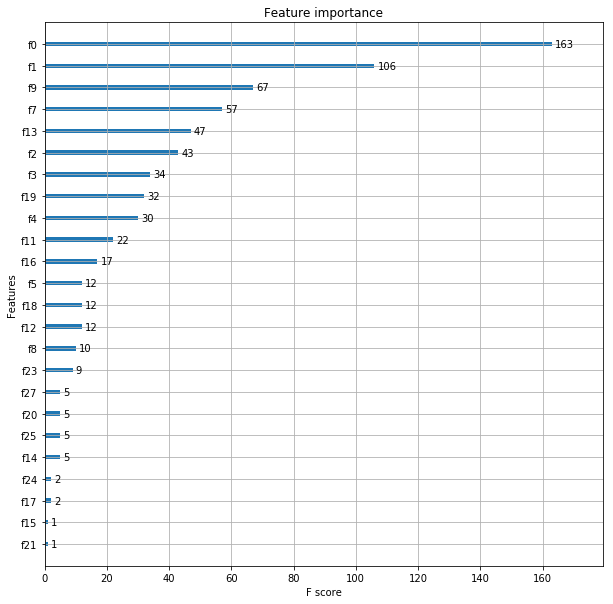

In [129]:
from xgboost import plot_importance
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10,10))
plot_importance(xg, height=0.2, ax=ax)
pyplot.show()

In [122]:
X_df = trainFile[cols]

In [124]:
Y_df= trainFile['is_duplicate']

In [125]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=1)

In [126]:
X_dtrain_1, X_dval, y_dtrain_1, y_dval = train_test_split(X_d_train, y_d_train, test_size=0.2, random_state=1)

In [127]:
model = xgboost.XGBClassifier()
model.fit(X_dtrain_1,y_dtrain_1)
Y_xg = model.predict(X_dtrain_1)
np.mean(Y_xg==y_dtrain_1)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7213981699467684

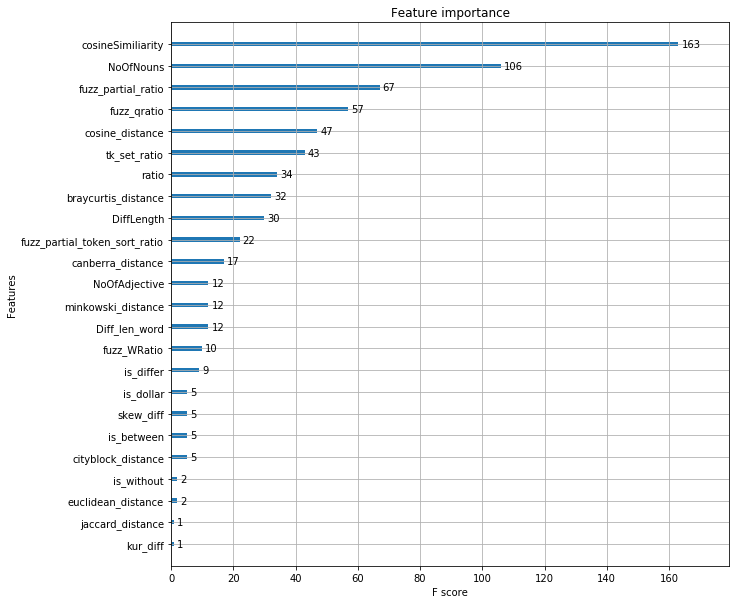

In [128]:
fig, ax = pyplot.subplots(figsize=(10,10))
plot_importance(model, height=0.2, ax=ax)
pyplot.show()